<a href="https://colab.research.google.com/github/KyoungmiKwon/Bigdata_Training_at_ITwill/blob/main/Team_Project/C08_SJ_CNN_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LSTM/CNN 비교: https://skyeong.net/309
#딥러닝을 사용한 캔들스틱 패턴인식: https://ichi.pro/ko/dib-leoning-eul-sayonghayeo-kaendeul-seutig-paeteon-sigbyeol-202134154012788

In [ ]:
!pip install nsepy

  Created wheel for nsepy: filename=nsepy-0.8-cp37-none-any.whl size=36083 sha256=8caec42ca241de578e2fb60a6e5caa55853d00a980499c6e8f57e9246ce209fe
  Stored in directory: /root/.cache/pip/wheels/05/2c/72/5324e267426eea65dec0c21a12a48b15887c0cf686c7a8fe11
Successfully built nsepy


In [ ]:
from datetime import date
# from nsepy import get_history
import pandas as pd


In [ ]:
samsung_url = 'https://github.com/KyoungmiKwon/Bigdata_Training_at_ITwill/raw/main/Team_Project/History/B05_KM_StockPrice_for_regression.xlsx'
samsung_stock_ft = pd.read_excel(samsung_url, header=0).drop('Change', axis=1)

In [ ]:
samsung_stock_ft[:3]

Date  Open  High   Low  Close  Volume
0 1997-05-03  1090  1093  1077   1087   67197
1 1997-05-06  1086  1093  1081   1092   93290
2 1997-05-07  1084  1088  1077   1085   67110

In [ ]:
samsung_stock=samsung_stock_ft.loc[:1000,:]

In [ ]:
samsung_stock[:10]

Date  Open  High   Low  Close  Volume
0 1997-05-03  1090  1093  1077   1087   67197
1 1997-05-06  1086  1093  1081   1092   93290
2 1997-05-07  1084  1088  1077   1085   67110
3 1997-05-08  1083  1083  1054   1055   72610
4 1997-05-09  1058  1067  1049   1065   80550
5 1997-05-10  1067  1083  1063   1065   45330
6 1997-05-12  1077  1095  1068   1085  106040
7 1997-05-13  1086  1099  1070   1099   75720
8 1997-05-15  1102  1141  1100   1131  188280
9 1997-05-16  1129  1138  1117   1121  168390

In [ ]:

def obtain_data(equity , start,end):
# Enter the start and end dates using the method date(yyyy,m,dd)    
    stock=equity
    df=stock.copy()
    df=df.reset_index()
    # df=df.drop(['Series','Prev Close','Last','Turnover','%Deliverble','Trades'],axis=1)
    df=df.rename({'Open':'open_price','Close':'close_price','High':'high','Low':'low','Volume':'volume'},axis='columns')
    df.index=df.Date
    return df

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
"""This cell defineds the plot_candles function"""

def plot_candles(pricing, title=None, volume_bars=False, color_function=None, technicals=None):
    """ Plots a candlestick chart using quantopian pricing data.
    
    Author: Daniel Treiman
    
    Args:
      pricing: A pandas dataframe with columns ['open_price', 'close_price', 'high', 'low', 'volume']
      title: An optional title for the chart
      volume_bars: If True, plots volume bars
      color_function: A function which, given a row index and price series, returns a candle color.
      technicals: A list of additional data series to add to the chart.  Must be the same length as pricing.
    """
    def default_color(index, open_price, close_price, low, high):
        return 'r' if open_price[index] > close_price[index] else 'g'
    color_function = color_function or default_color
    technicals = technicals or []
    open_price = pricing['open_price']
    close_price = pricing['close_price']
    low = pricing['low']
    high = pricing['high']
    oc_min = pd.concat([open_price, close_price], axis=1).min(axis=1)
    oc_max = pd.concat([open_price, close_price], axis=1).max(axis=1)
    
    if volume_bars:
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3,1]},figsize=(7,7))
    else:
        fig, ax1 = plt.subplots(1, 1)
    if title:
        ax1.set_title(title)
    fig.tight_layout()
    x = np.arange(len(pricing))
    candle_colors = [color_function(i, open_price, close_price, low, high) for i in x]
    candles = ax1.bar(x, oc_max-oc_min, bottom=oc_min, color=candle_colors, linewidth=0)
    lines = ax1.vlines(x , low, high, color=candle_colors, linewidth=1)
    ax1.xaxis.grid(True)
    ax1.yaxis.grid(True)
    ax1.xaxis.set_tick_params(which='major', length=3.0, direction='in', top='off')
    ax1.set_yticklabels([])
    # Assume minute frequency if first two bars are in the same day.
    frequency = 'minute' if (pricing.index[1] - pricing.index[0]).days == 0 else 'day'
    time_format = '%d-%m-%Y'
    if frequency == 'minute':
        time_format = '%H:%M'
    # Set X axis tick labels.
    #plt.xticks(x, [date.strftime(time_format) for date in pricing.index], rotation='vertical')
    for indicator in technicals:
        ax1.plot(x, indicator)
    
    if volume_bars:
        volume = pricing['volume']
        volume_scale = None
        scaled_volume = volume
        if volume.max() > 1000000:
            volume_scale = 'M'
            scaled_volume = volume / 1000000
        elif volume.max() > 1000:
            volume_scale = 'K'
            scaled_volume = volume / 1000
        ax2.bar(x, scaled_volume, color=candle_colors)
        volume_title = 'Volume'
        if volume_scale:
            volume_title = 'Volume (%s)' % volume_scale
        #ax2.set_title(volume_title)
        ax2.xaxis.grid(True)
        ax2.set_yticklabels([])
        ax2.set_xticklabels([])
    return fig

Up 3 4
Up 4 4
Up 5 3
Up 6 2
Down 12 3
Up 15 4
Up 16 3
Up 17 2
Up 18 1
Up 19 1
Up 29 3
Up 30 2
Up 31 1
Up 32 3
Up 33 2
Up 34 1
Down 35 3
Down 36 3
Down 37 2
Up 44 4
Down 49 4
Down 50 3
Down 51 2
Up 60 4
Down 68 4
Up 72 4
Up 73 3
Up 74 2
Up 75 1
Up 76 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Up 77 3
Up 78 4
Up 79 3
Up 80 3
Up 81 2
Down 83 2
Down 99 2
Up 105 2
Up 106 2
Down 109 4
Down 110 3
Down 111 3
Down 112 4
Down 122 4
Down 123 2
Down 124 2
Down 125 1
Up 127 4
Down 129 4
Down 130 3
Down 131 2
Down 132 1
Up 134 4
Up 135 3
Up 136 2
Up 137 1
Down 138 2
Down 139 1
Down 140 1
Down 141 1
Down 142 1
Down 143 2
Down 144 1
Down 145 1
Up 146 1
Up 147 1
Up 148 1
Up 149 1
Down 150 2
Down 151 1
Up 152 2
Up 153 1
Down 154 1
Down 155 1
Down 156 4
Down 157 3
Down 159 1
Up 160 4
Up 161 3
Down 162 1
Up 163 1
Down 164 2
Down 165 1
Down 168 2
Down 169 4
Down 170 3
Down 171 2
Down 172 1
Up 173 1
Up 174 1
Up 175 1
Down 176 1
Down 177 1
Down 178 1
Up 179 1
Down 180 2
Down 181 1
Up 182 1
Up 183 1
Down 184 3
Down 185 2
Down 186 1
Down 187 3
Down 188 2
Down 189 1
Down 190 1
Up 191 1
Up 192 2
Up 193 1
Up 194 1
Up 195 3
Up 196 2
Up 197 1
Up 198 2
Up 199 1
Up 200 1
Up 201 2
Up 202 1
Up 203 1
Up 204 1
Up 205 2
Up 206 1
Up 207 1
Down 208 1
Down 209 1
Up 210 1
Up 211 1
Up 212 1
Up 213 1
Down 214 2
Dow

KeyError: ignored

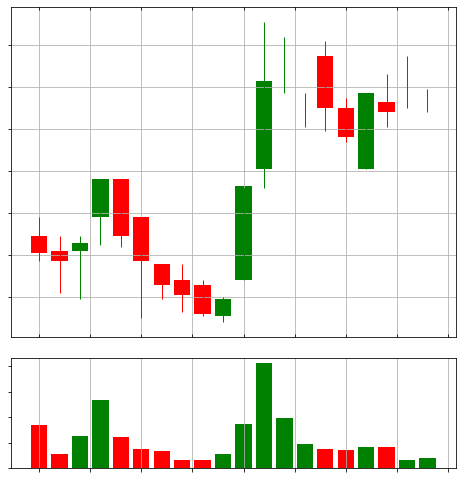

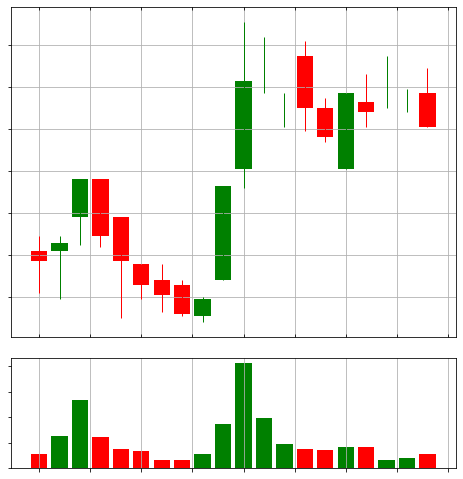

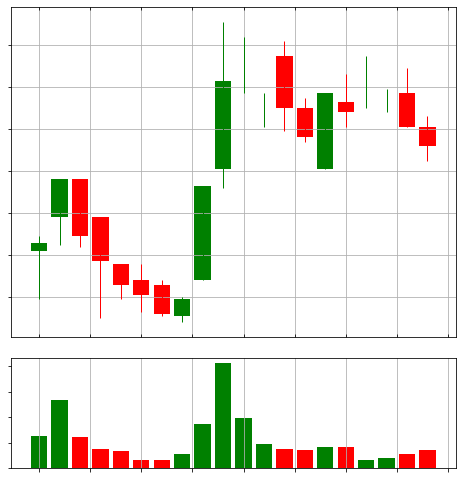

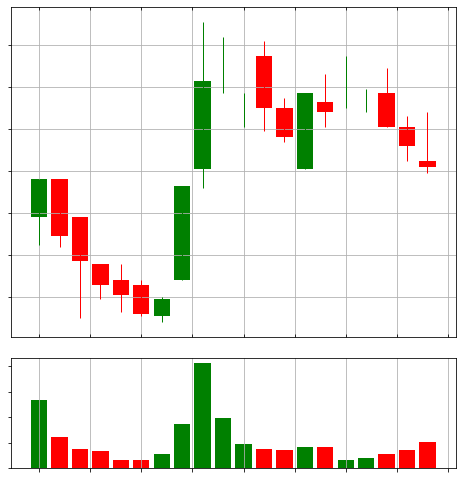

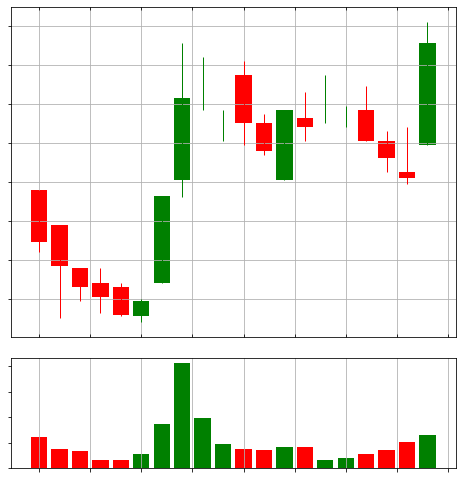

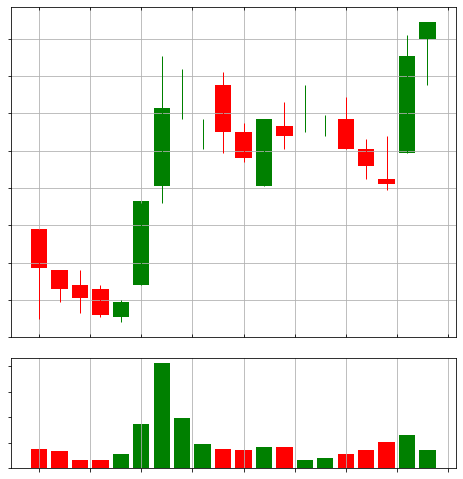

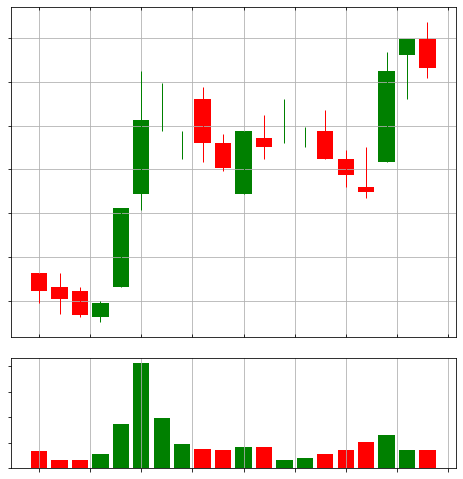

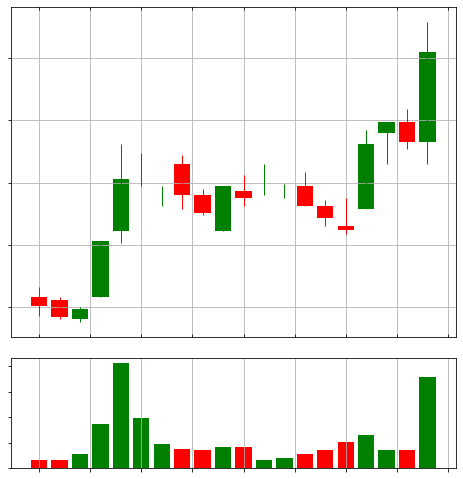

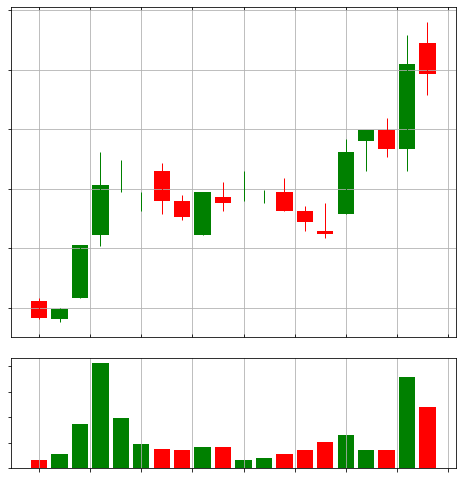

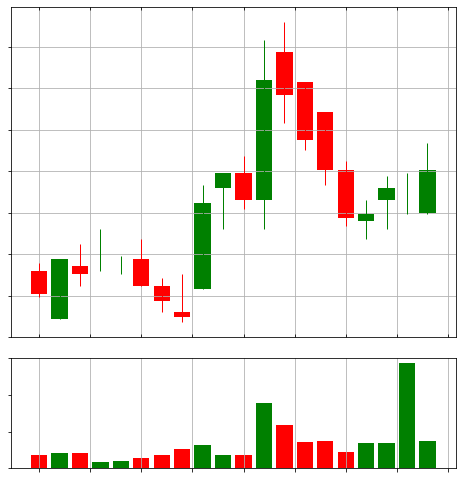

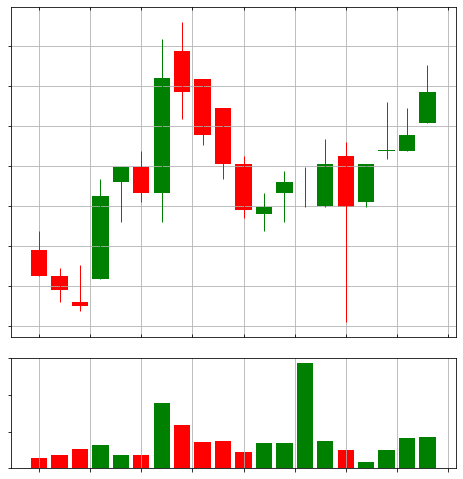

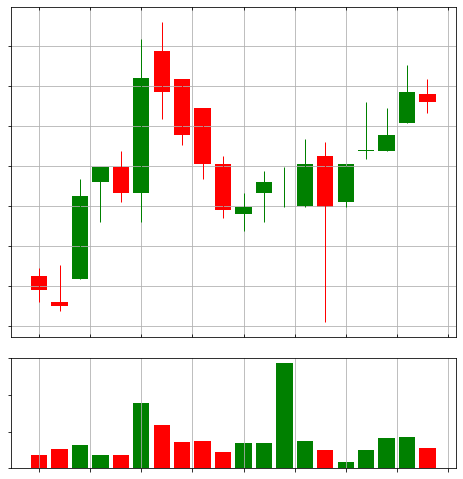

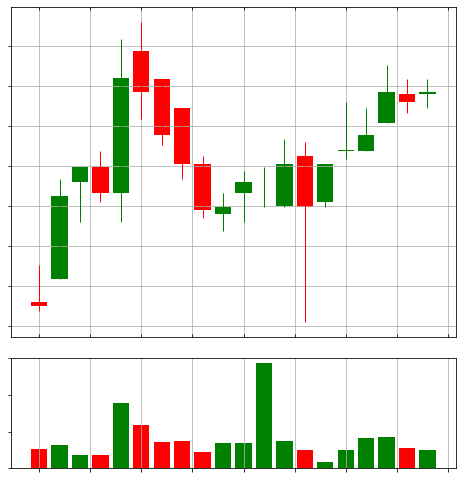

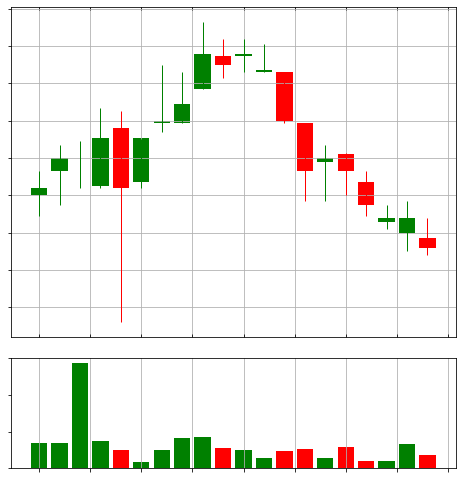

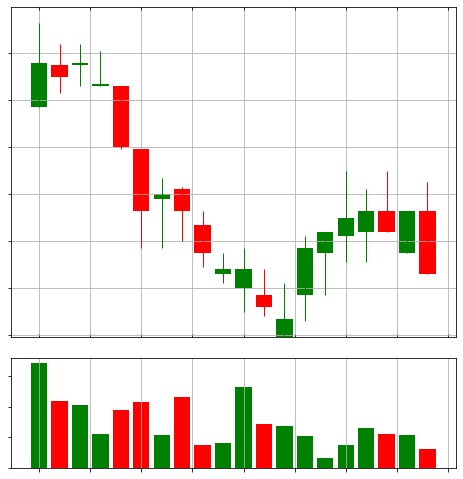

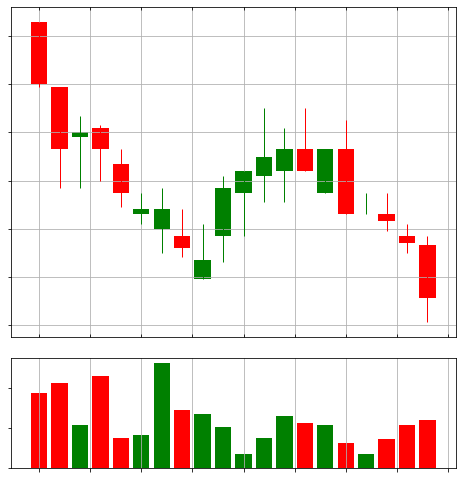

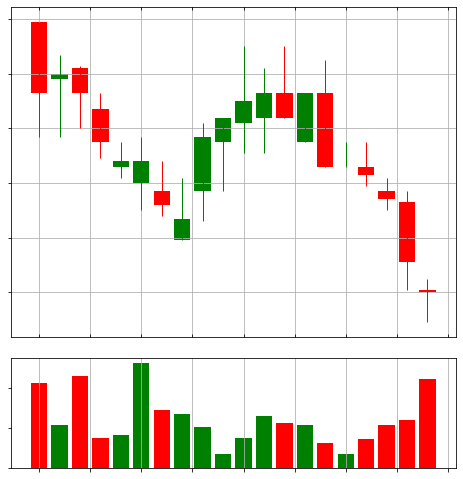

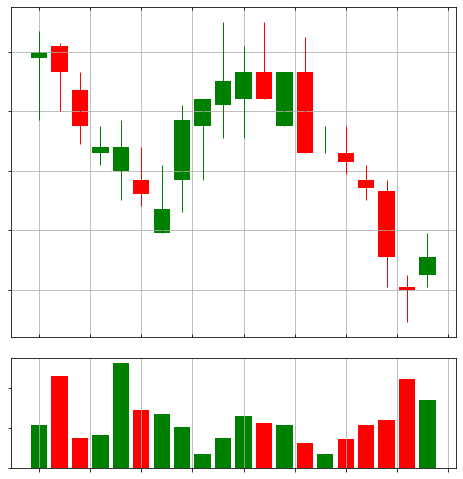

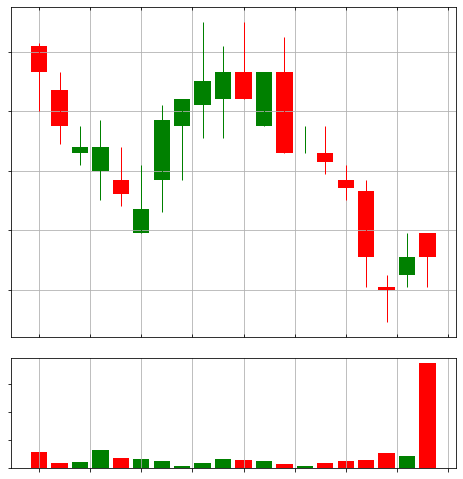

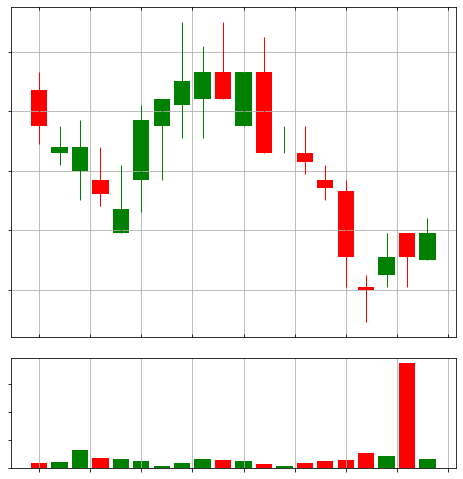

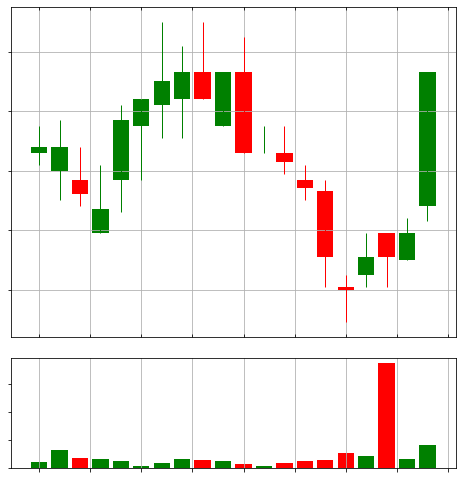

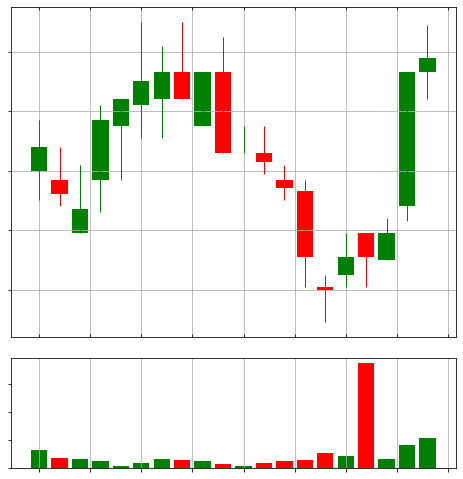

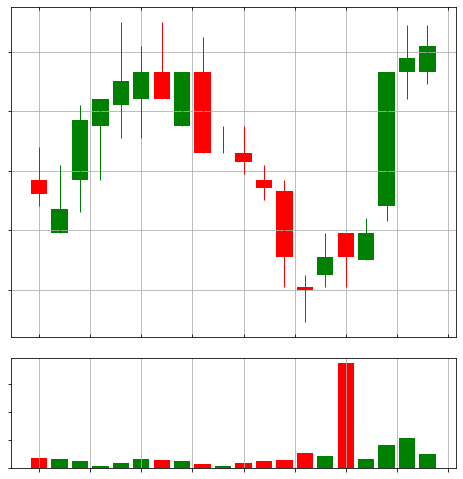

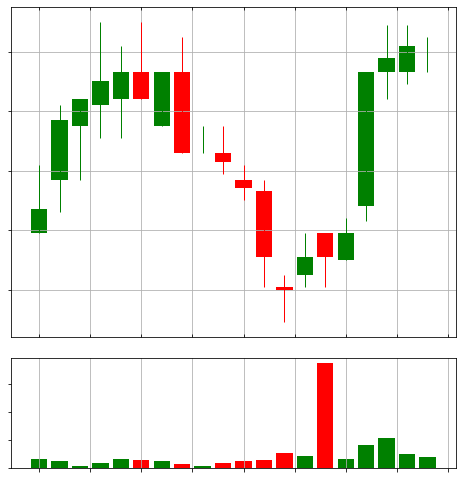

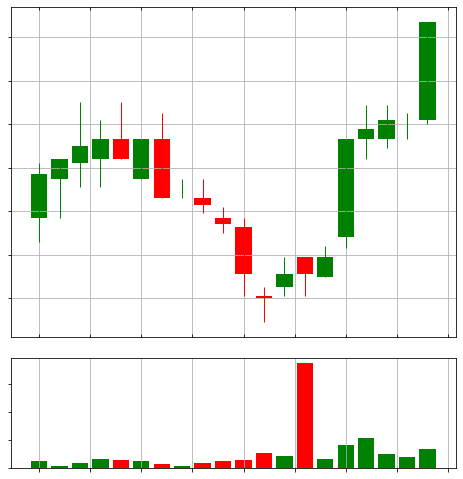

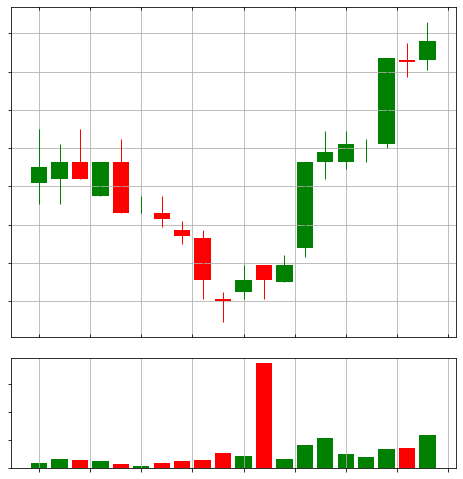

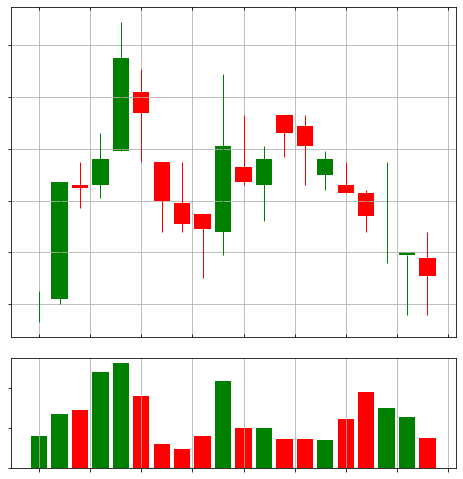

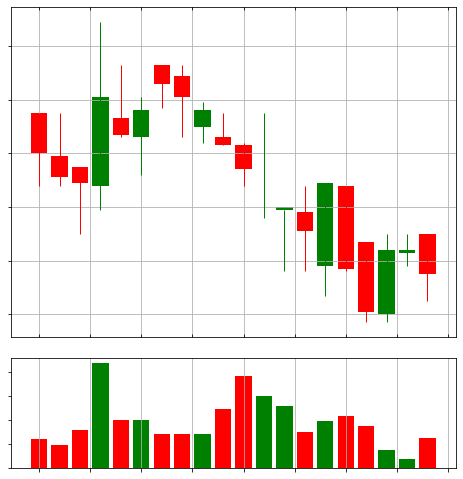

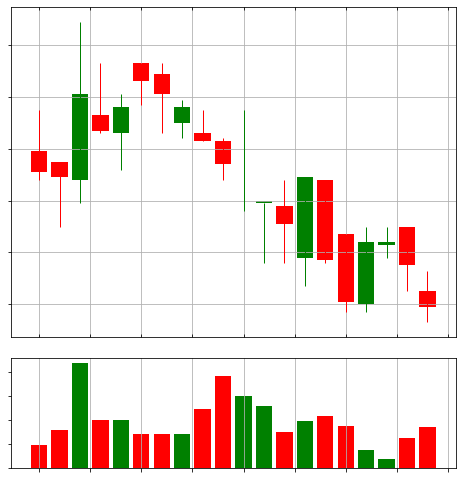

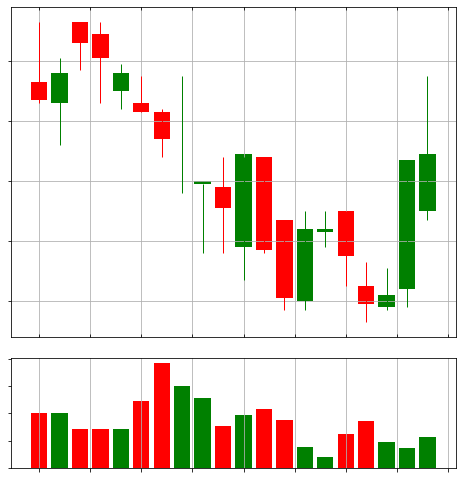

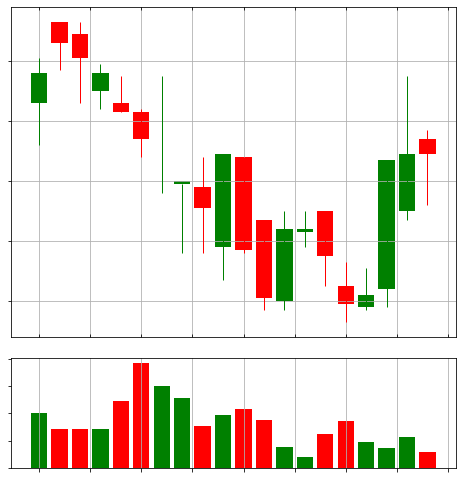

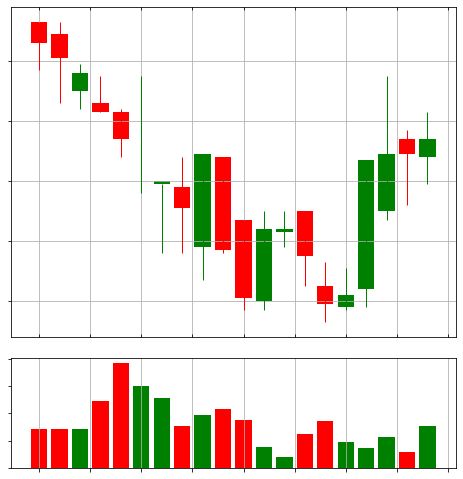

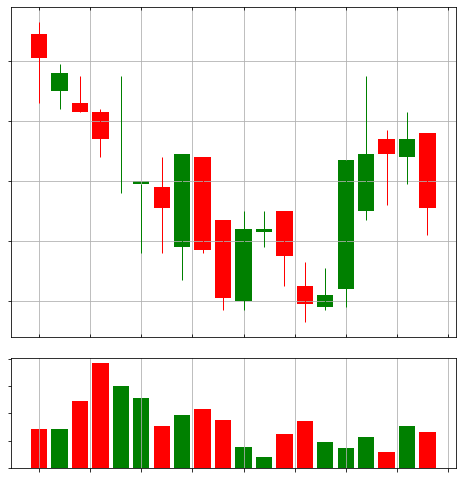

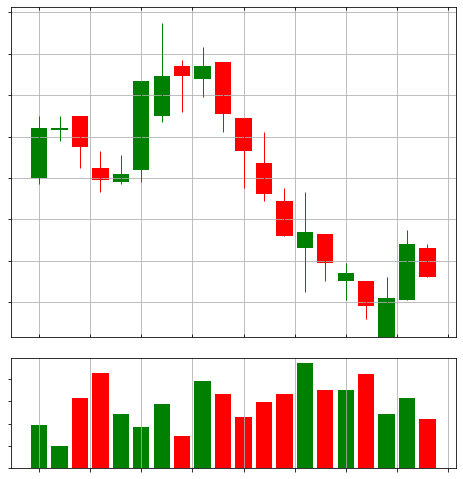

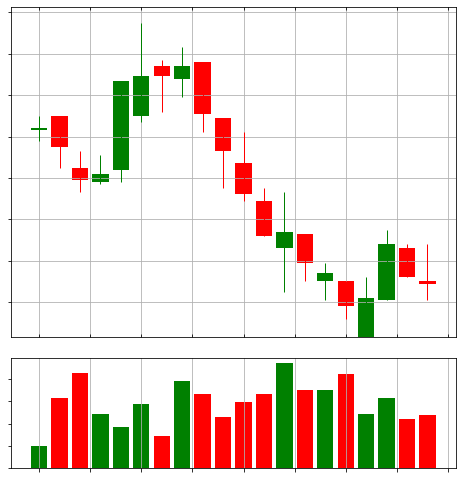

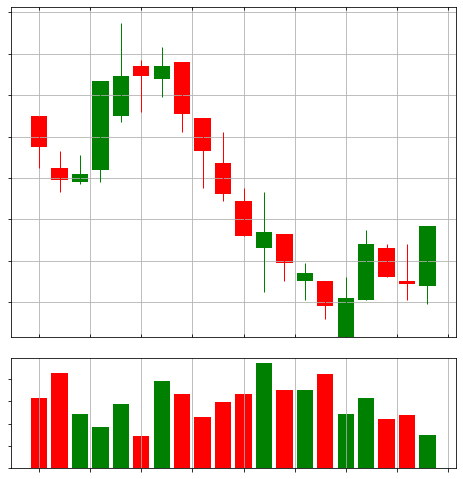

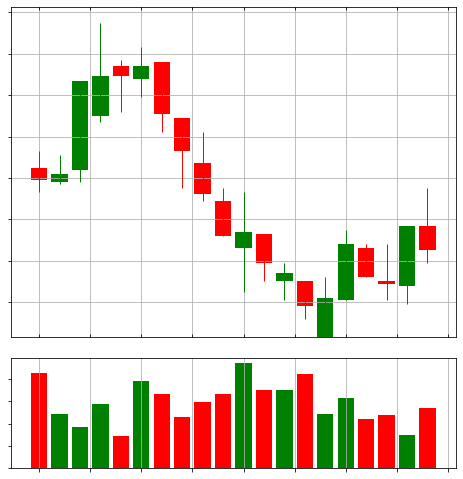

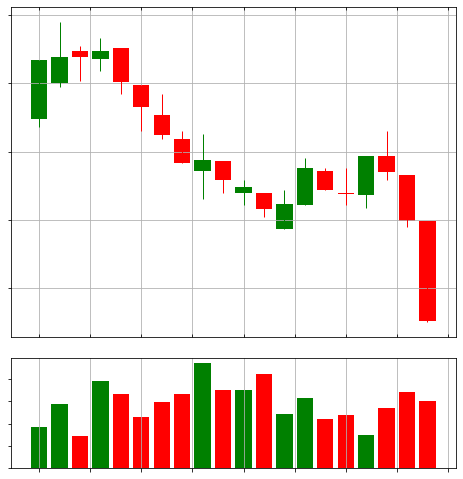

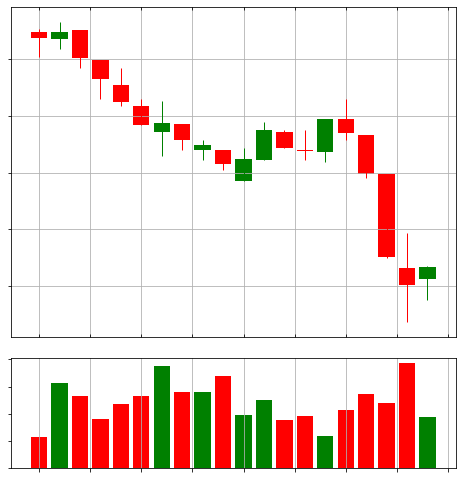

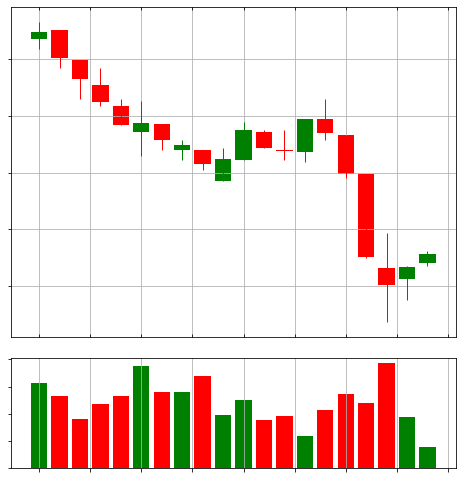

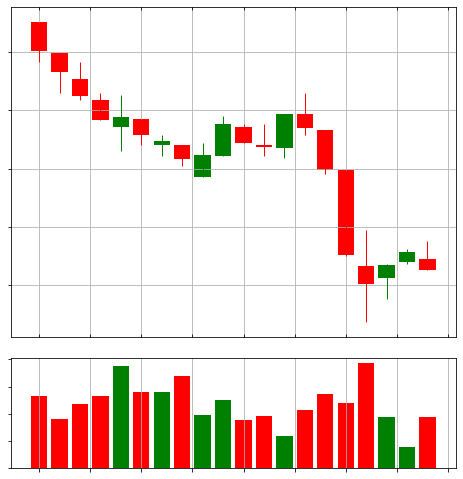

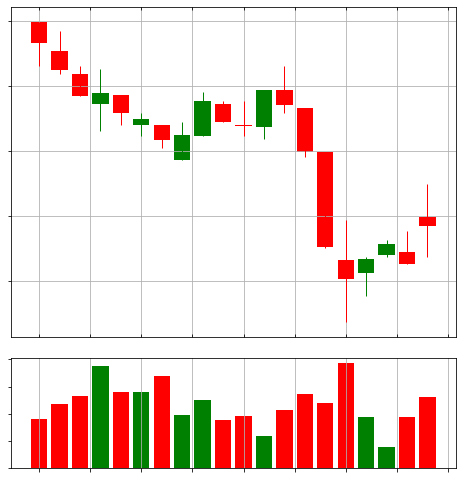

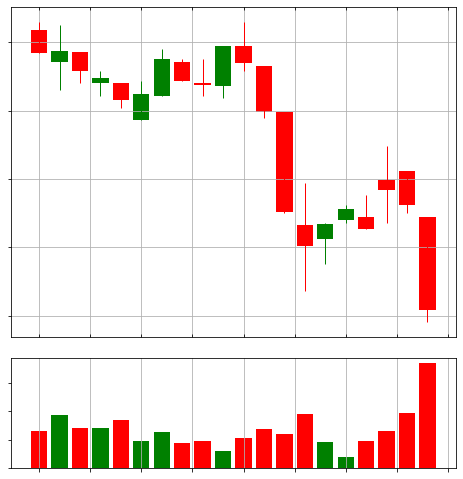

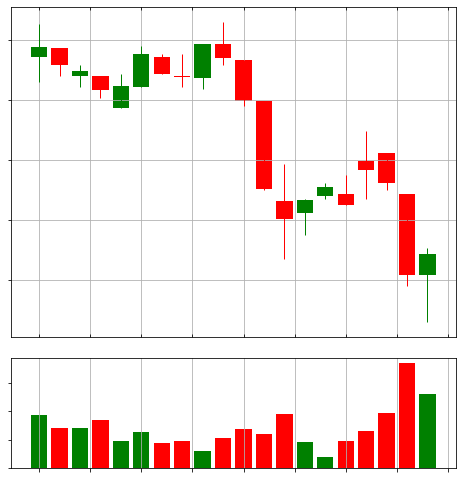

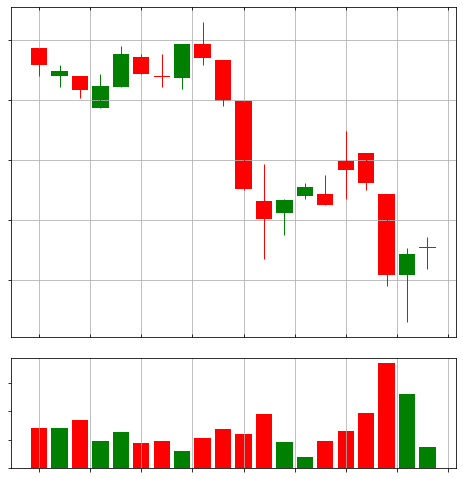

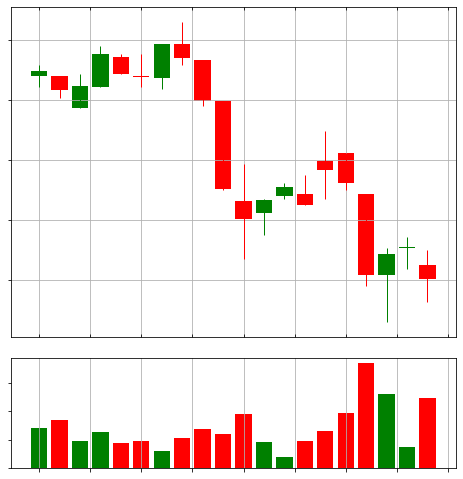

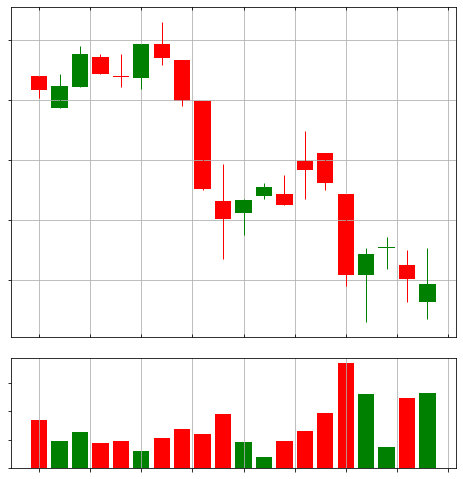

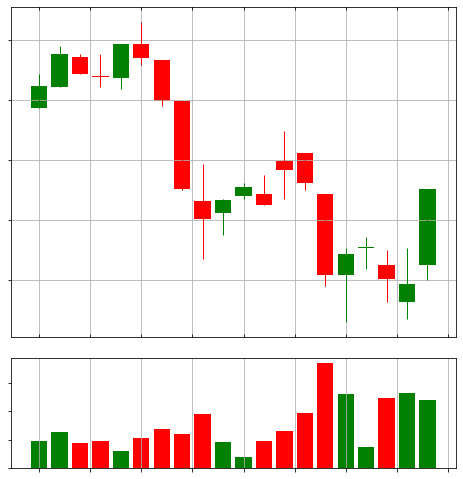

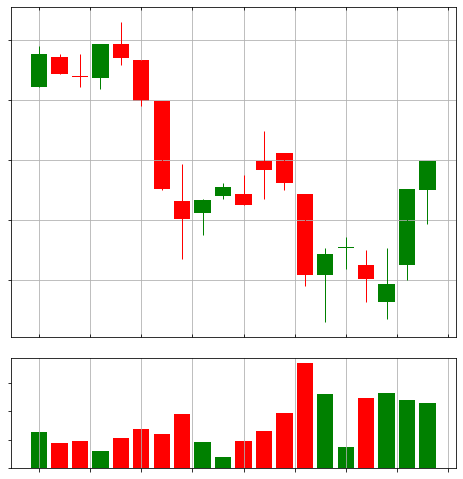

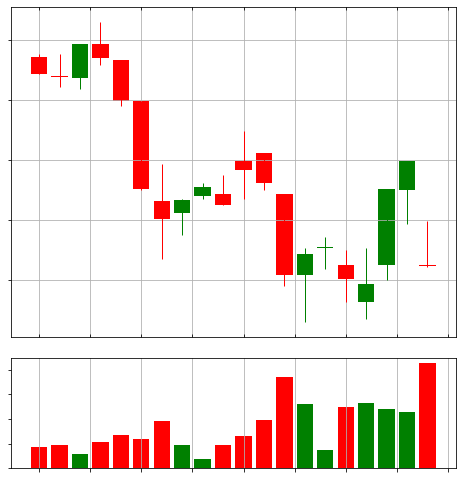

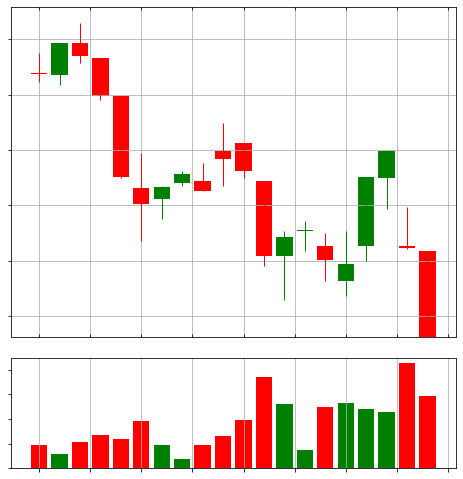

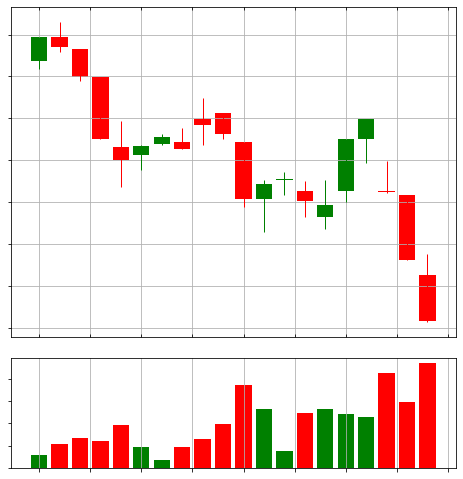

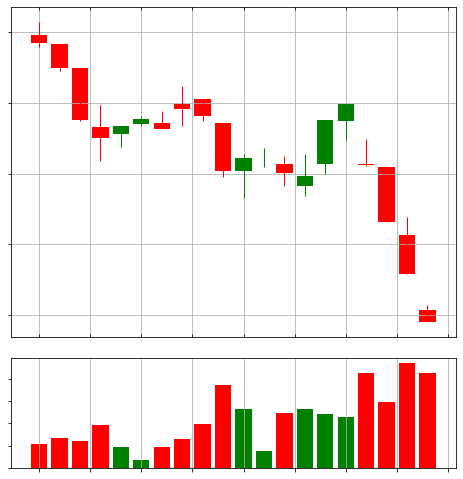

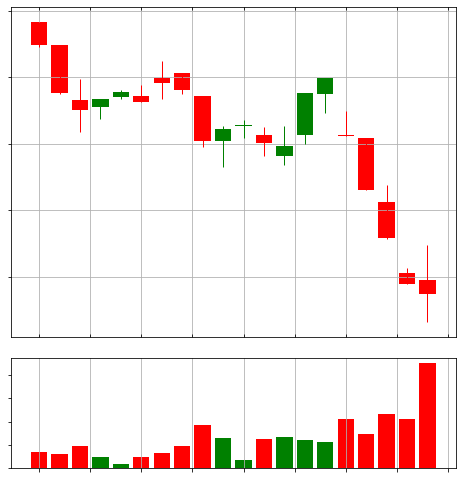

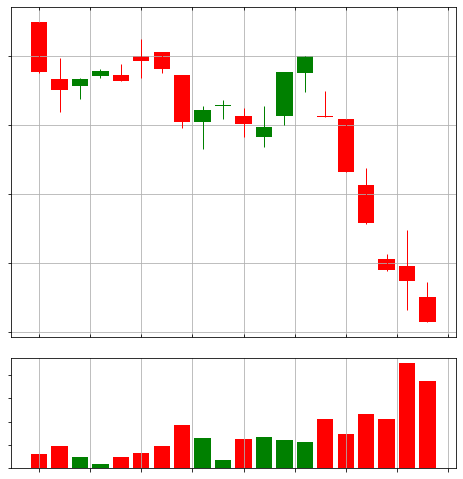

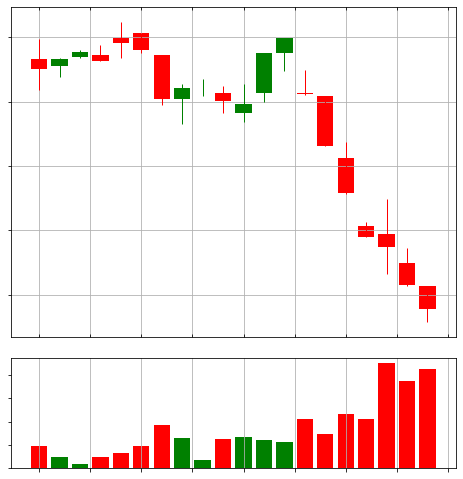

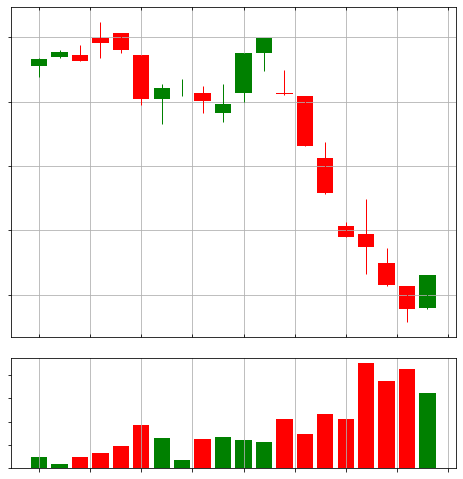

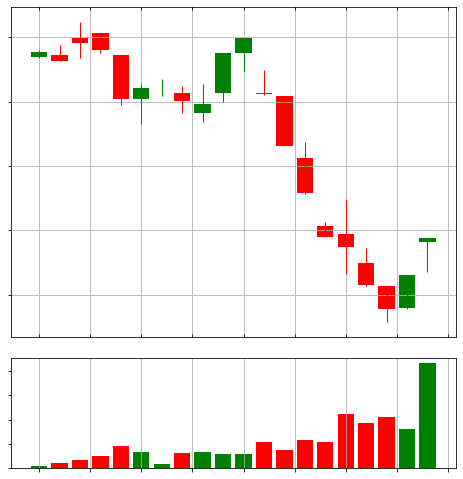

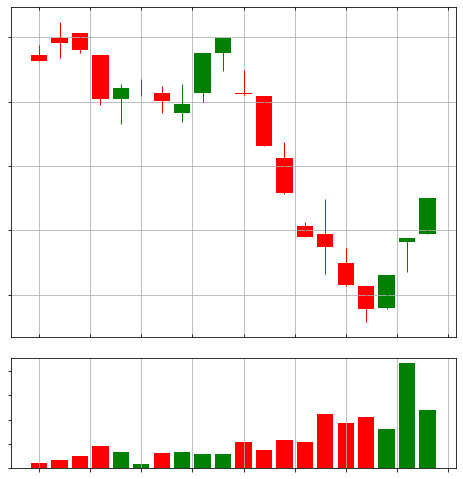

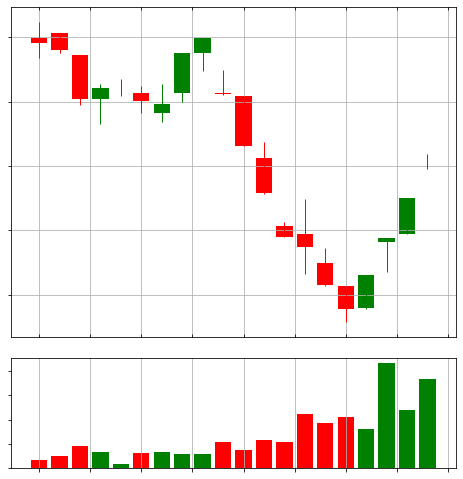

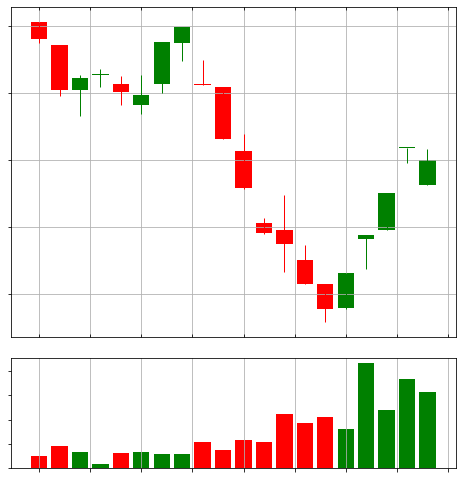

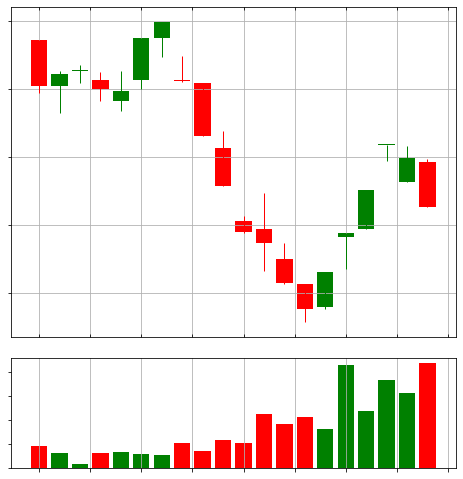

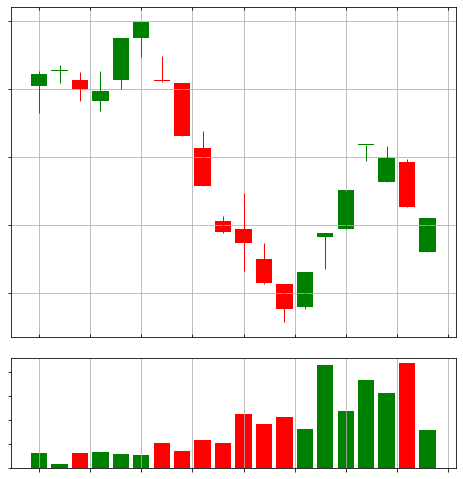

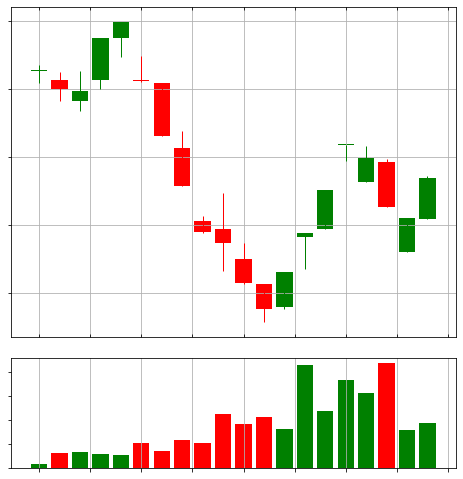

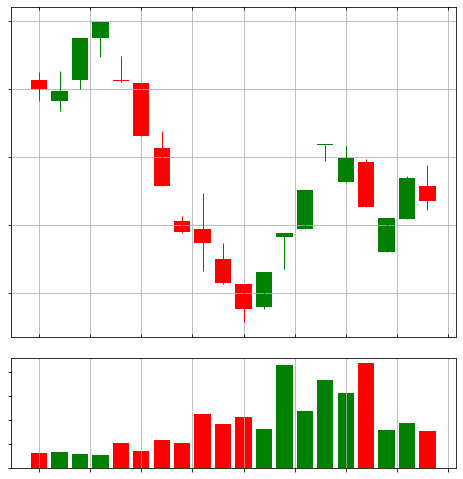

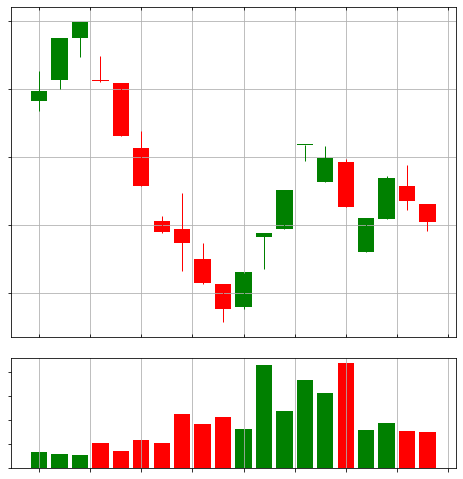

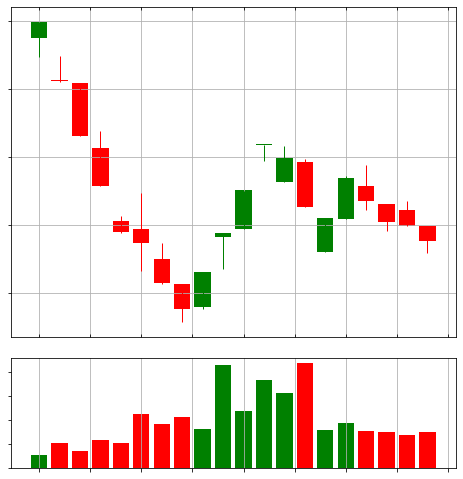

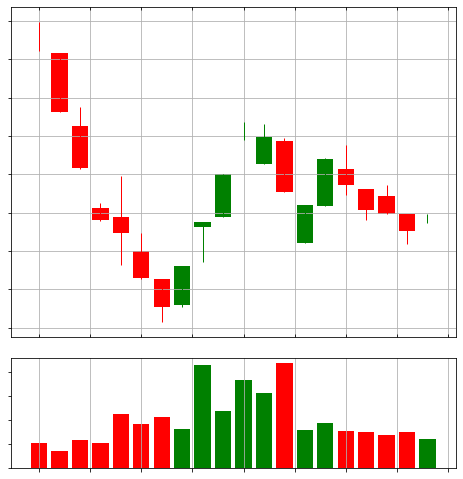

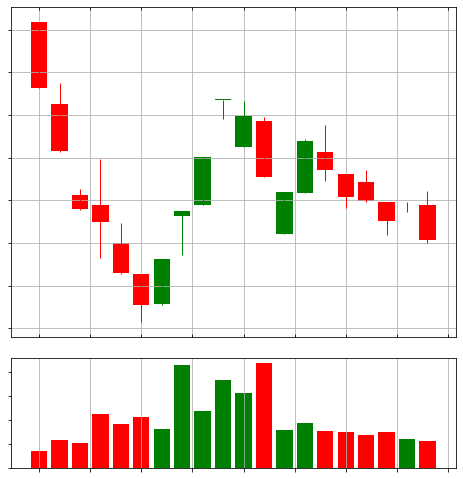

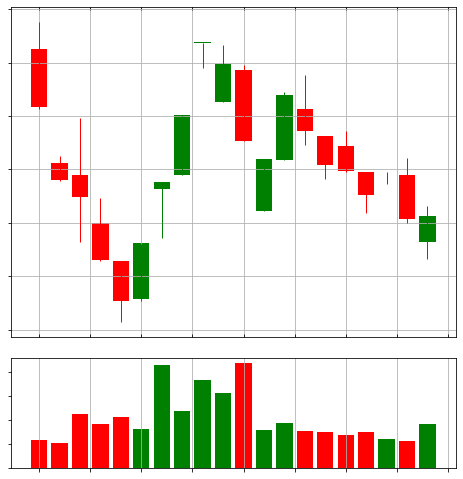

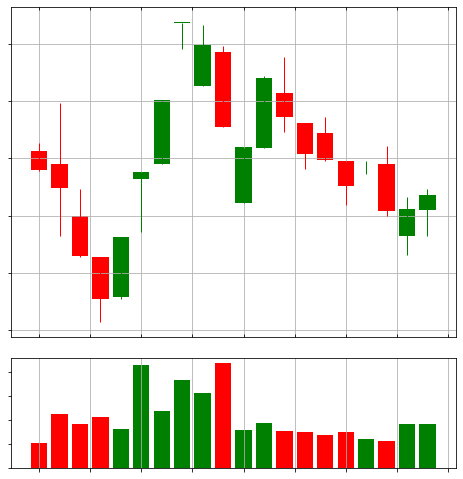

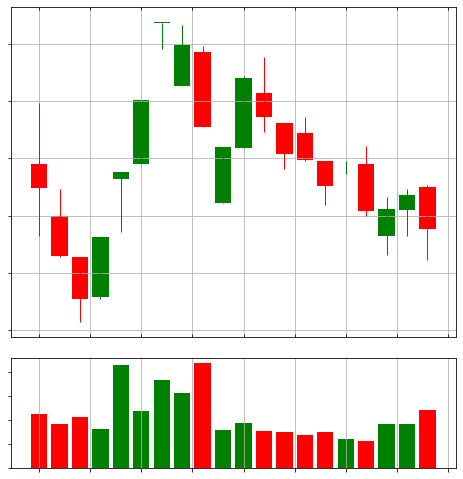

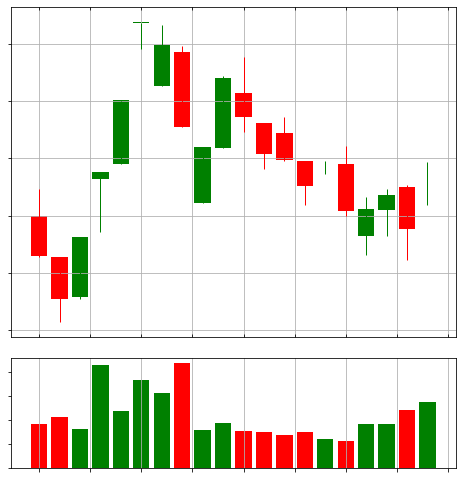

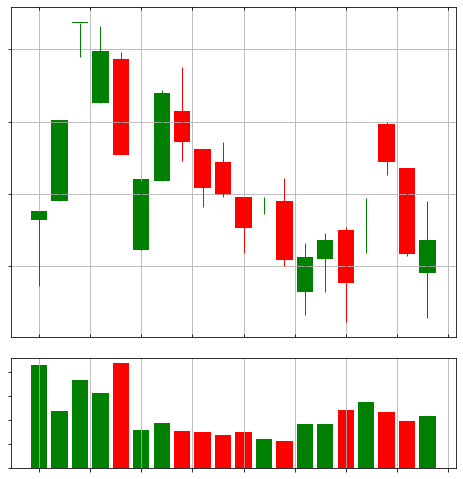

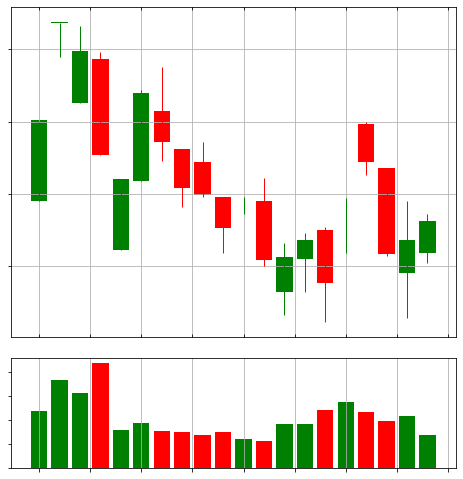

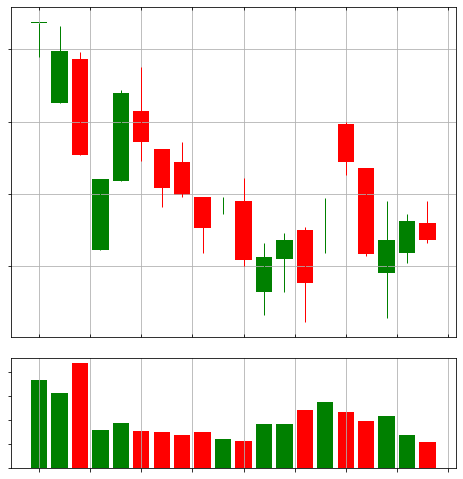

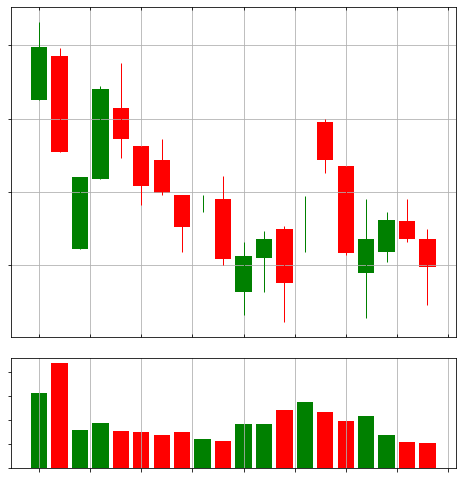

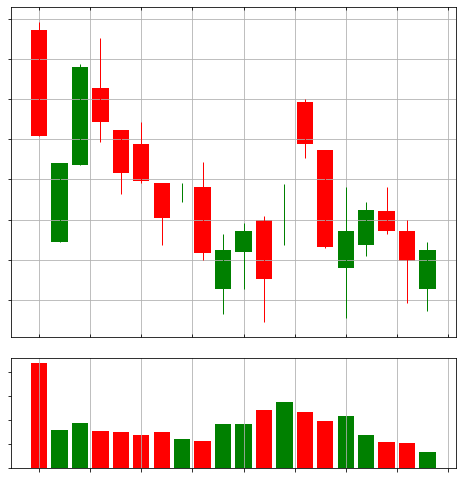

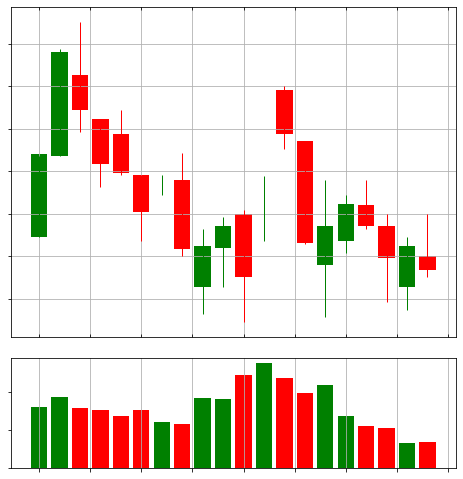

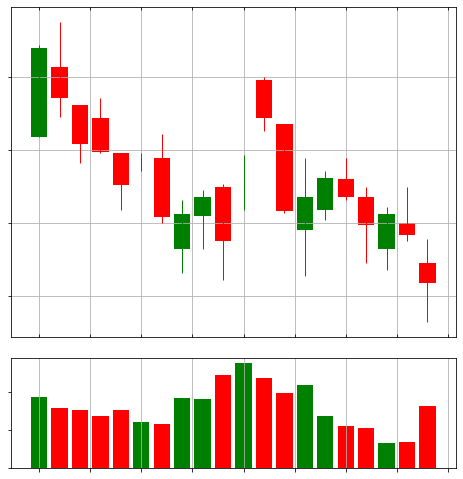

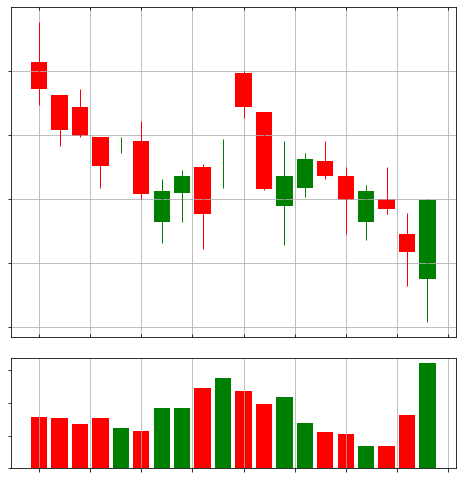

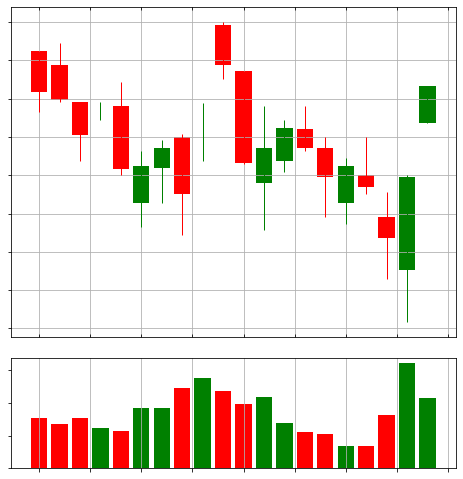

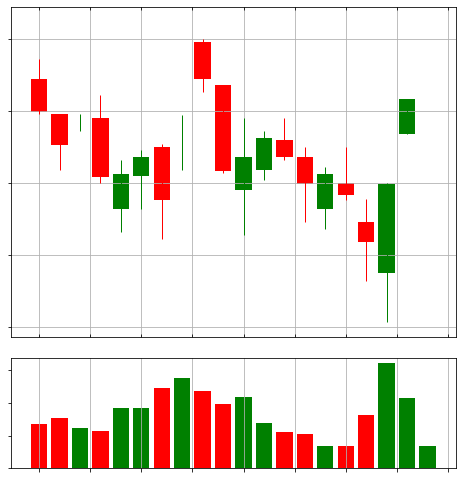

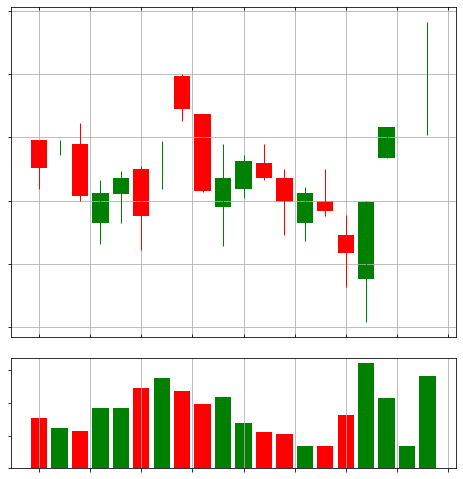

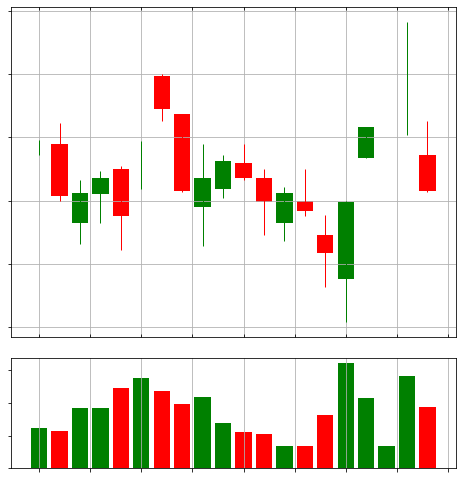

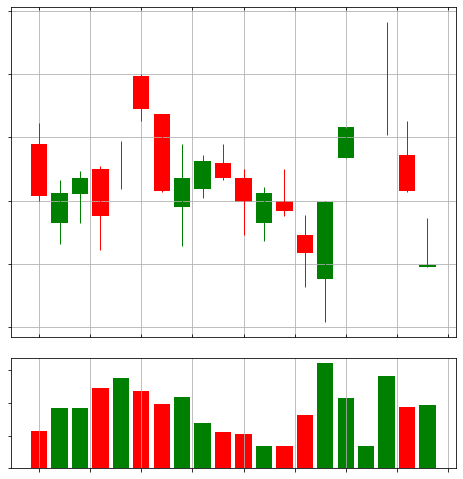

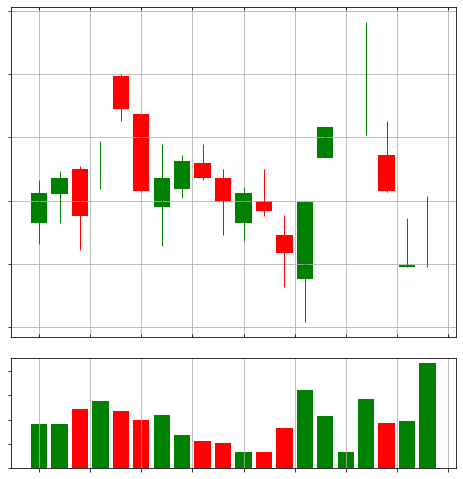

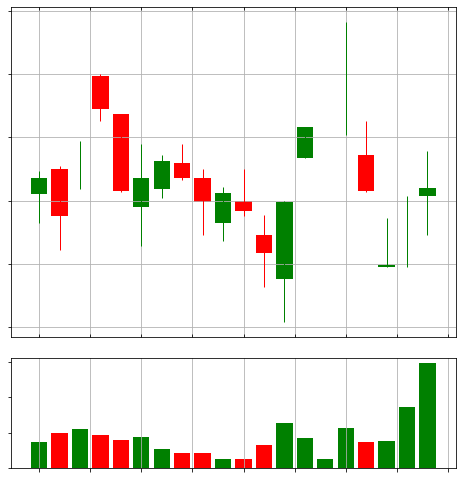

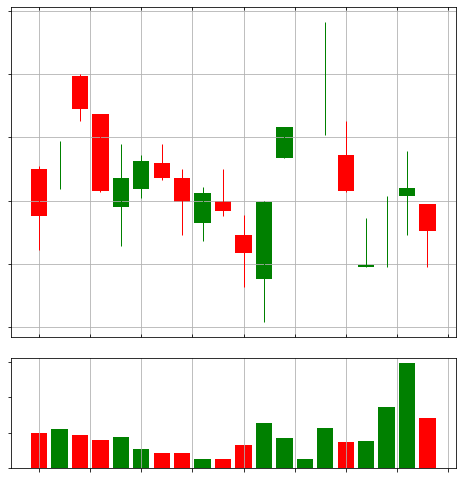

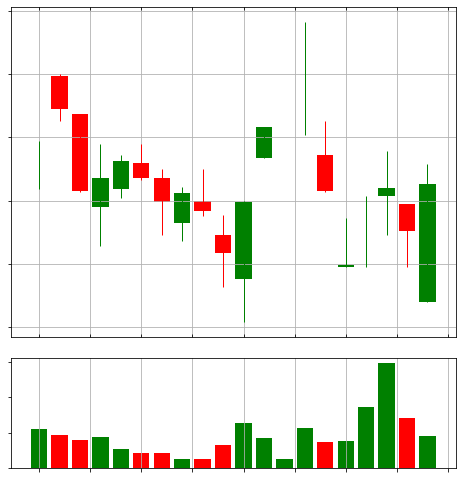

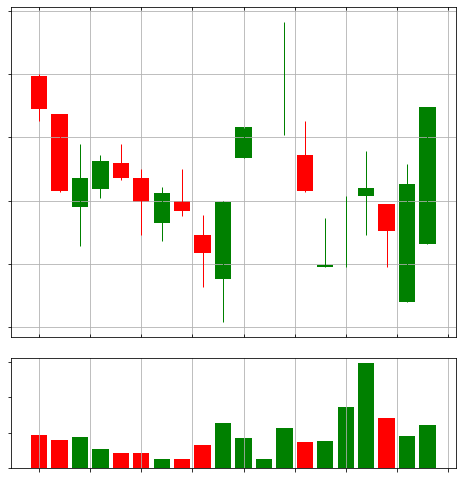

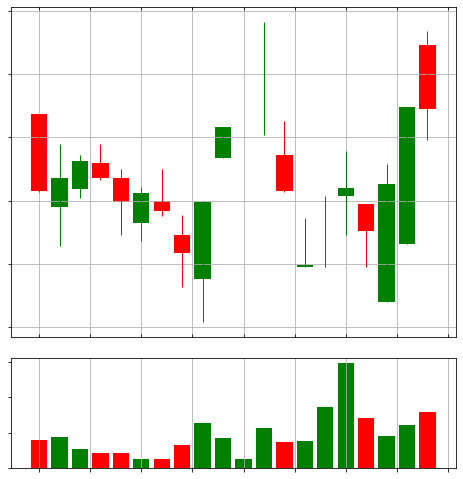

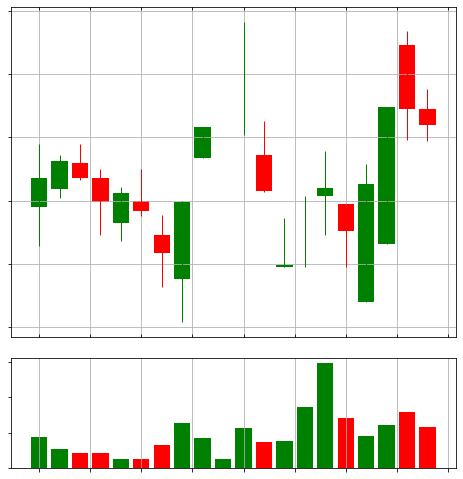

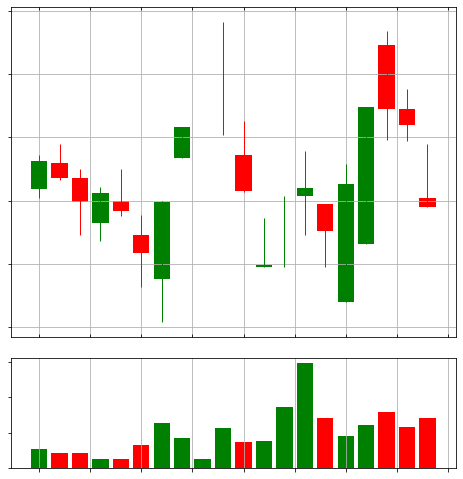

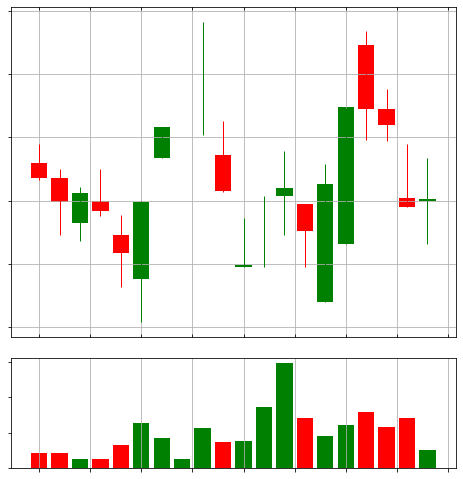

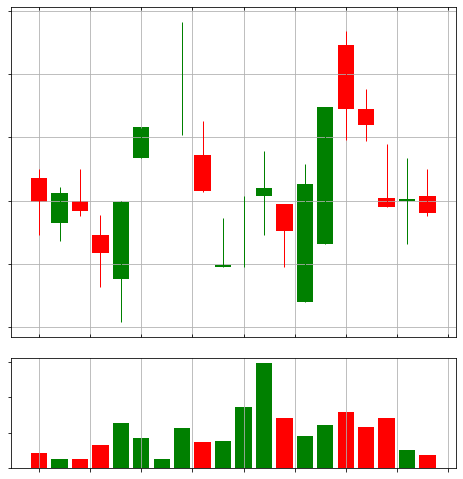

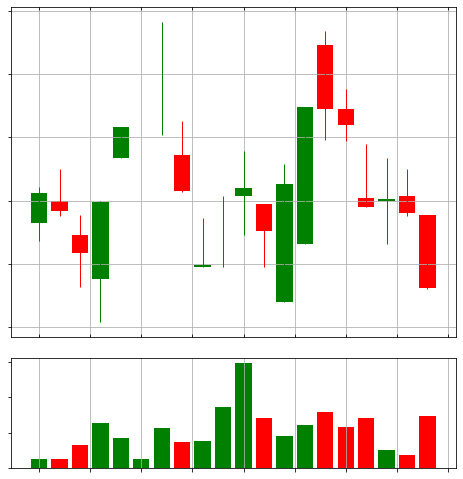

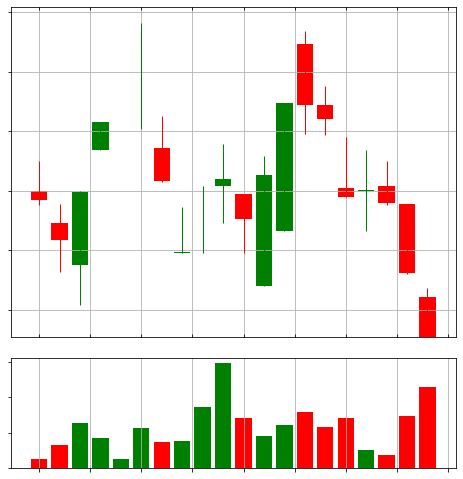

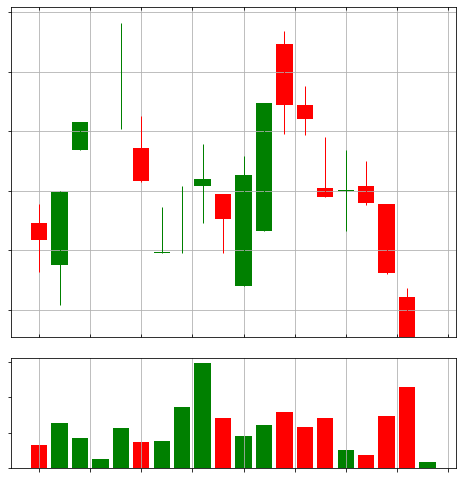

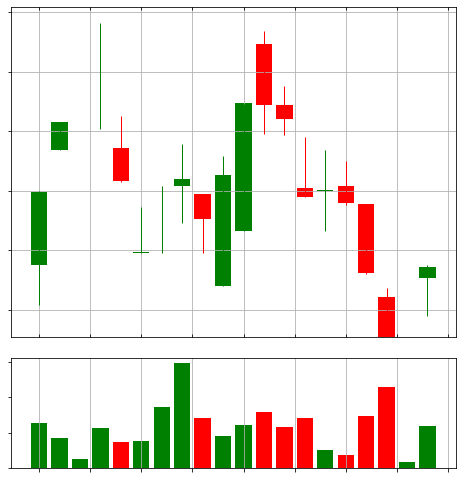

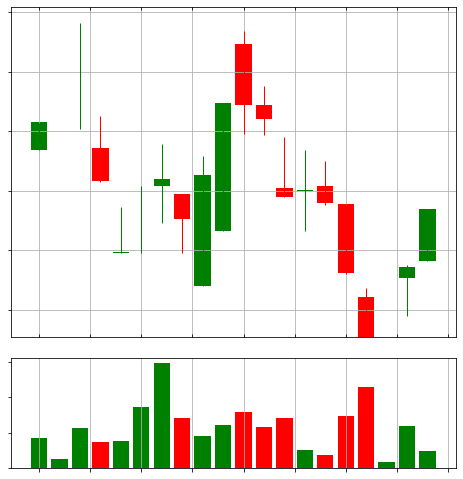

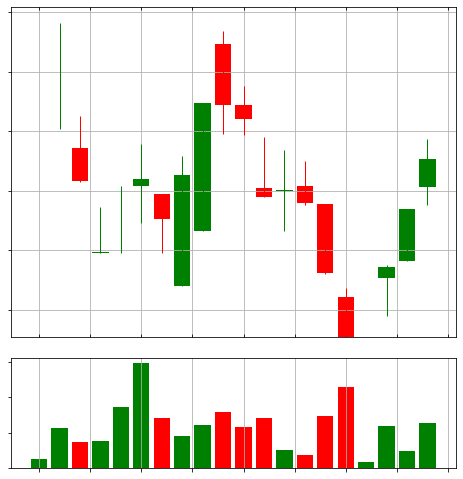

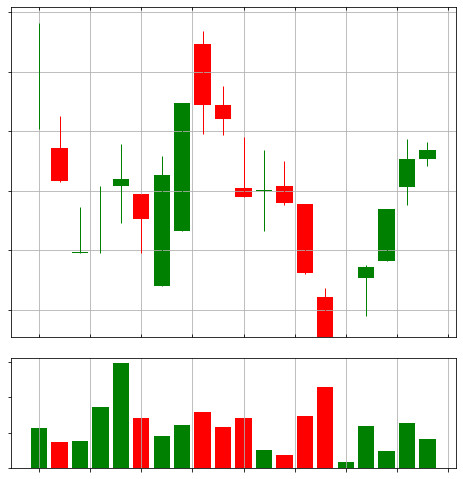

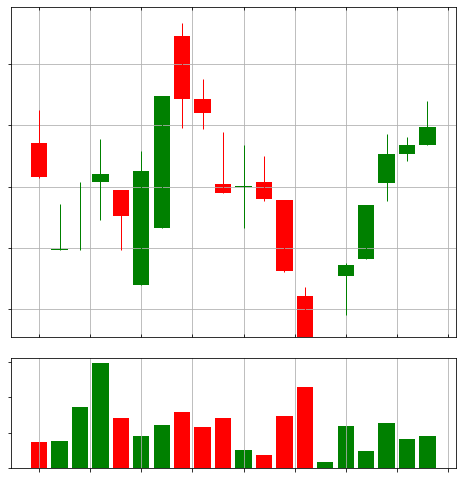

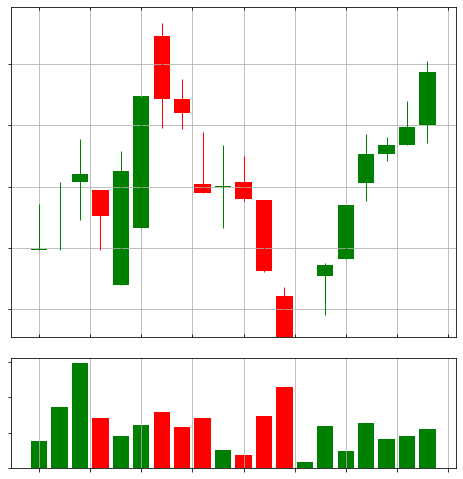

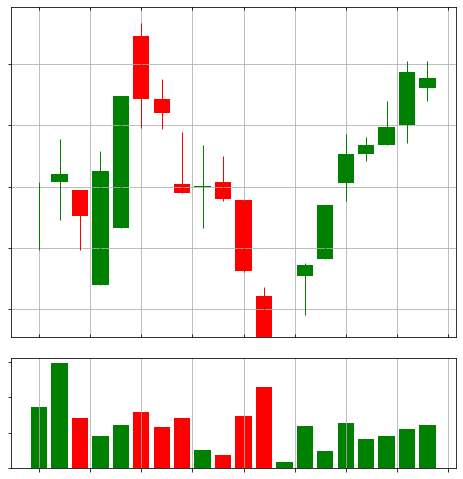

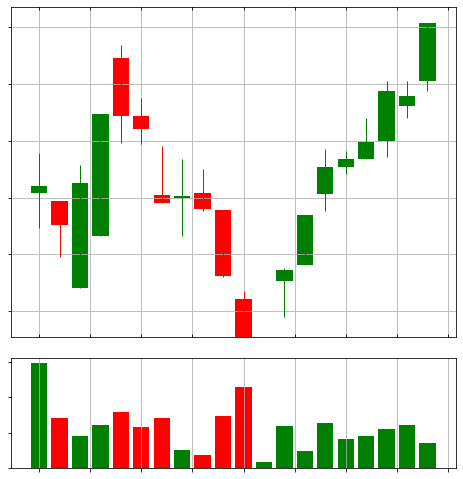

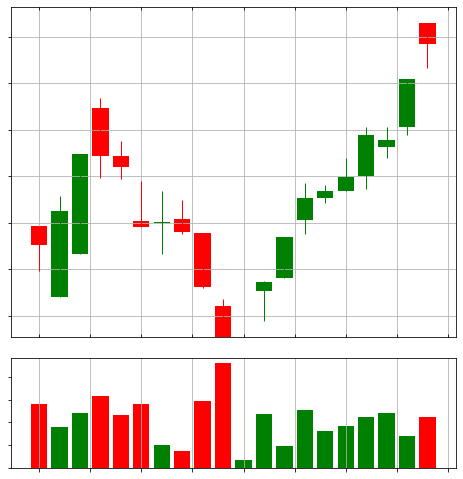

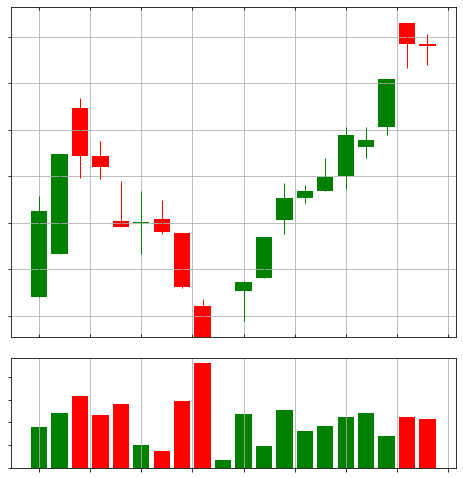

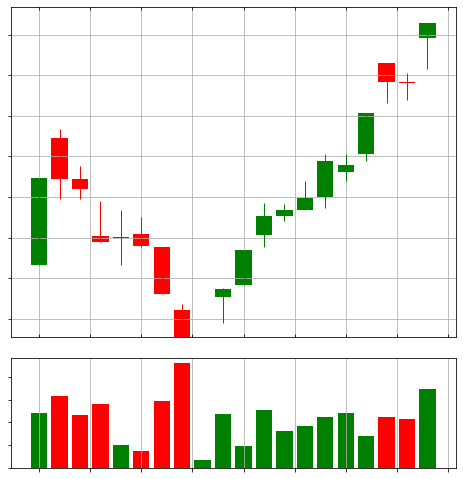

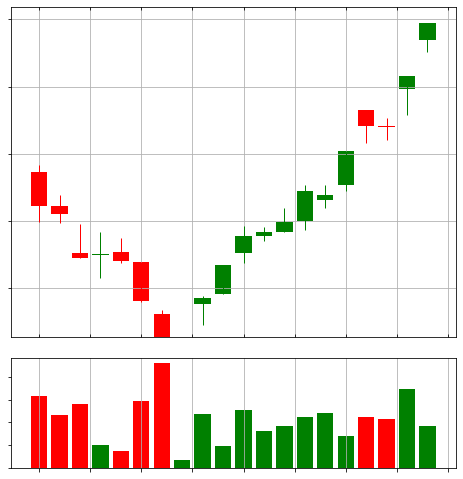

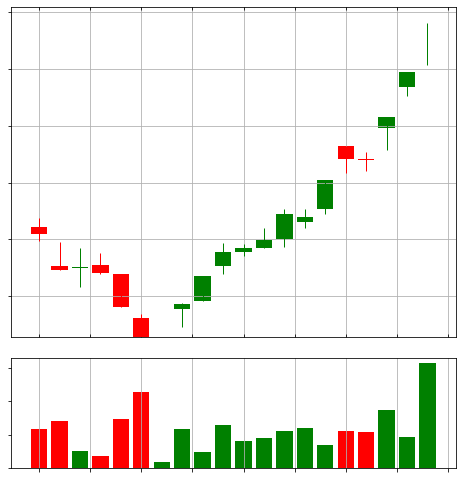

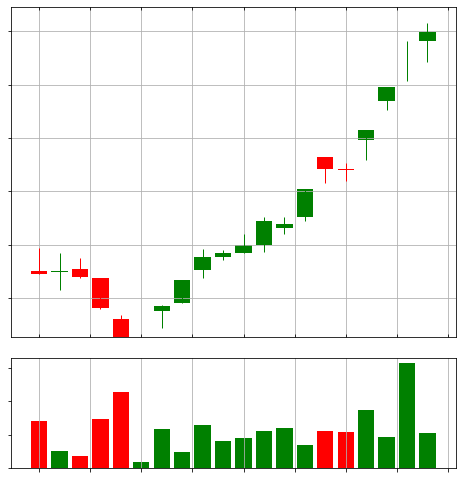

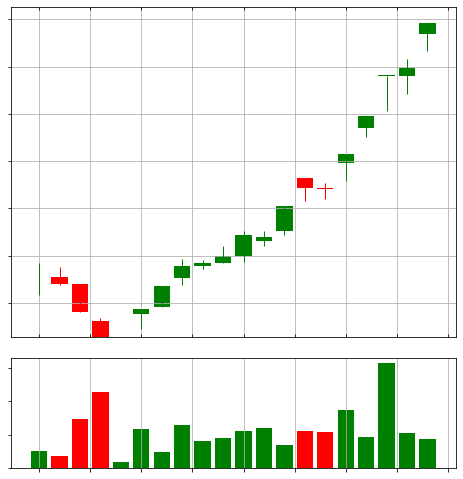

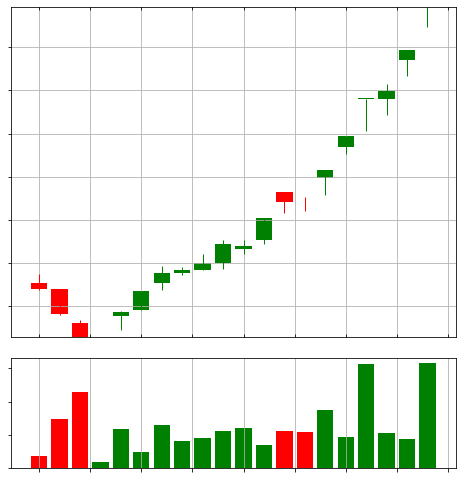

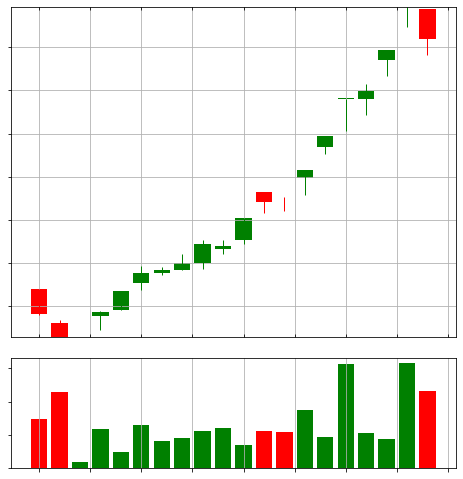

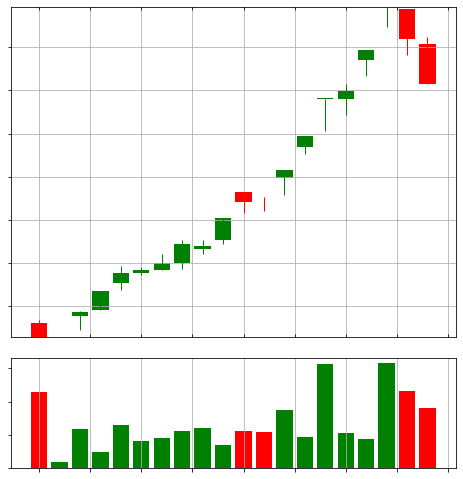

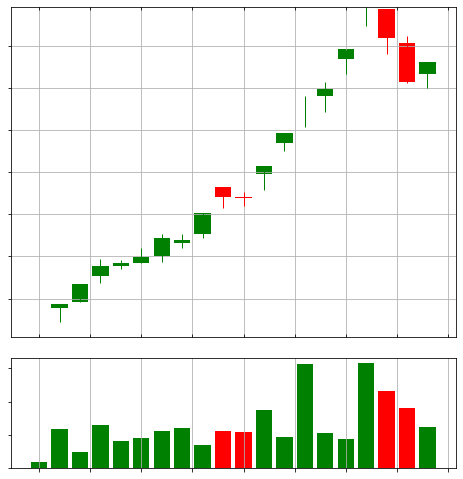

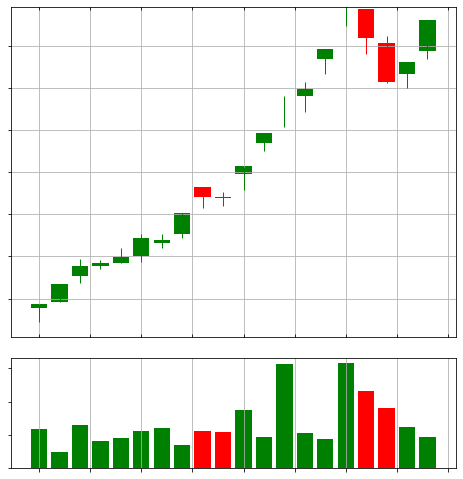

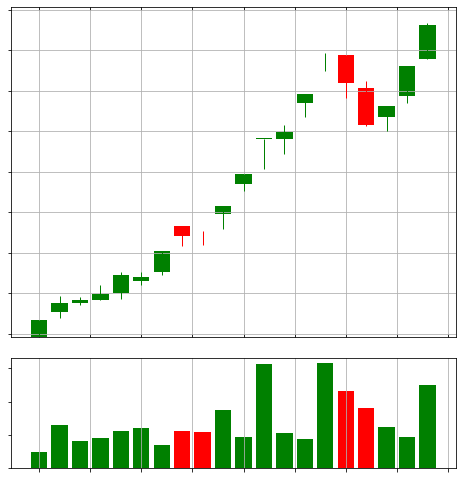

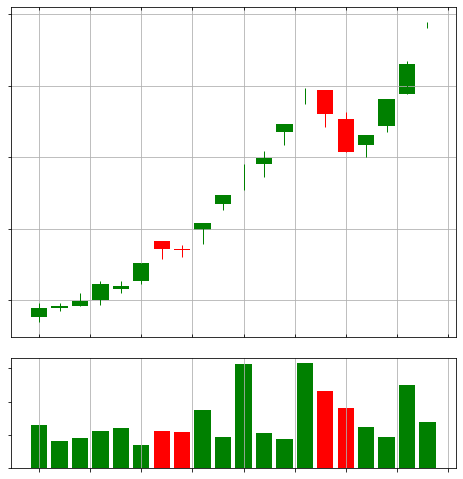

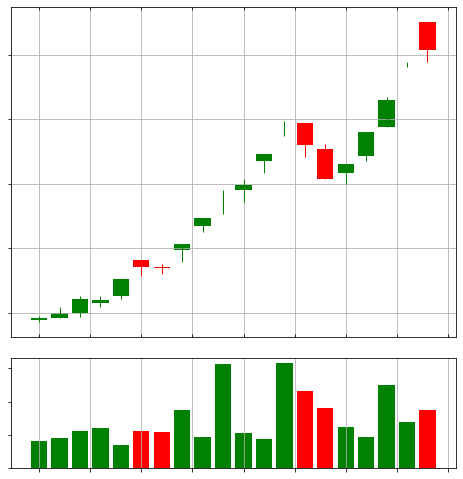

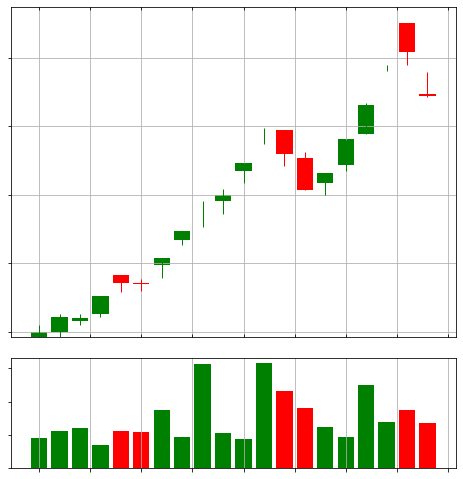

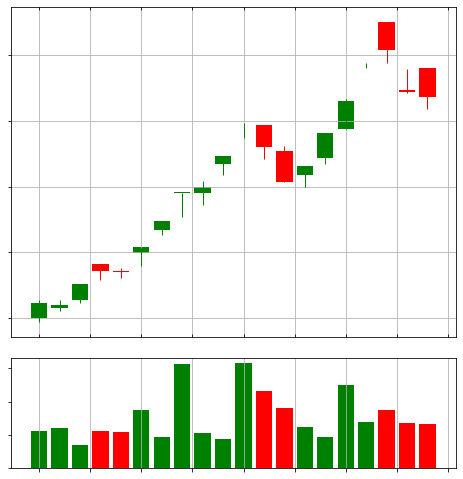

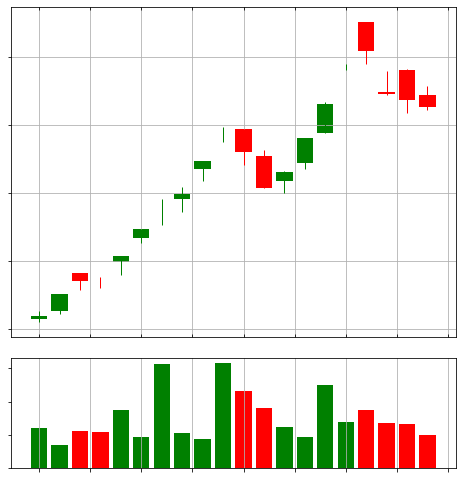

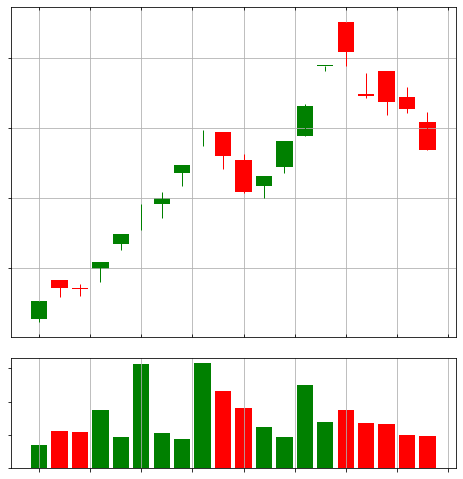

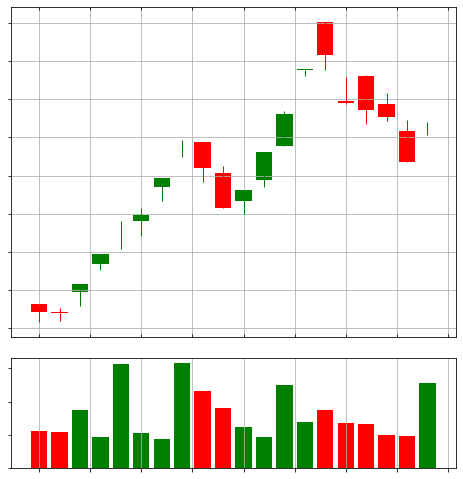

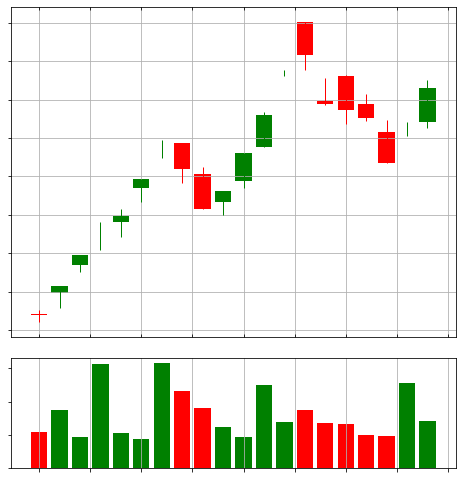

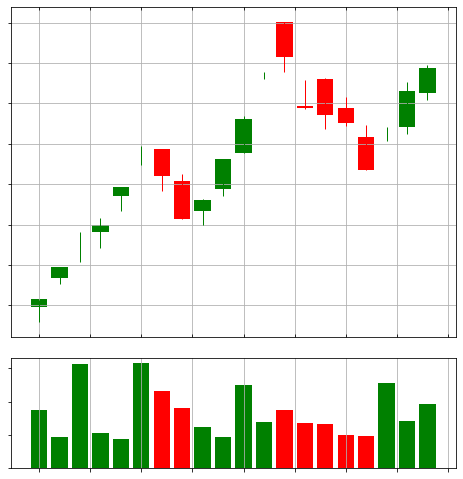

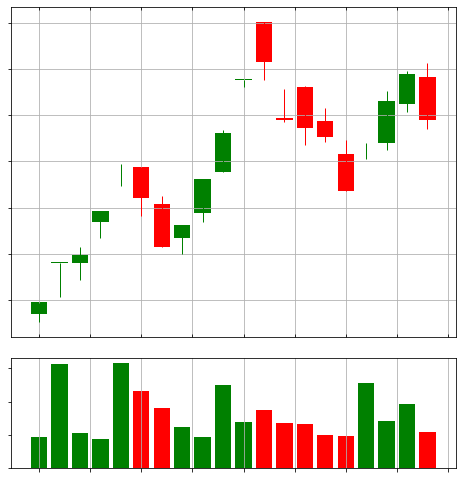

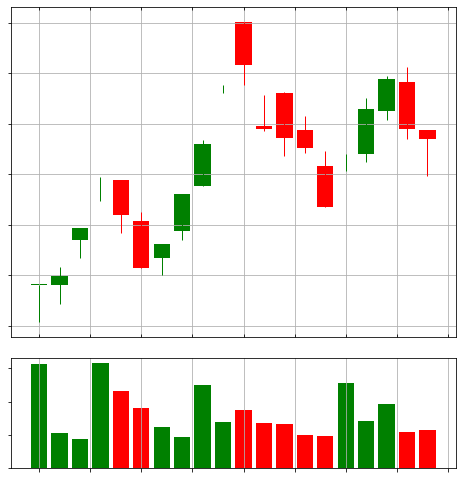

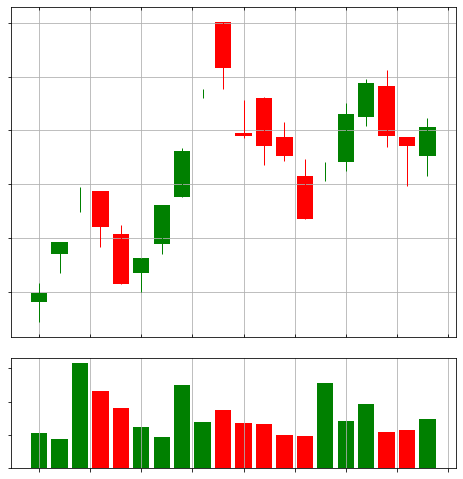

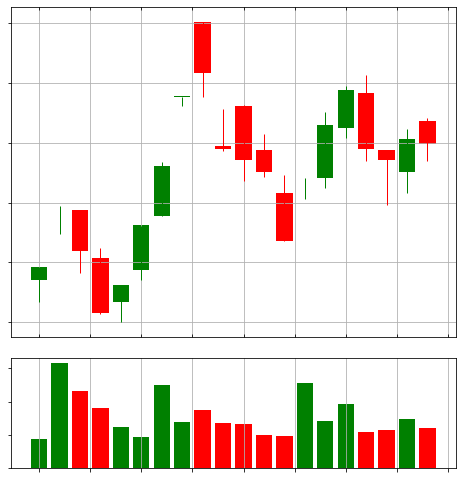

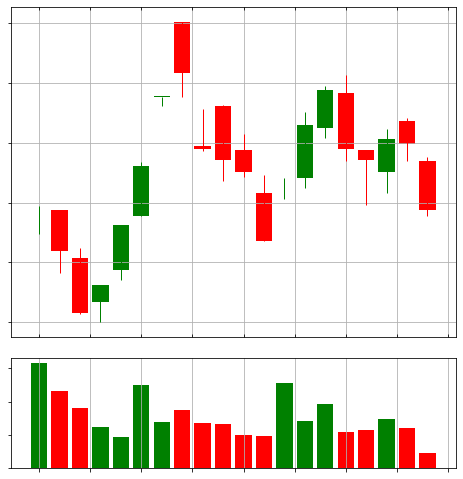

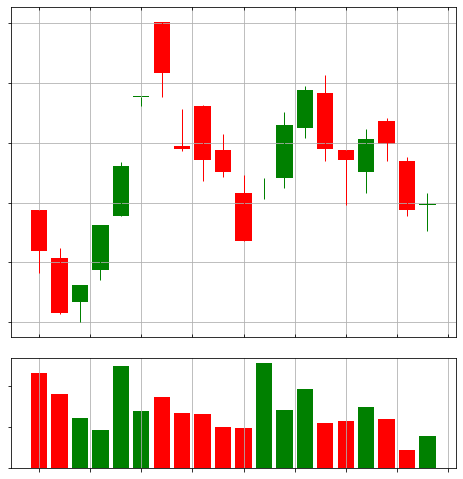

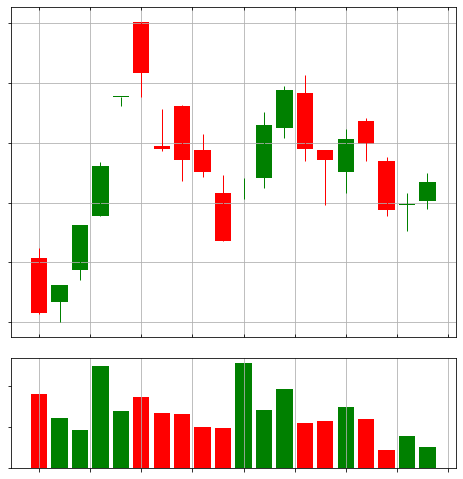

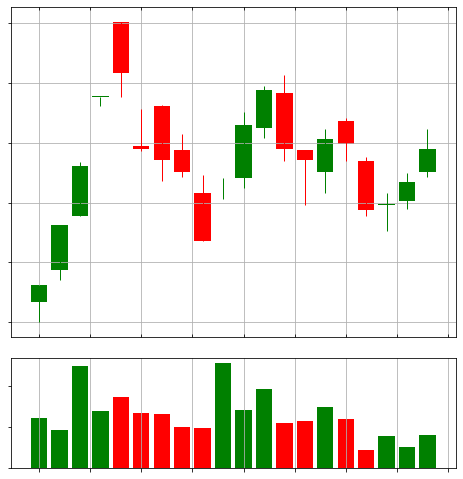

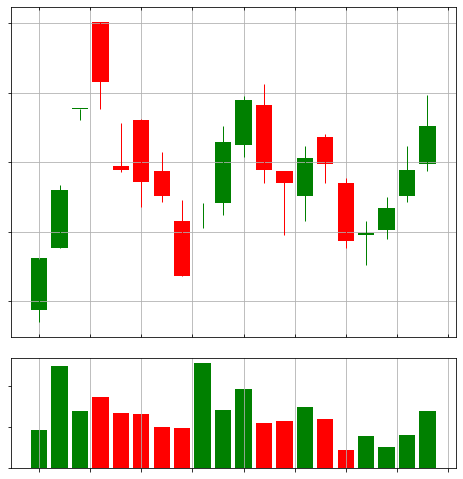

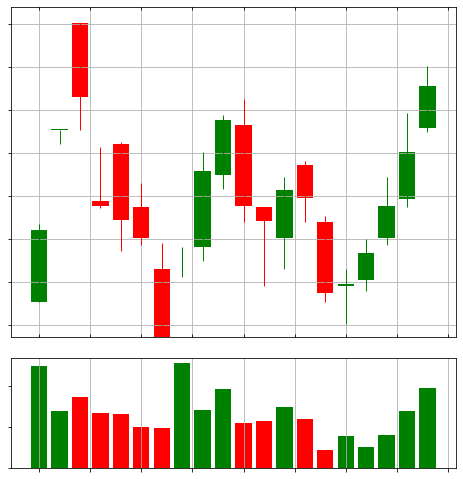

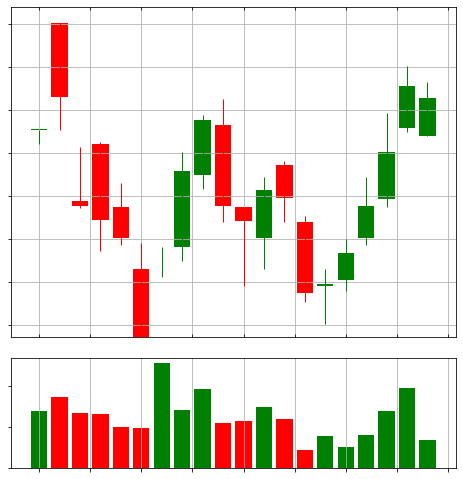

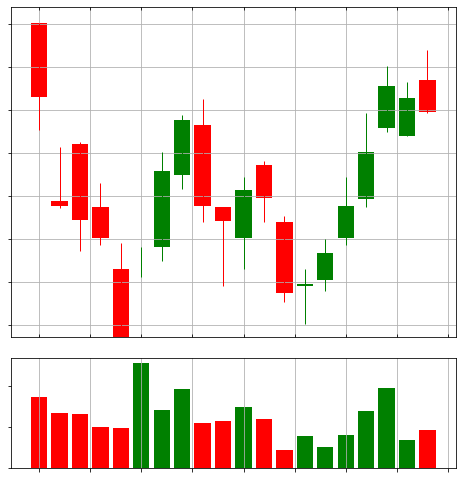

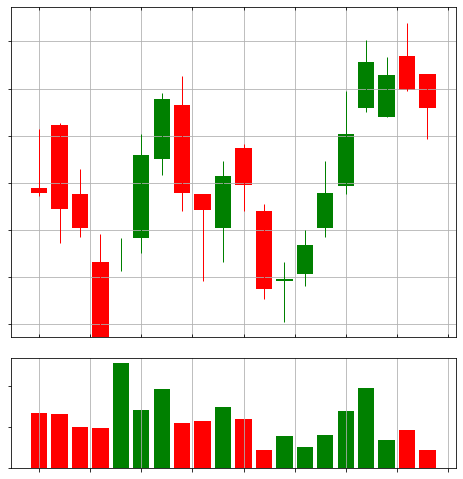

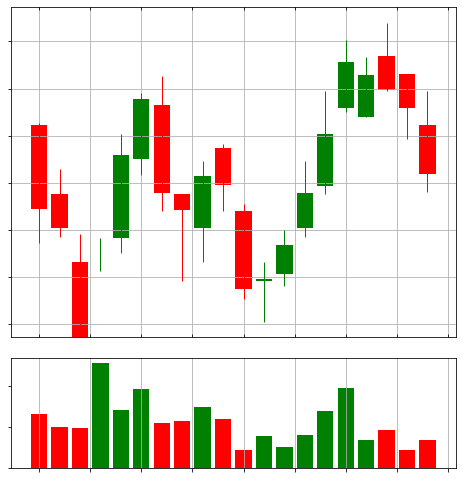

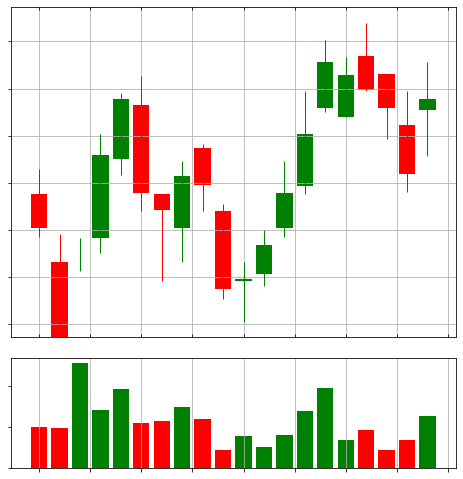

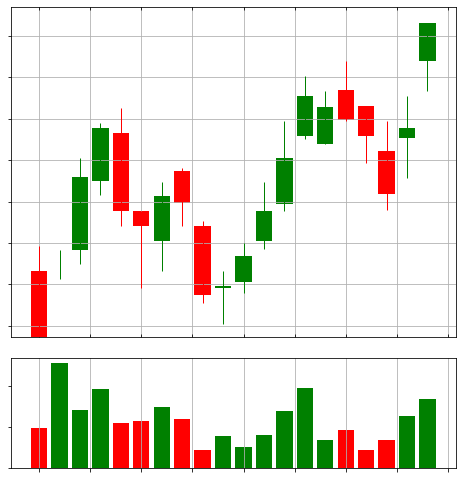

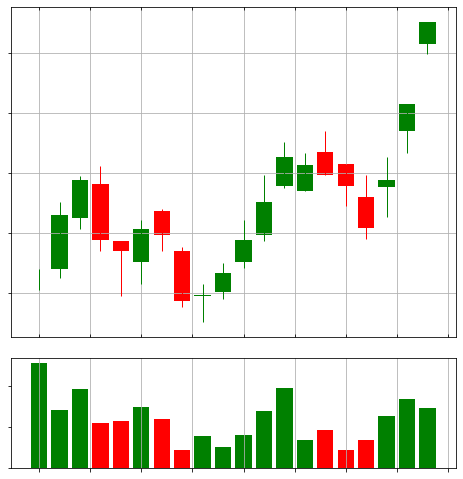

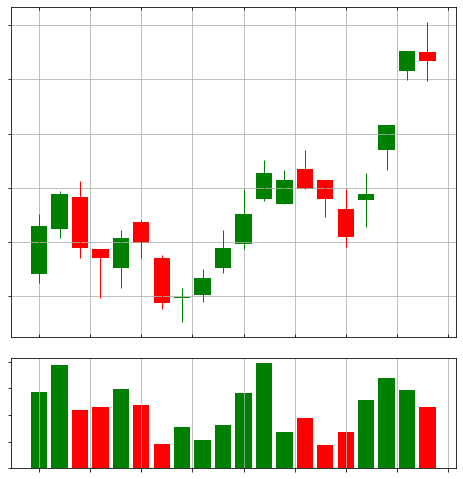

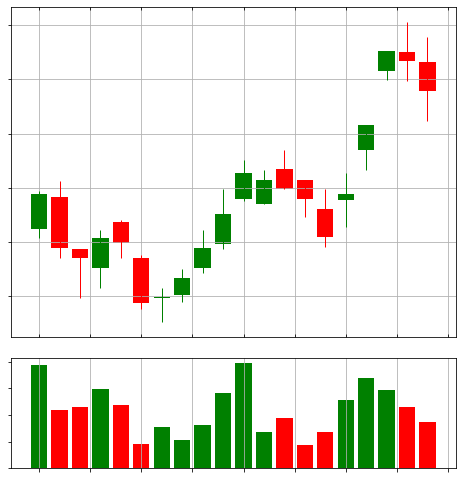

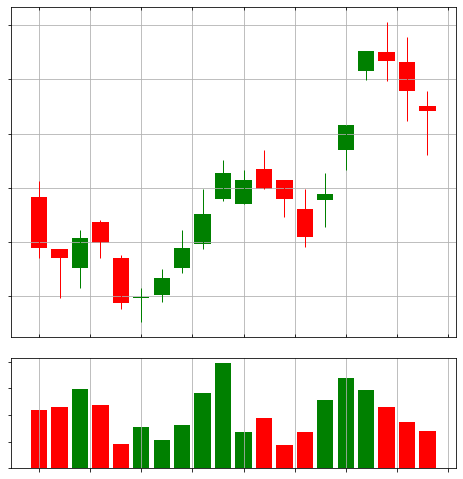

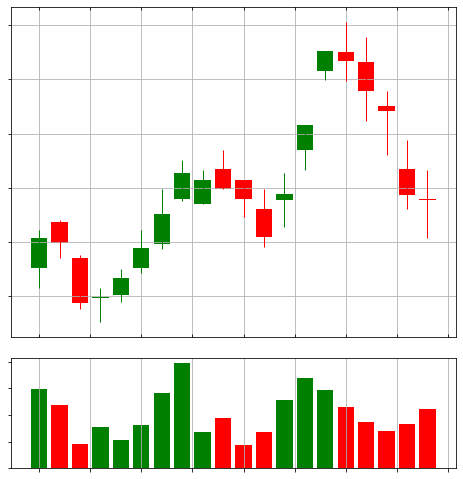

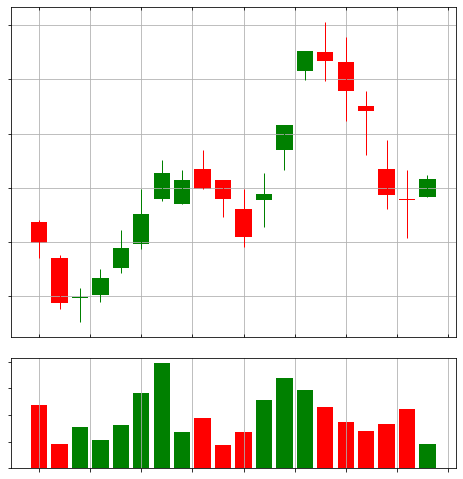

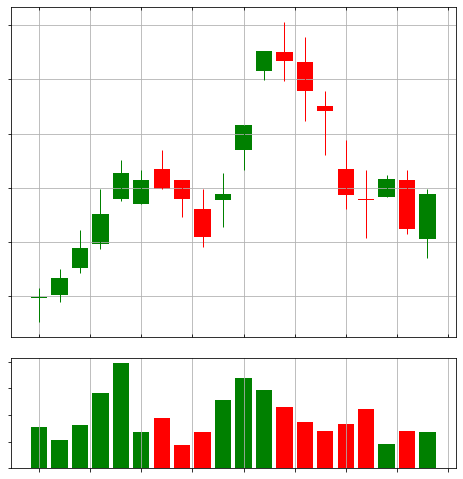

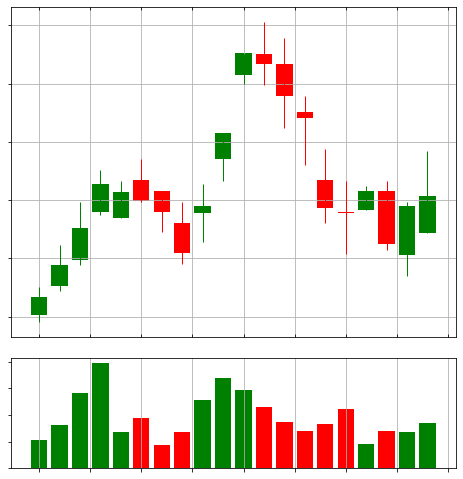

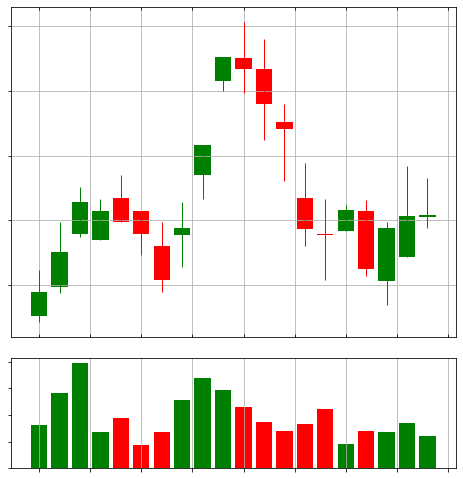

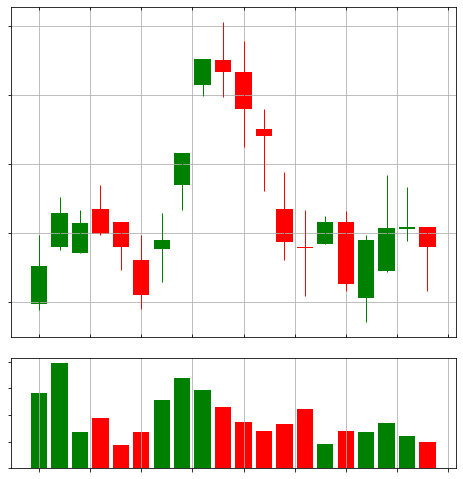

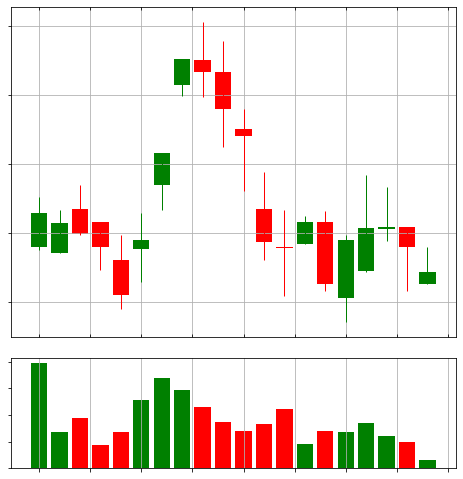

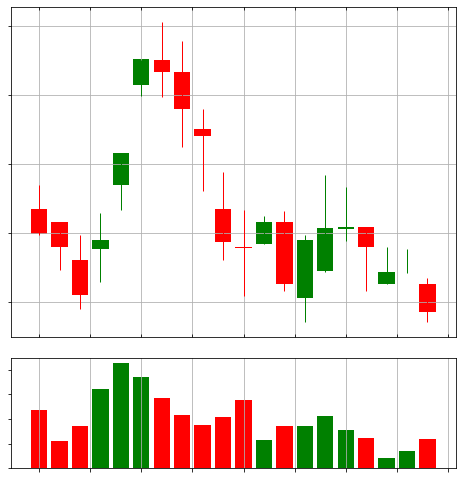

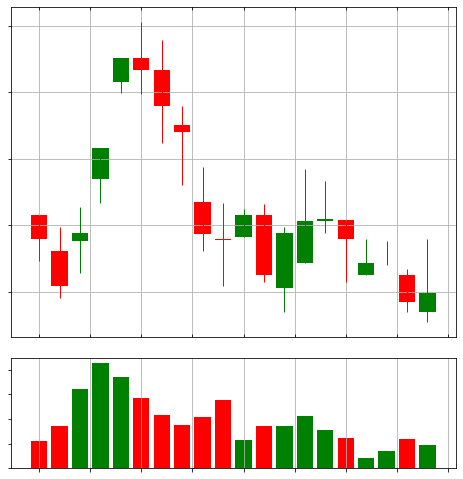

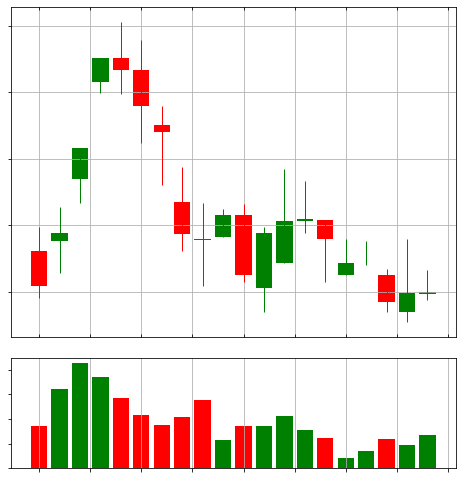

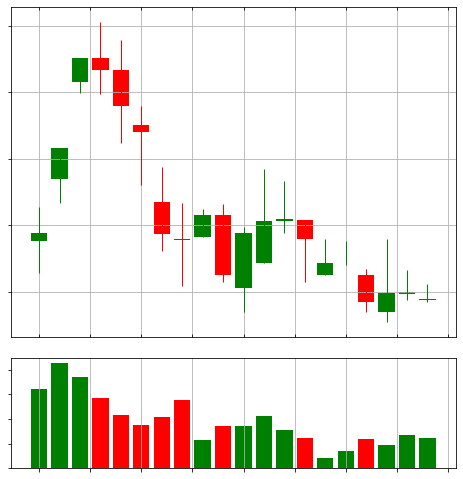

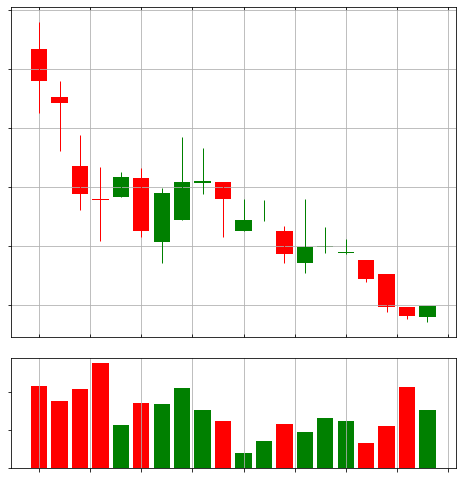

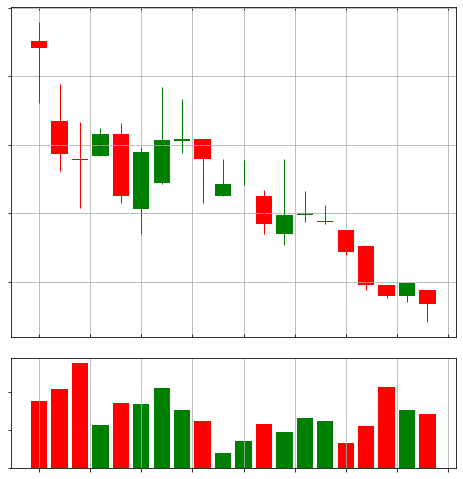

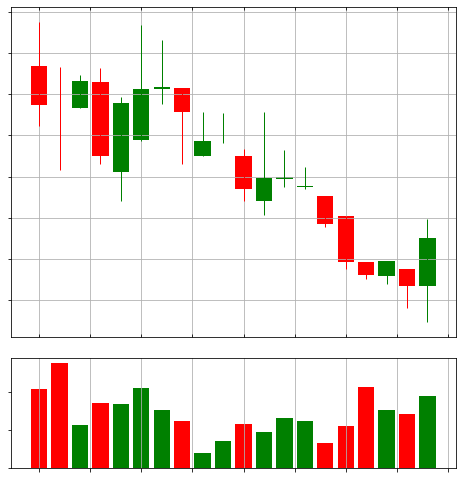

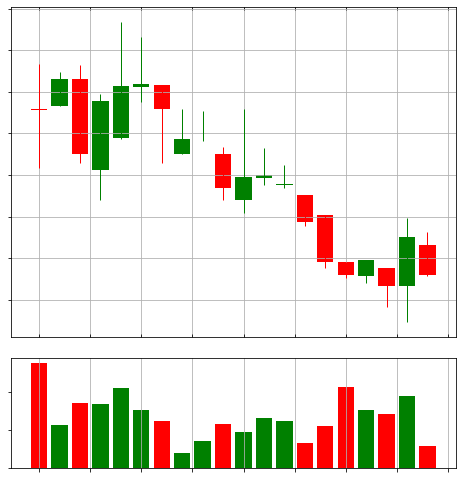

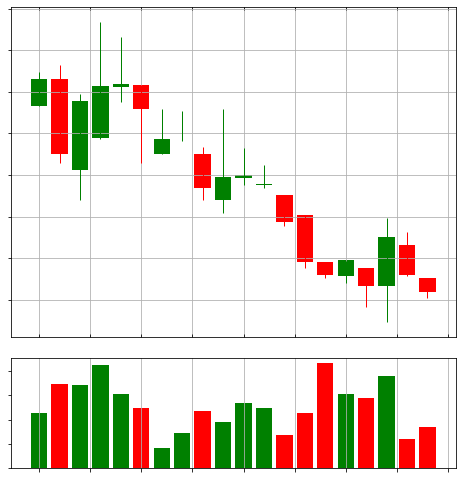

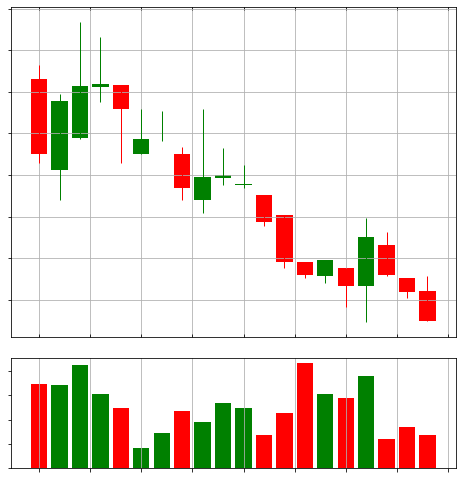

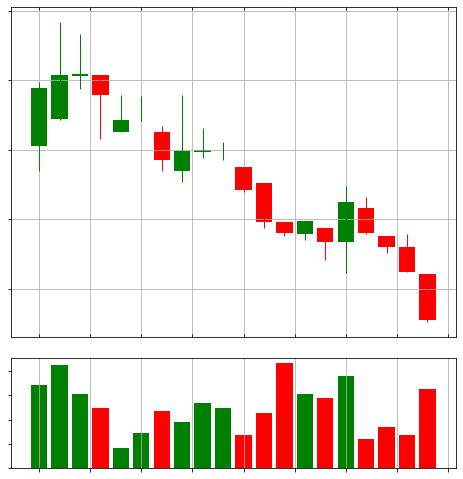

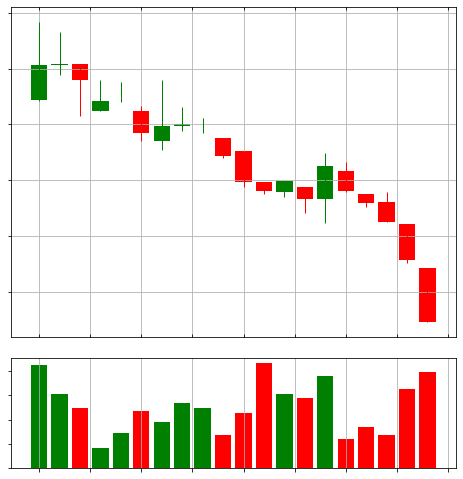

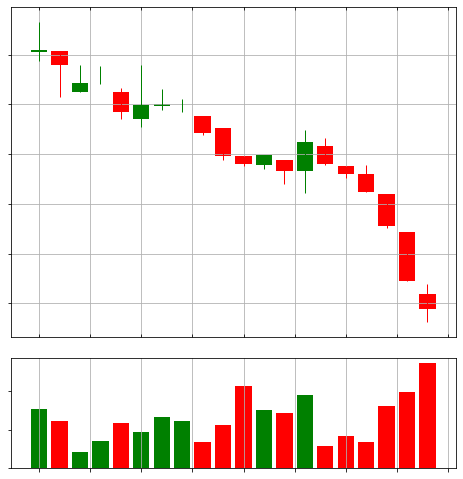

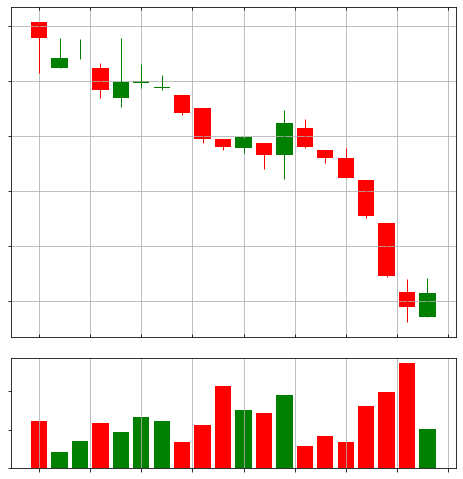

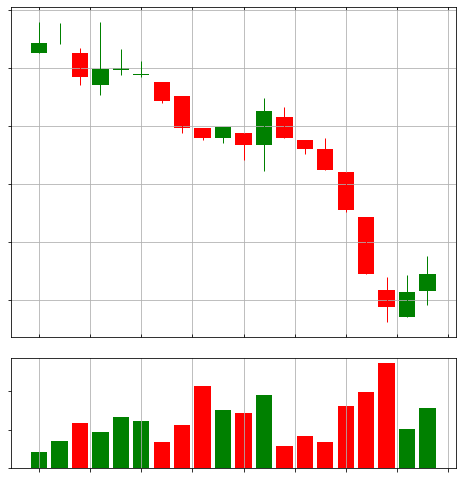

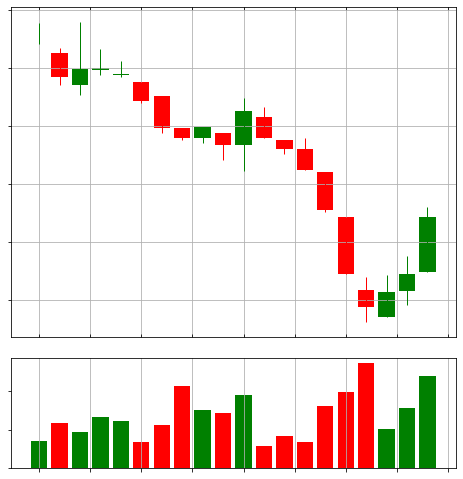

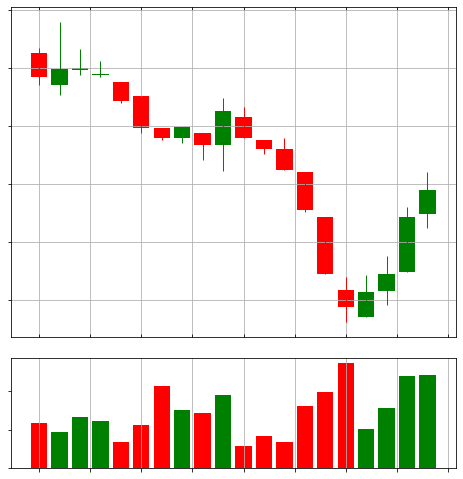

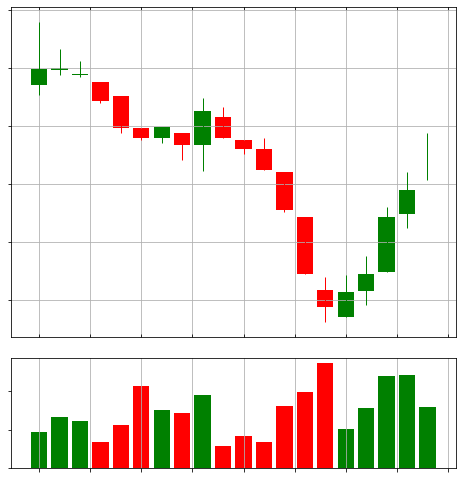

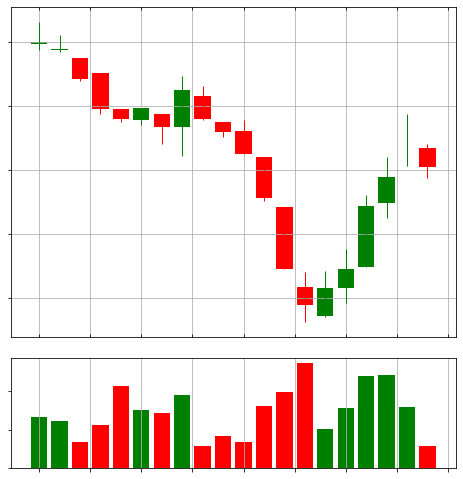

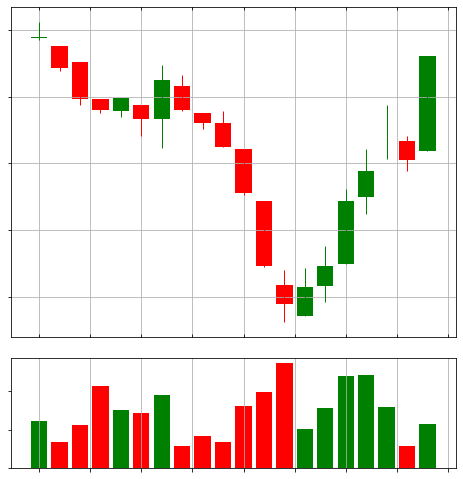

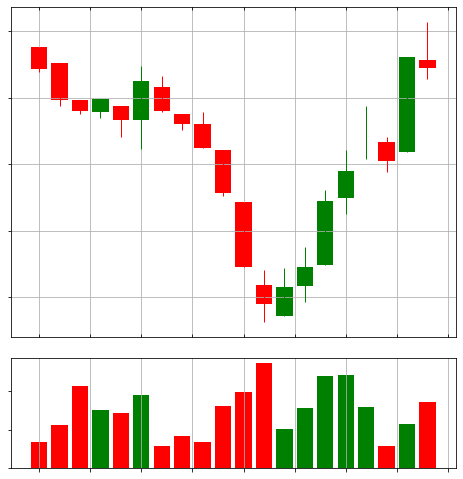

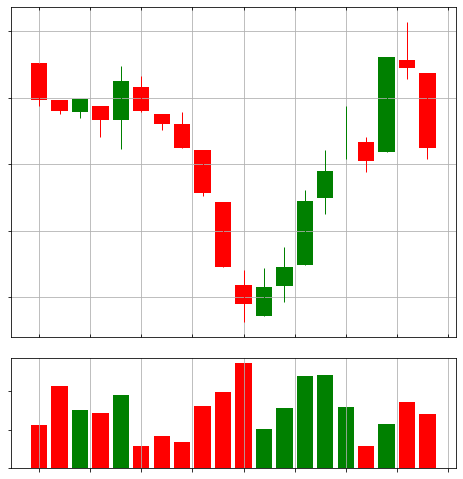

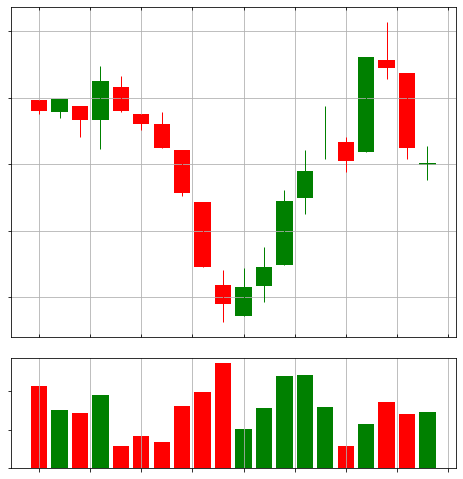

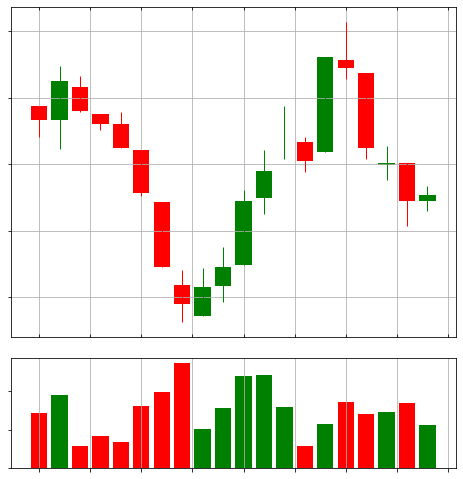

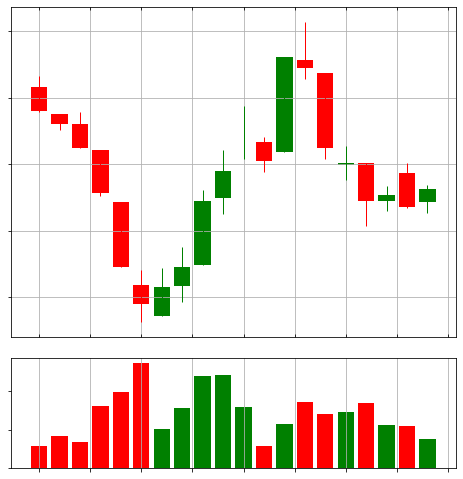

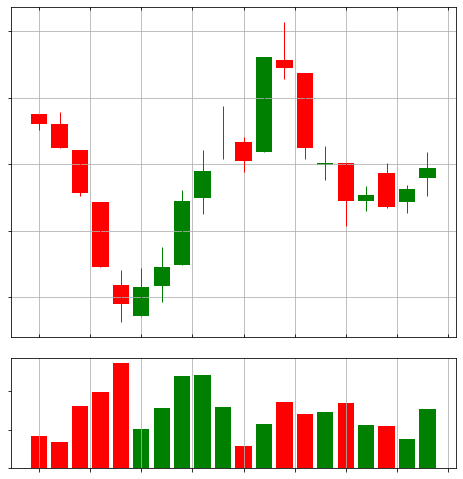

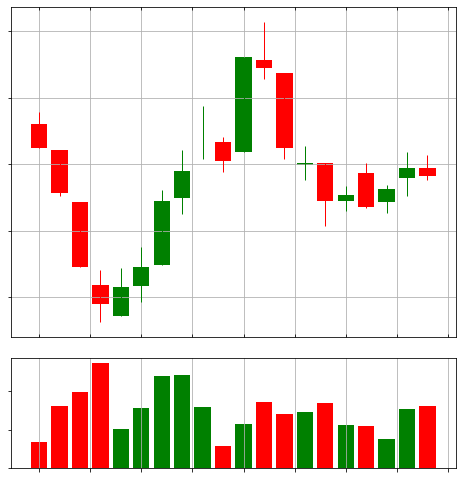

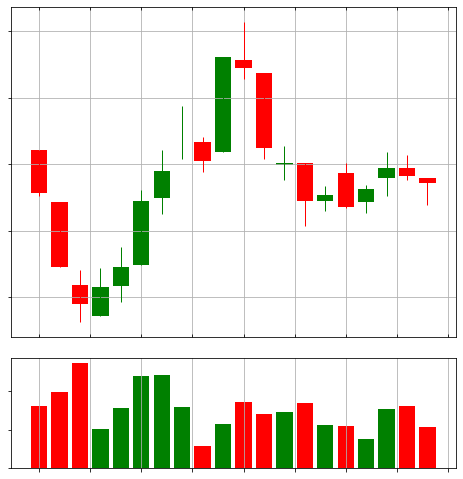

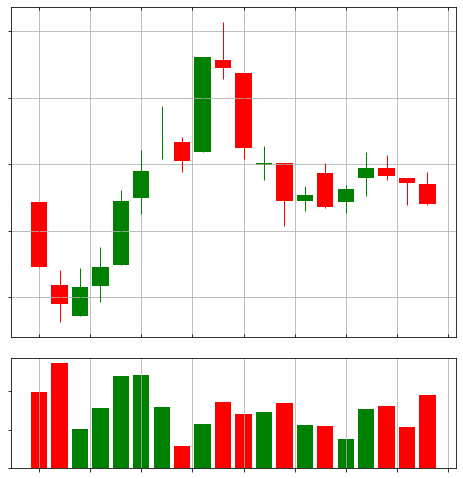

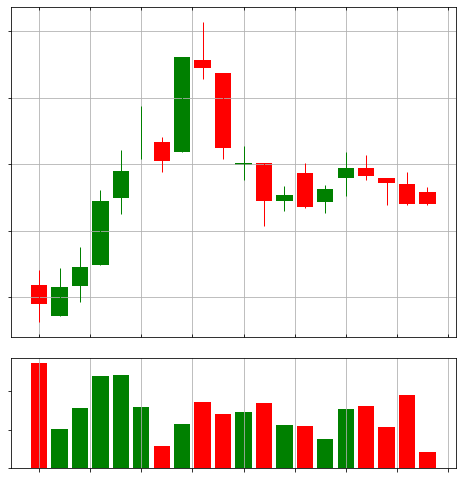

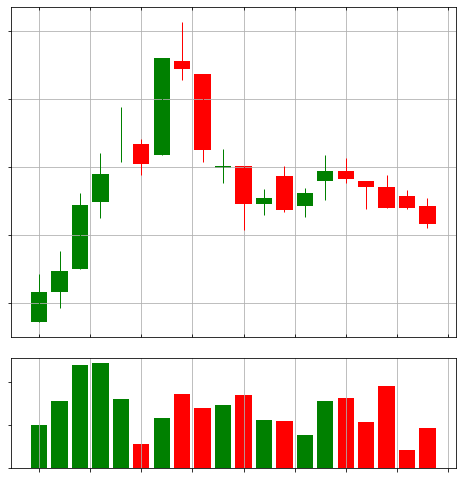

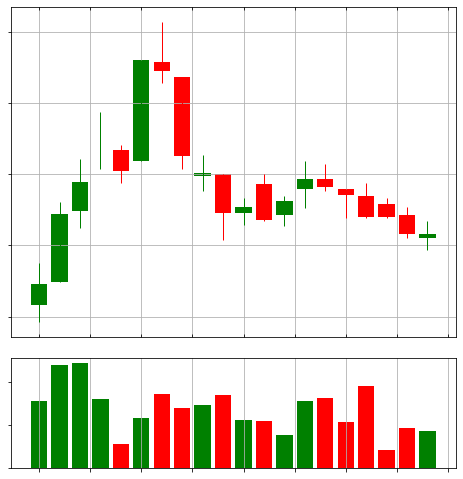

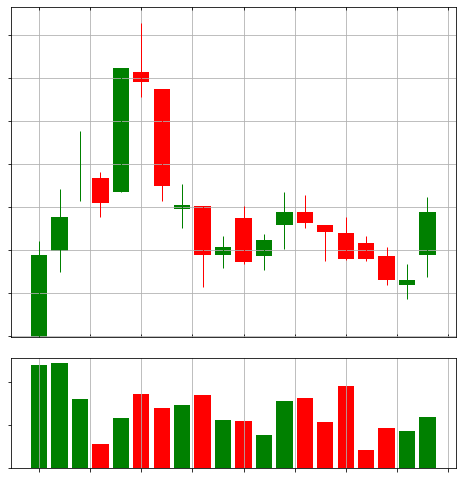

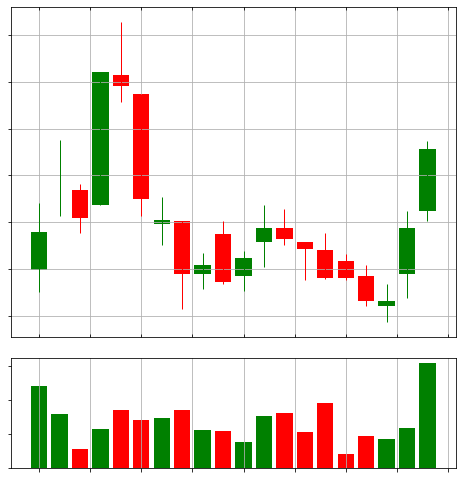

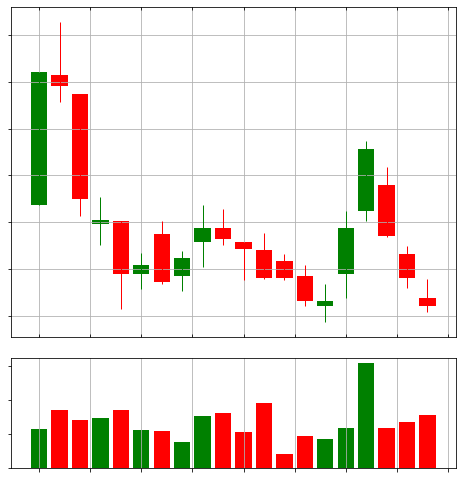

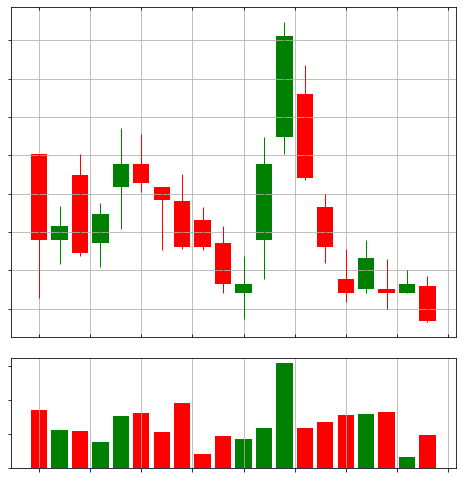

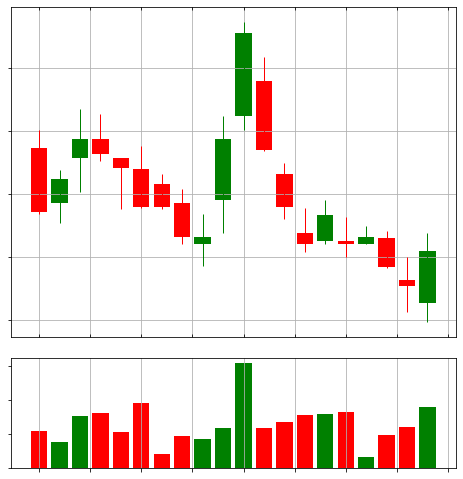

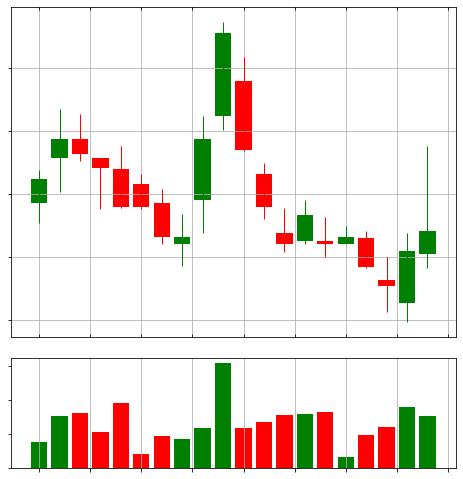

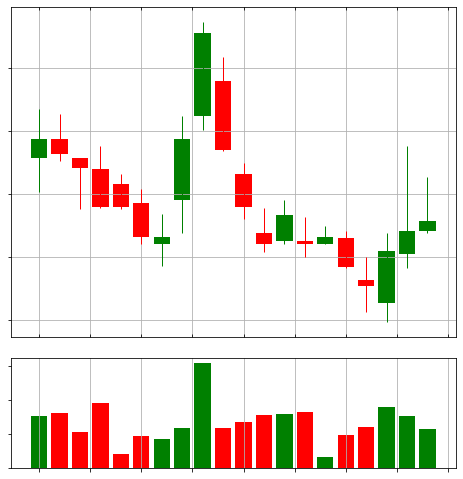

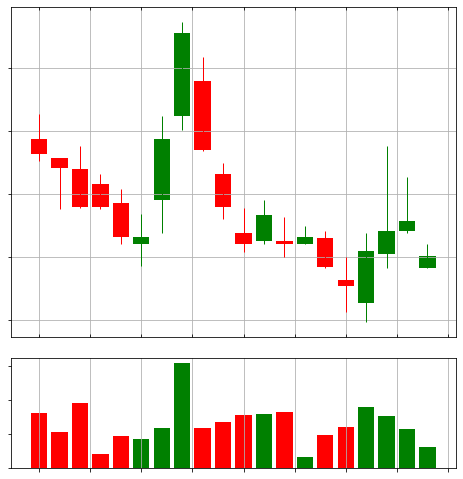

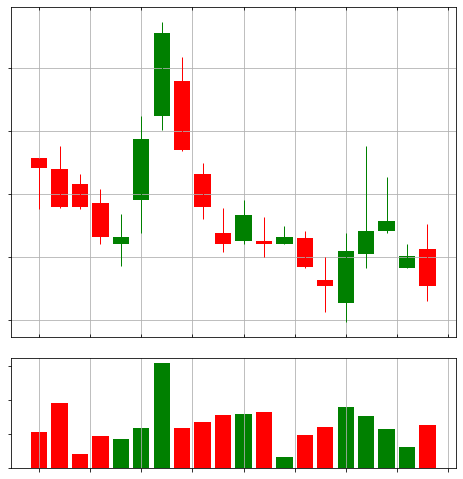

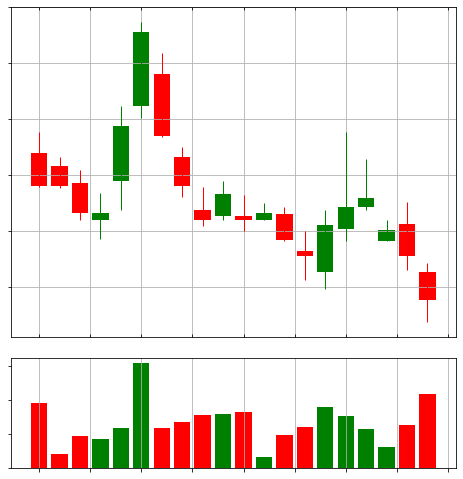

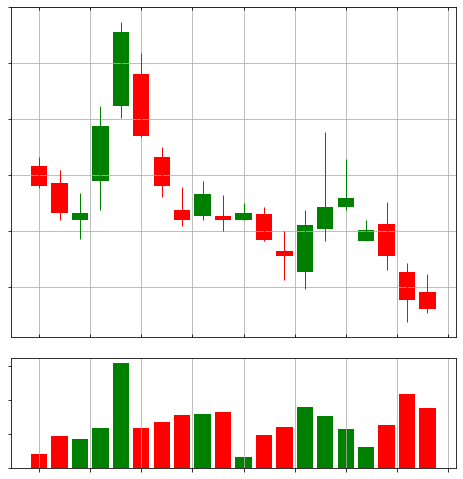

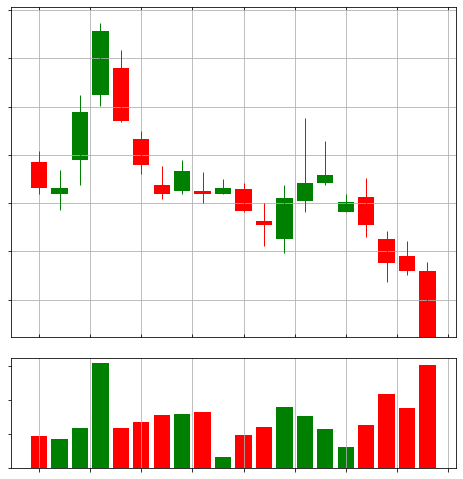

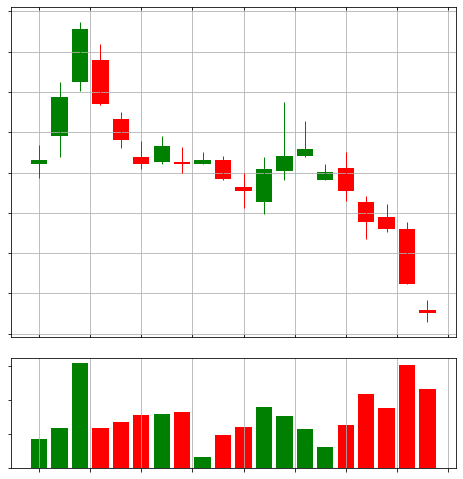

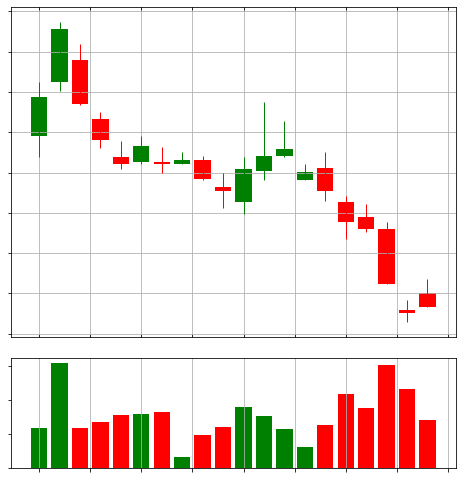

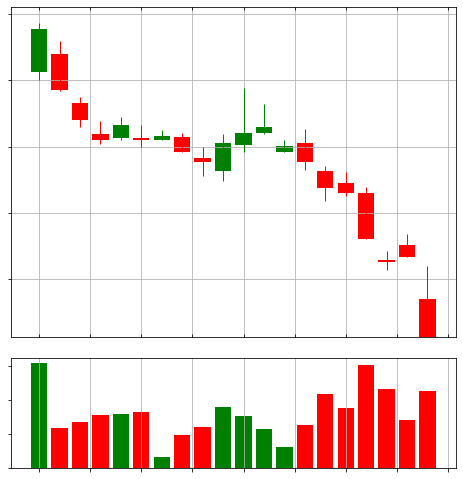

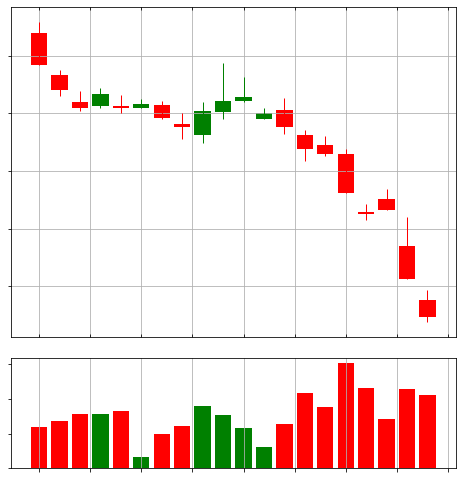

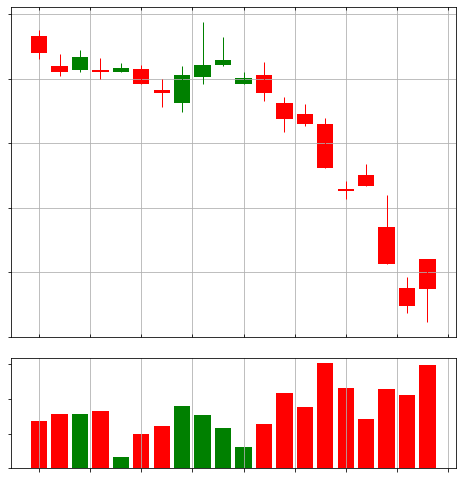

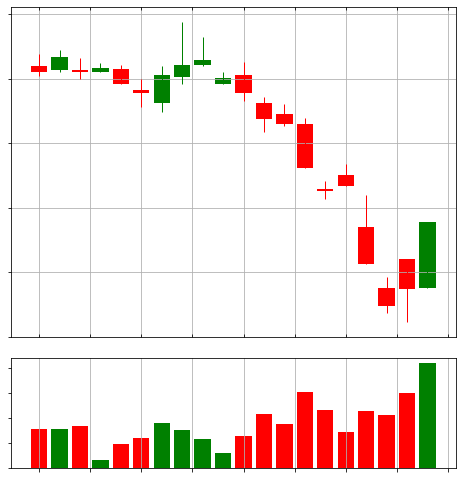

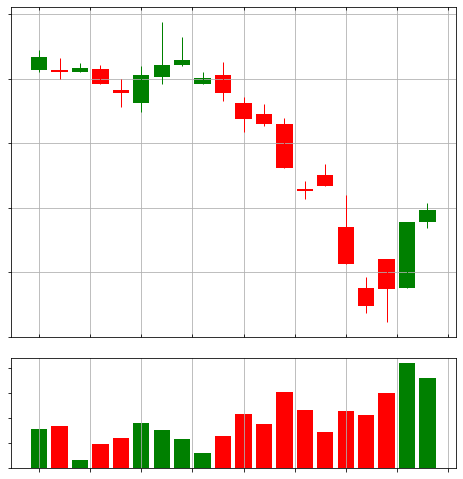

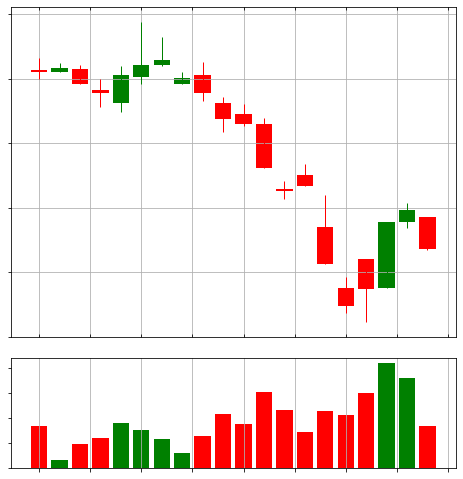

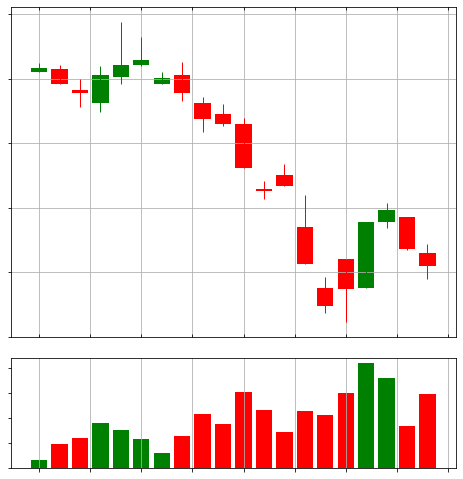

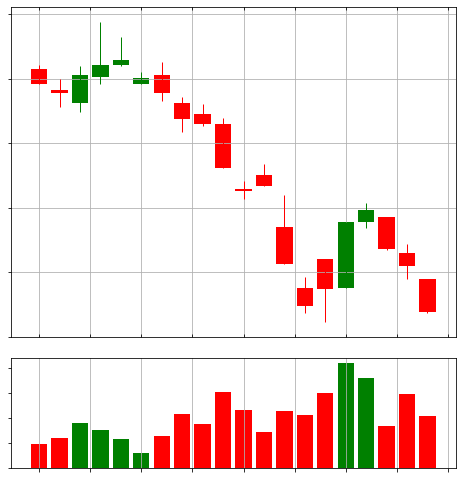

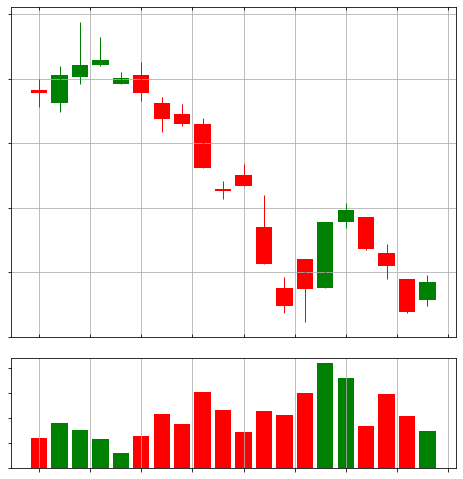

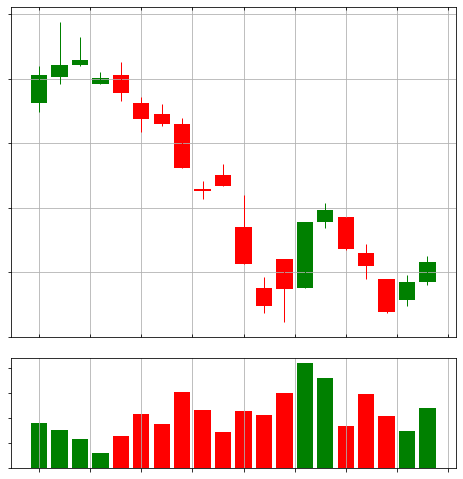

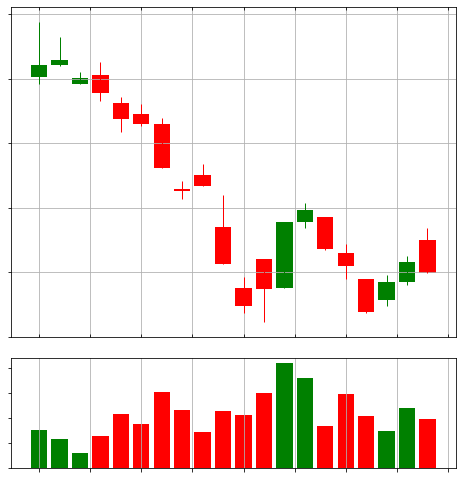

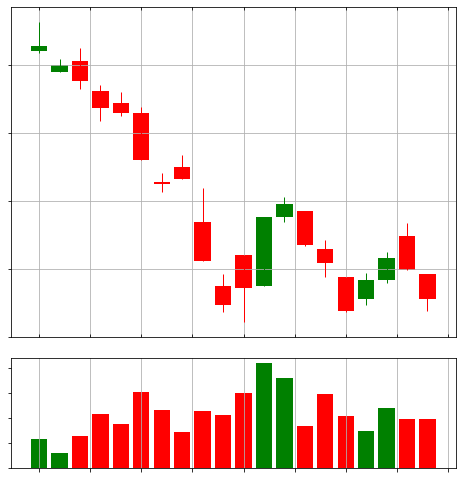

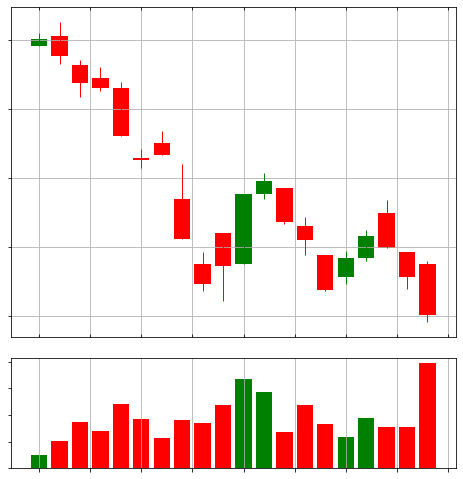

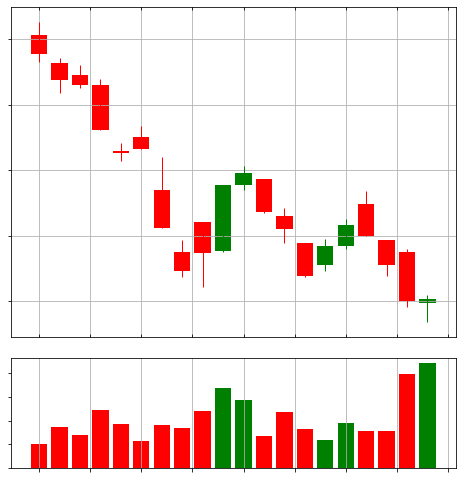

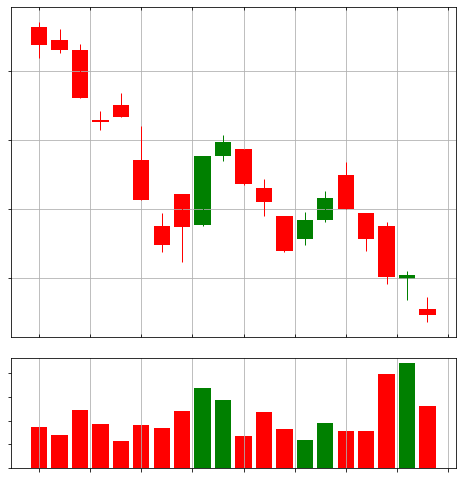

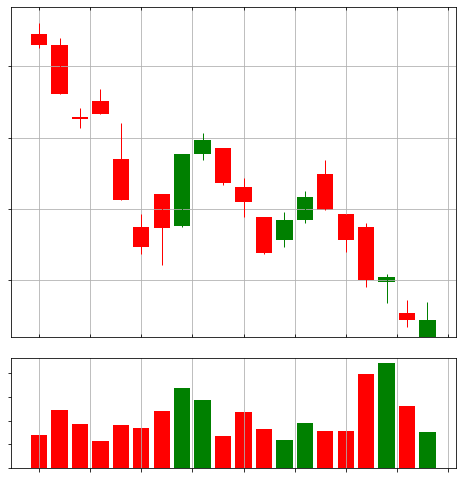

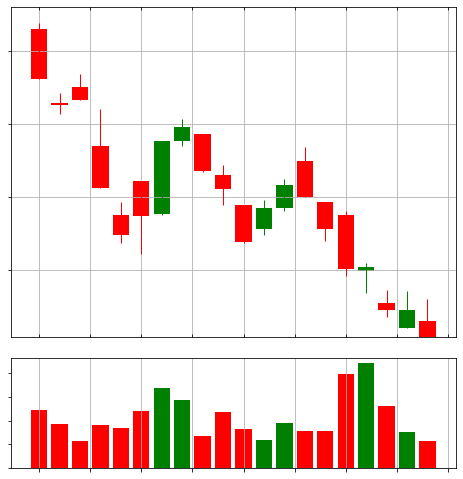

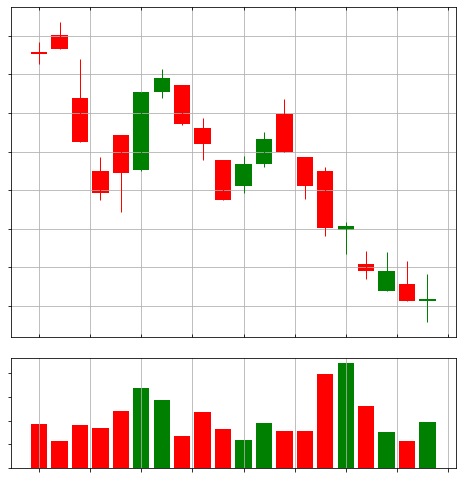

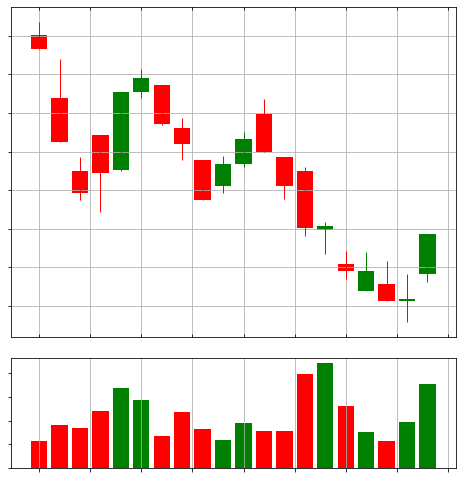

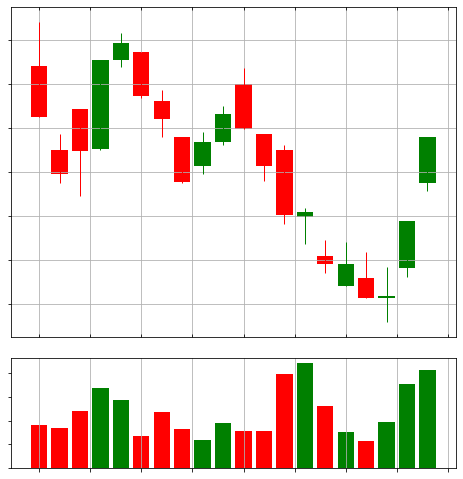

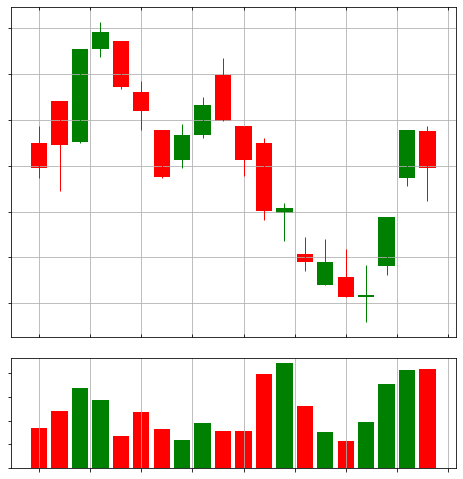

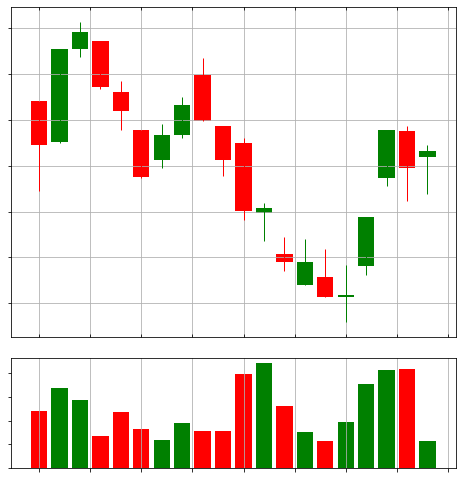

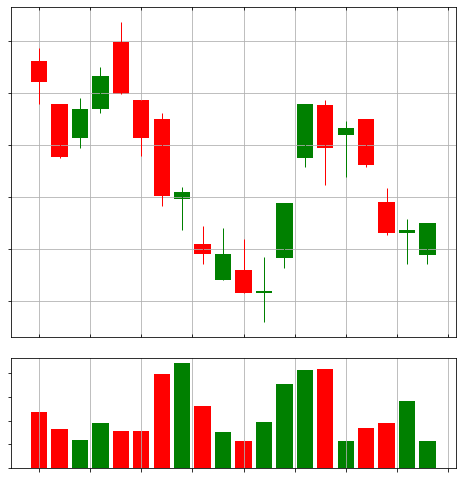

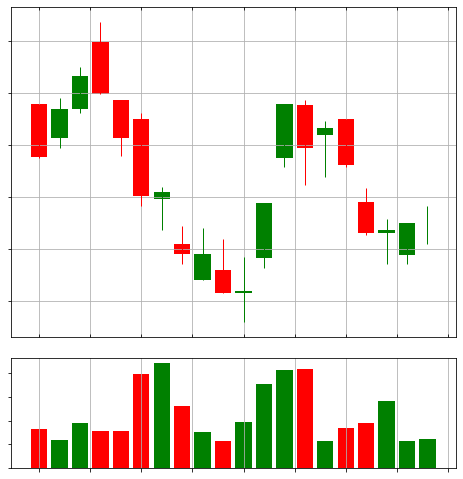

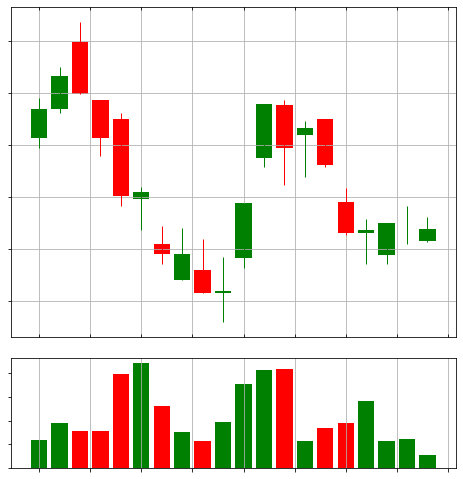

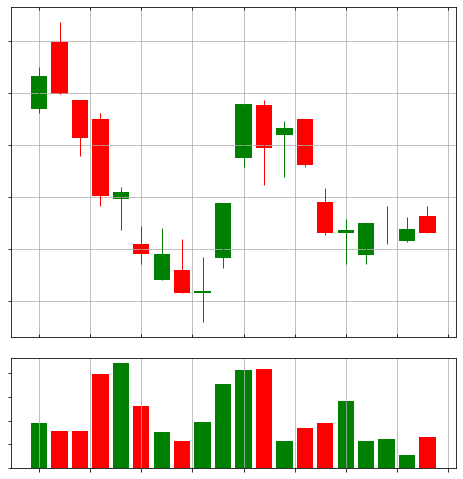

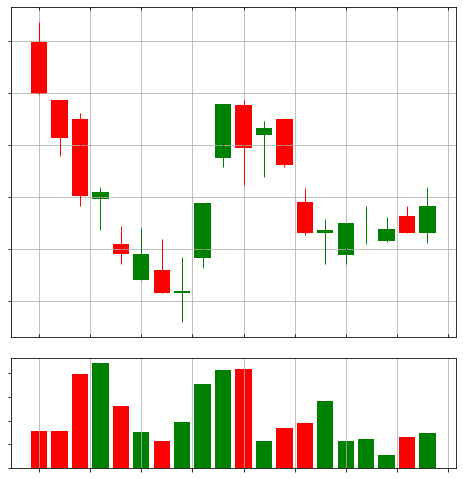

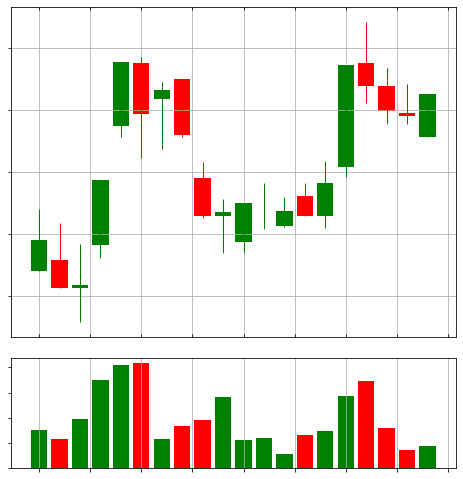

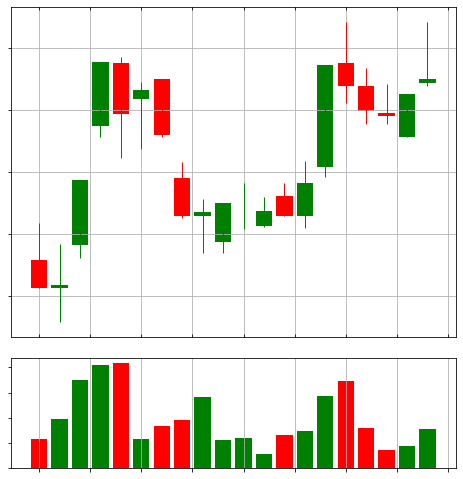

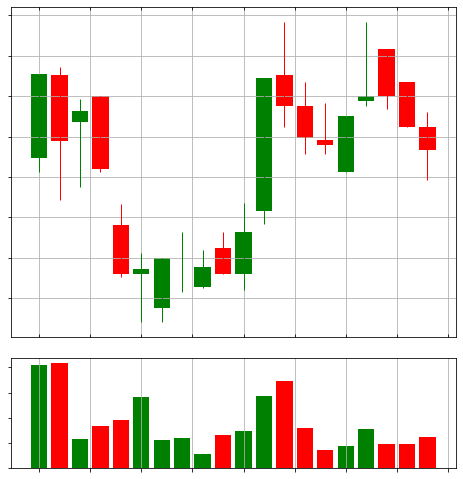

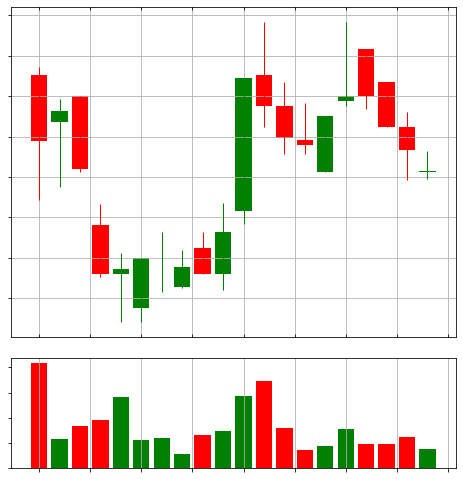

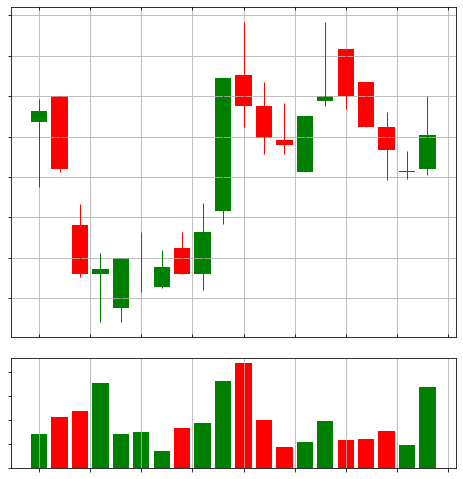

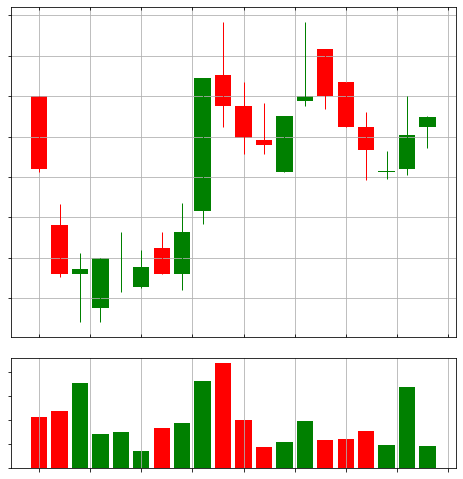

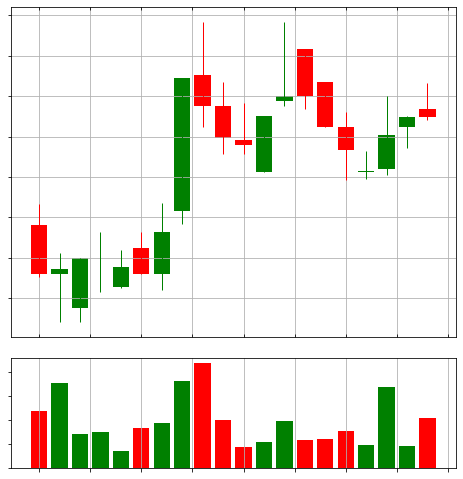

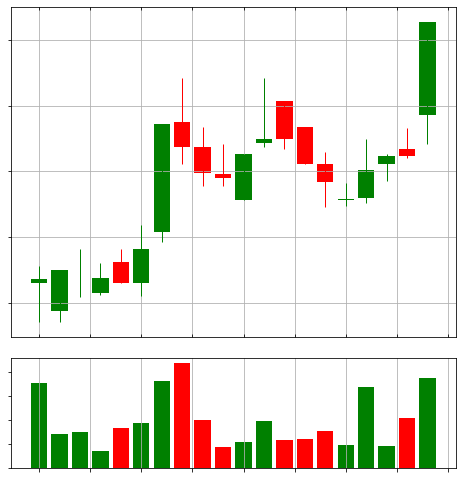

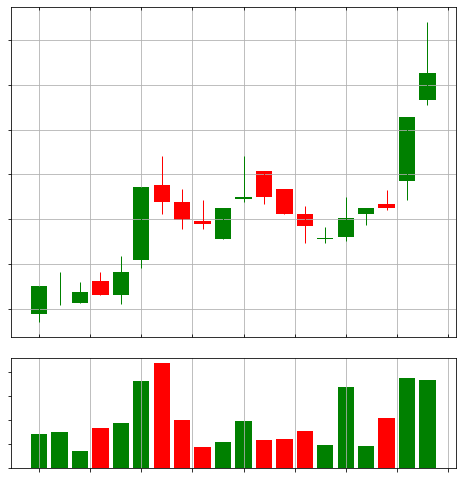

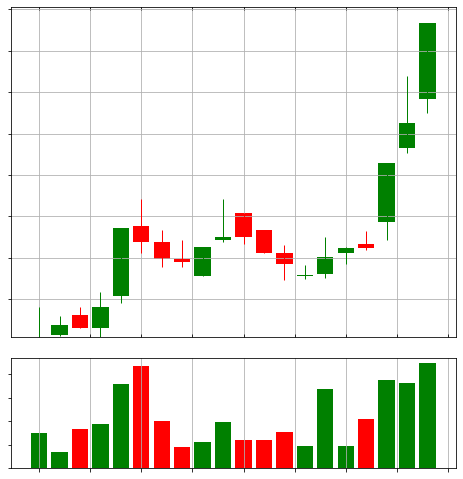

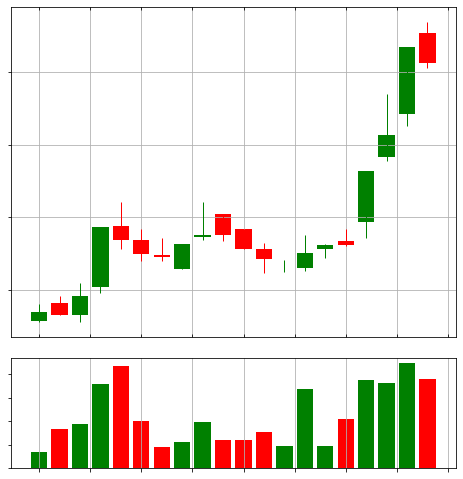

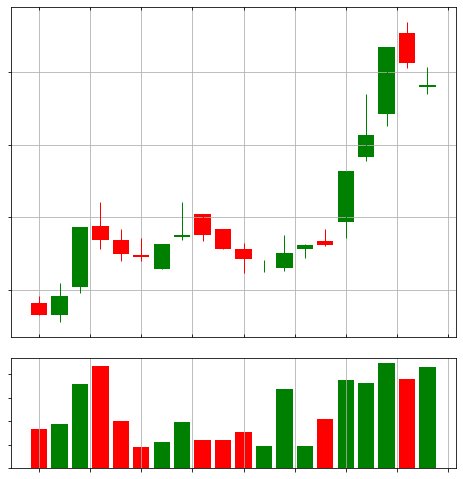

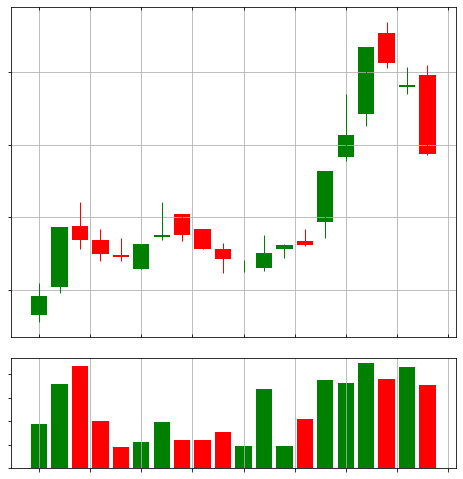

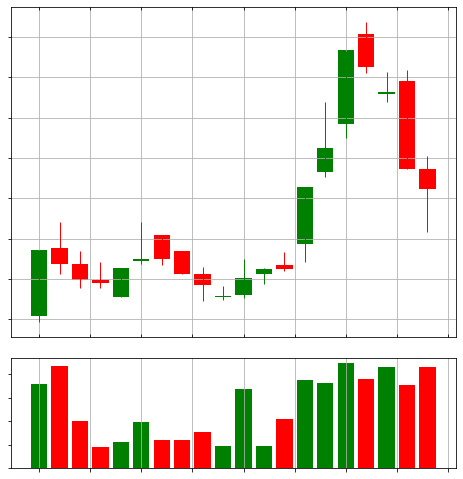

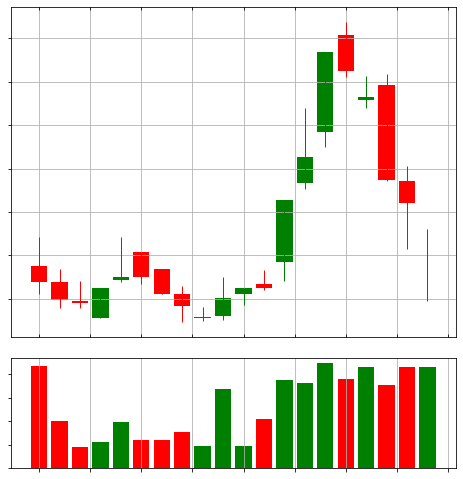

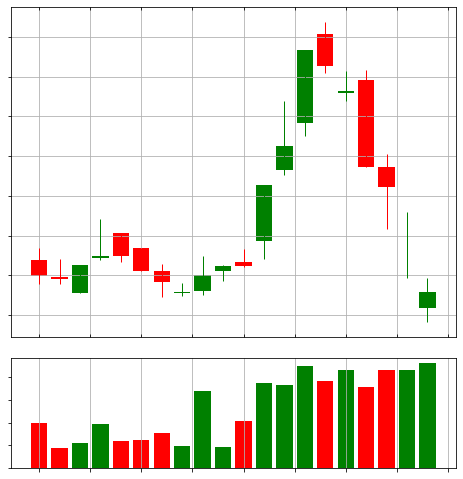

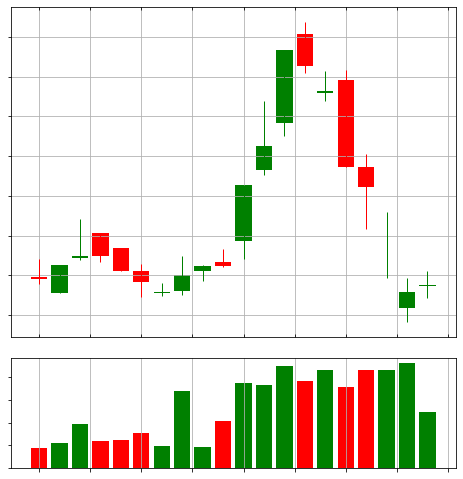

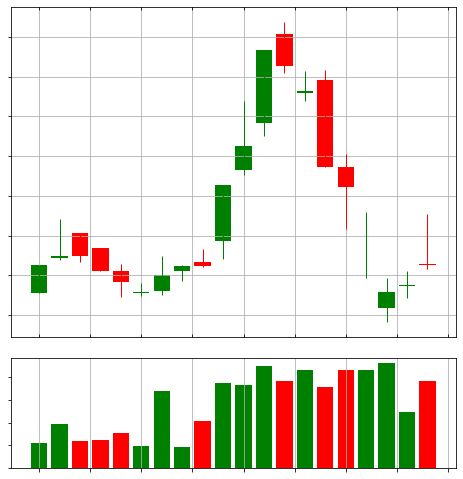

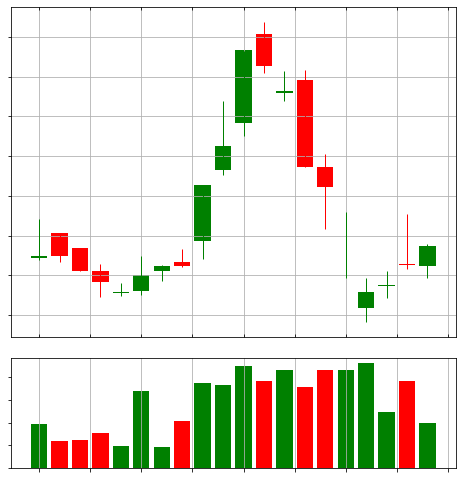

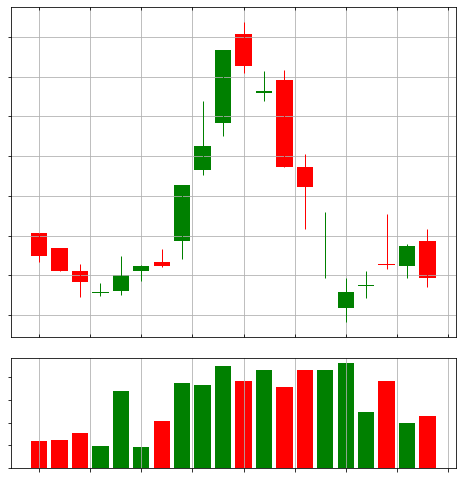

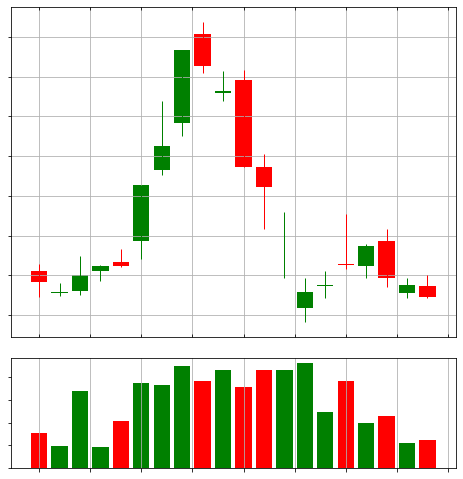

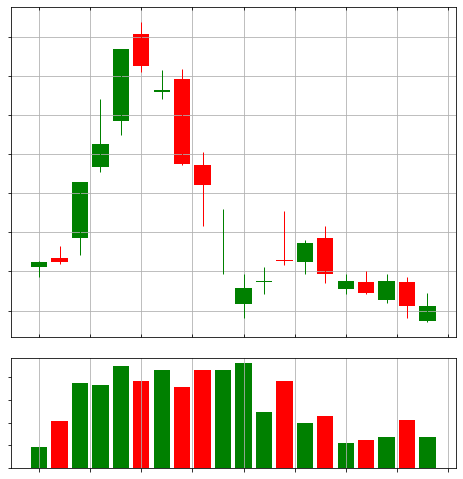

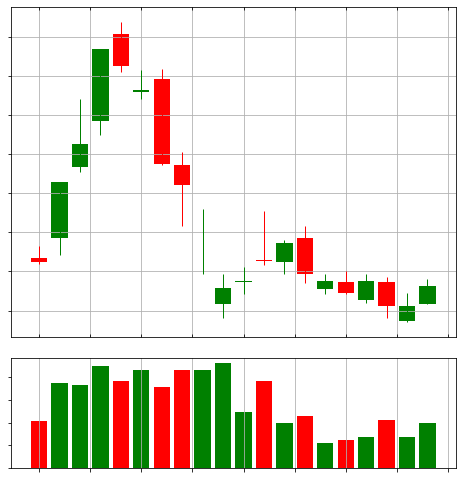

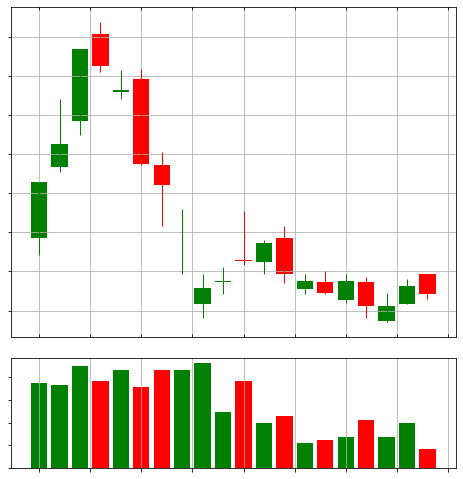

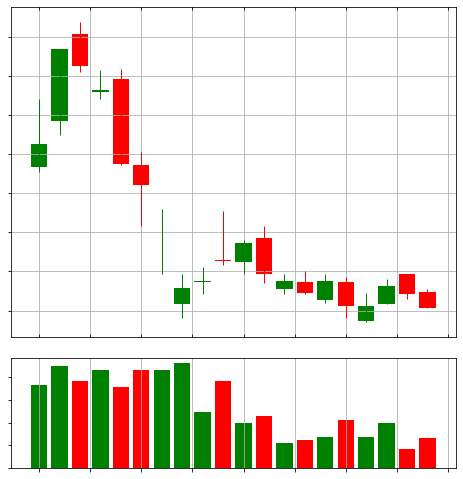

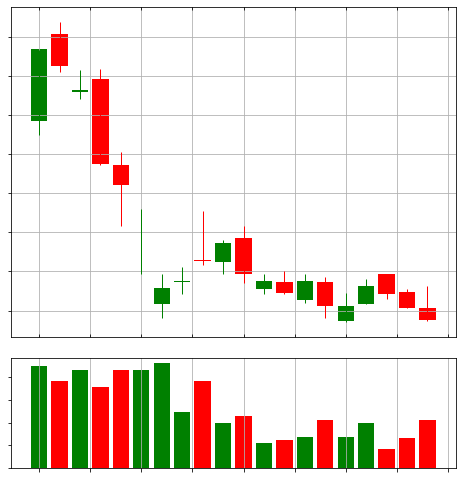

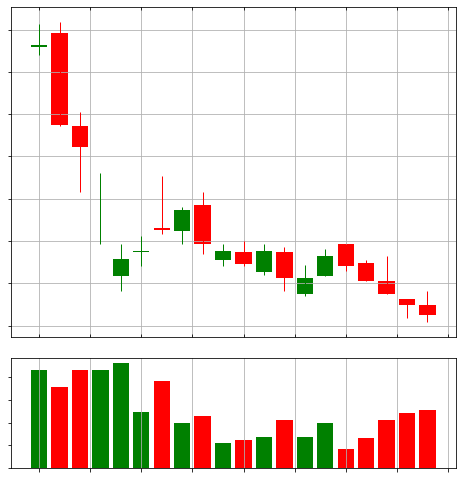

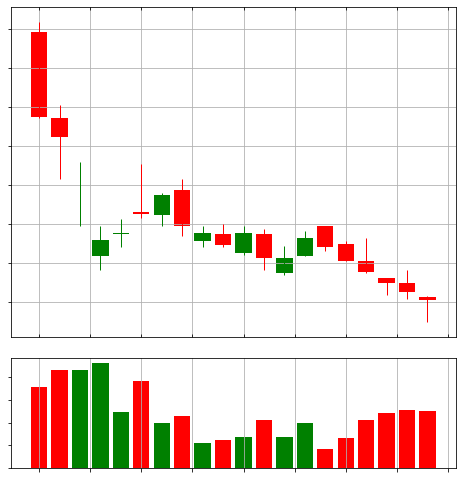

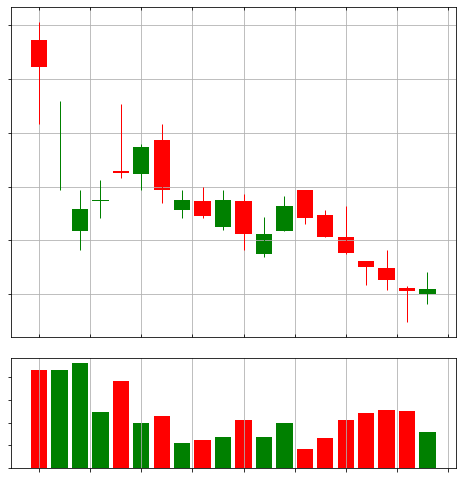

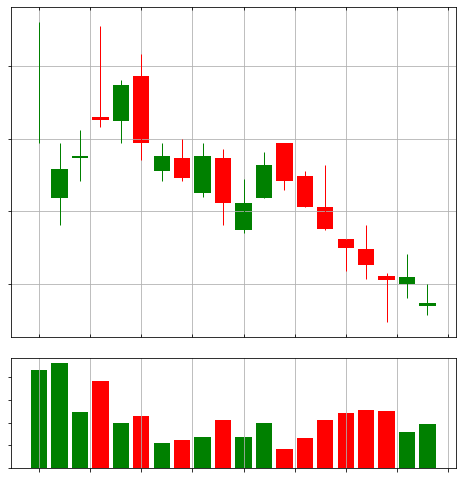

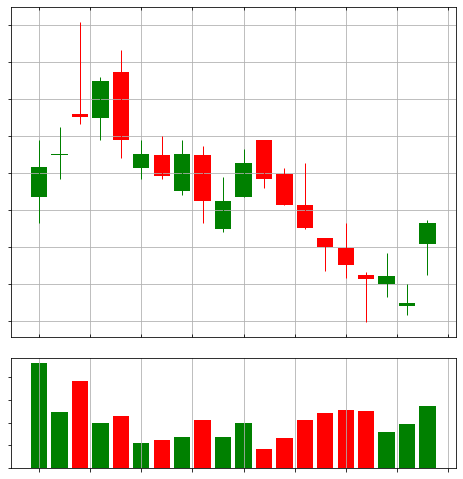

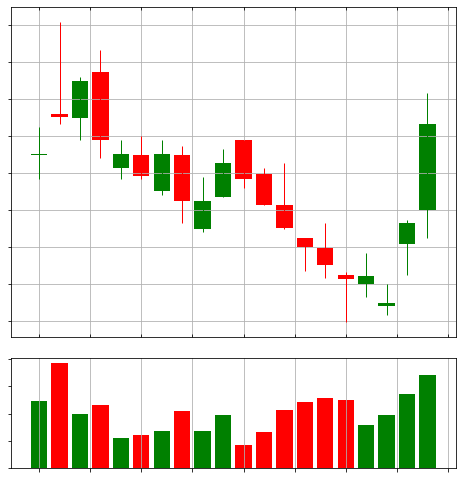

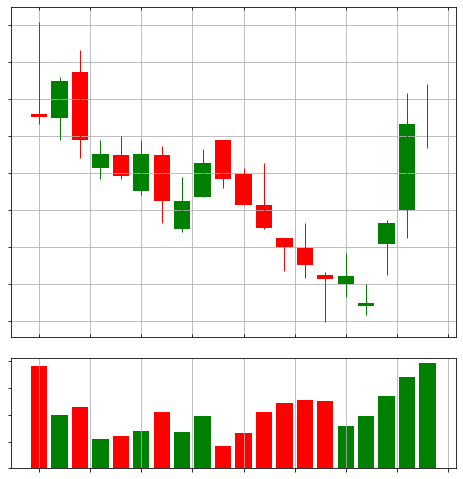

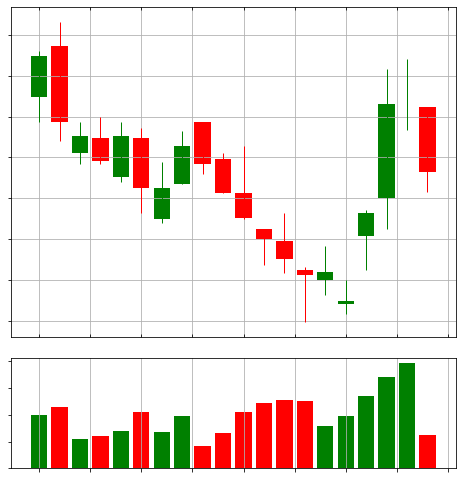

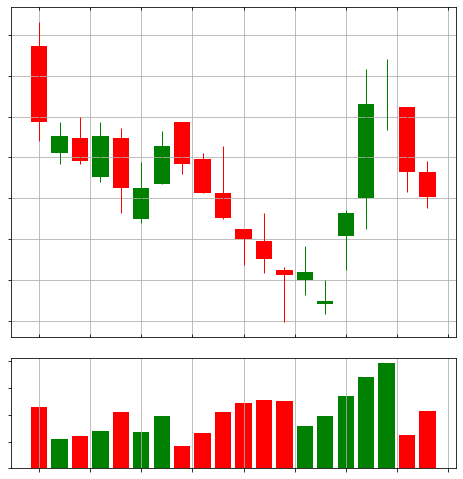

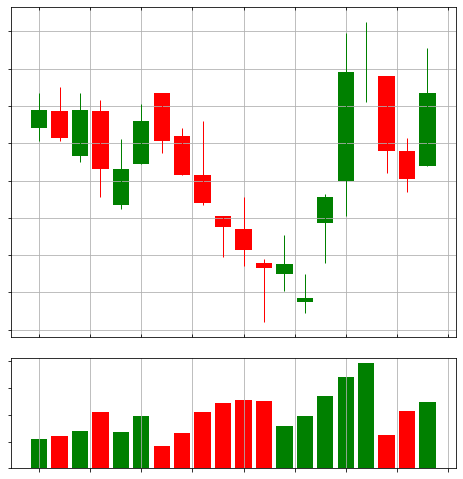

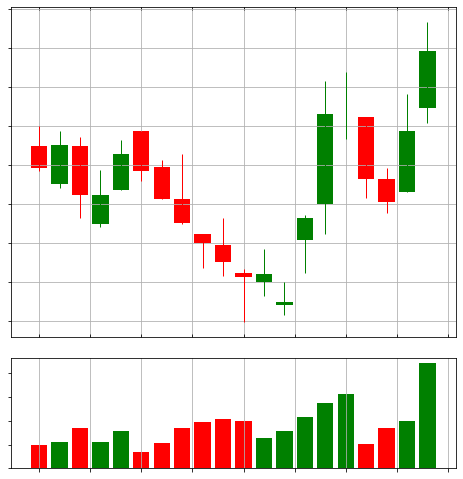

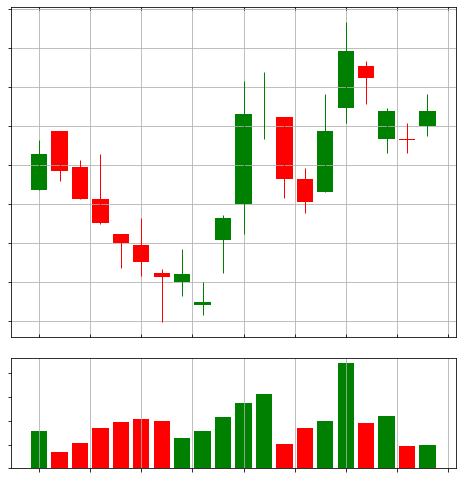

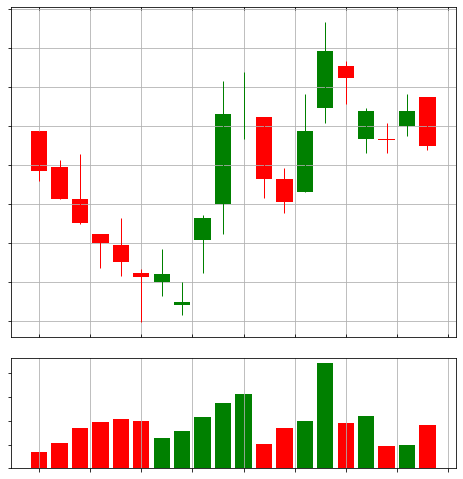

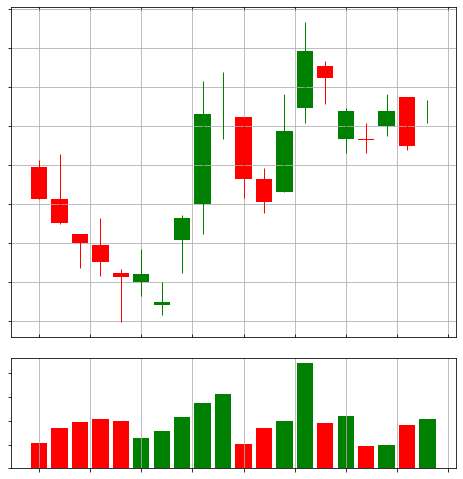

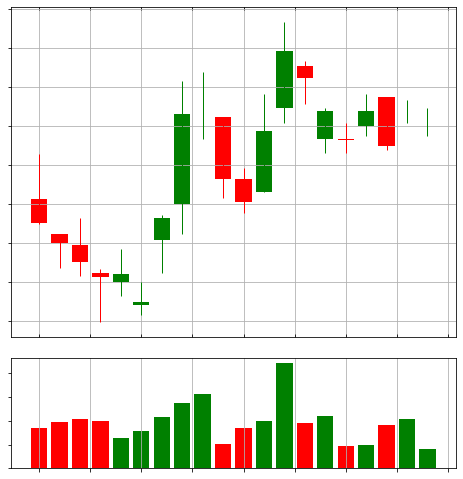

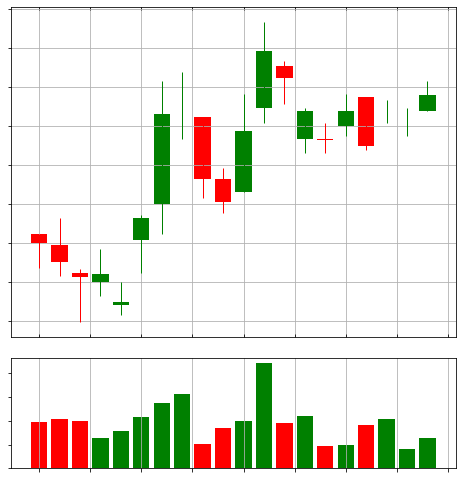

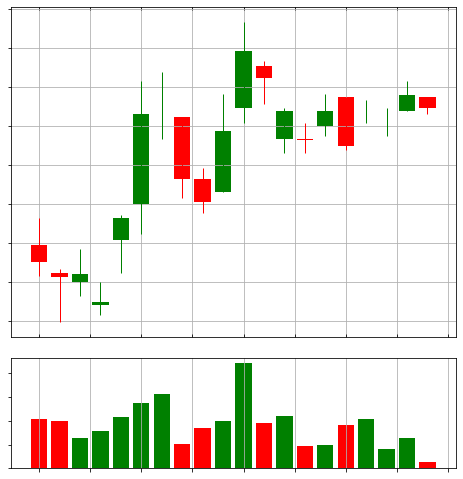

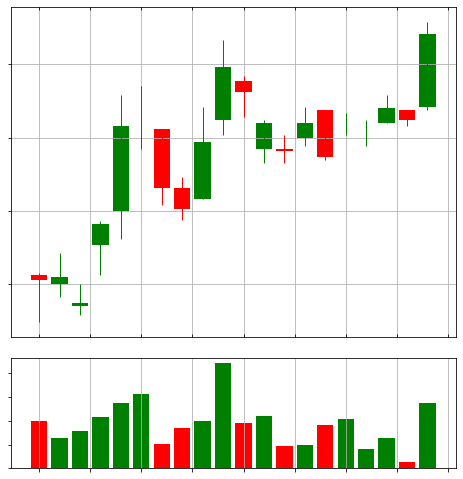

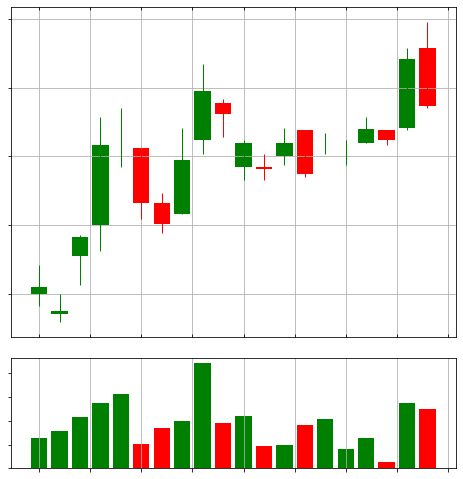

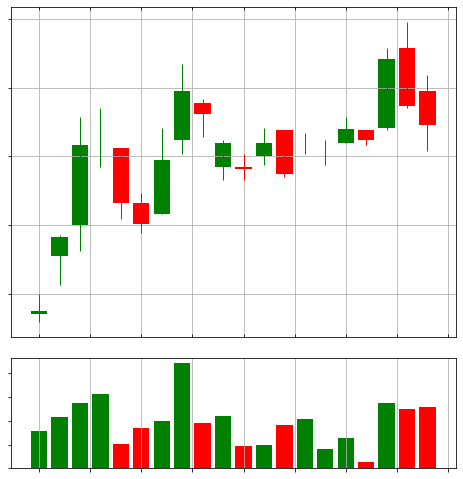

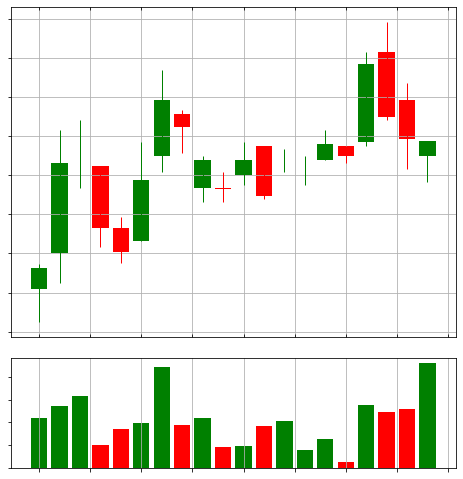

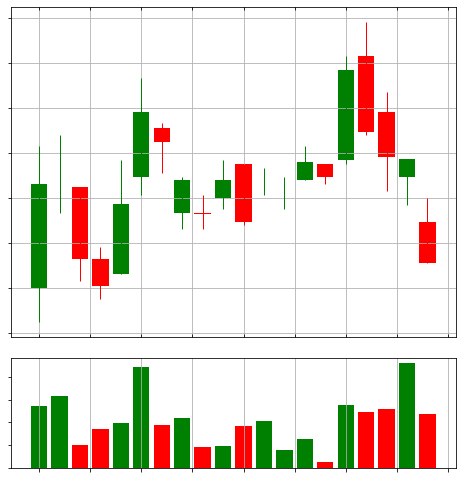

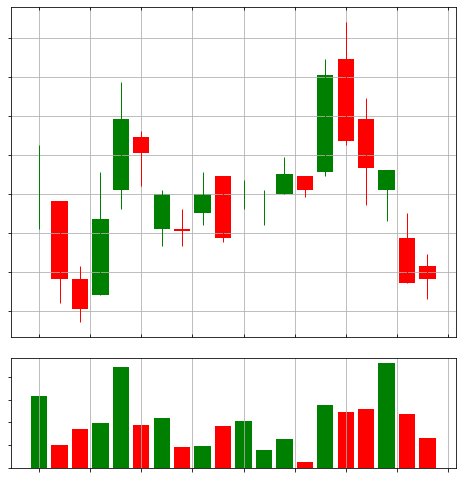

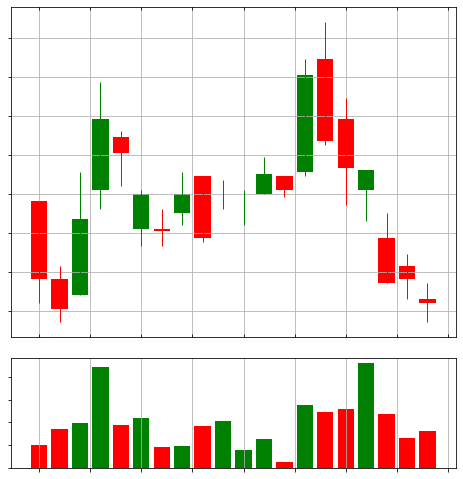

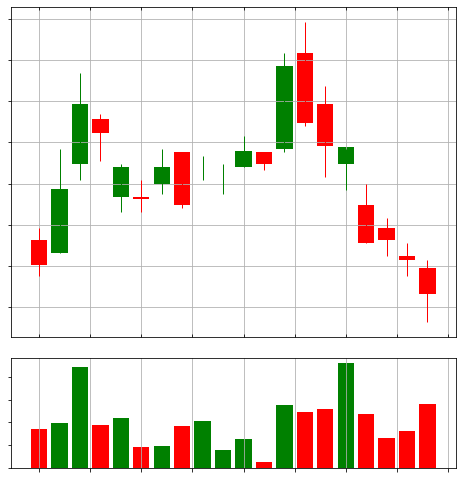

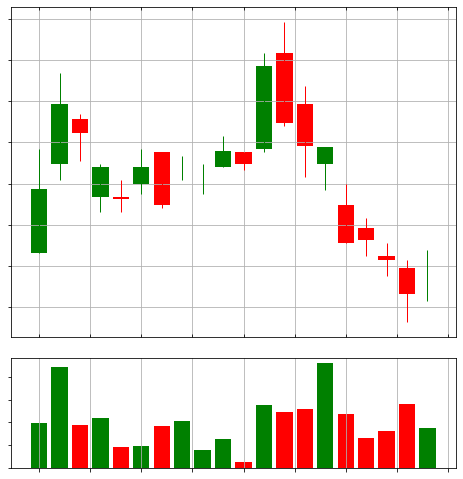

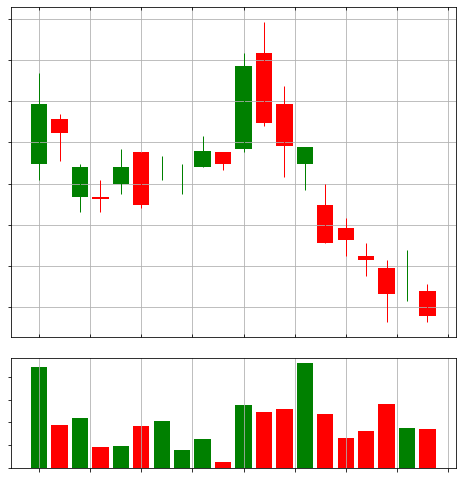

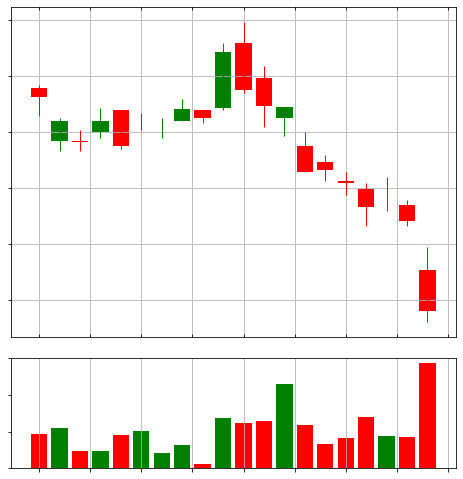

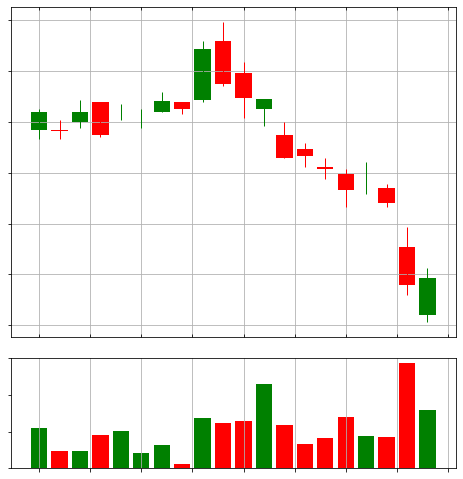

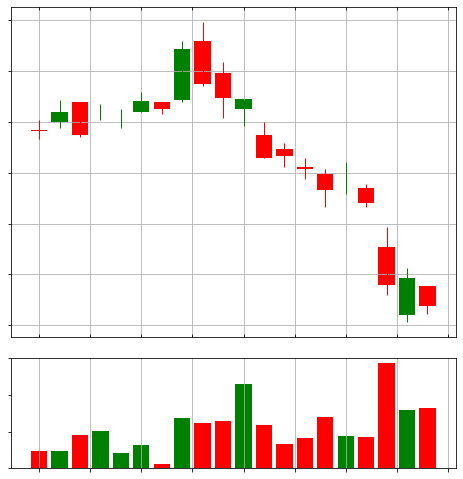

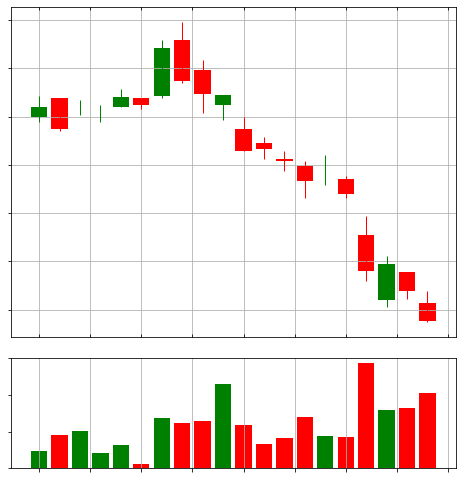

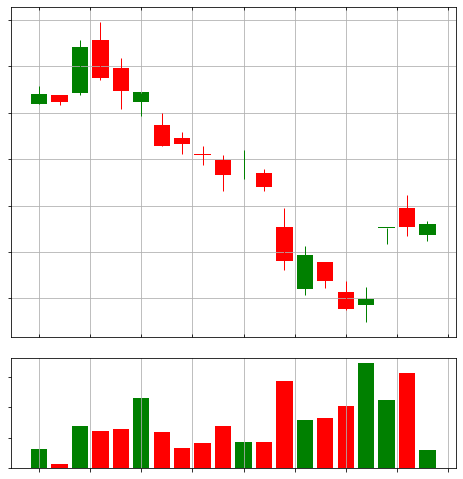

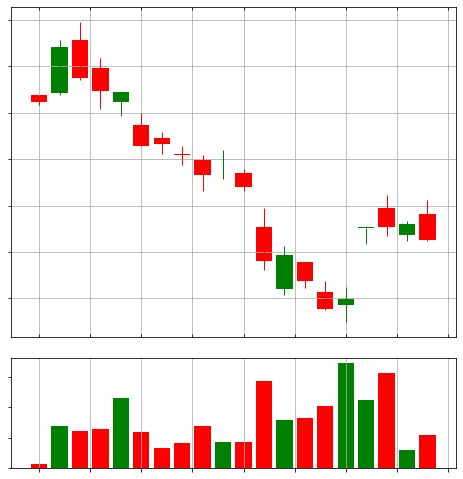

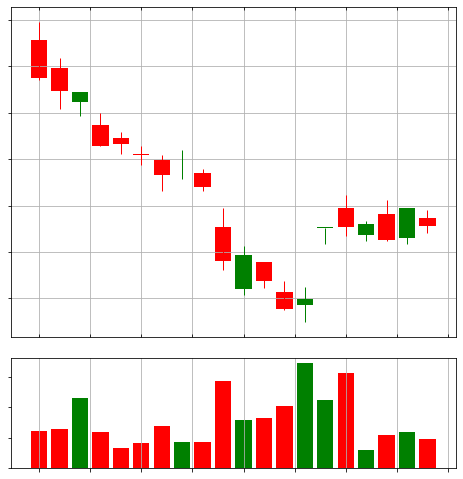

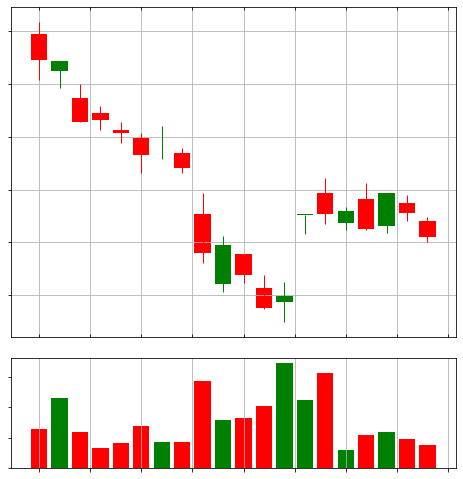

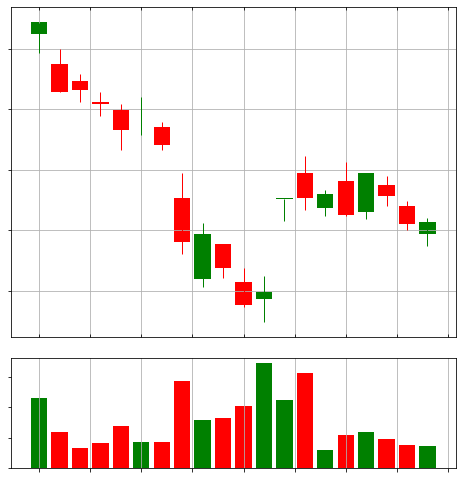

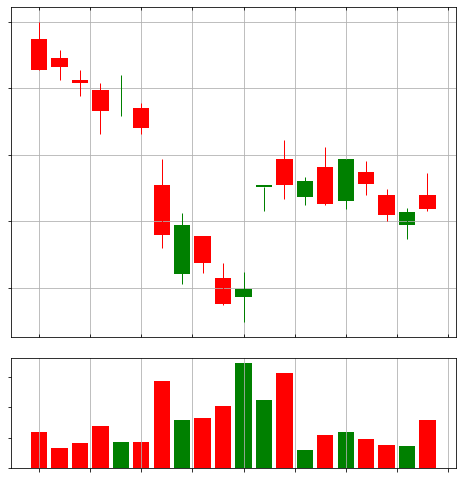

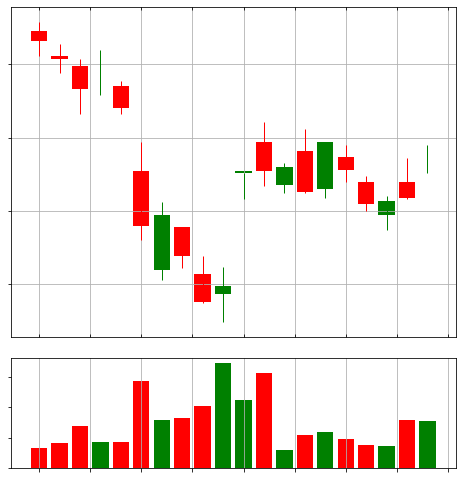

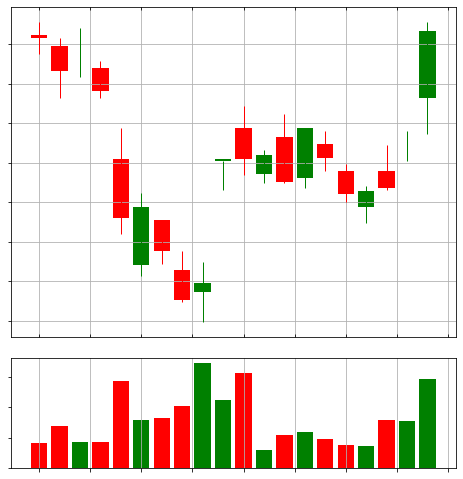

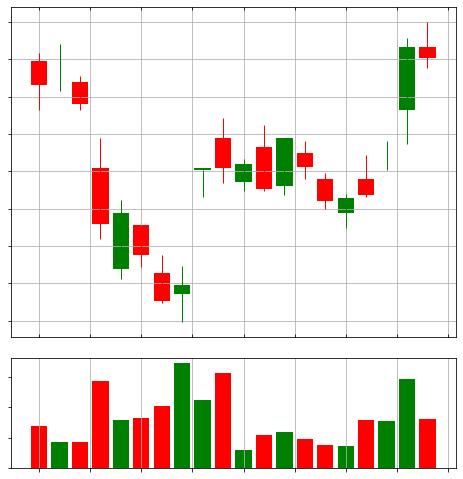

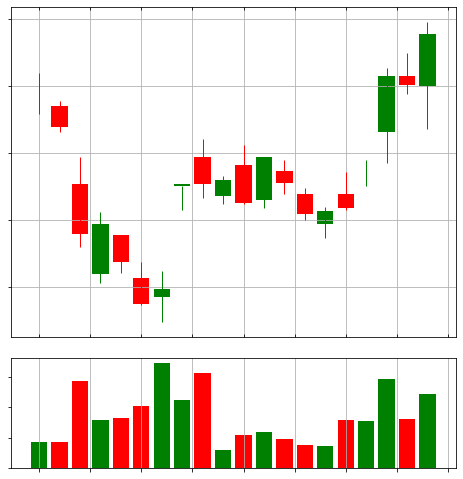

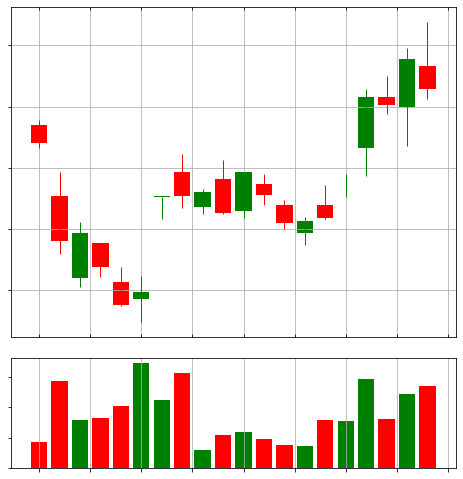

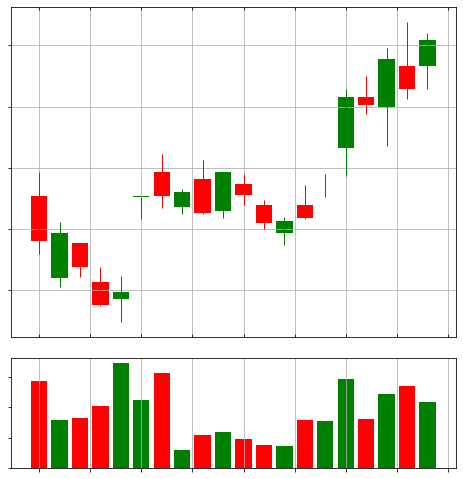

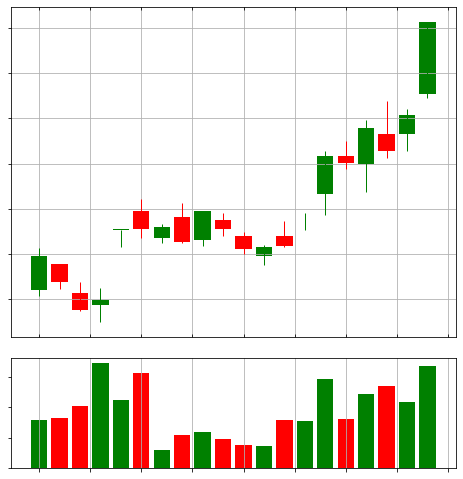

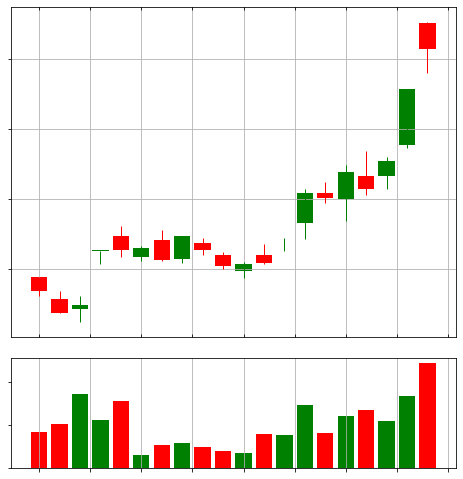

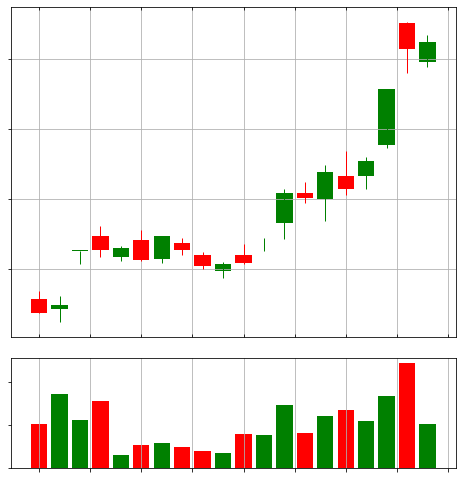

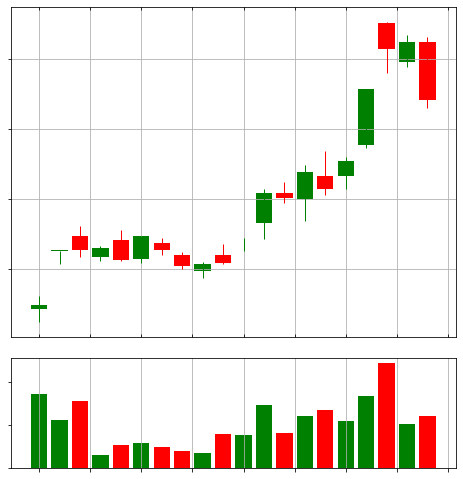

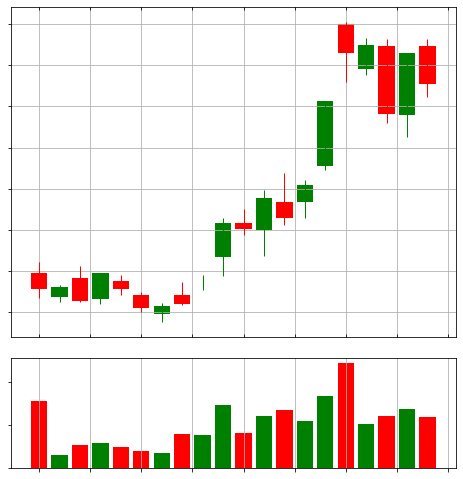

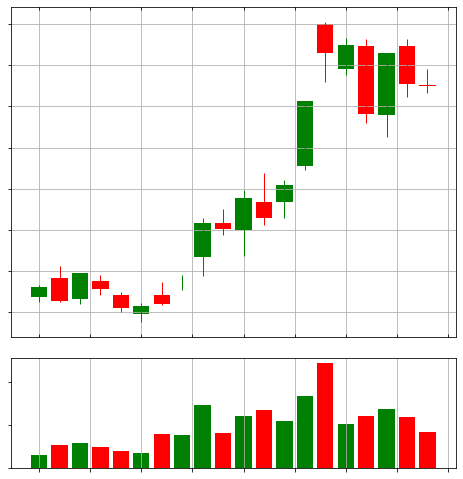

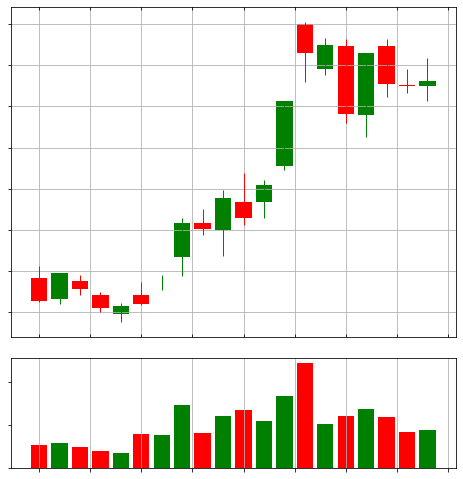

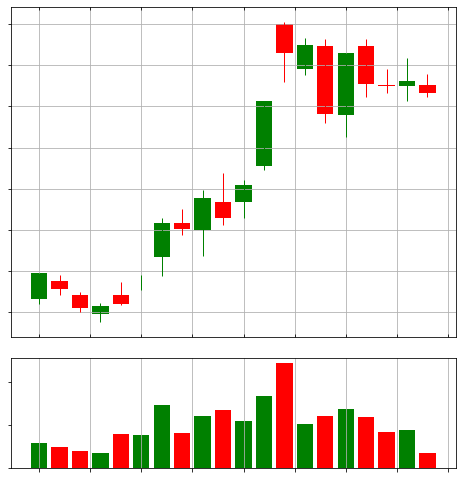

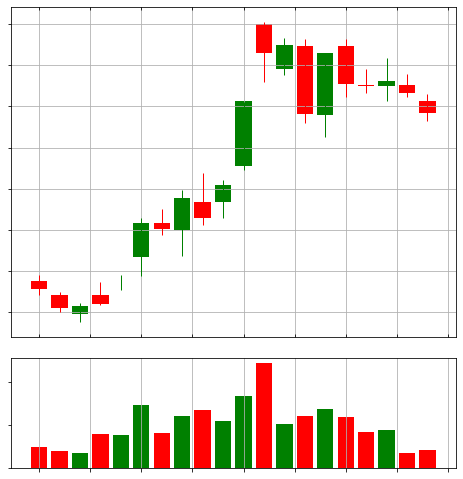

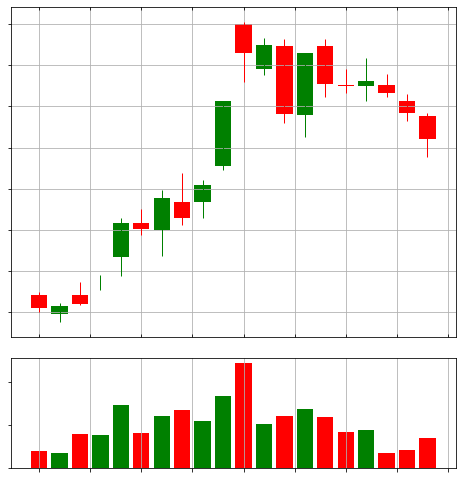

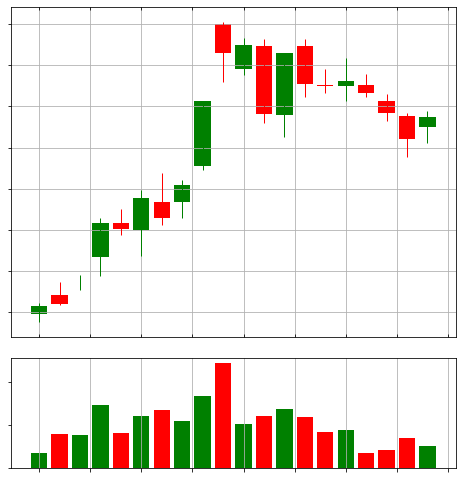

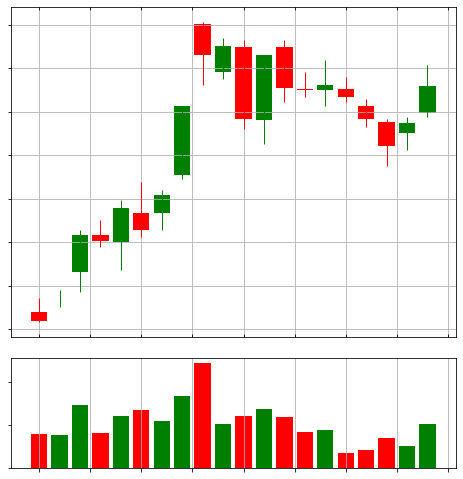

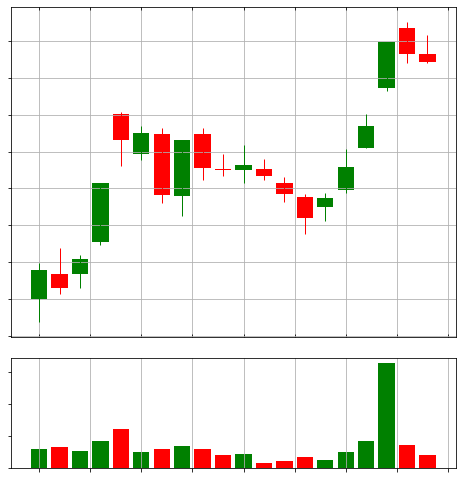

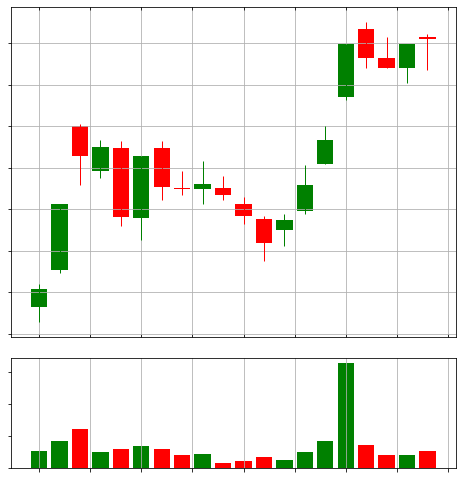

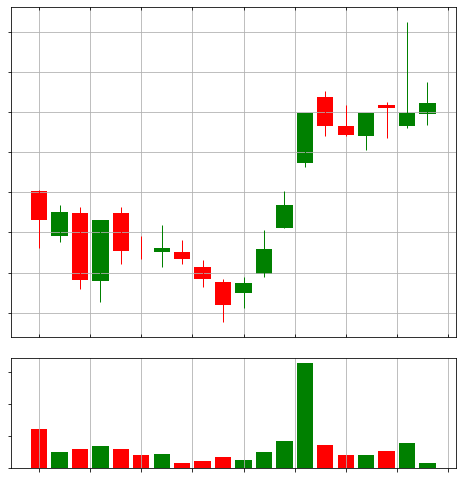

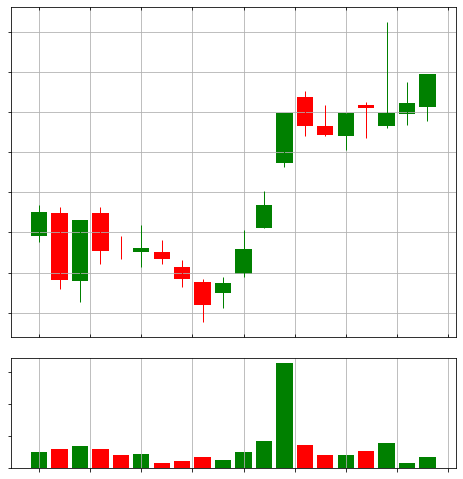

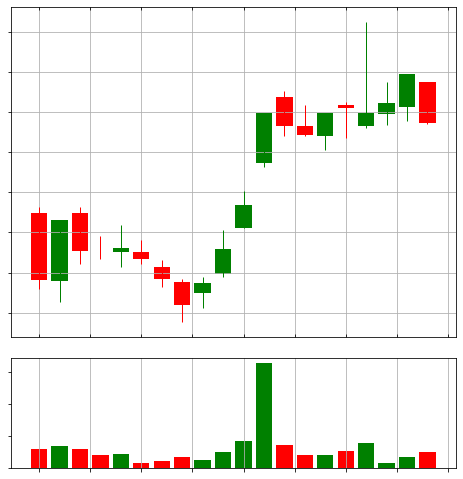

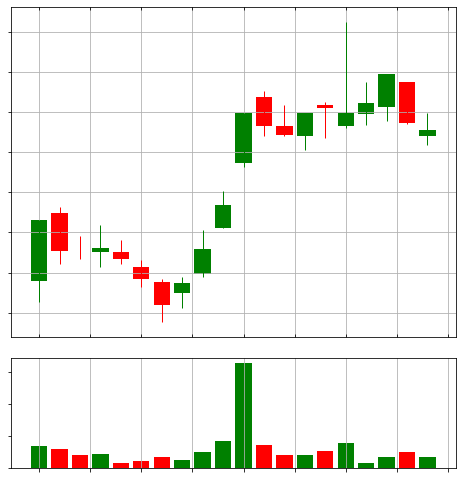

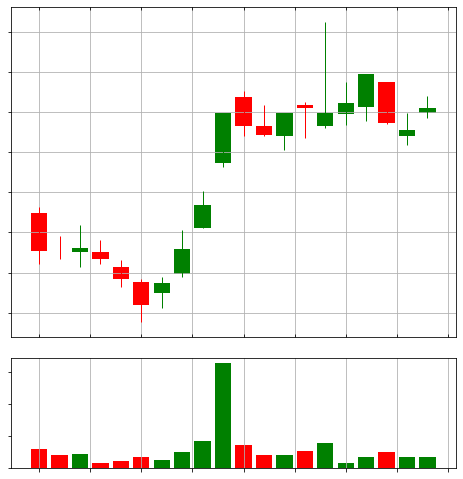

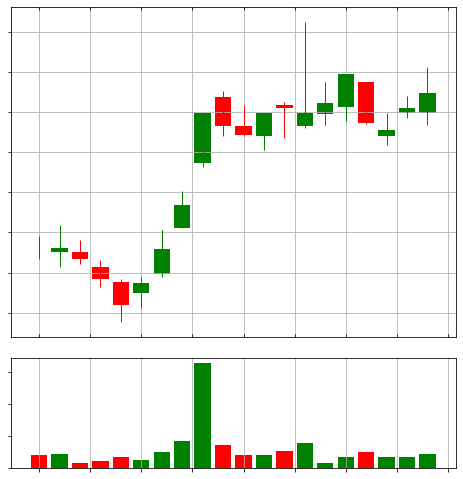

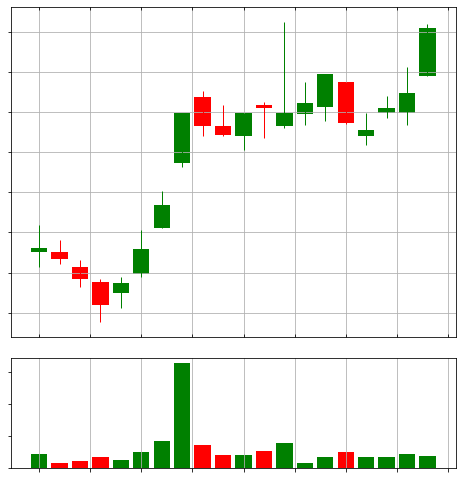

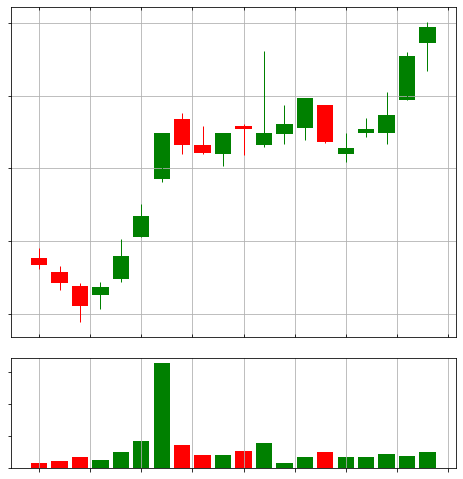

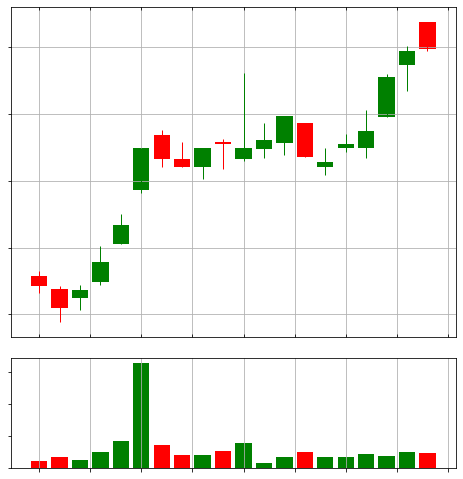

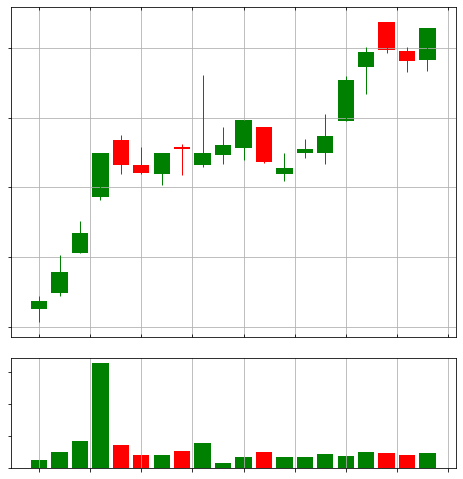

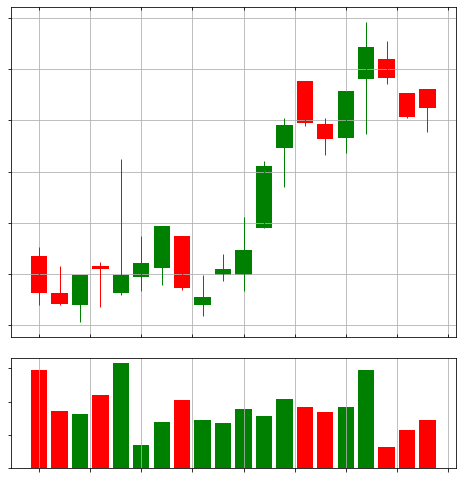

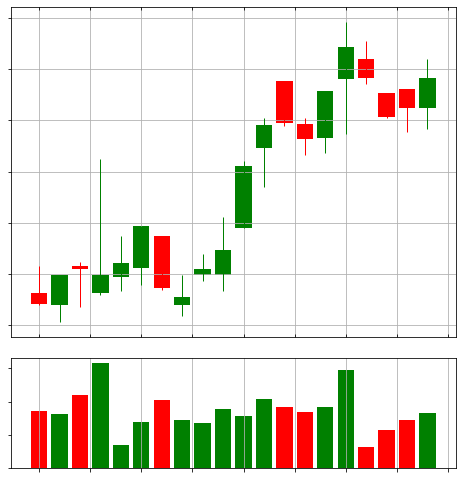

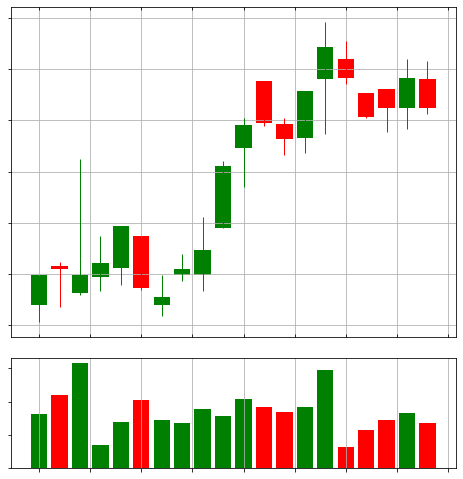

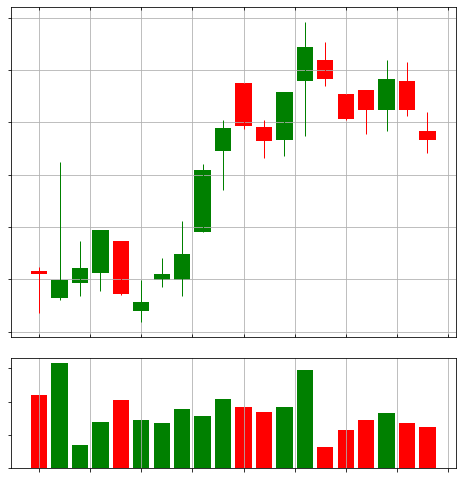

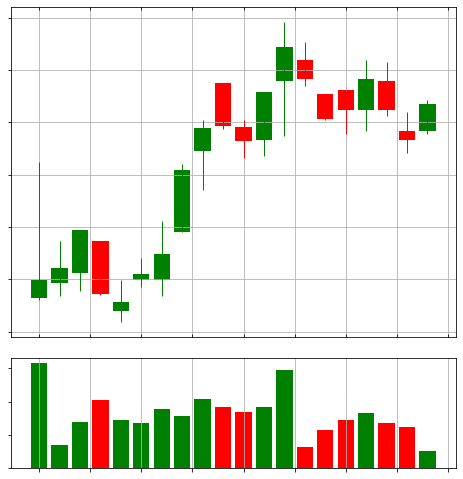

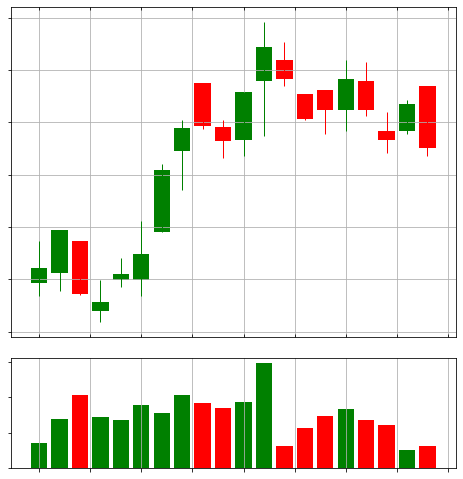

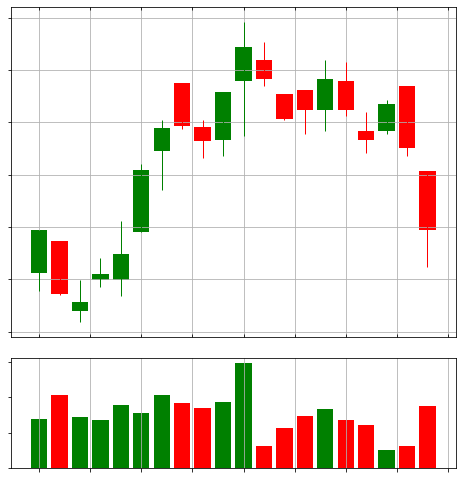

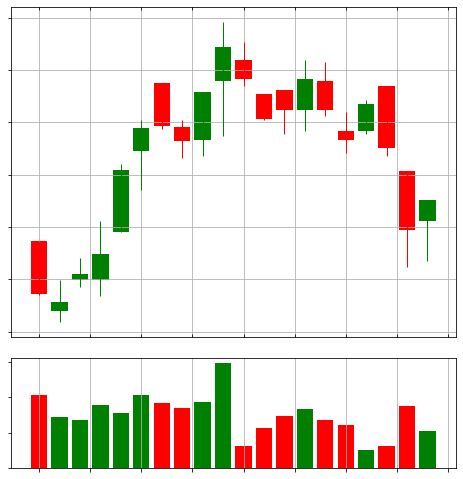

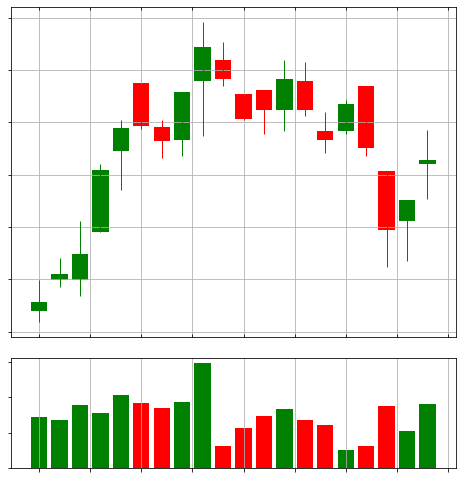

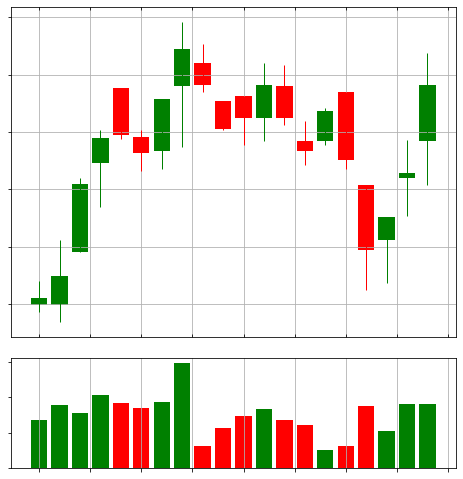

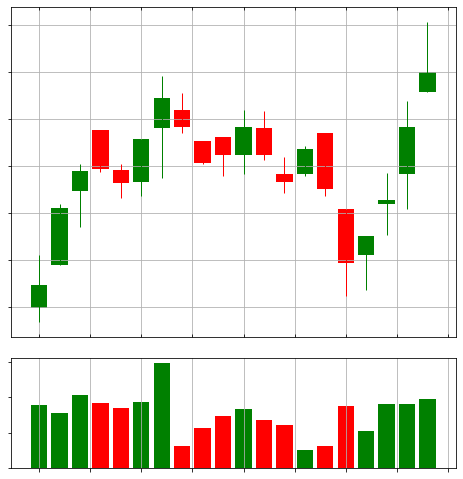

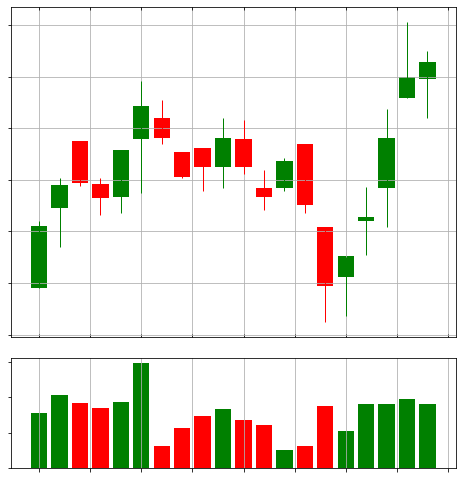

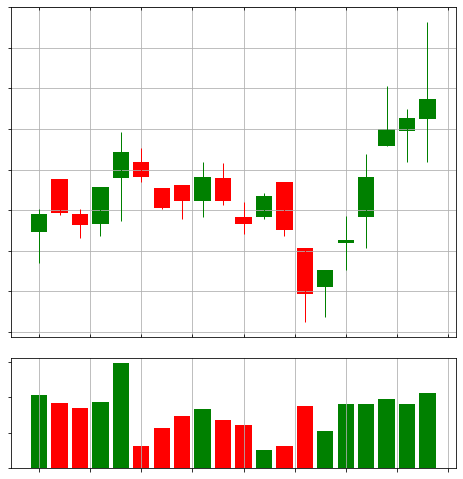

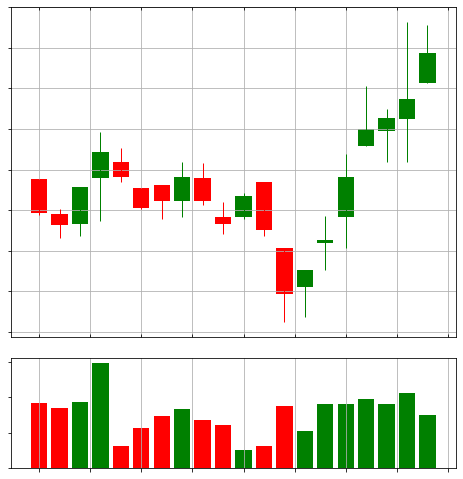

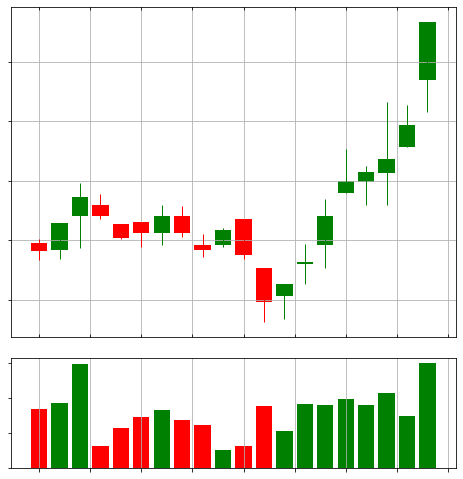

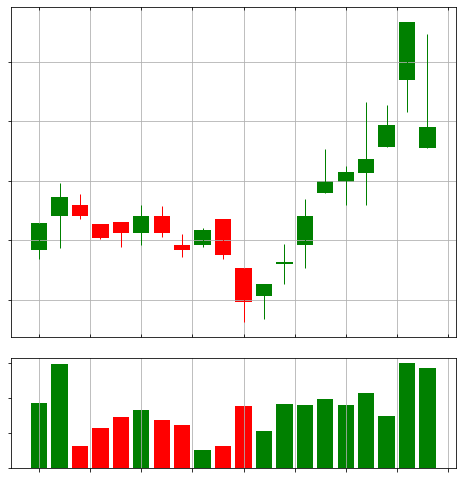

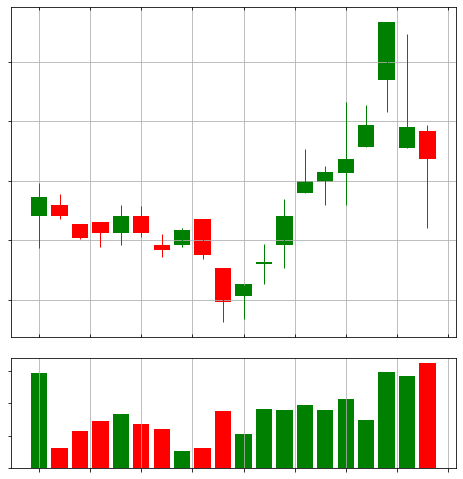

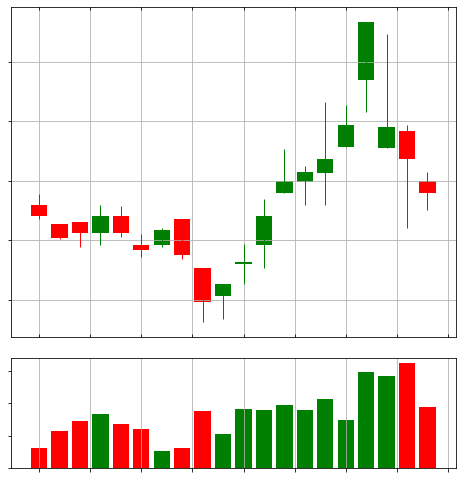

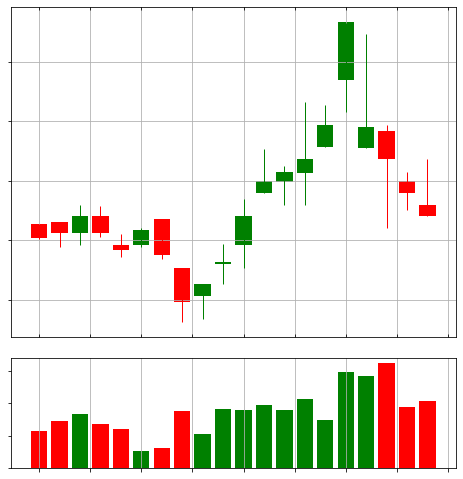

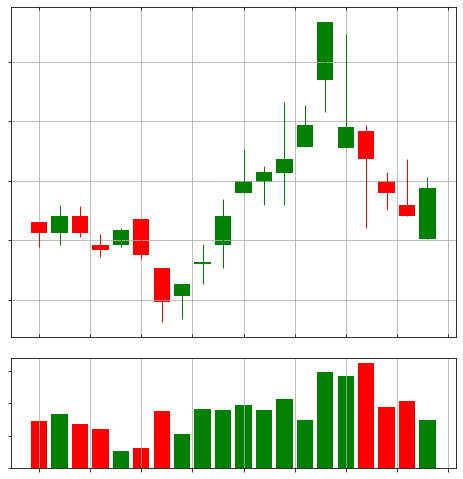

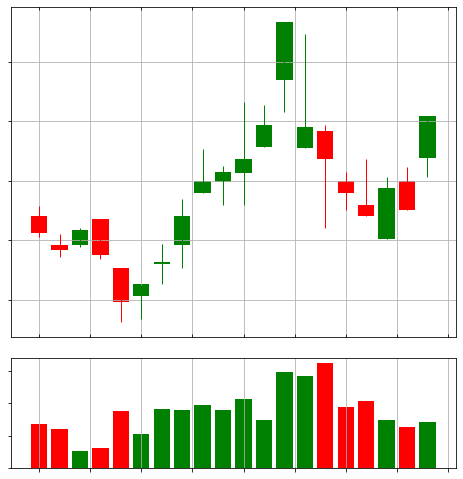

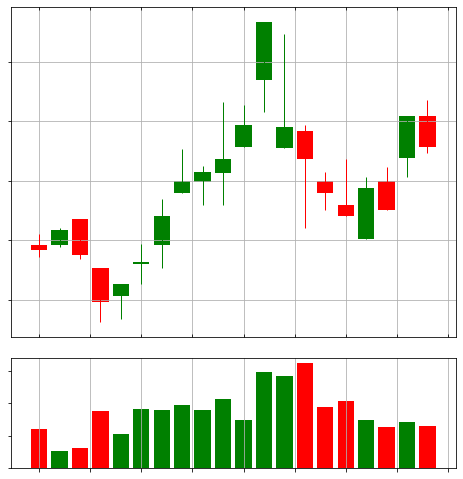

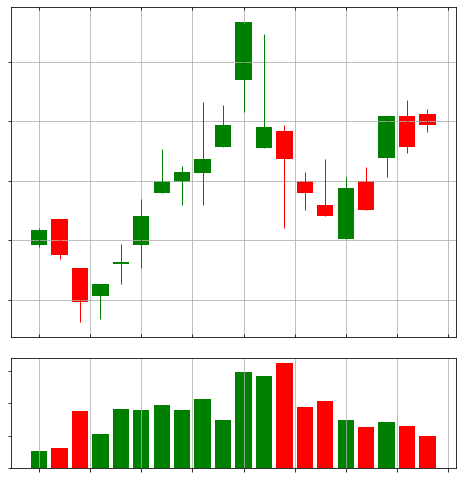

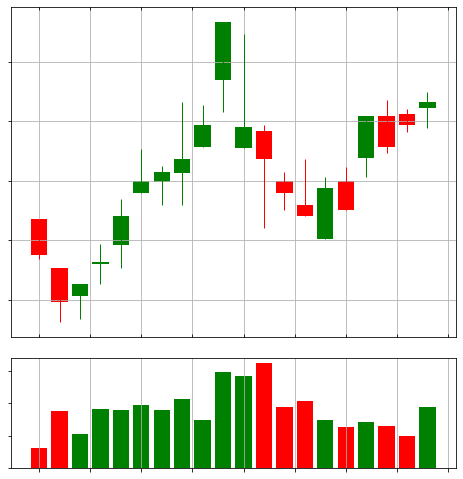

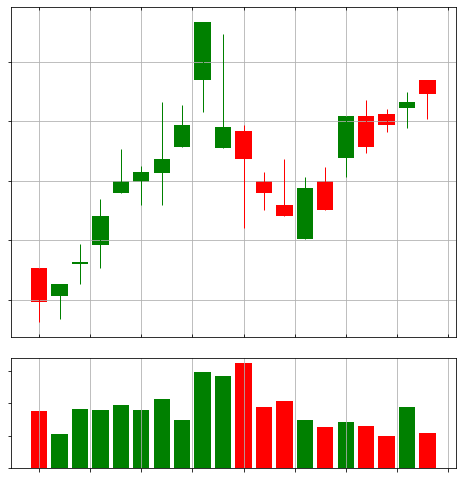

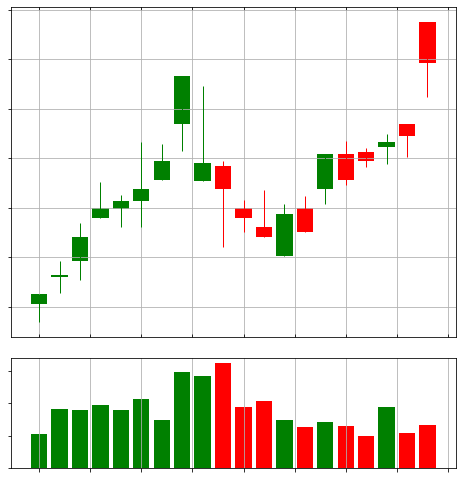

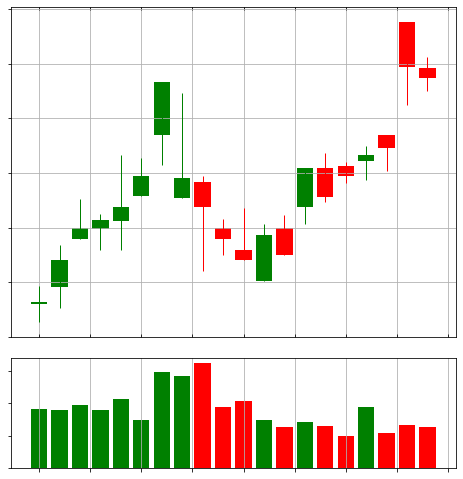

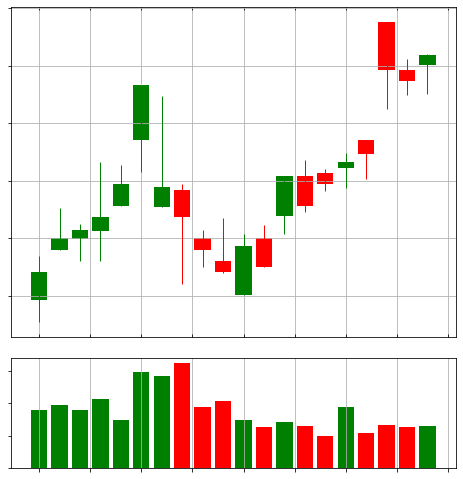

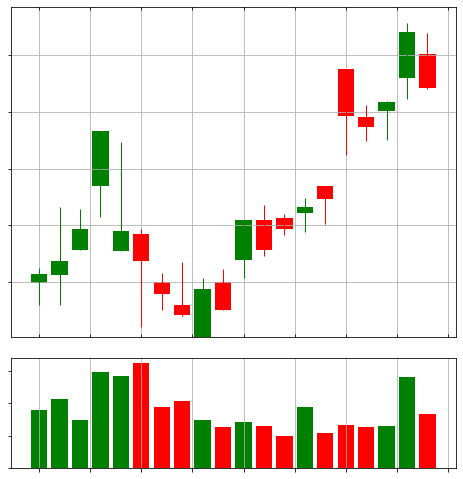

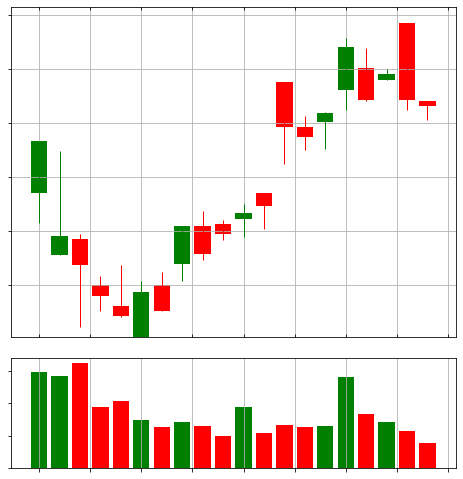

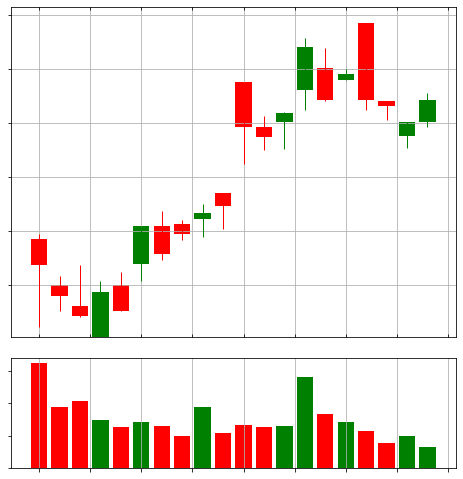

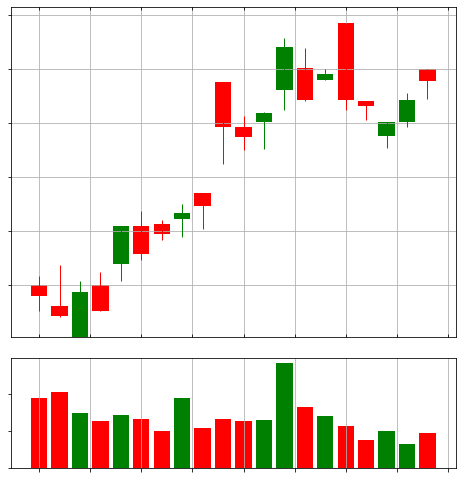

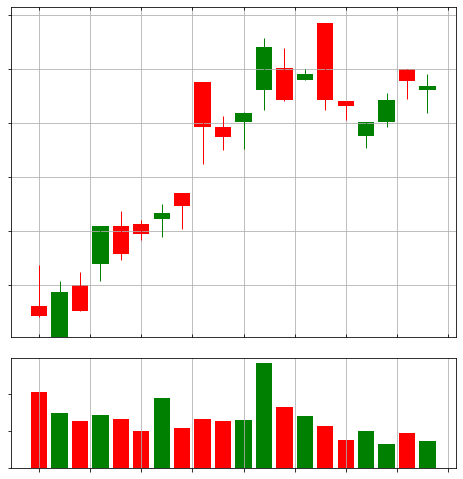

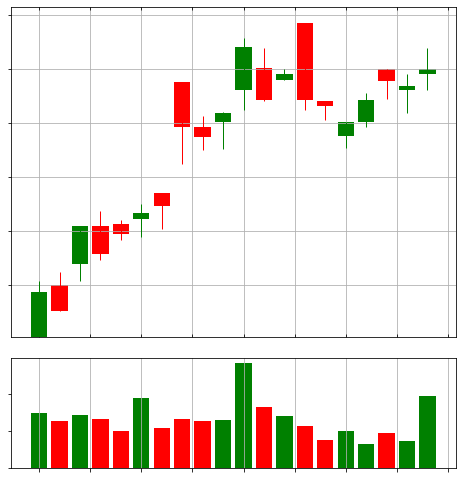

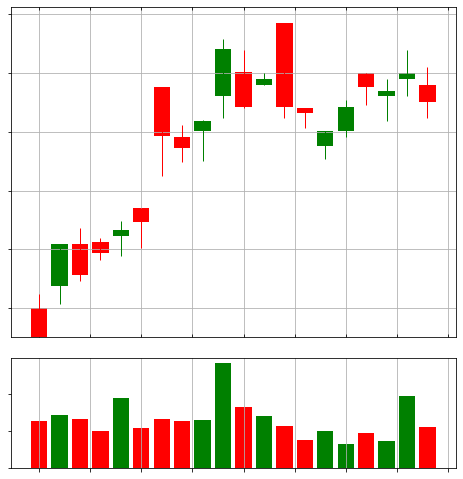

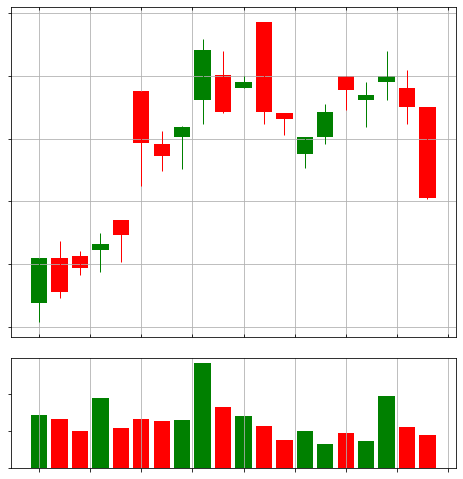

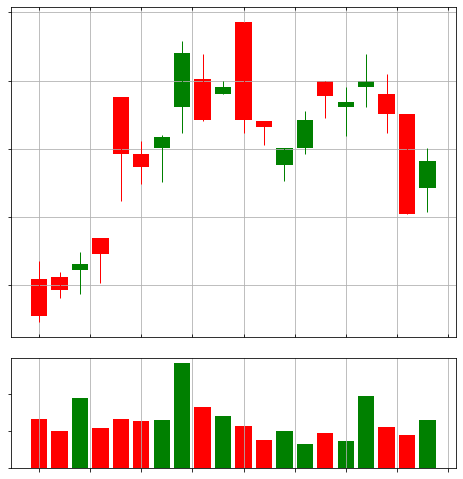

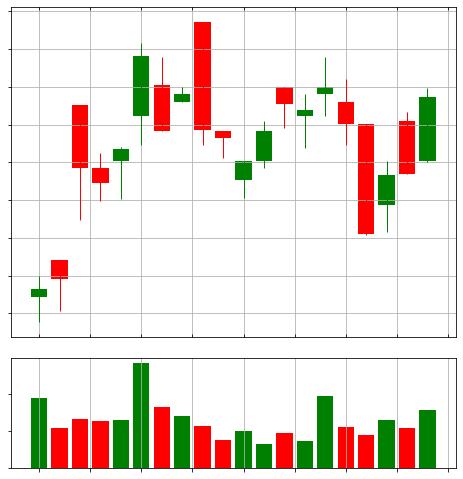

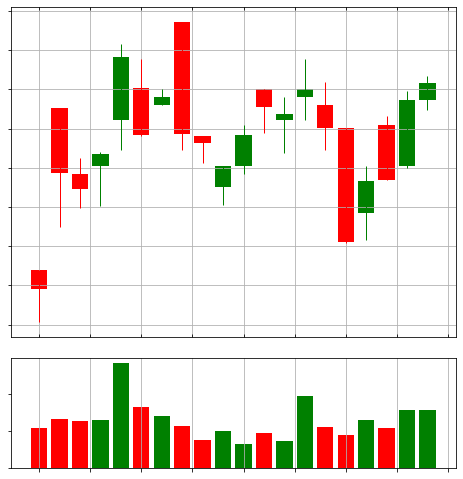

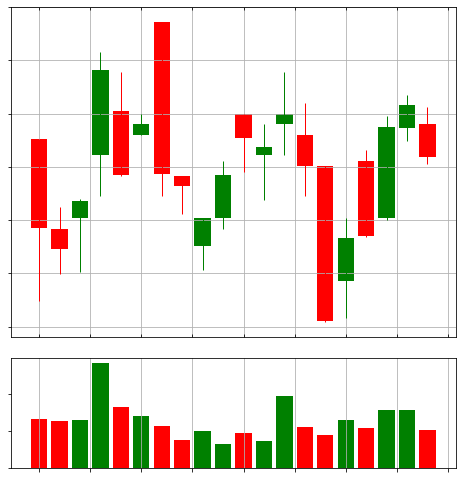

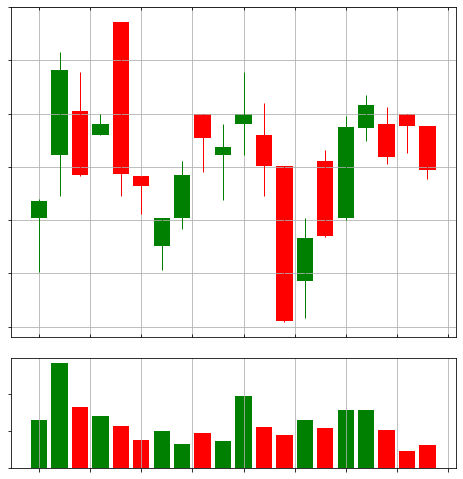

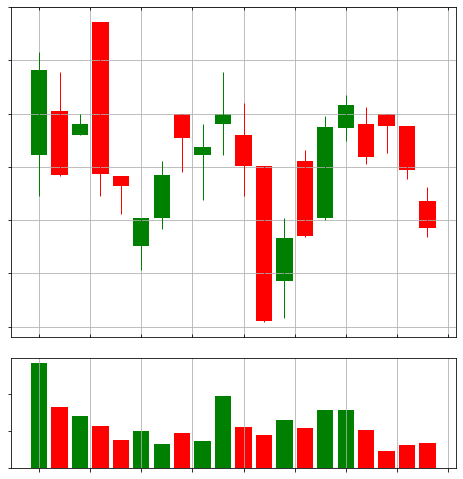

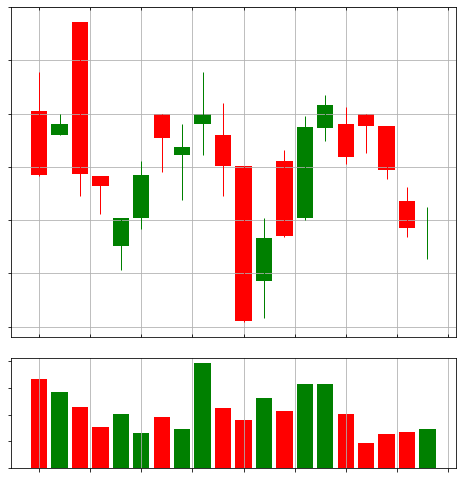

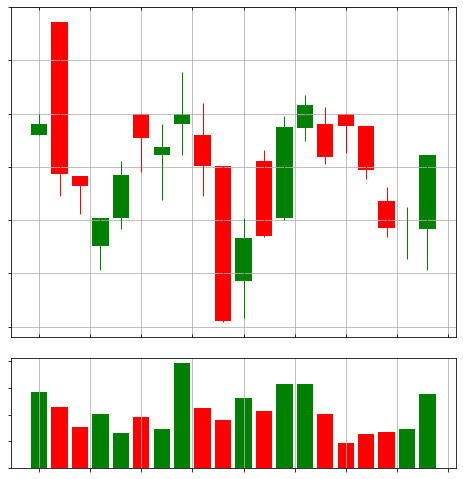

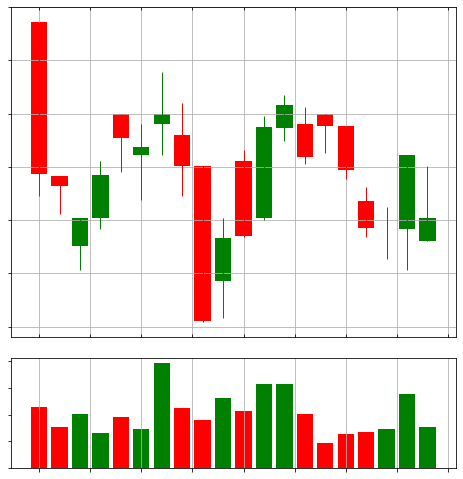

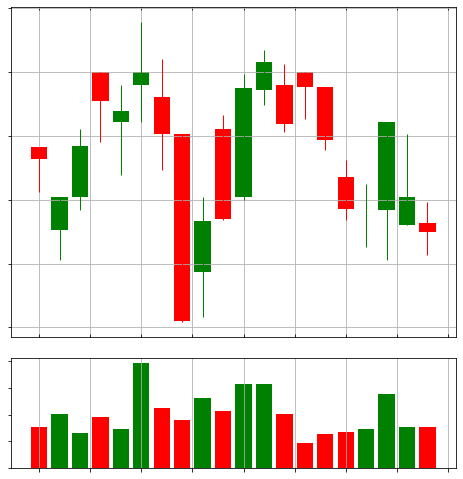

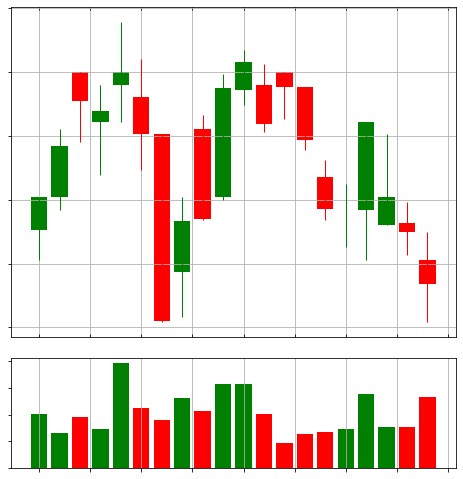

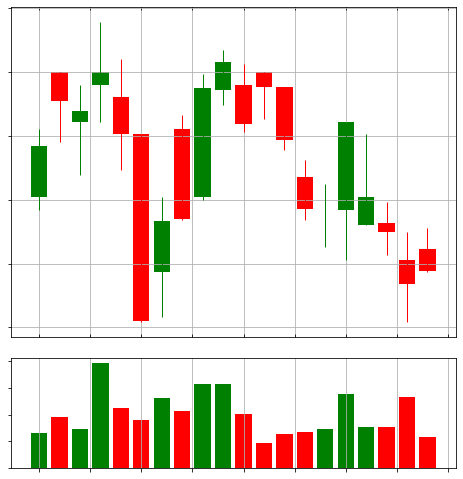

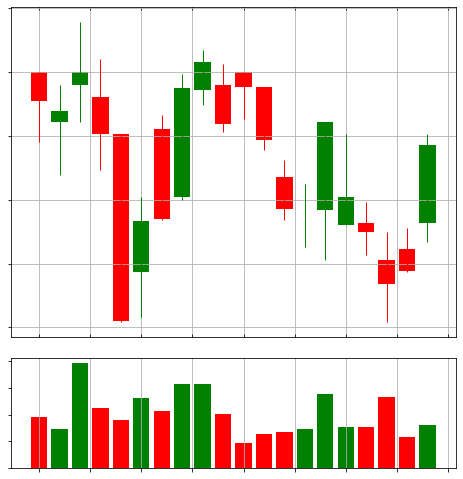

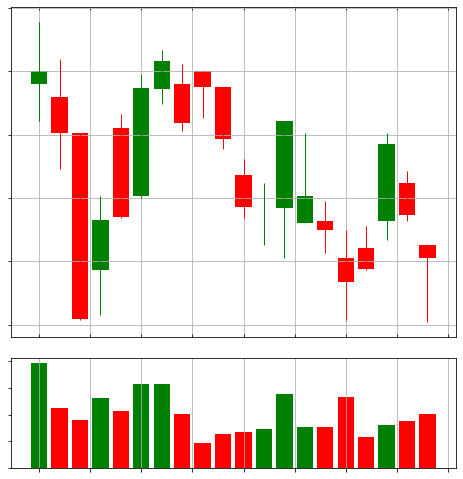

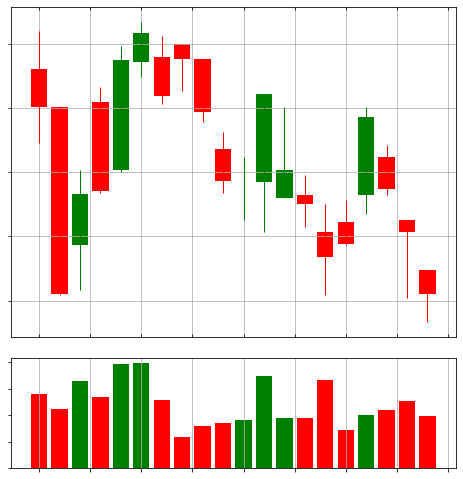

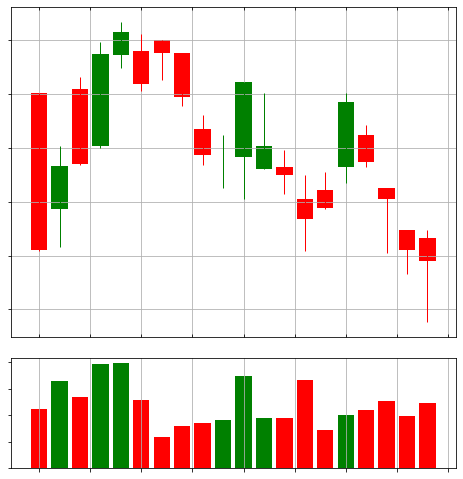

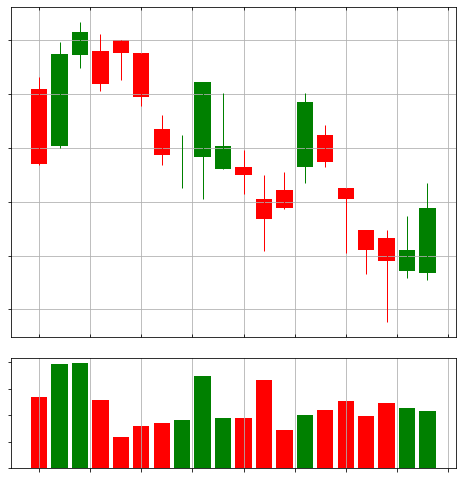

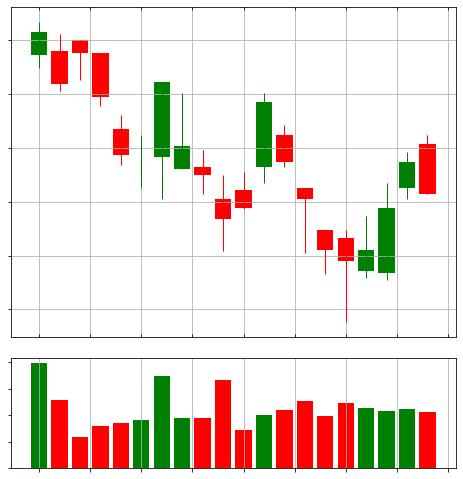

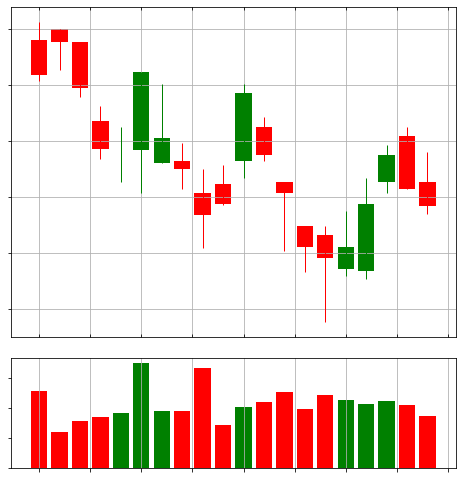

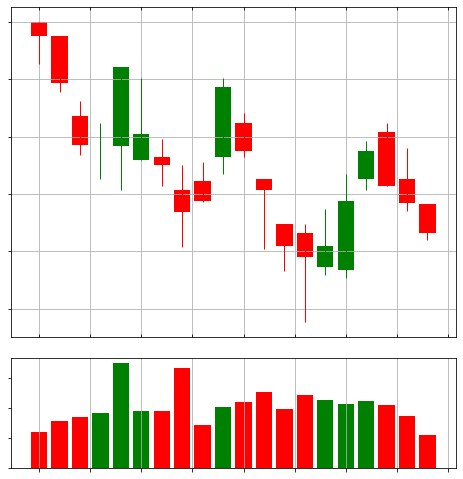

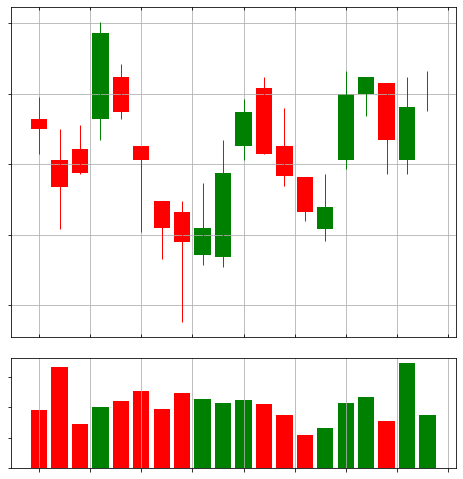

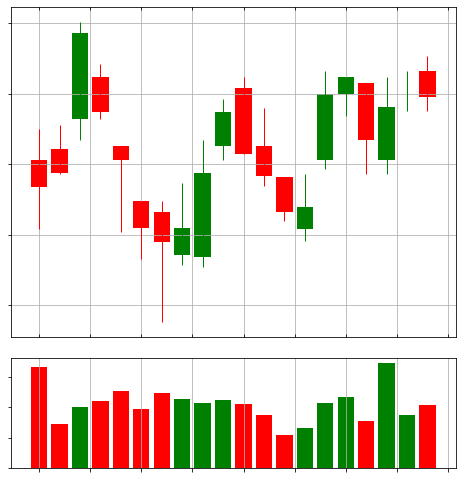

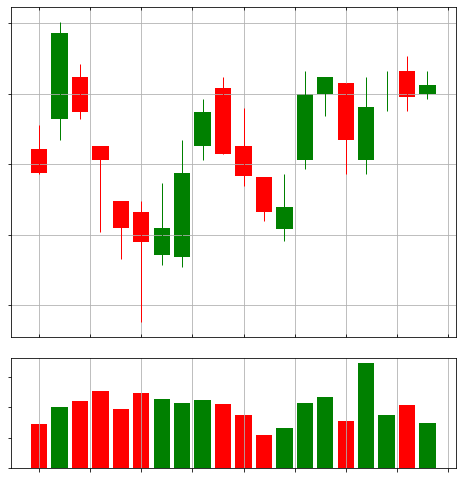

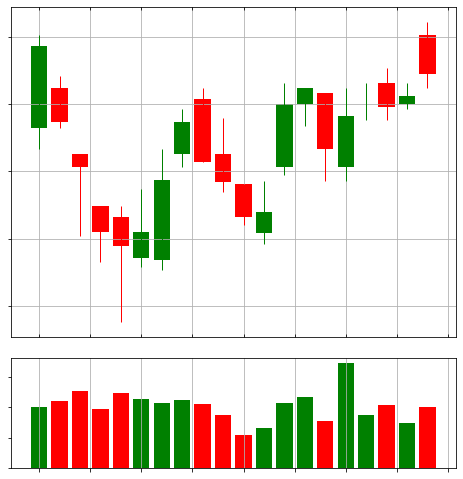

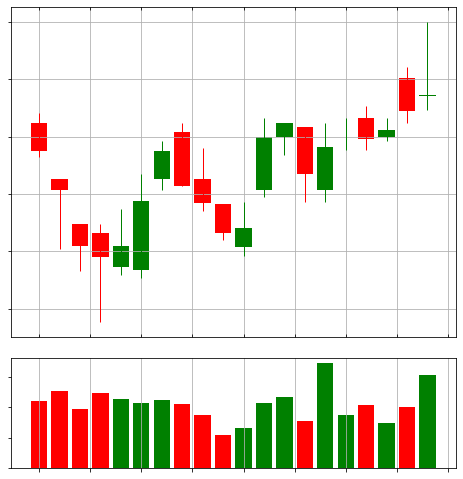

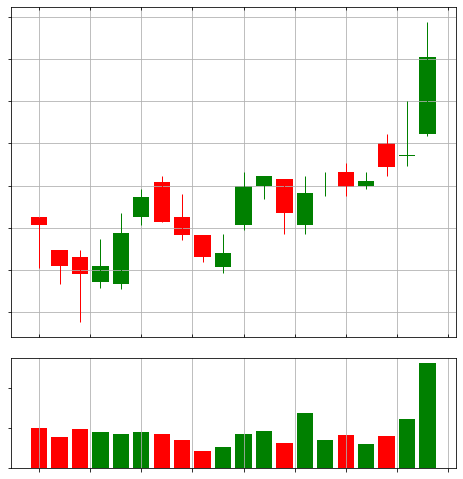

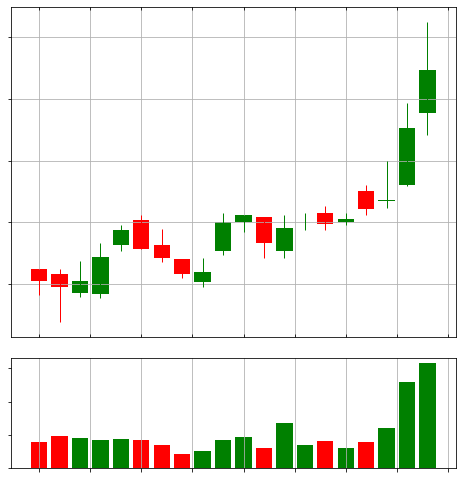

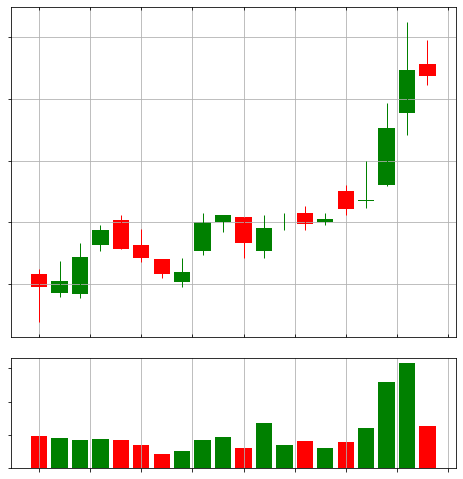

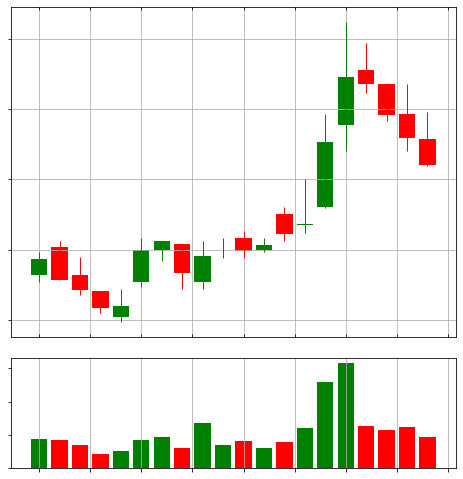

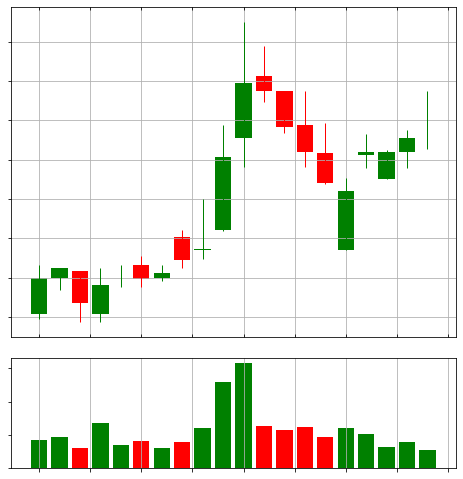

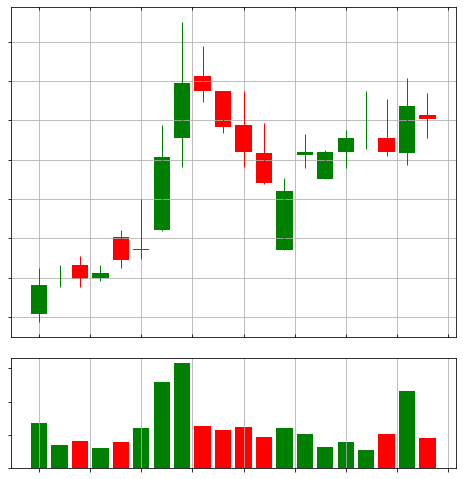

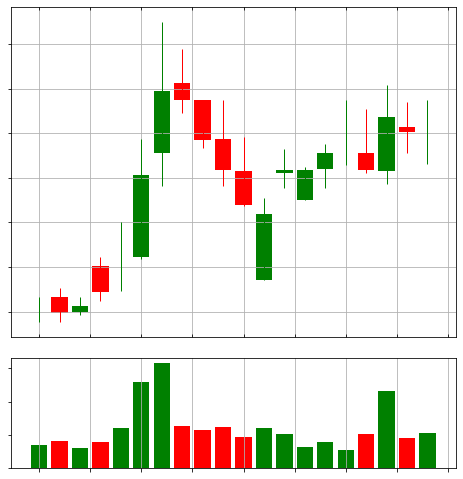

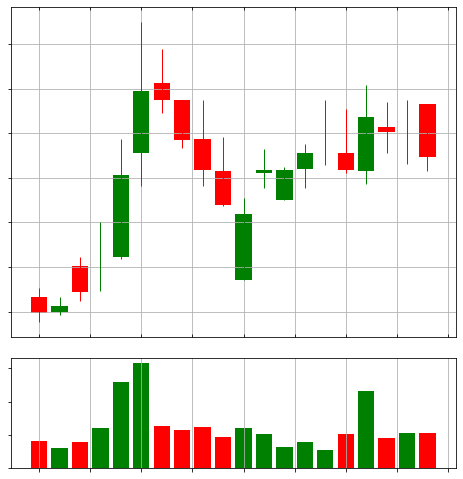

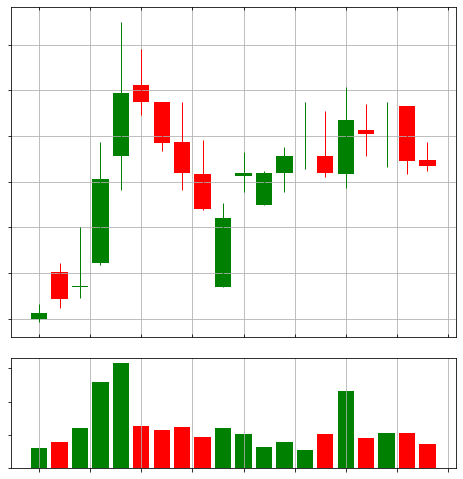

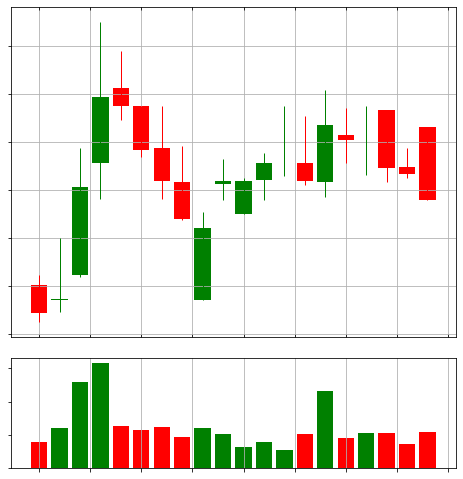

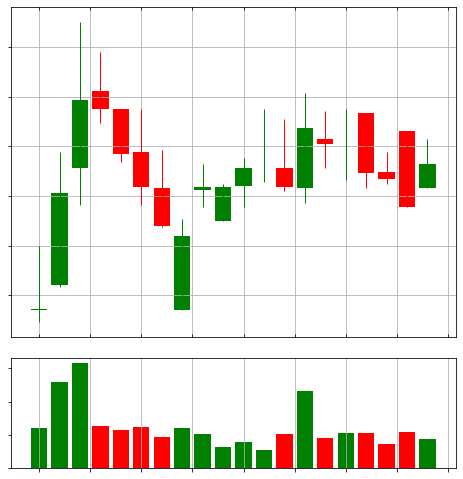

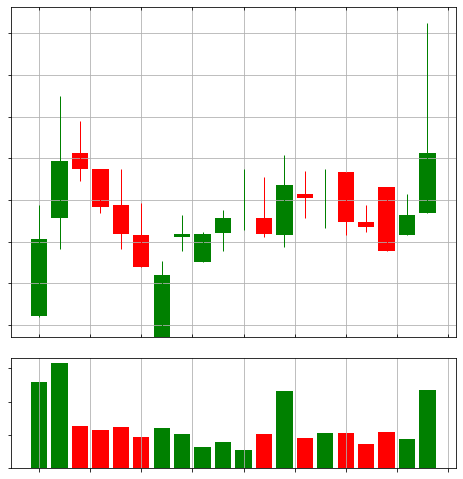

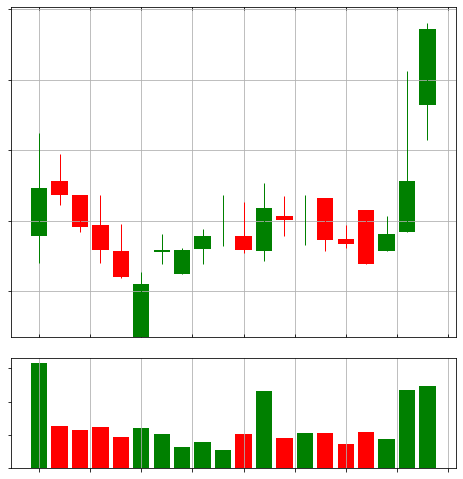

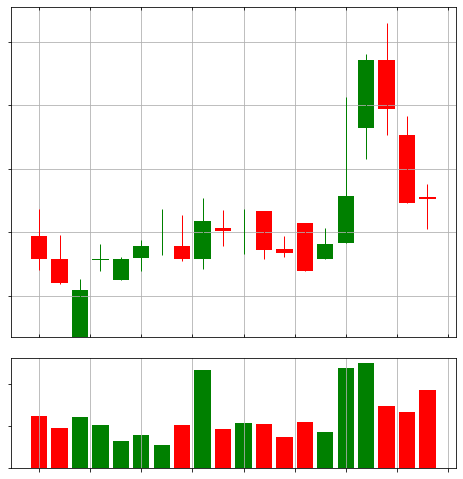

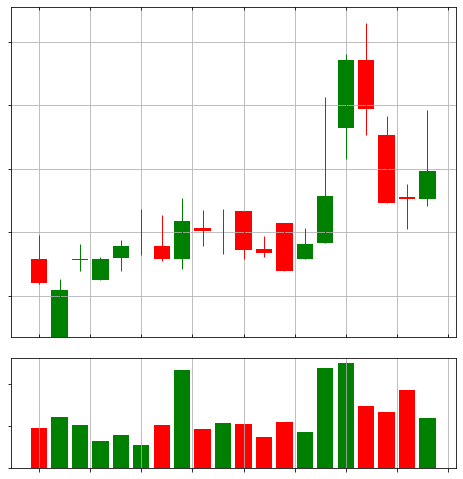

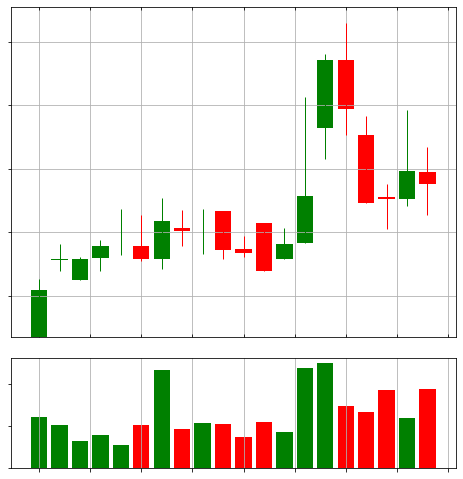

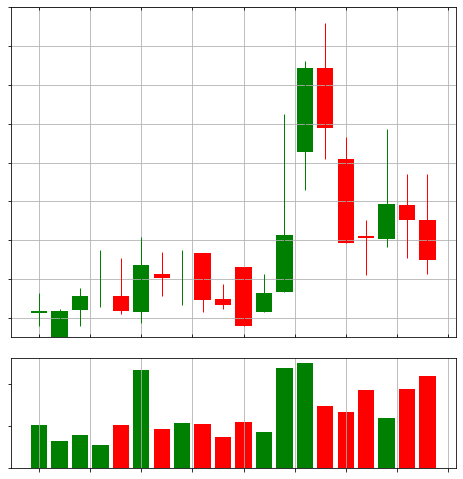

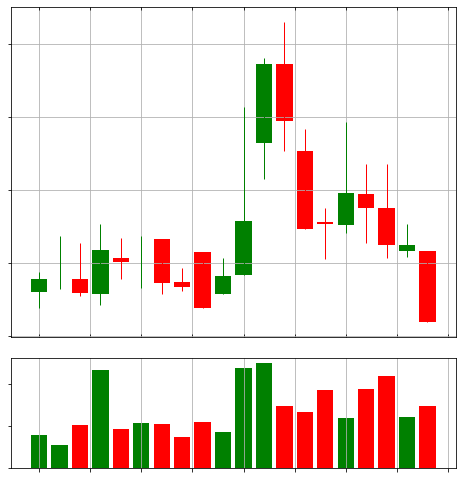

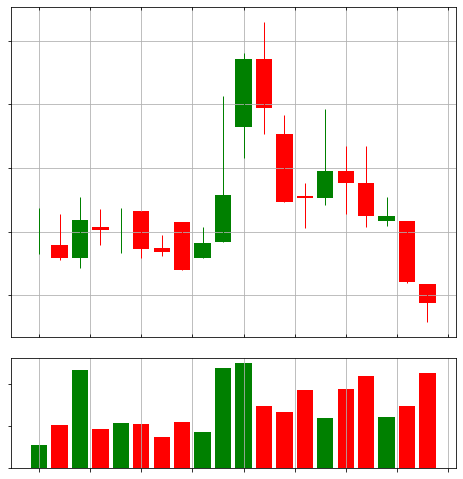

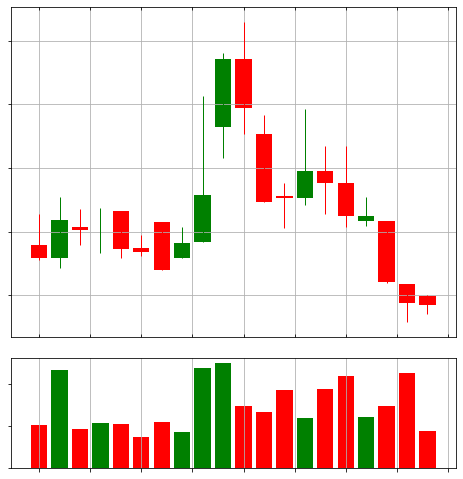

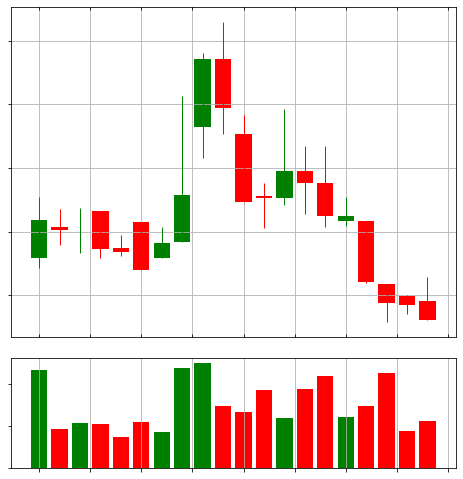

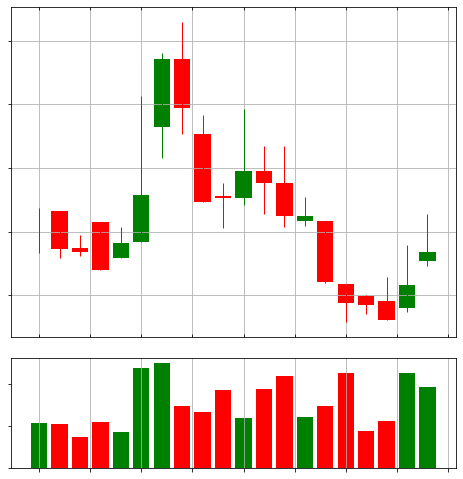

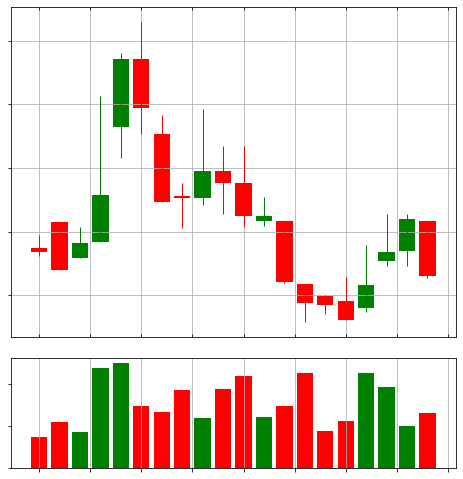

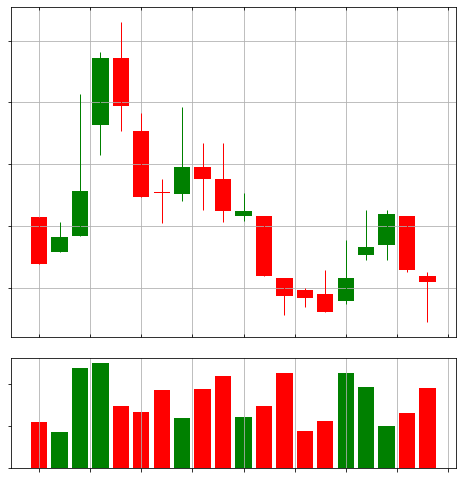

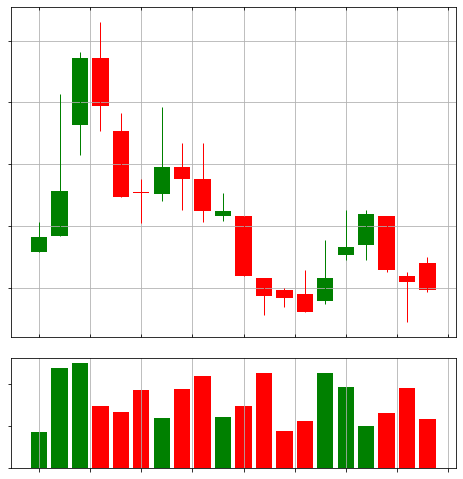

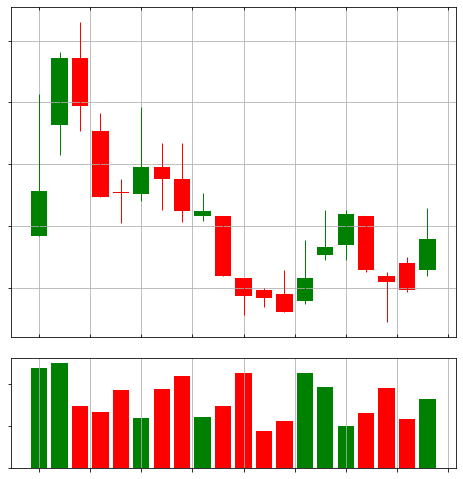

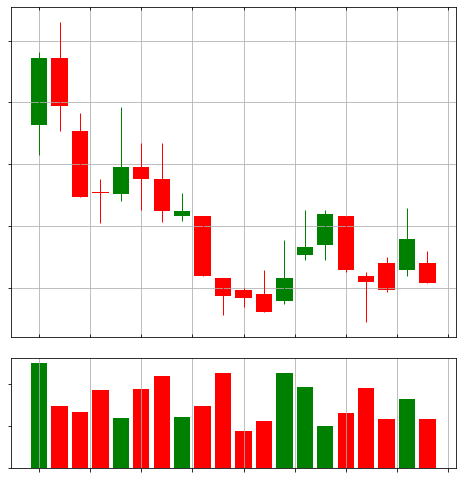

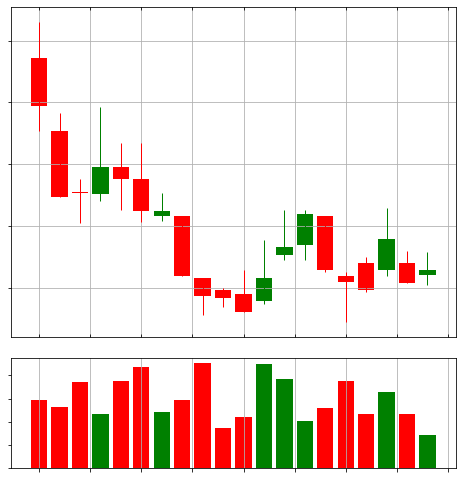

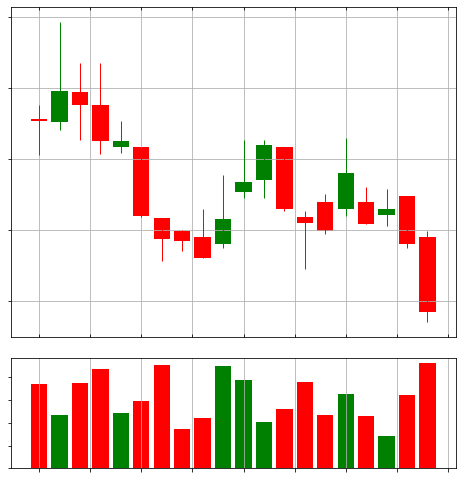

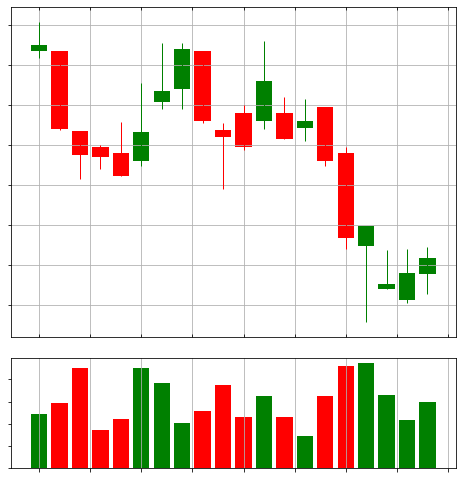

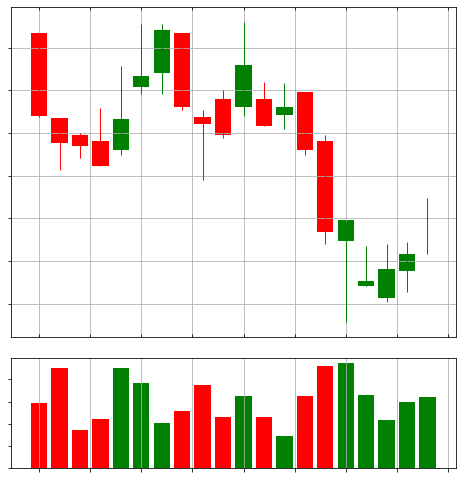

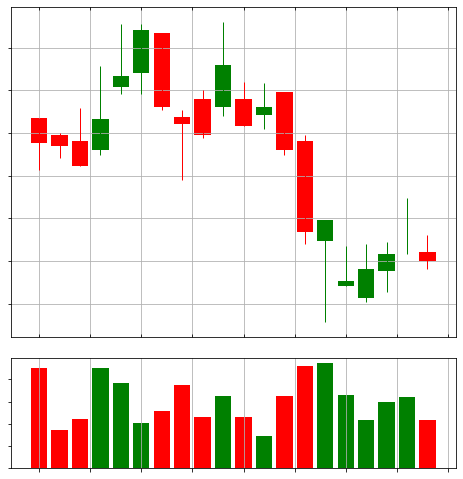

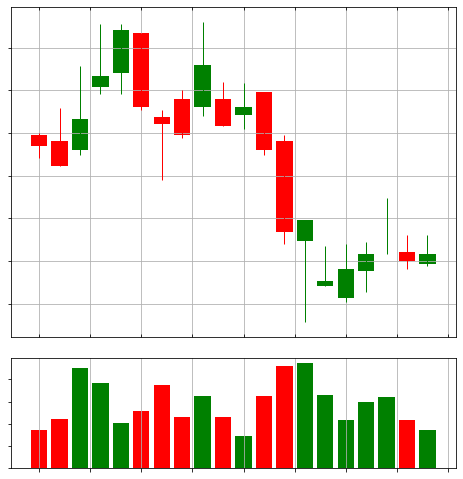

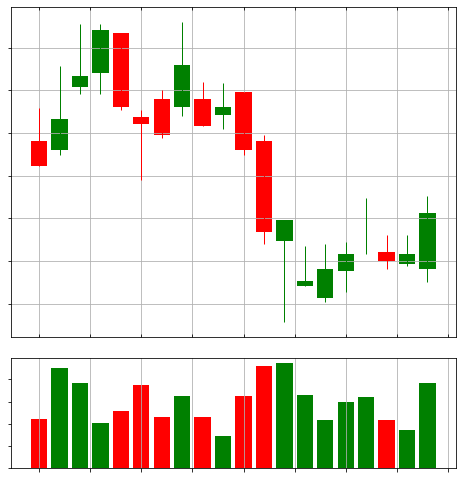

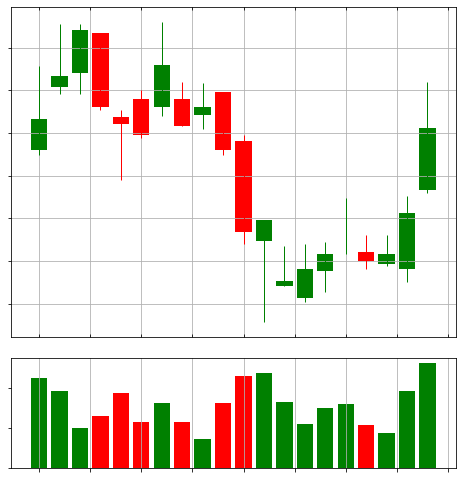

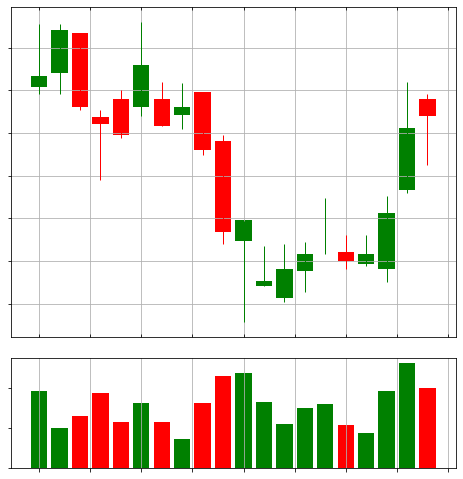

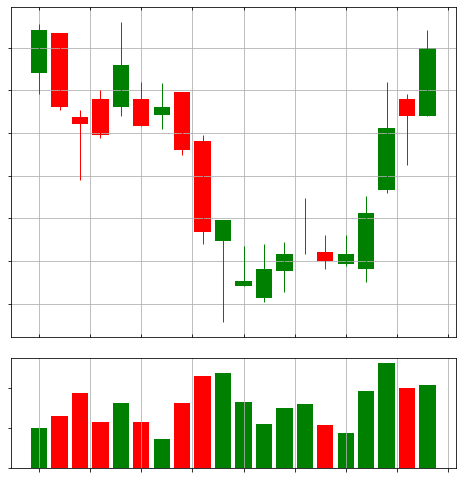

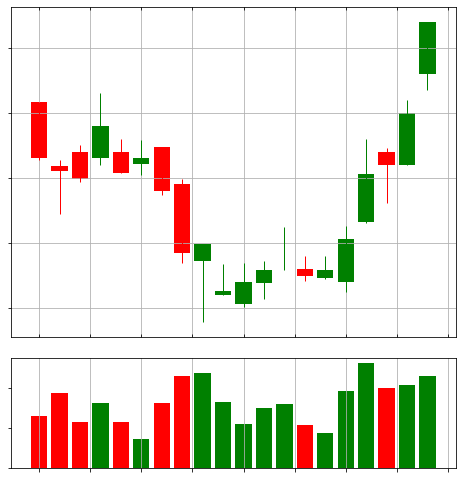

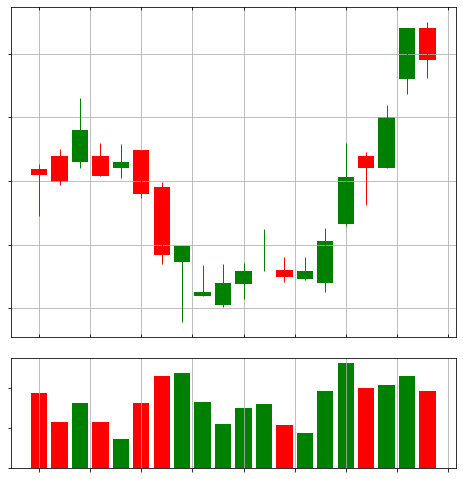

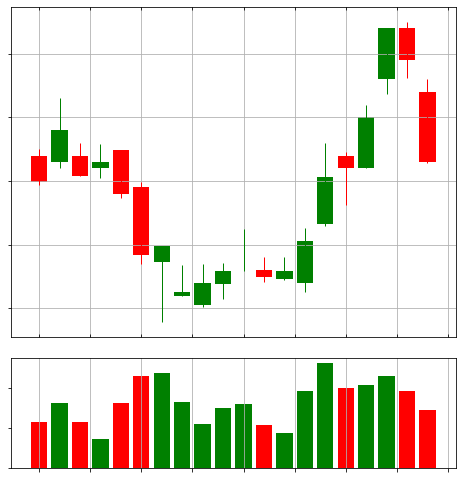

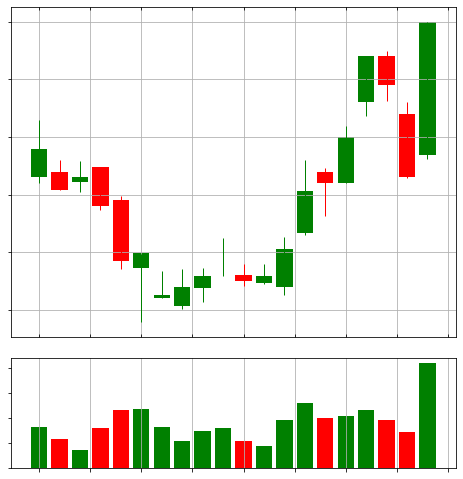

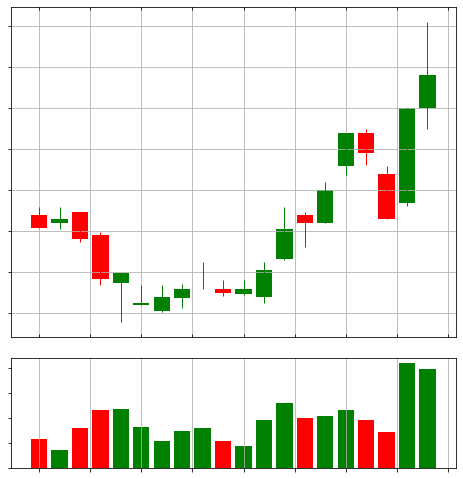

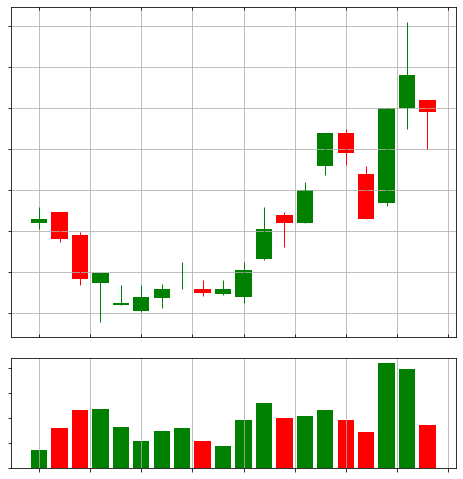

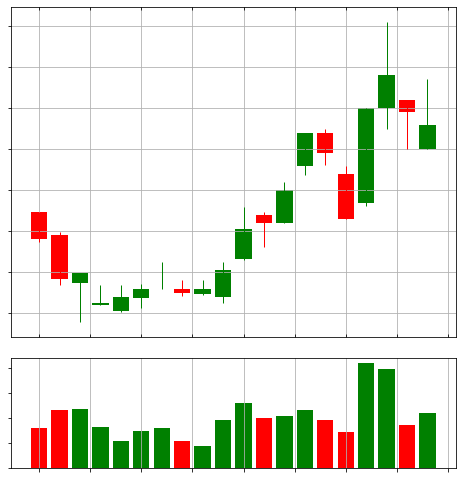

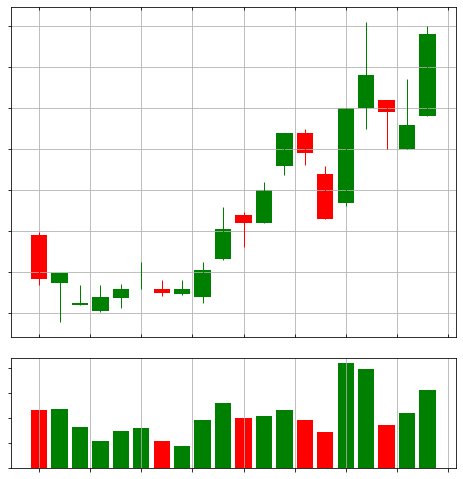

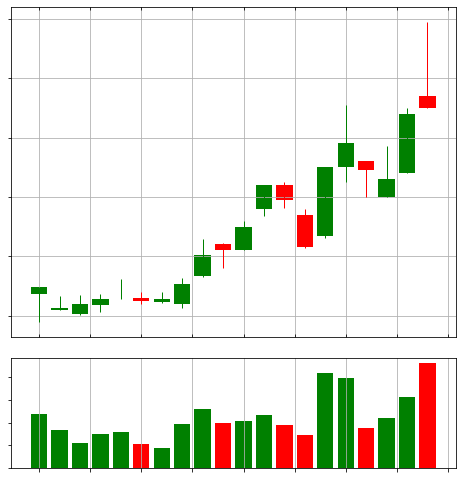

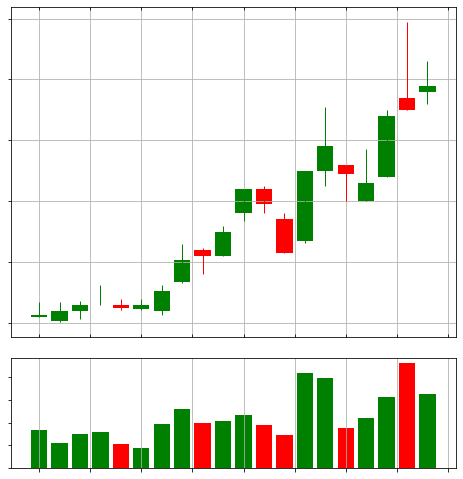

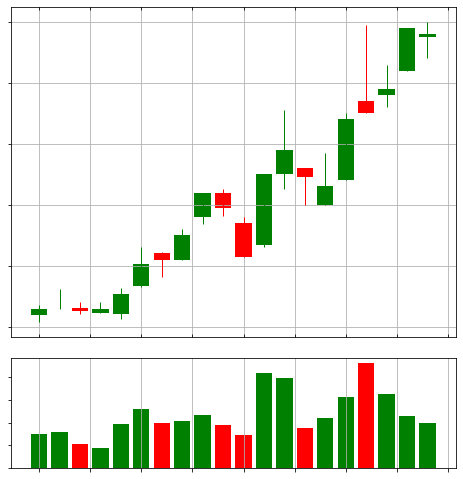

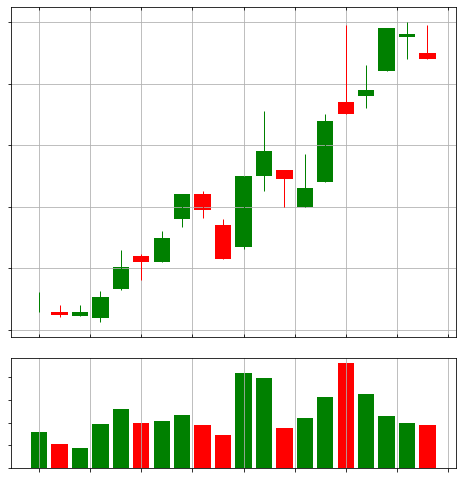

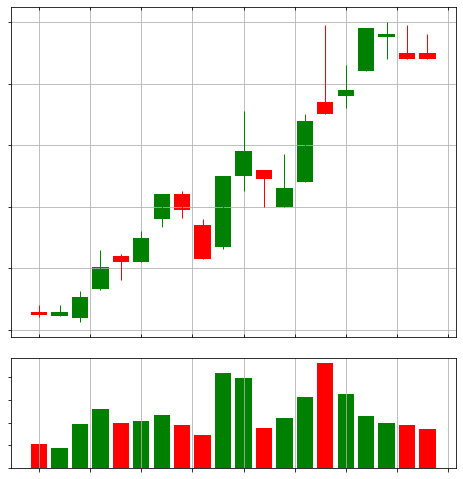

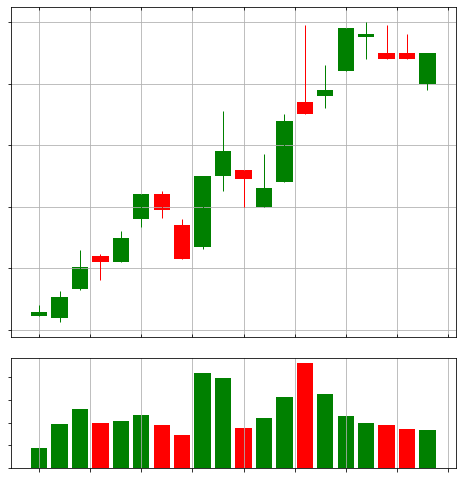

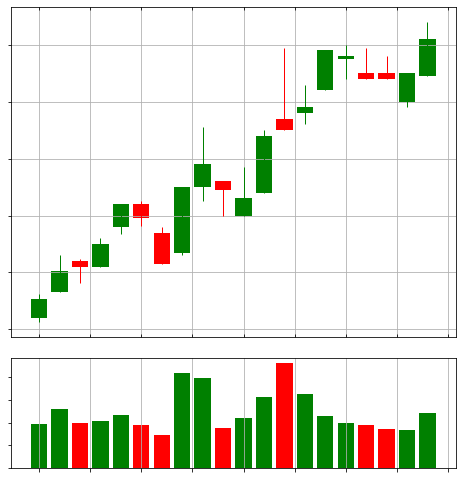

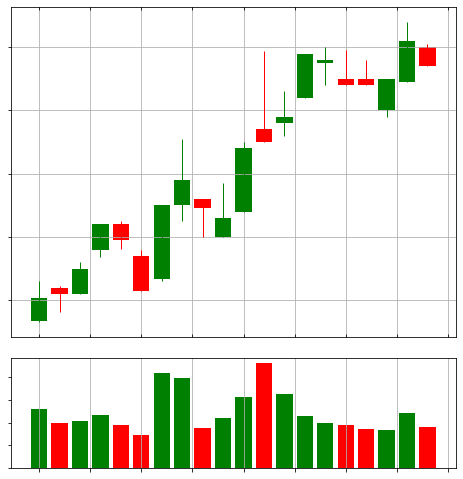

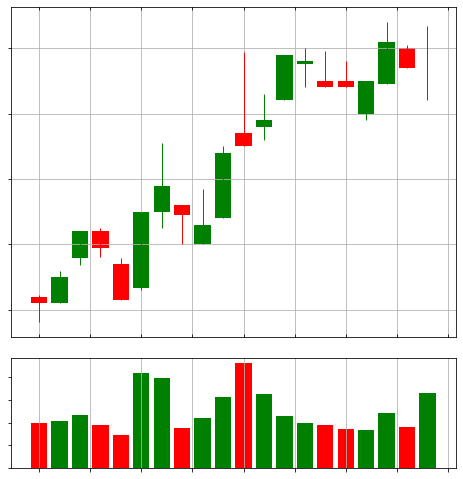

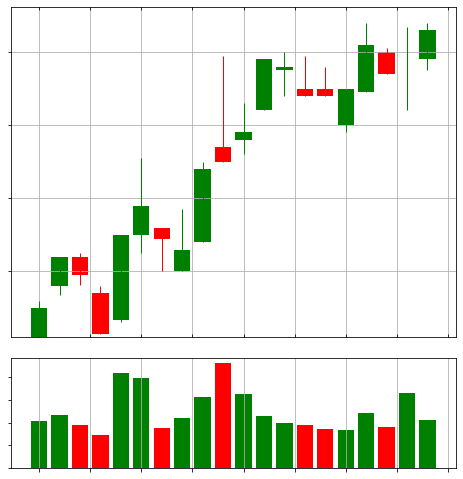

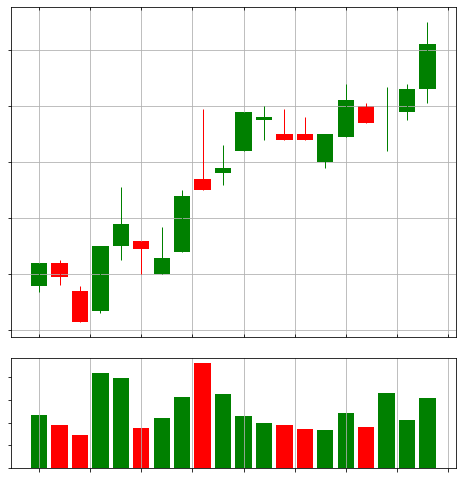

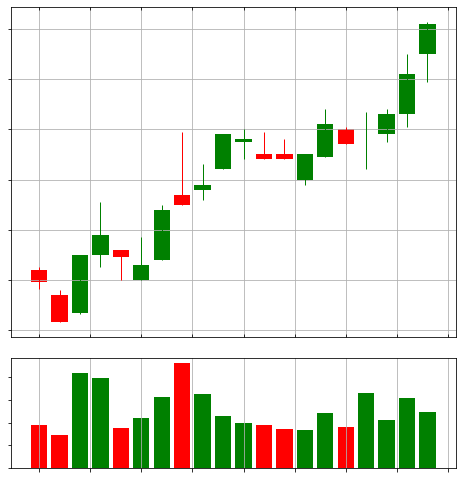

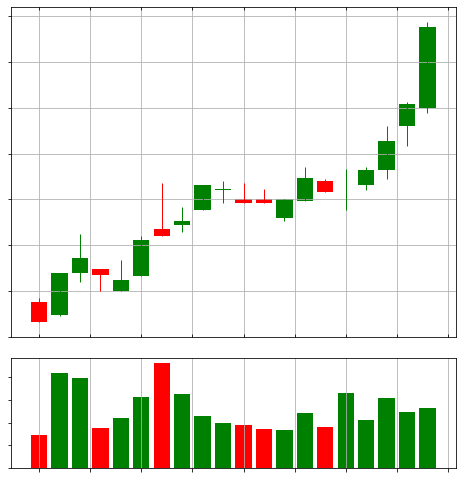

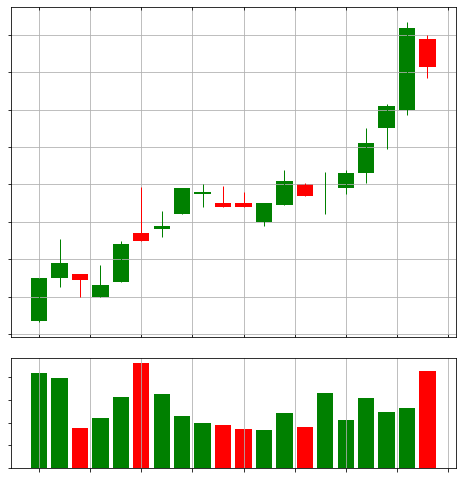

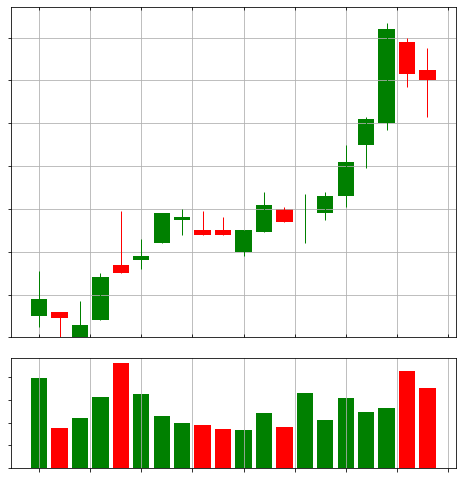

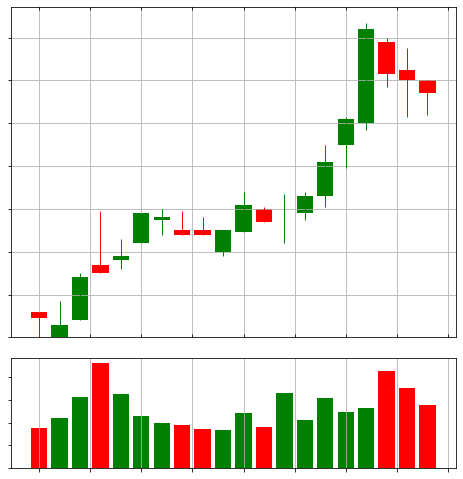

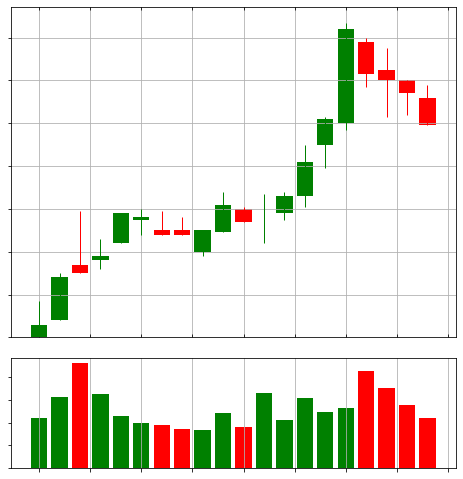

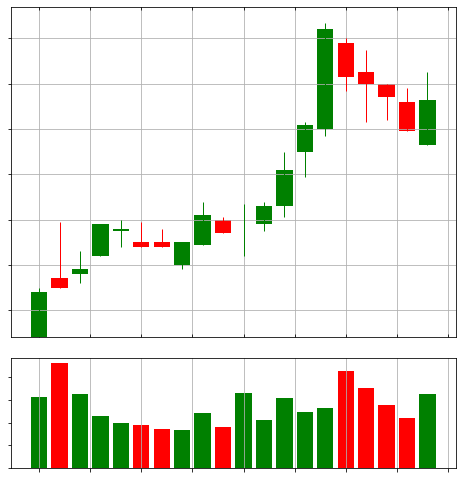

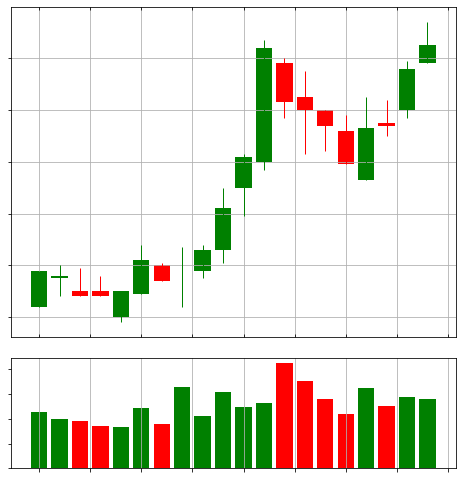

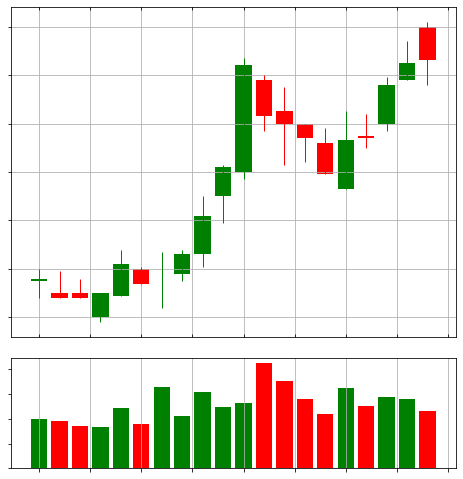

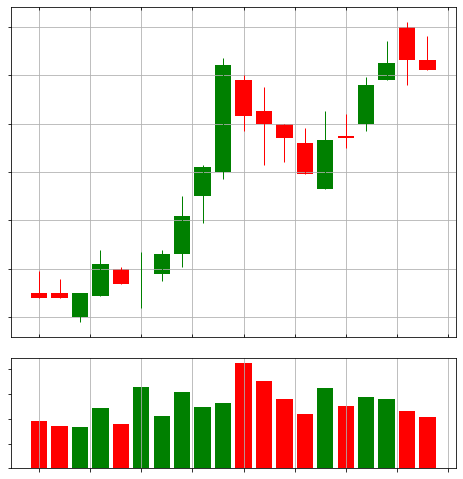

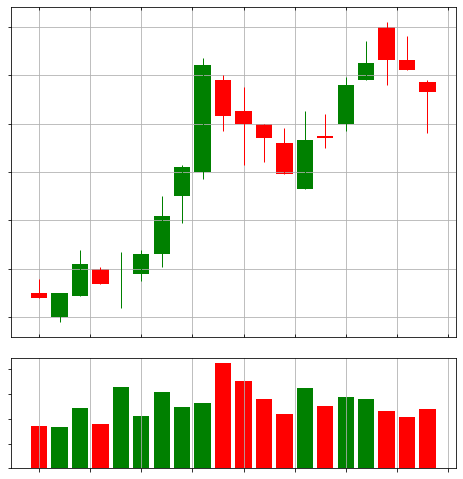

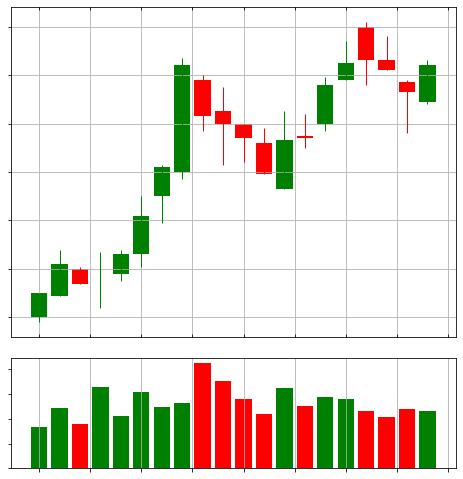

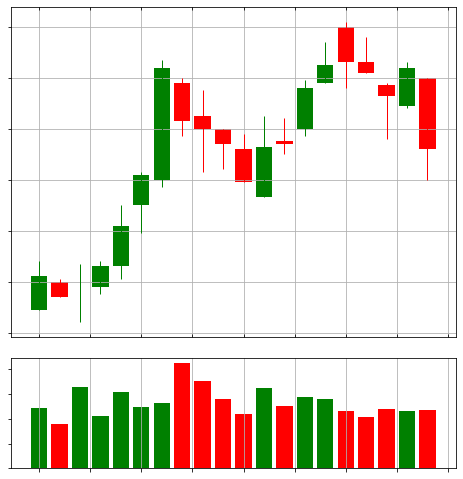

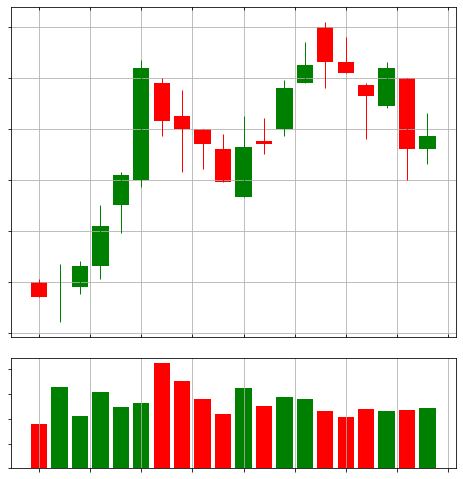

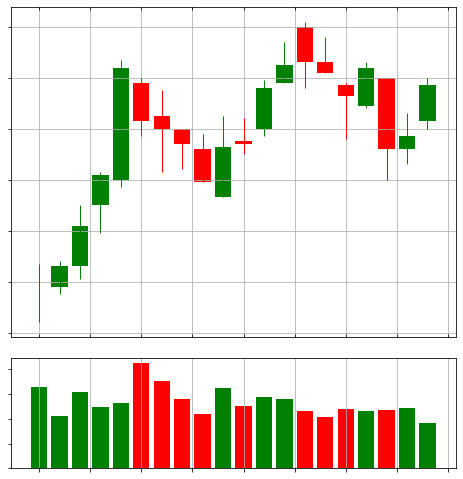

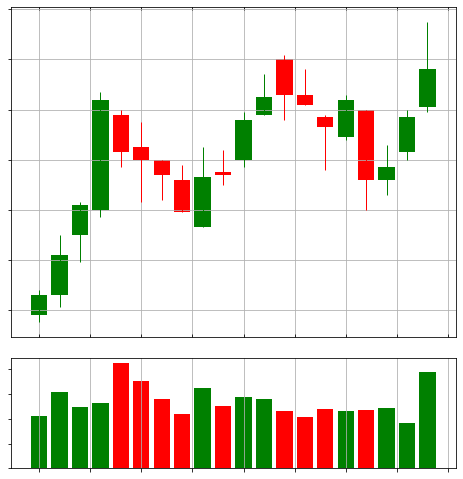

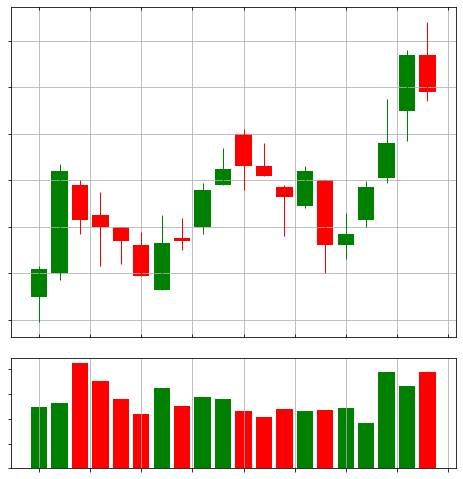

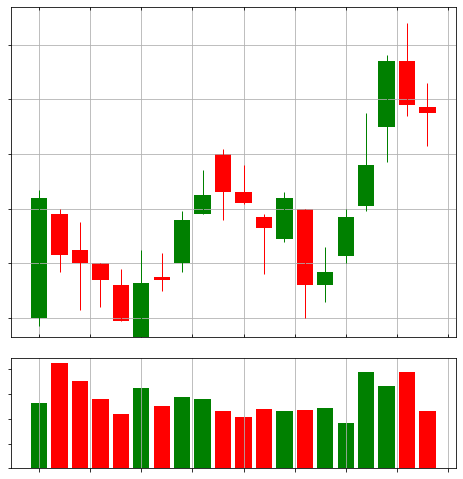

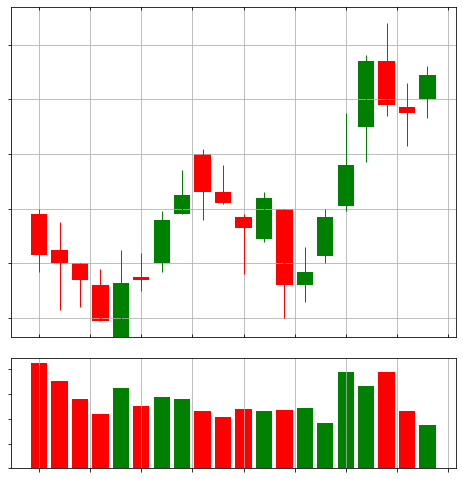

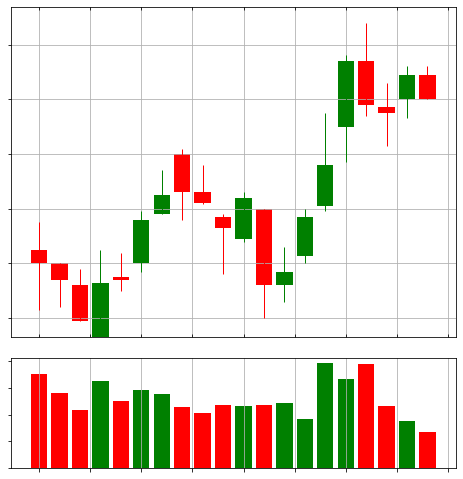

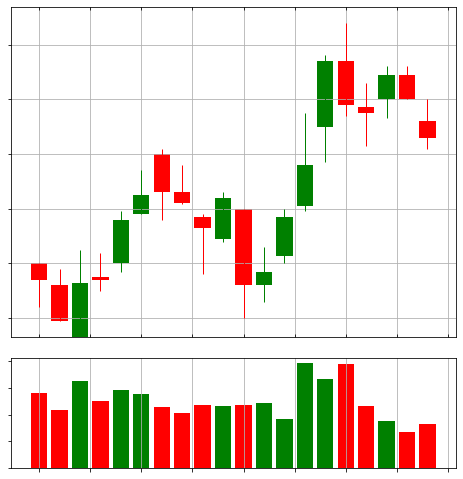

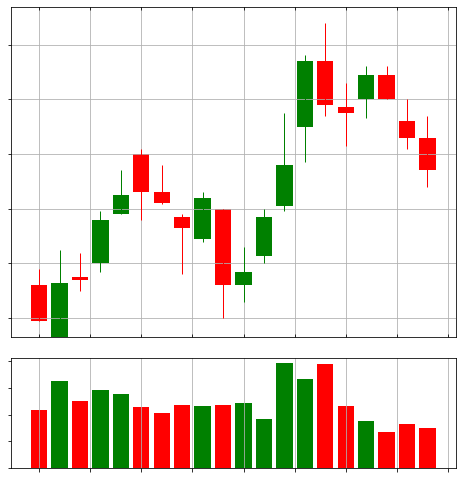

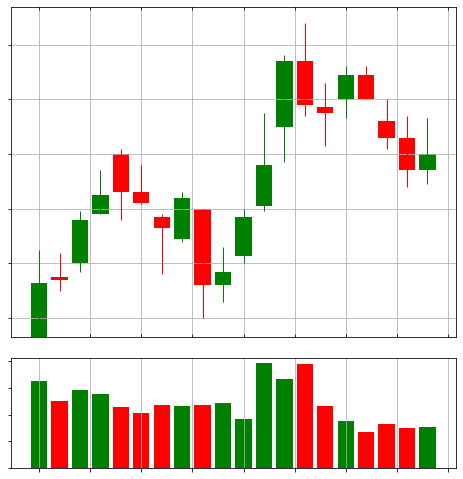

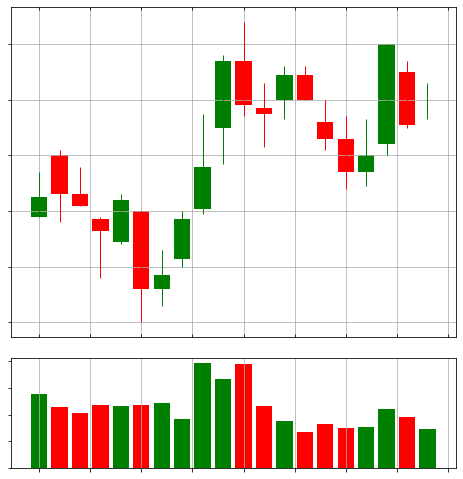

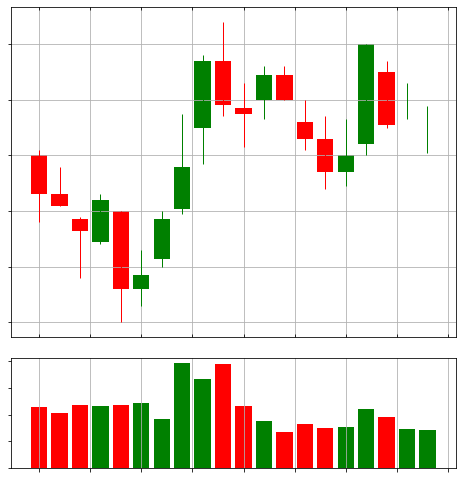

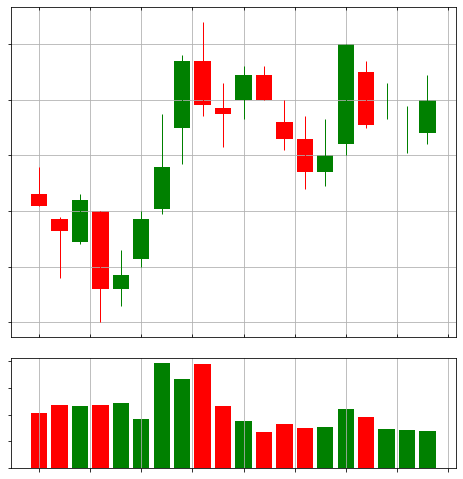

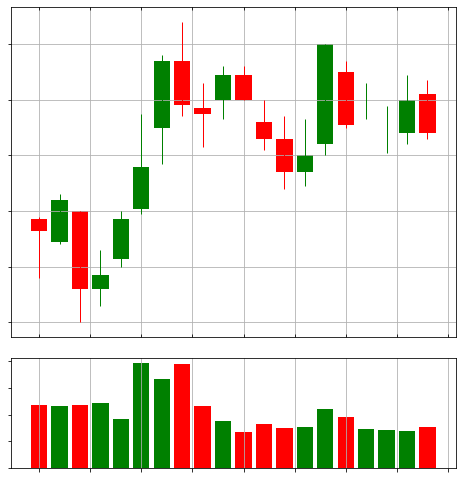

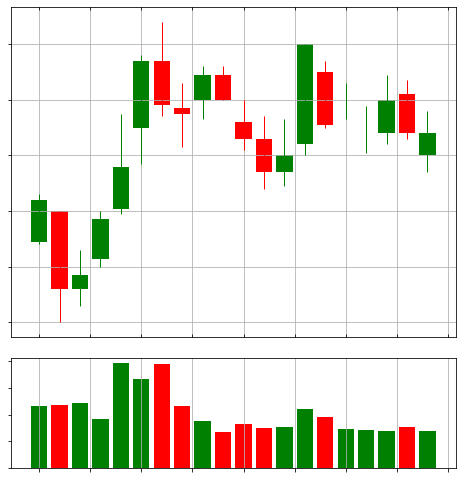

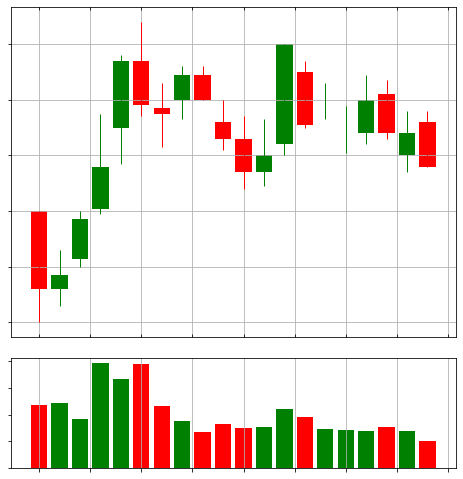

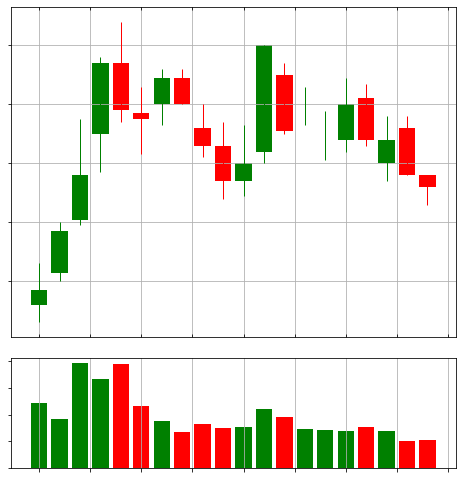

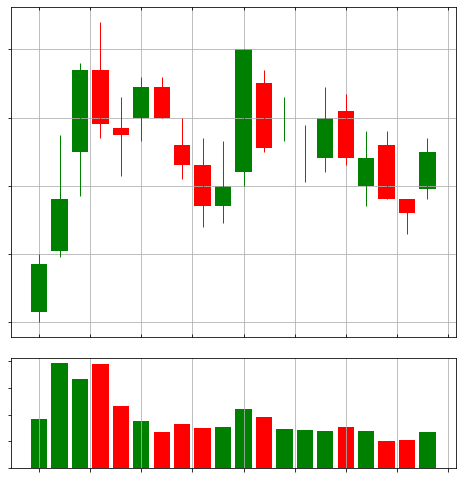

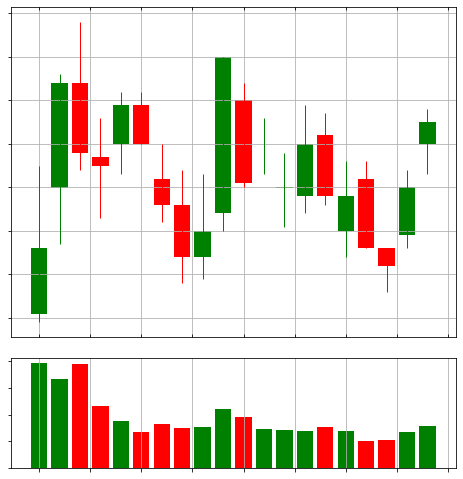

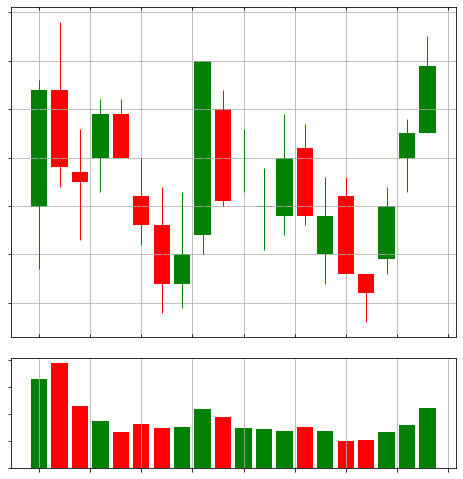

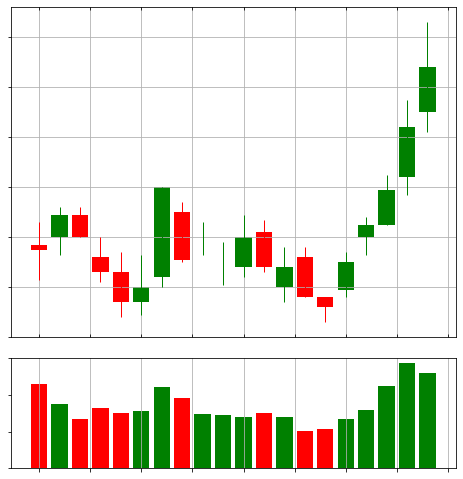

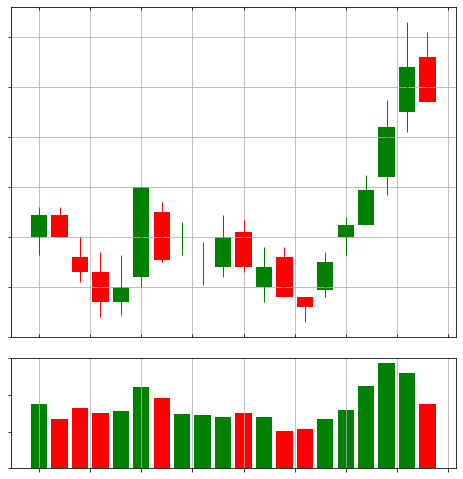

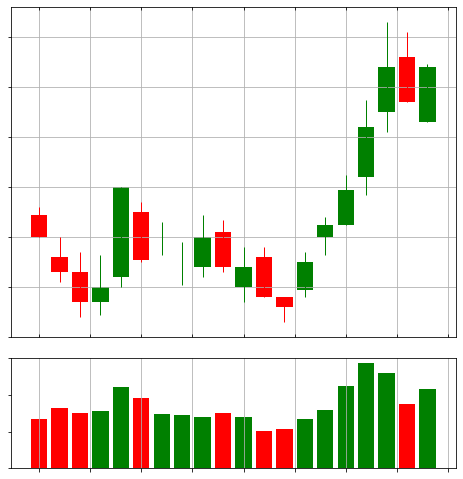

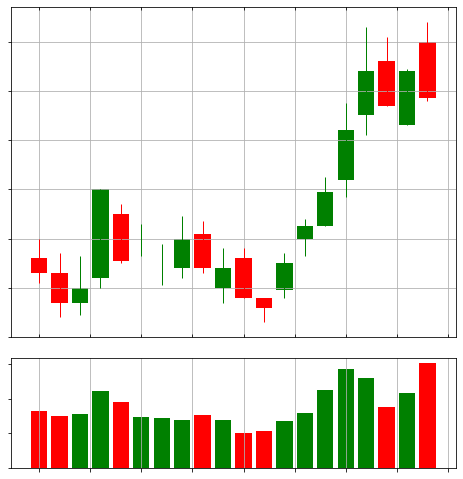

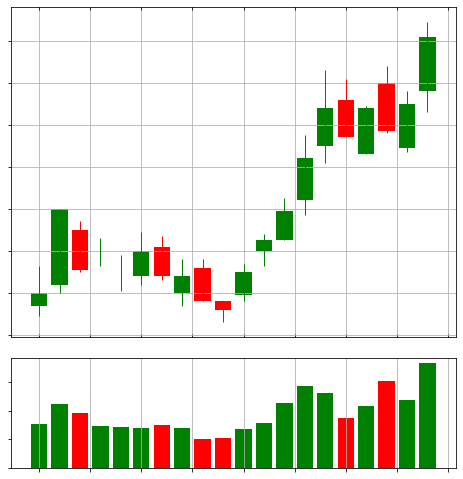

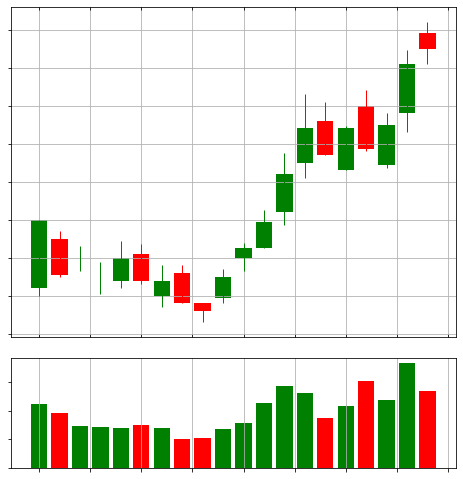

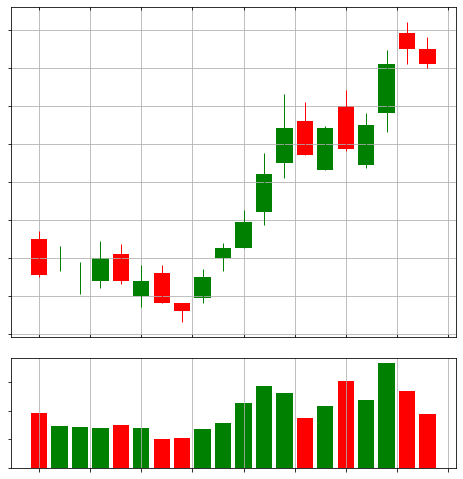

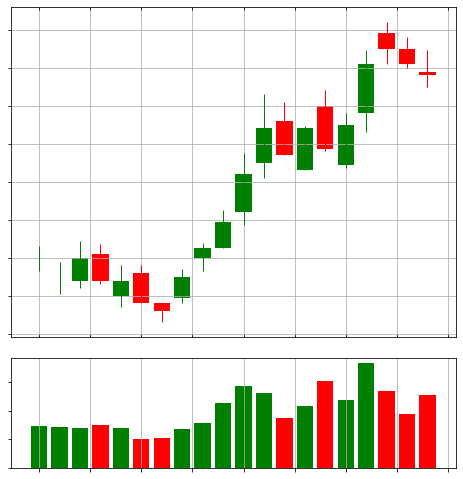

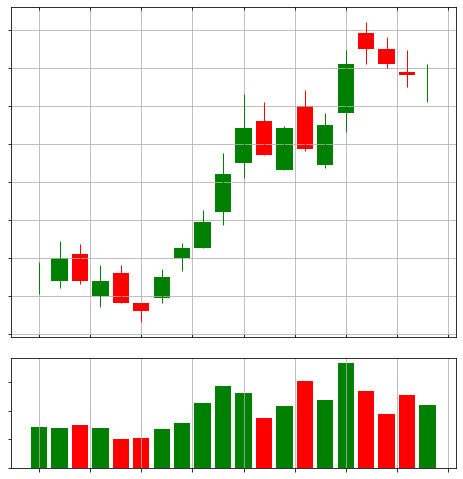

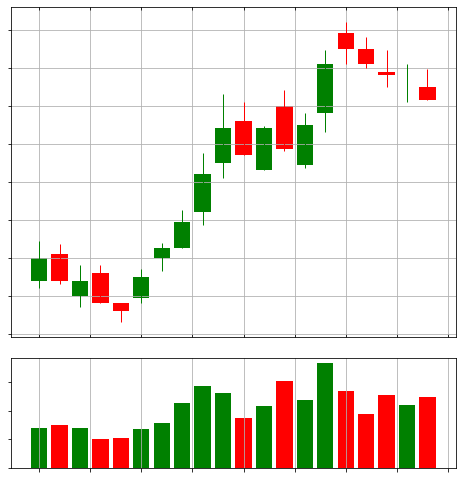

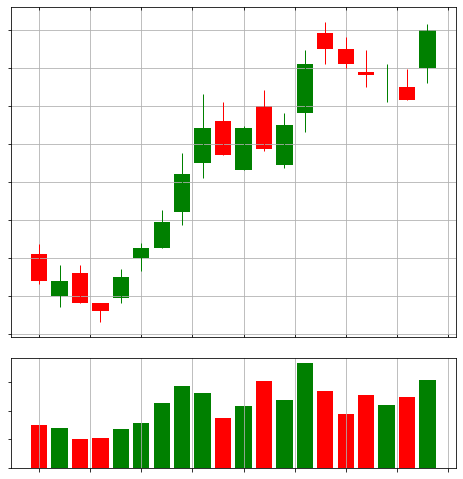

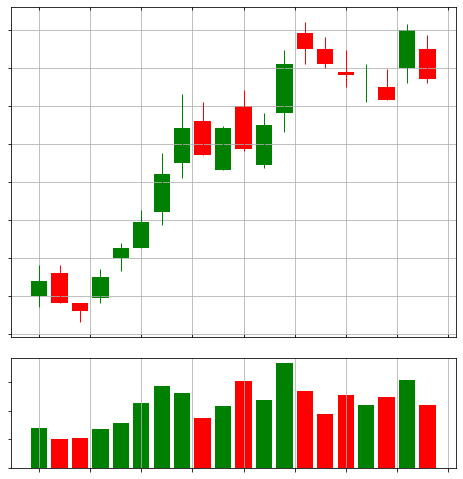

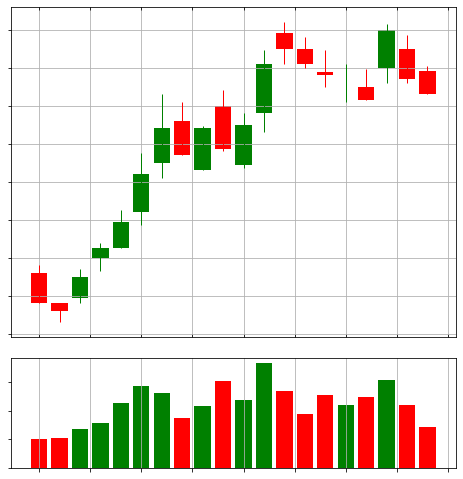

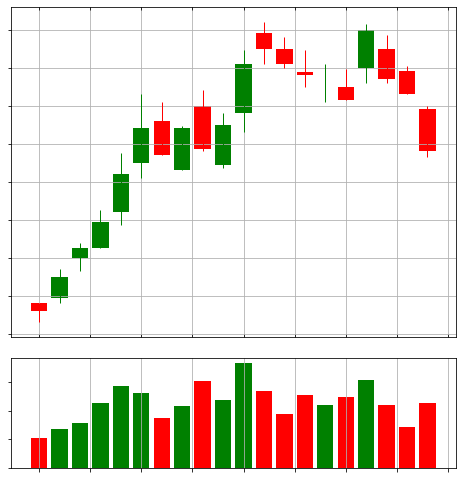

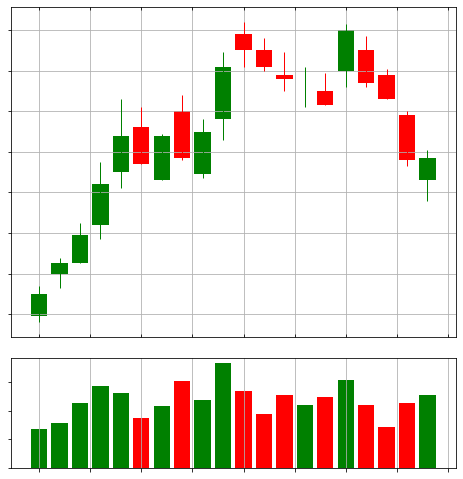

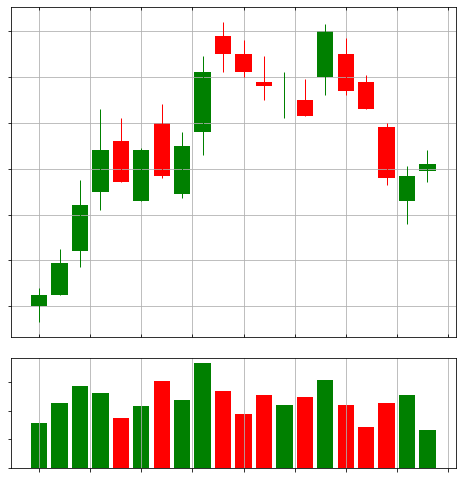

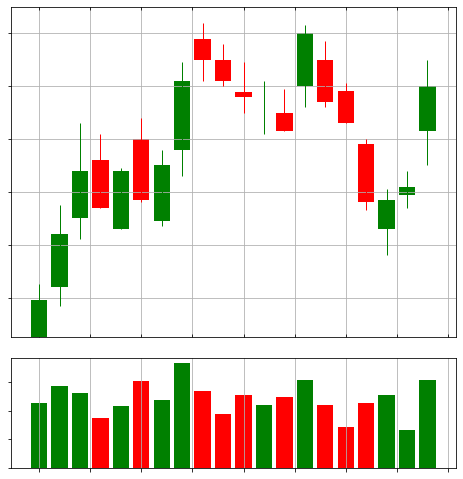

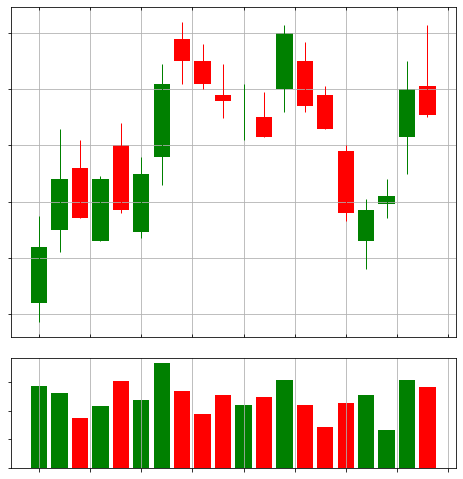

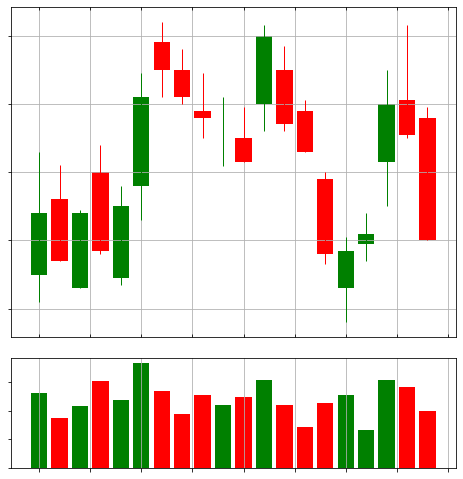

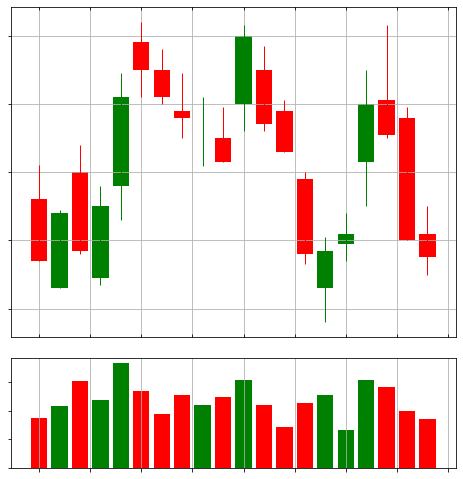

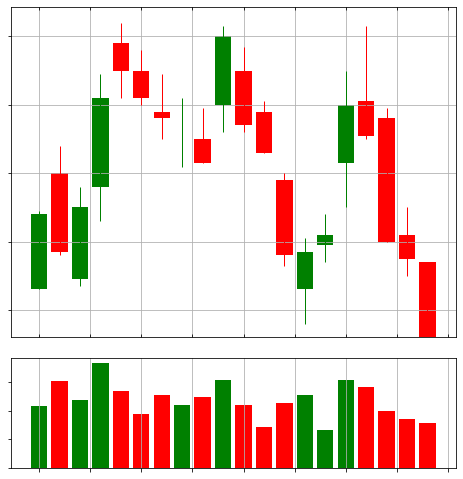

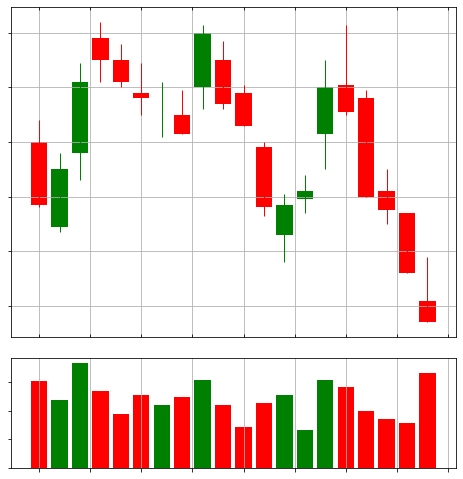

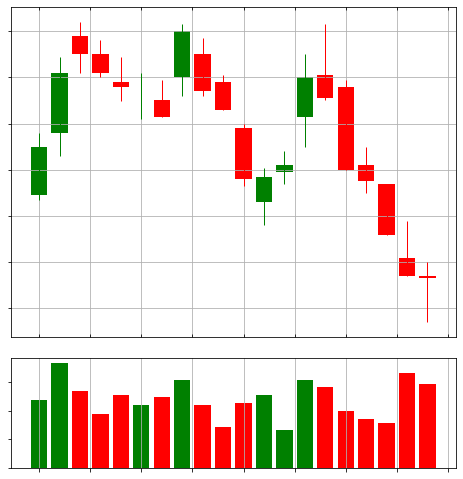

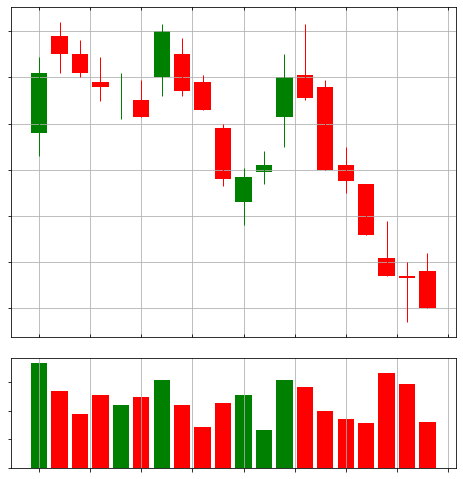

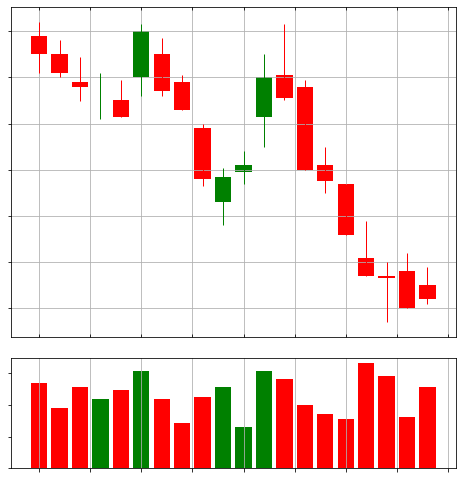

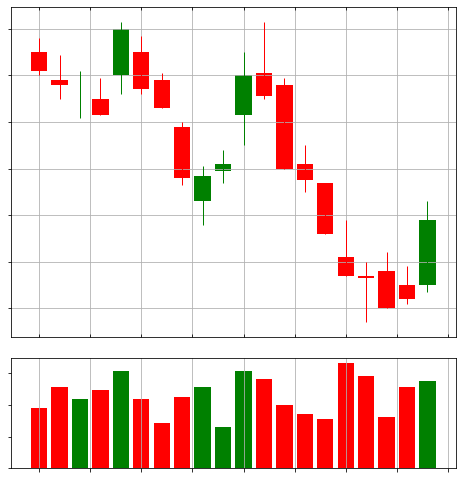

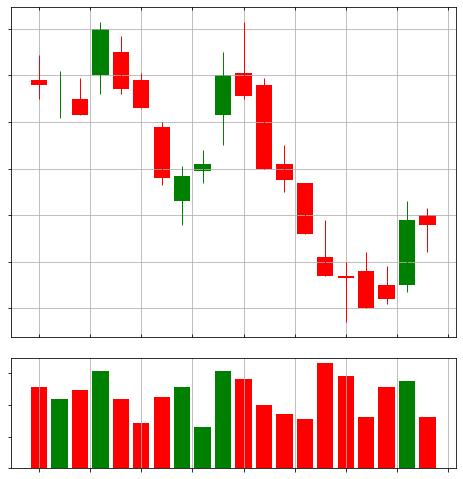

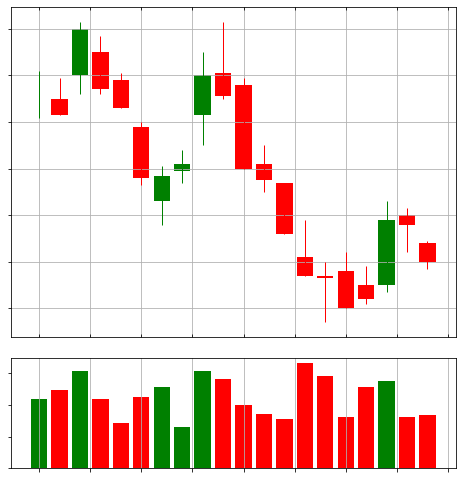

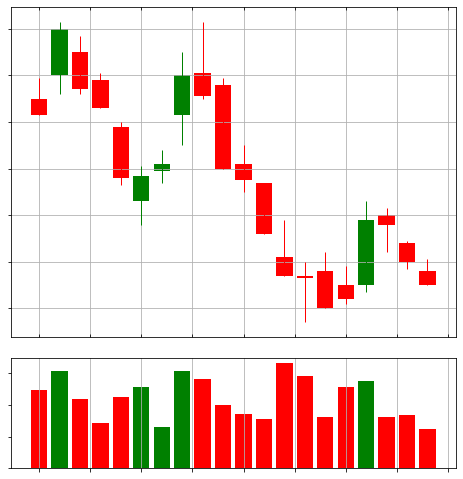

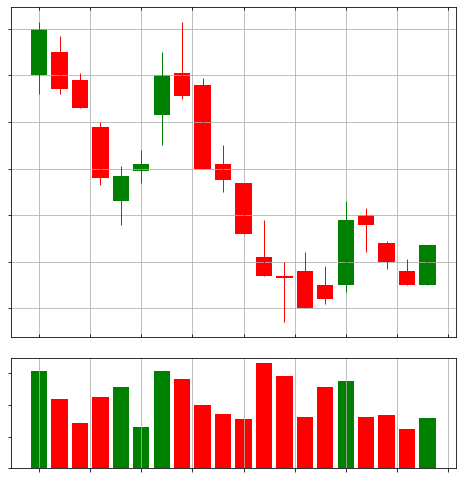

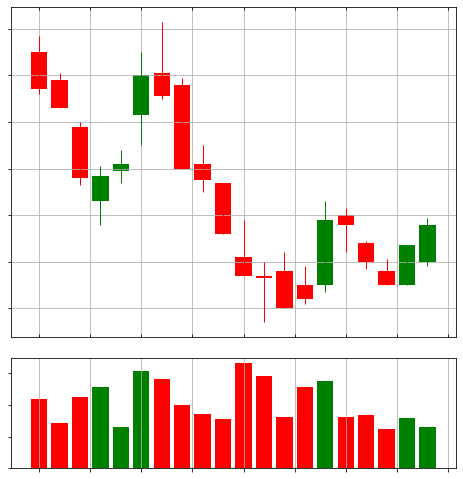

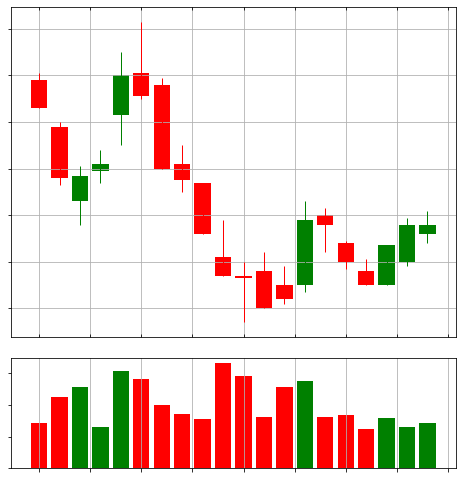

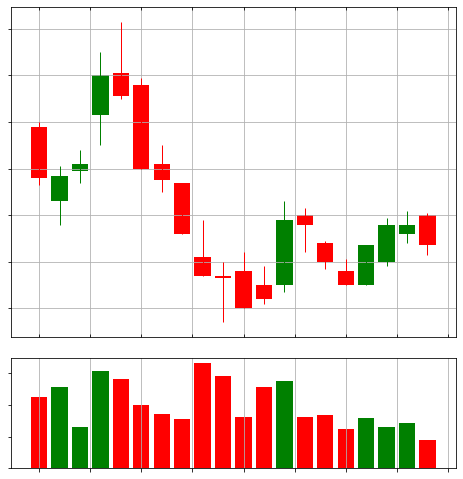

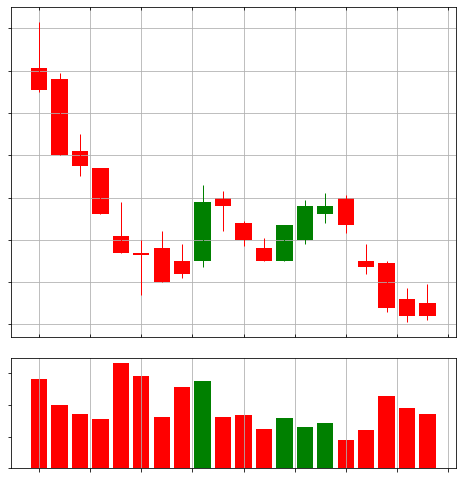

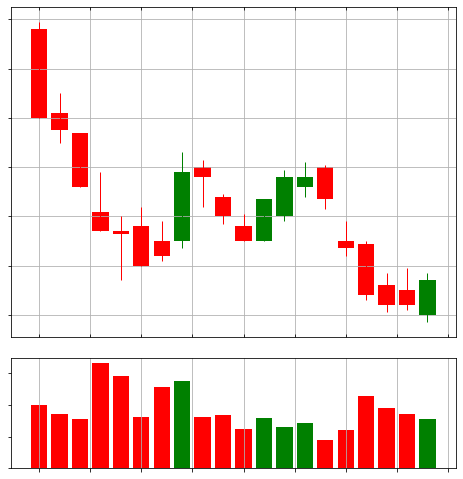

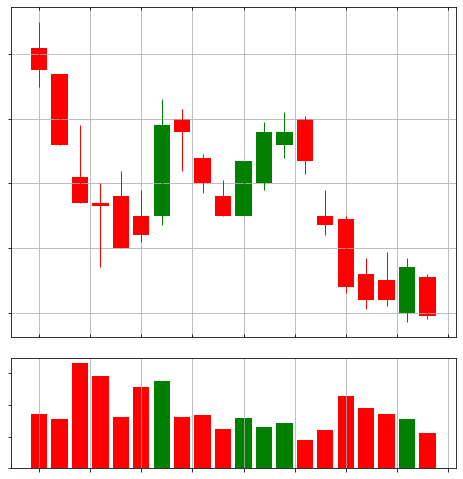

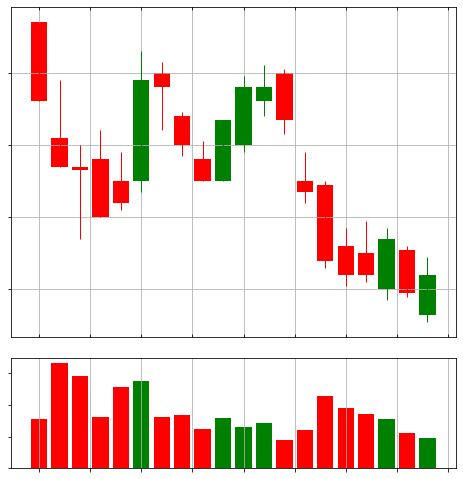

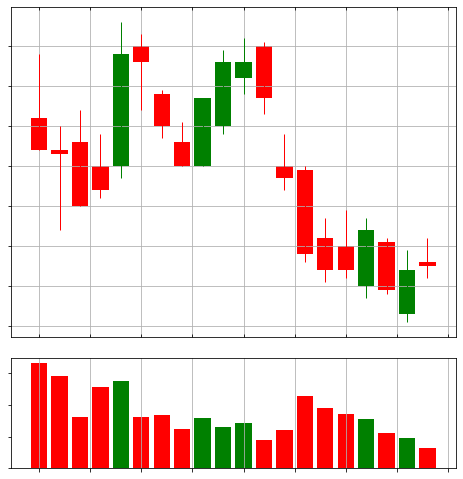

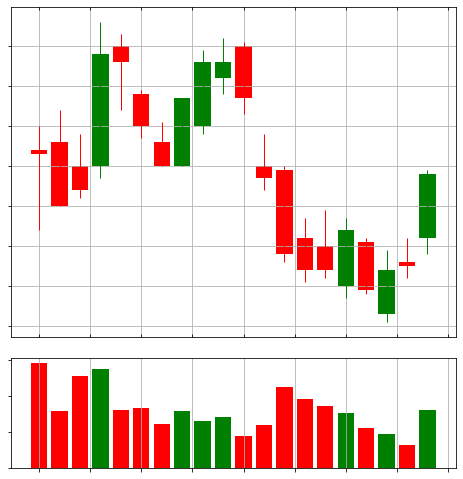

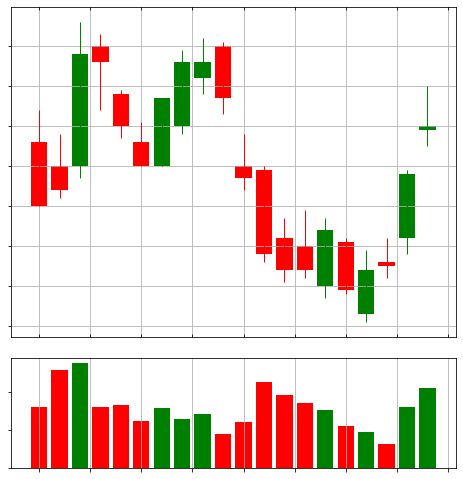

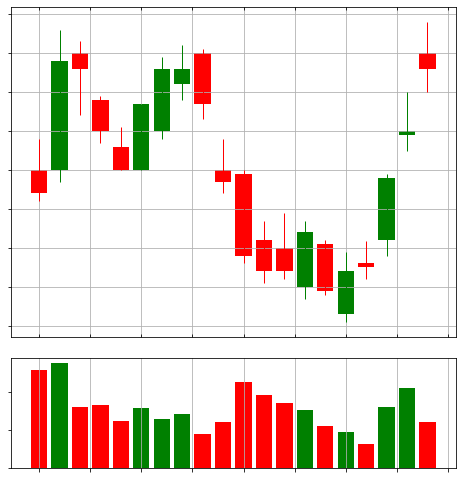

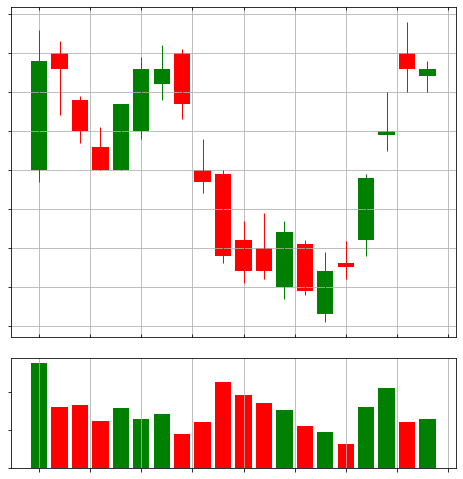

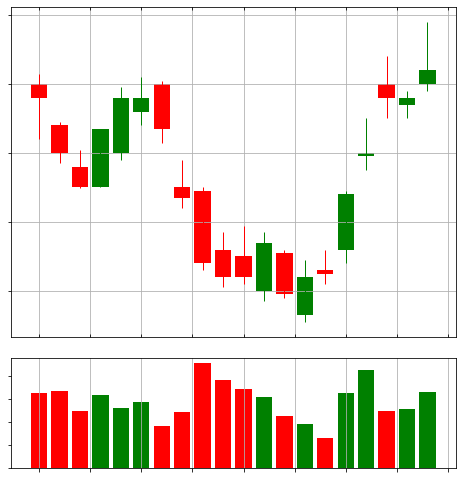

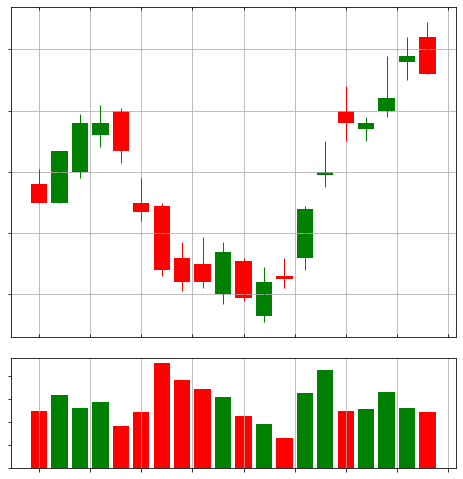

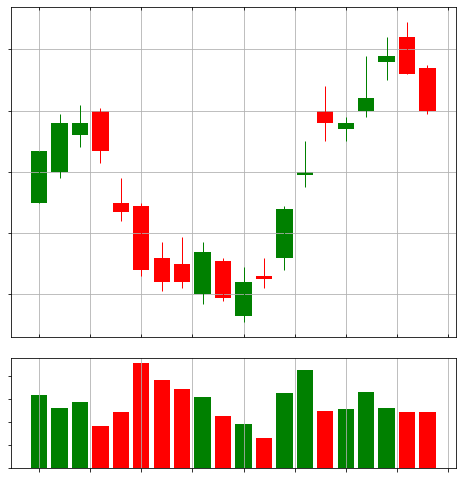

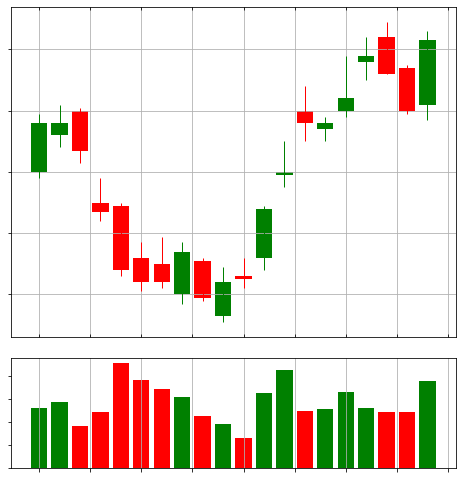

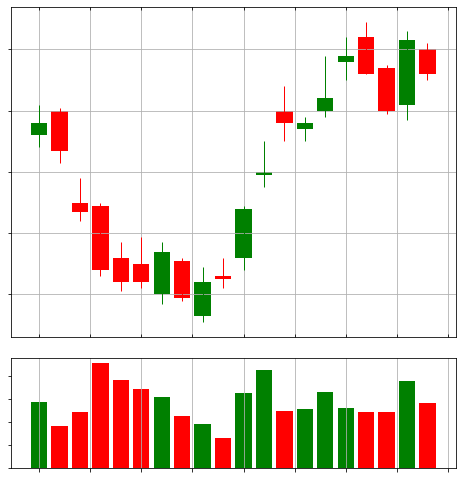

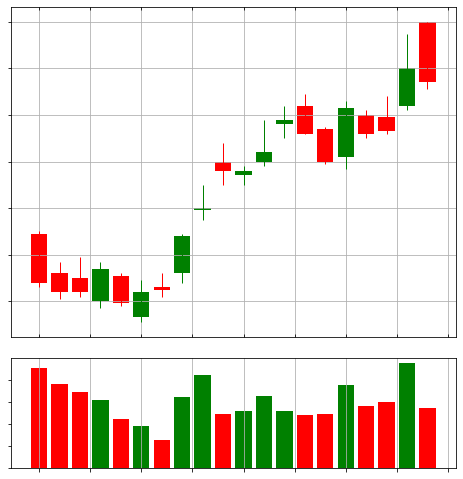

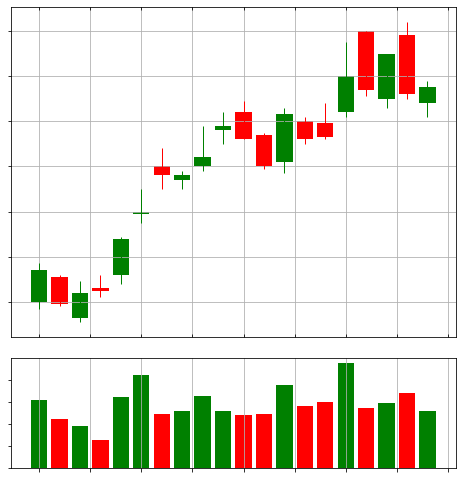

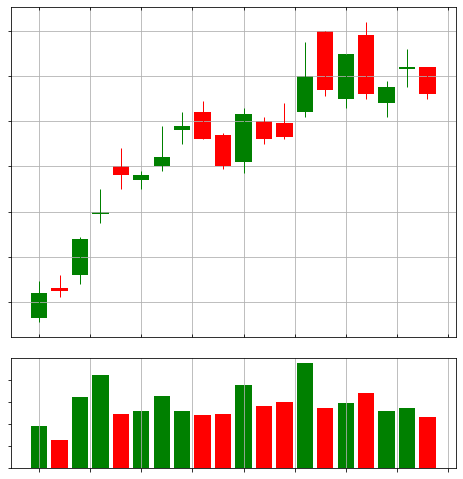

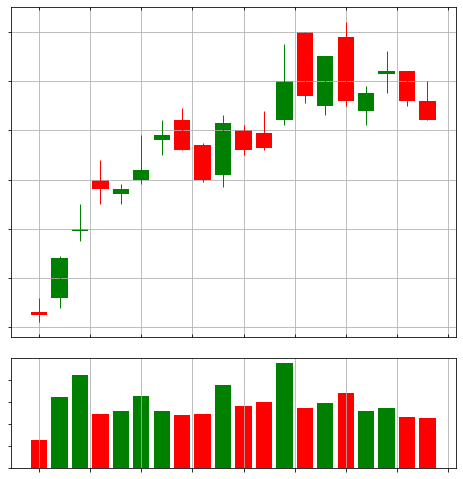

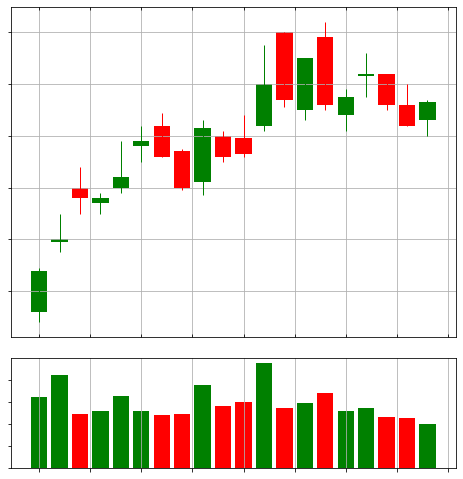

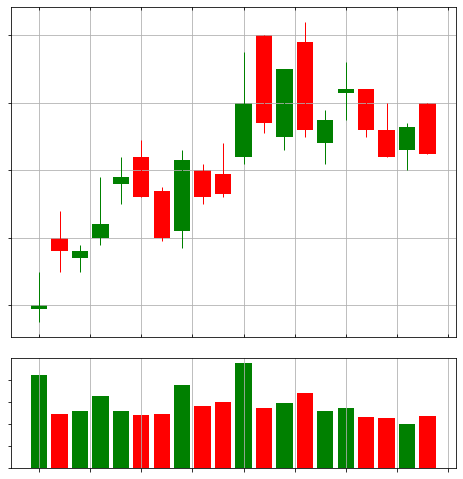

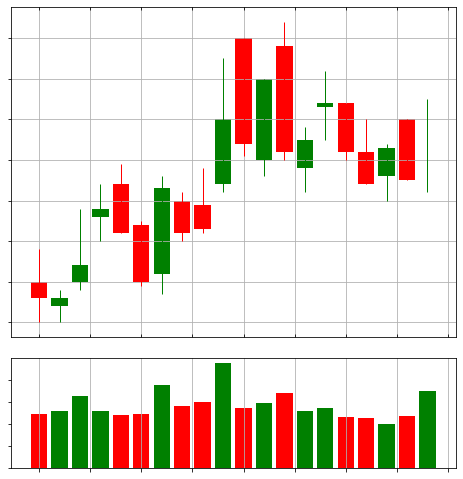

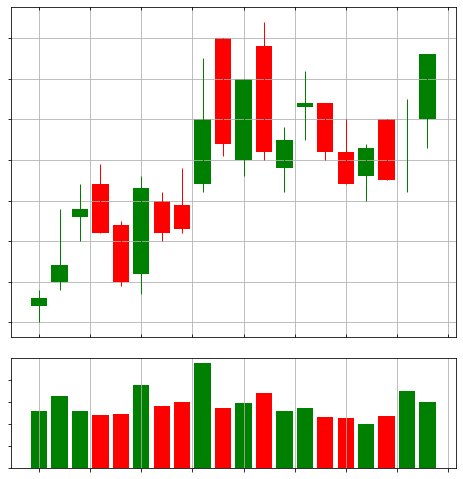

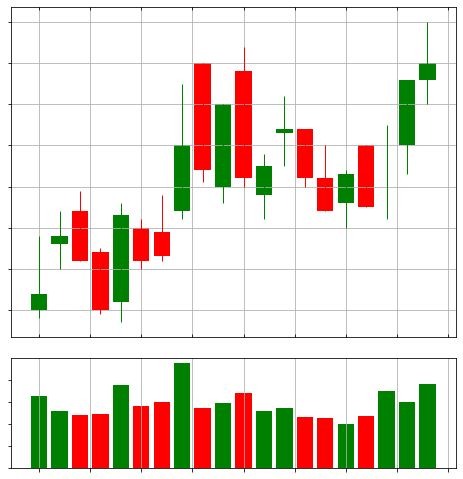

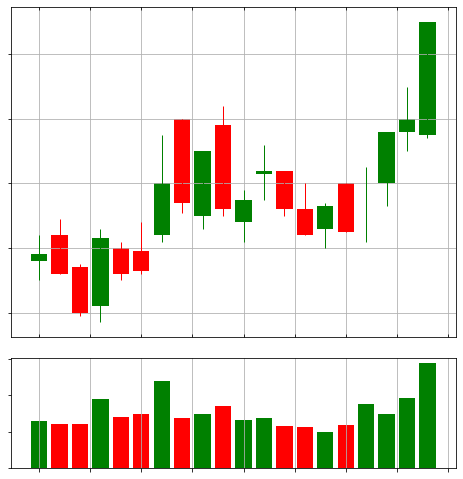

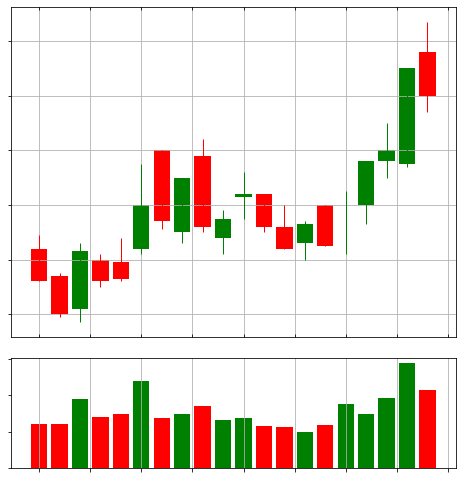

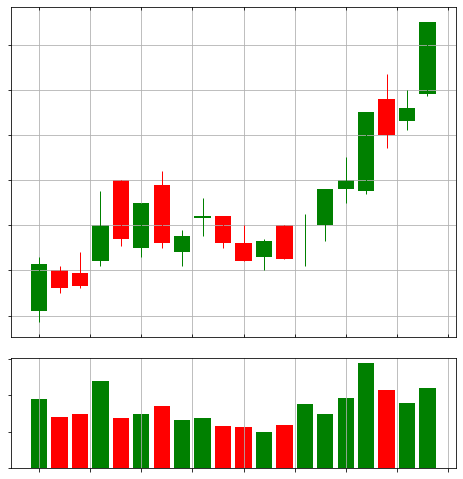

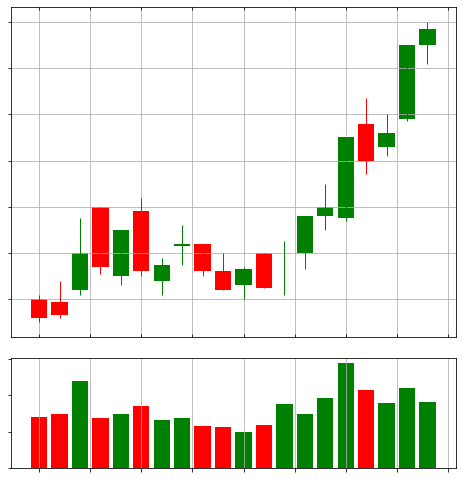

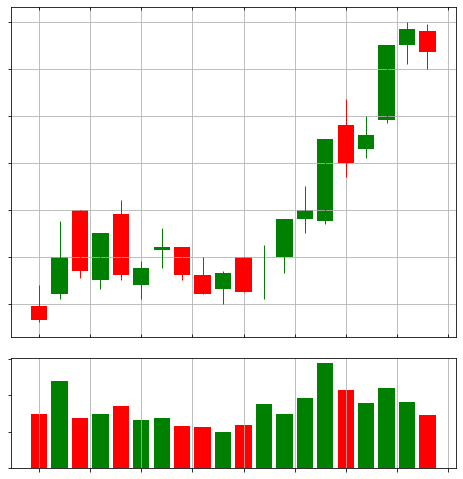

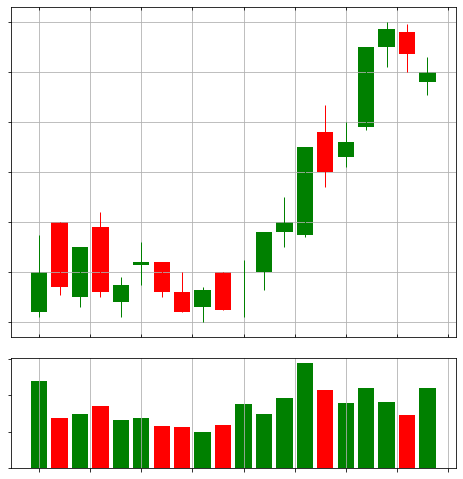

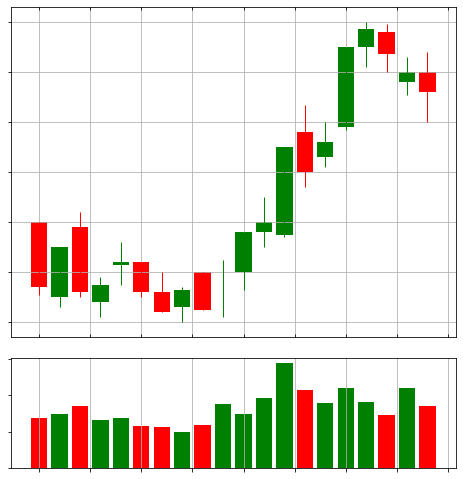

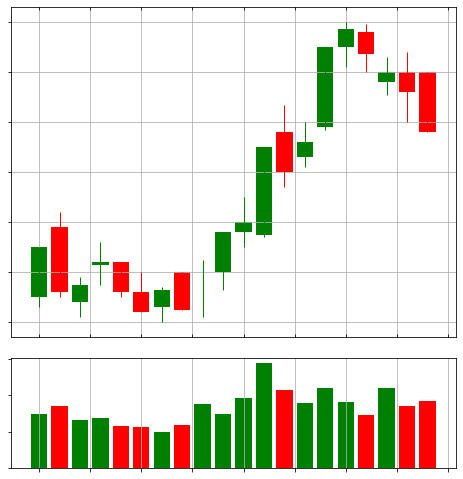

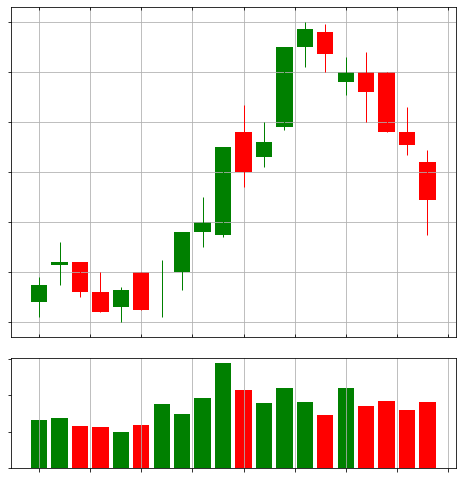

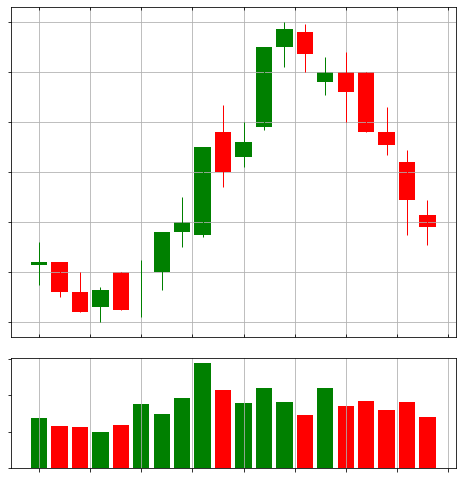

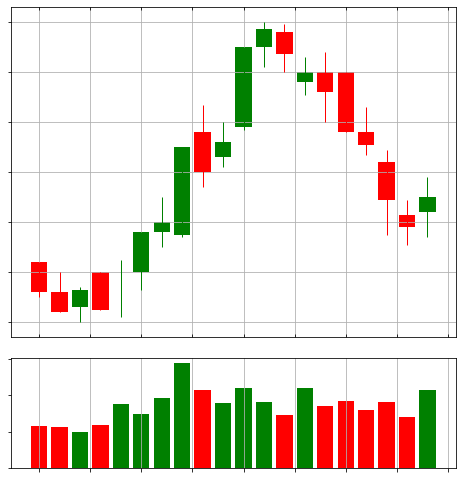

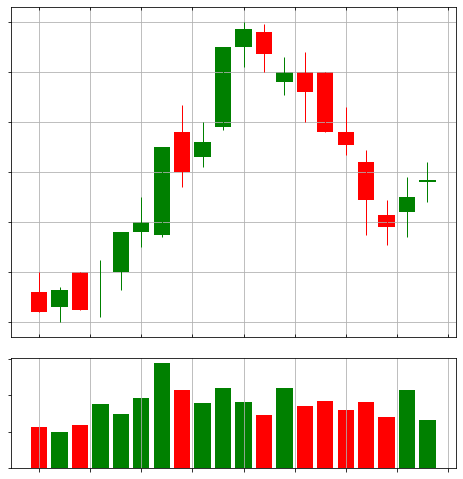

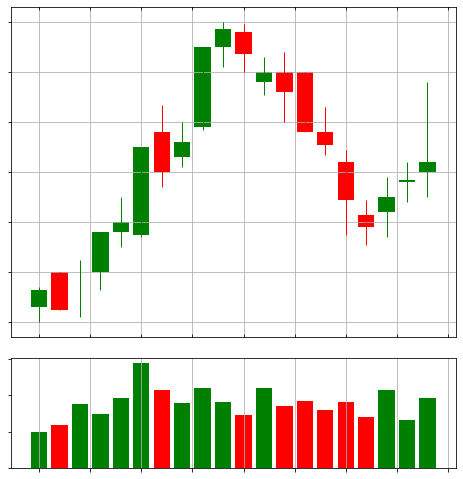

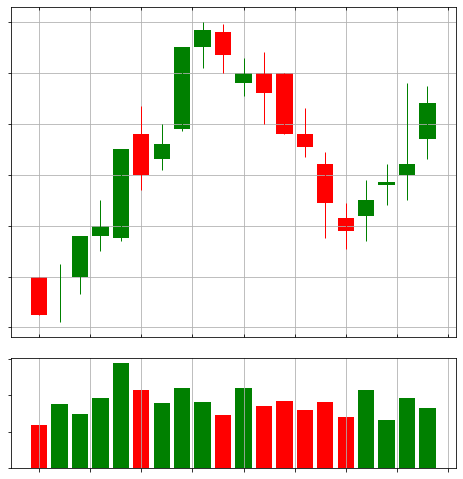

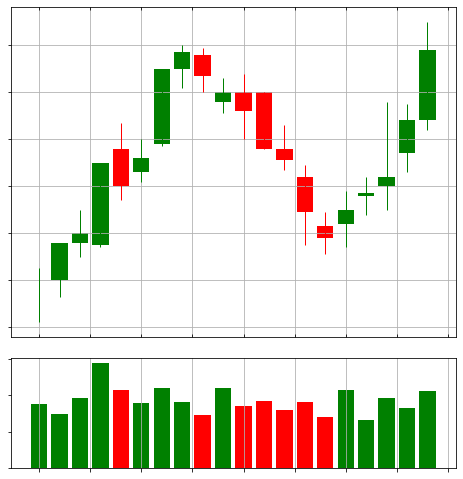

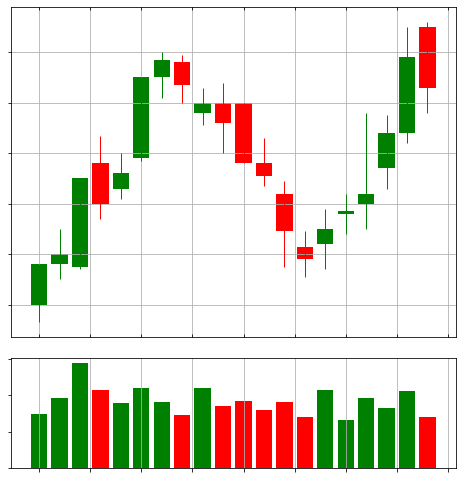

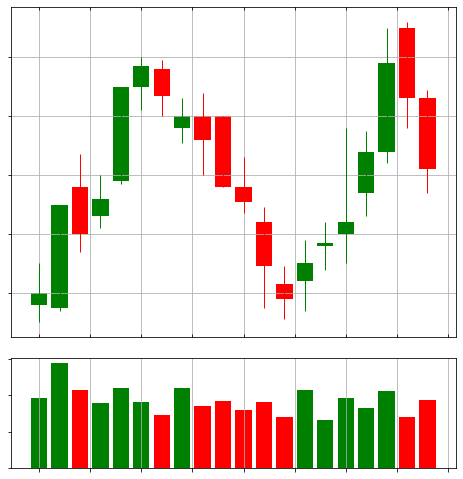

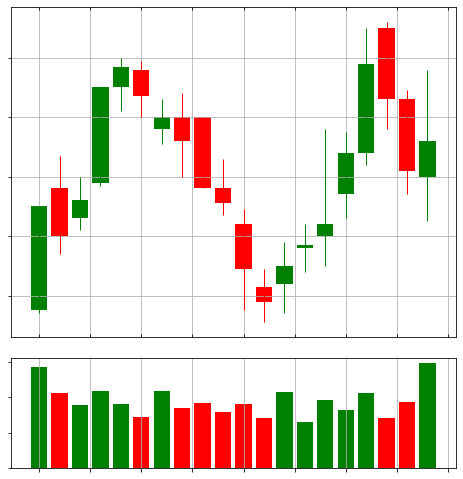

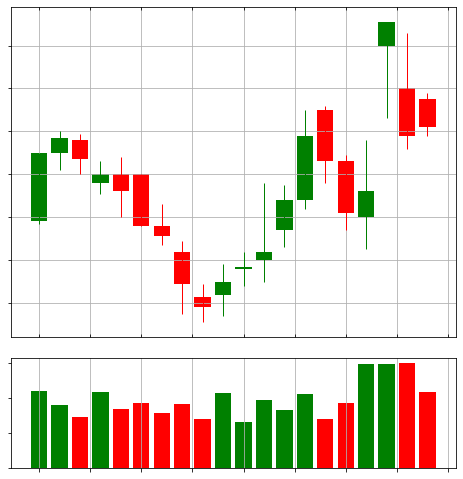

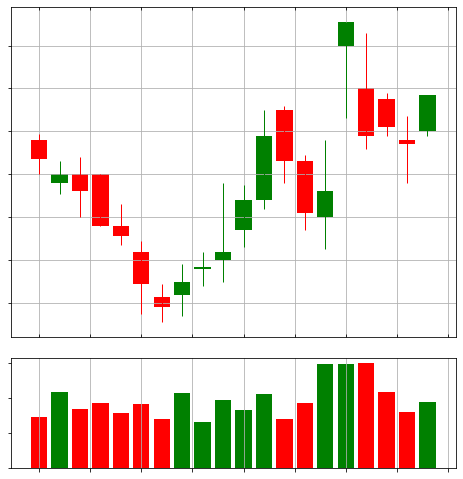

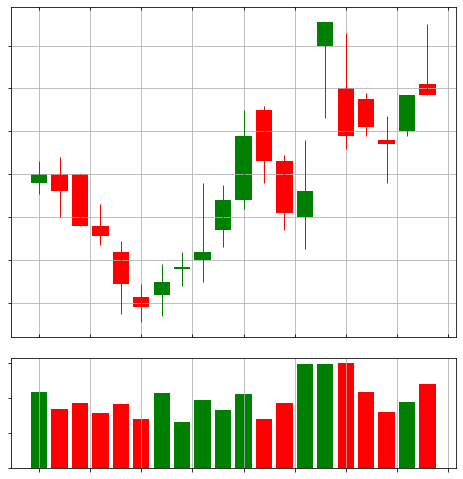

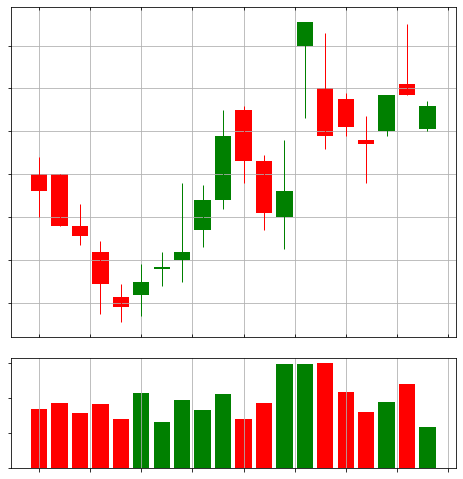

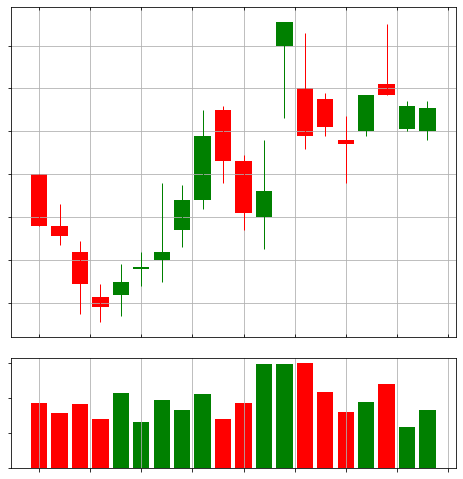

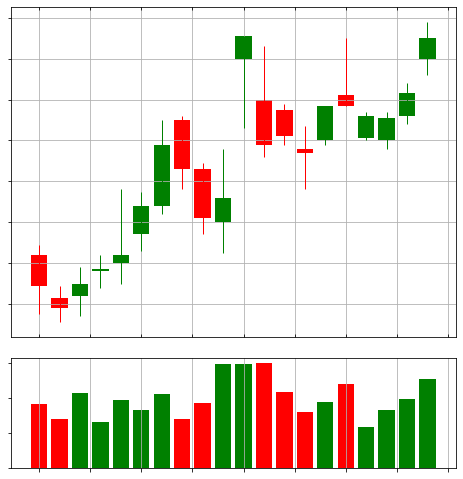

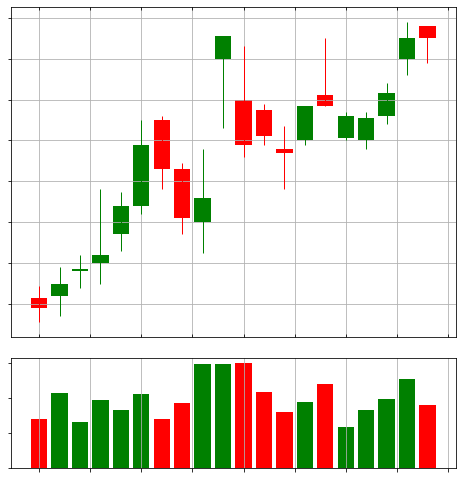

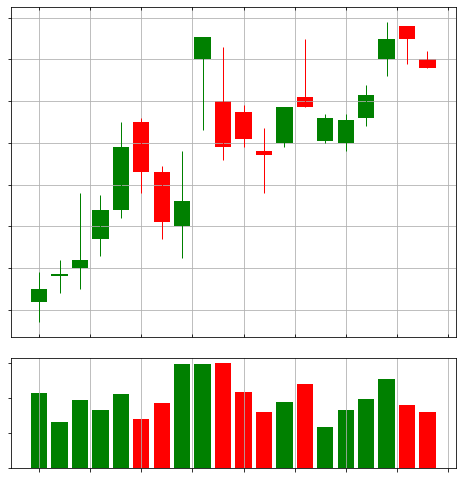

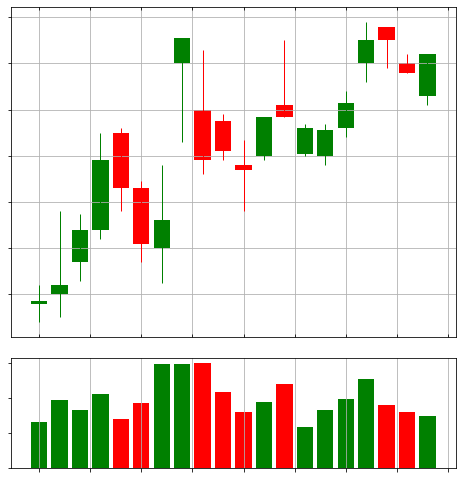

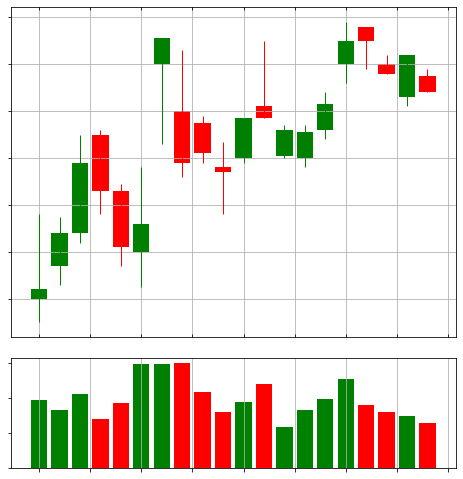

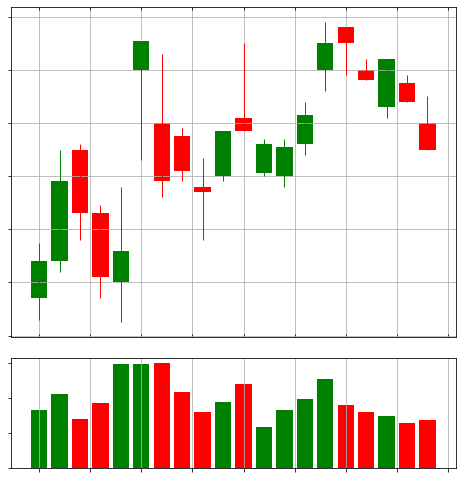

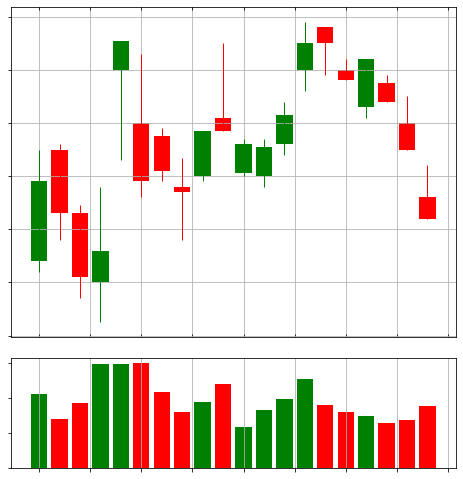

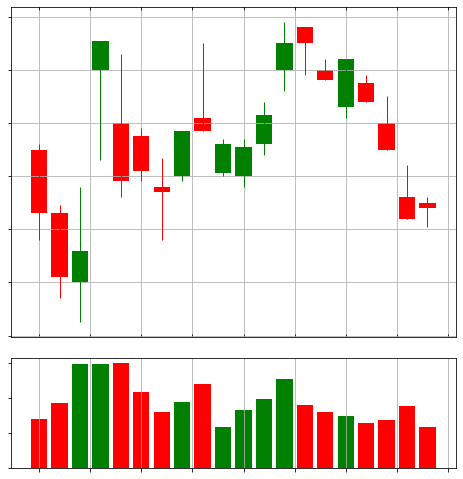

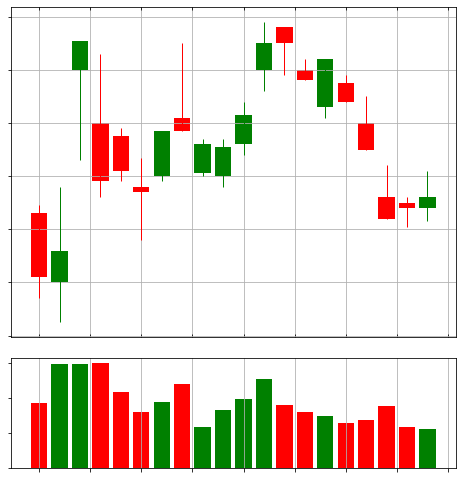

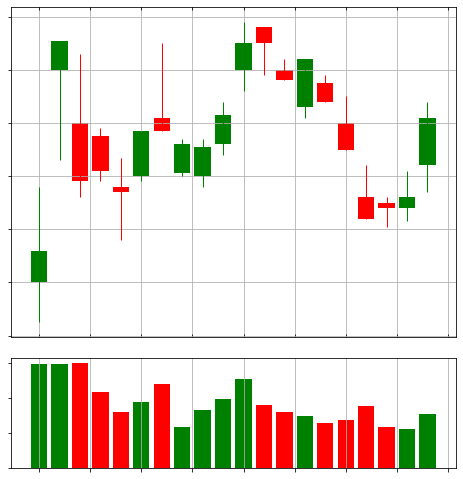

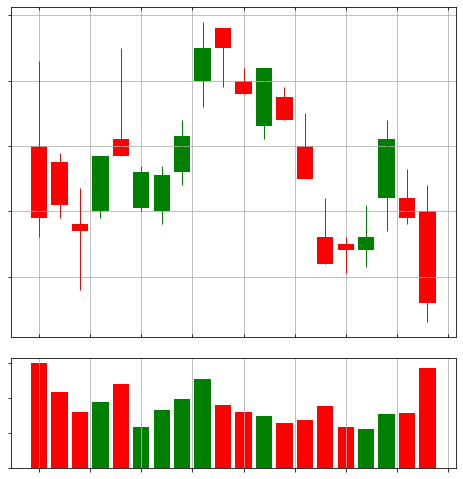

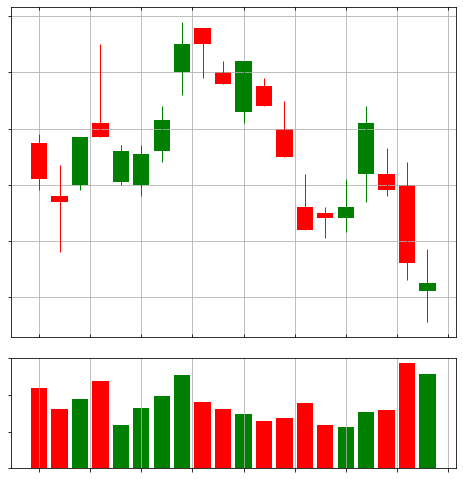

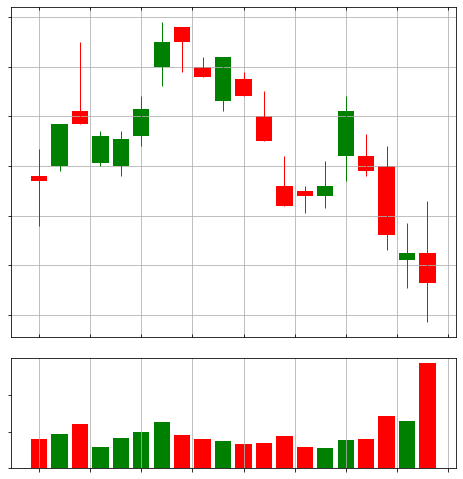

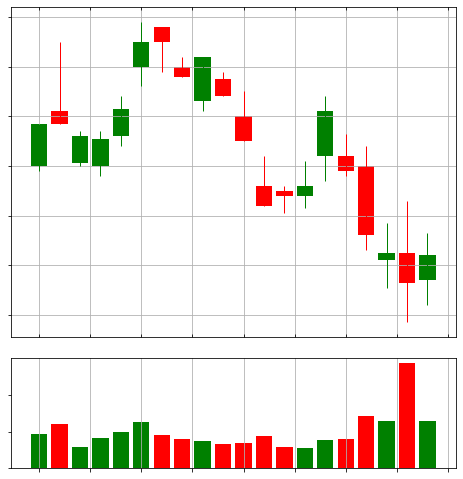

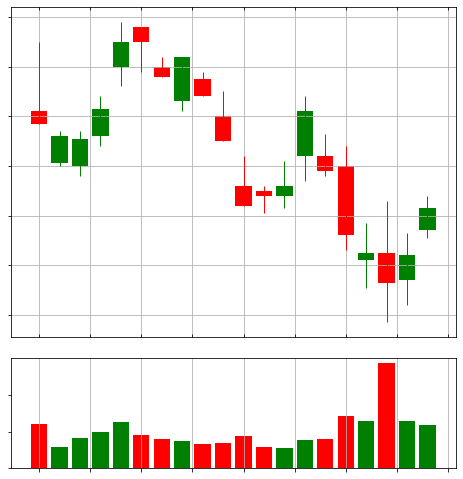

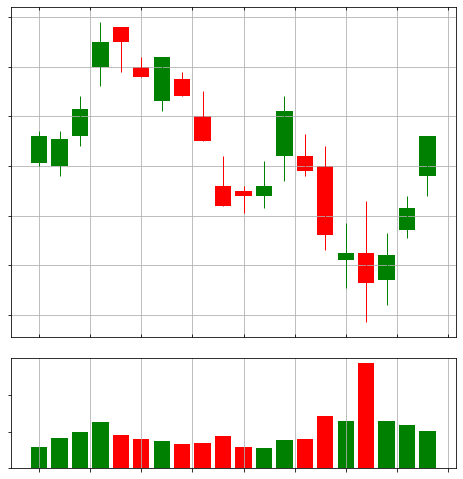

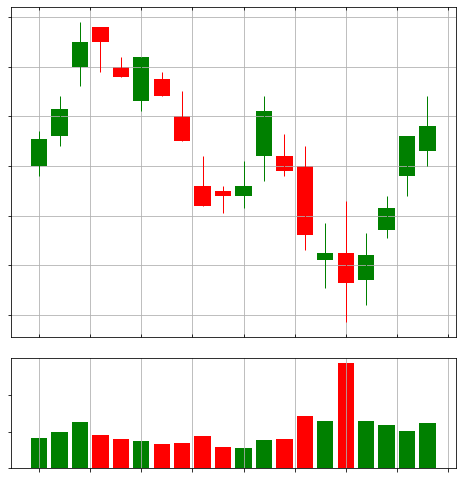

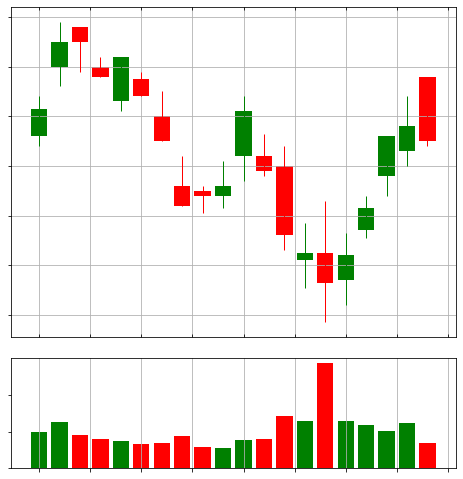

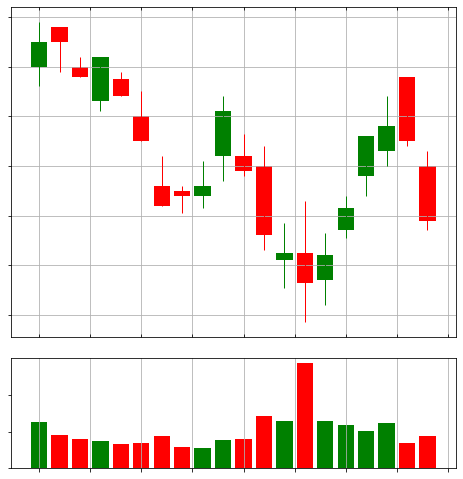

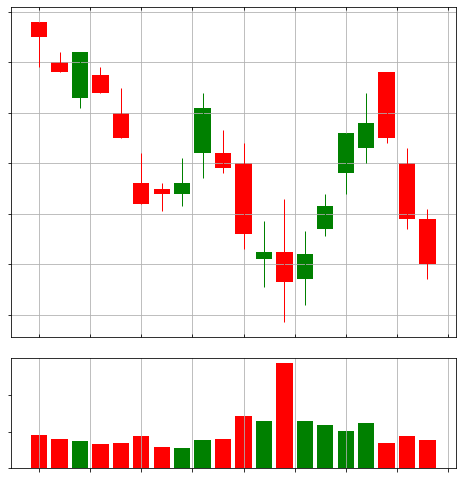

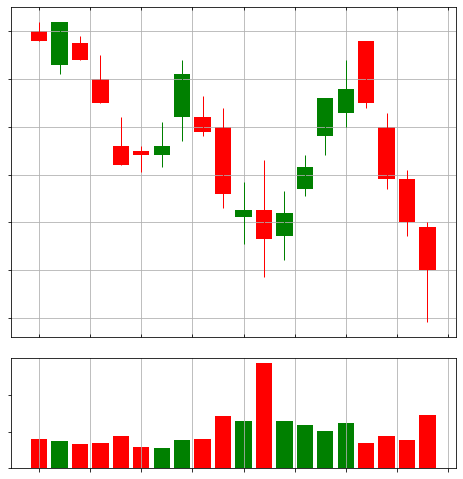

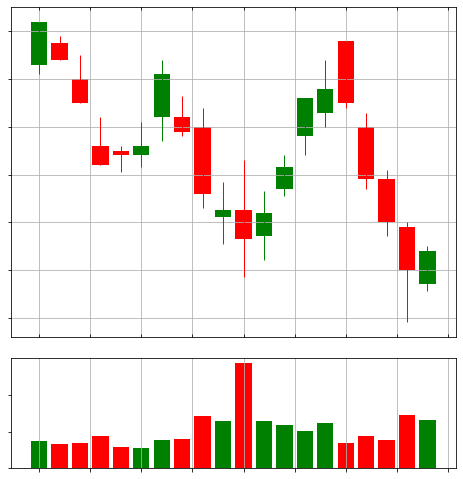

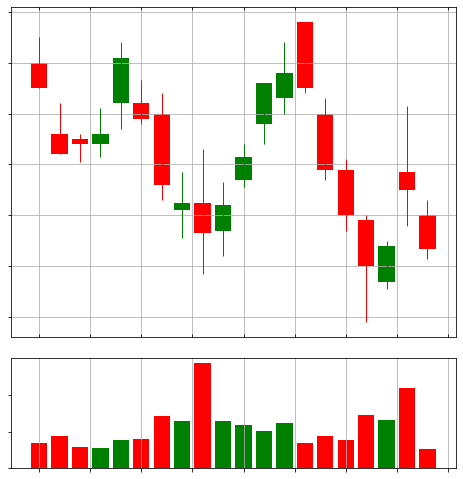

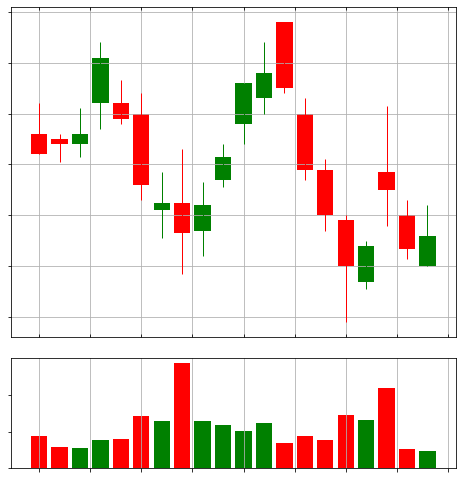

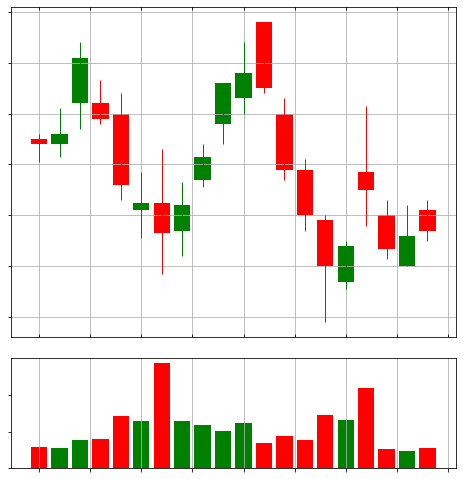

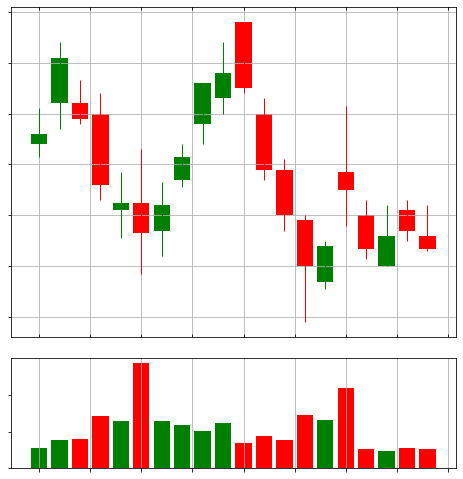

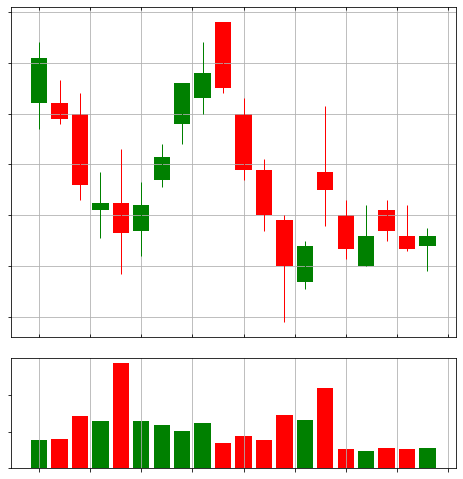

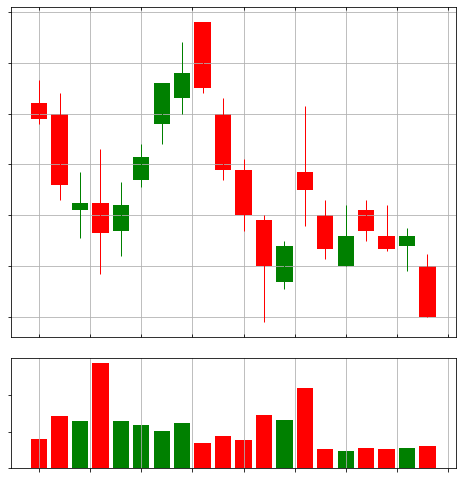

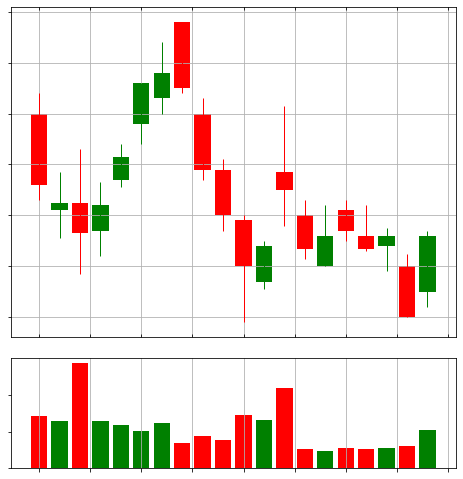

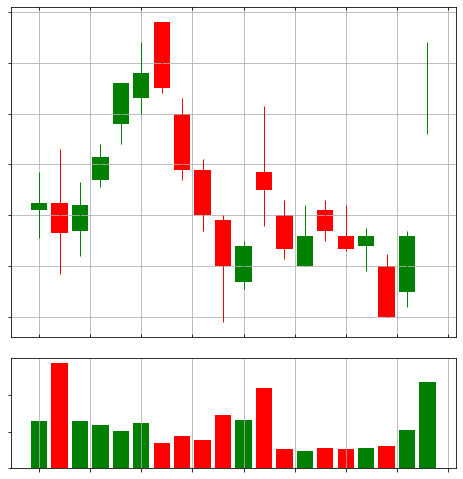

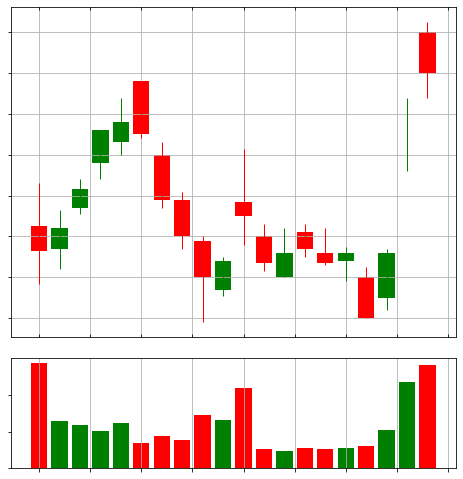

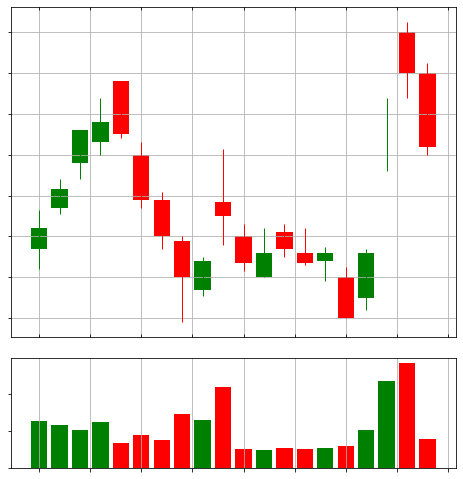

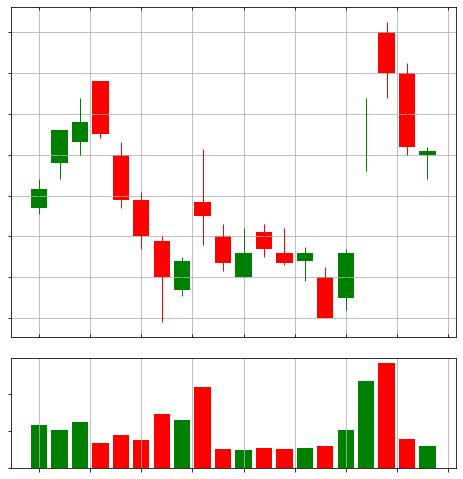

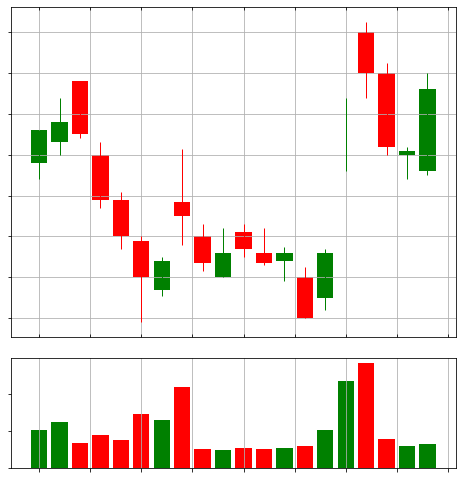

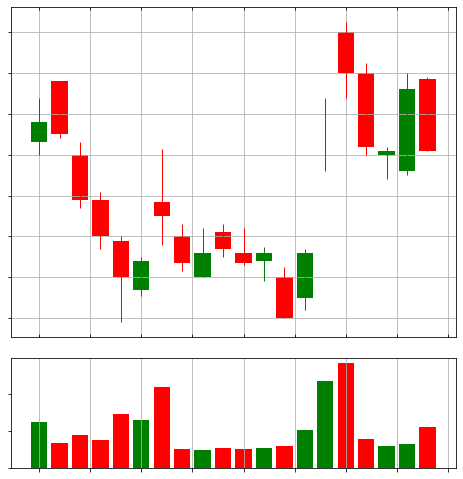

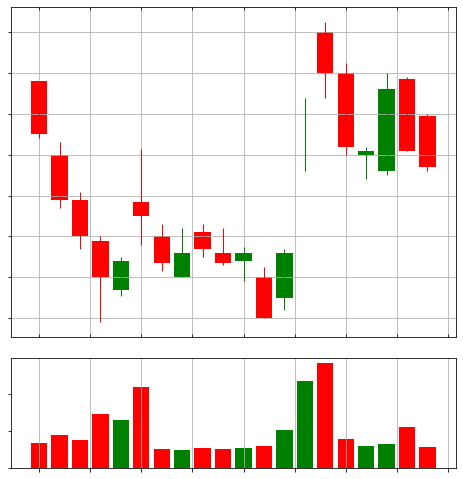

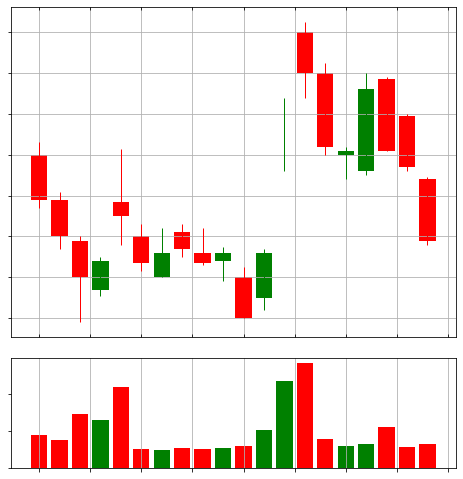

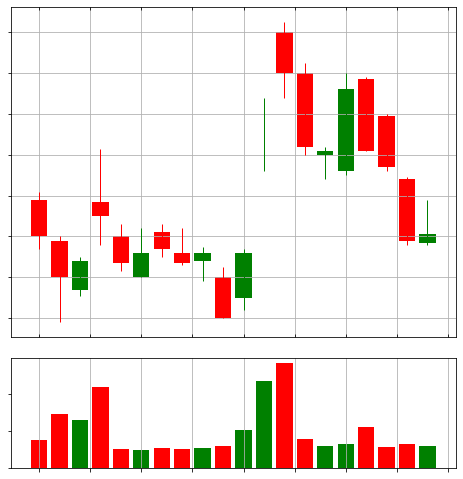

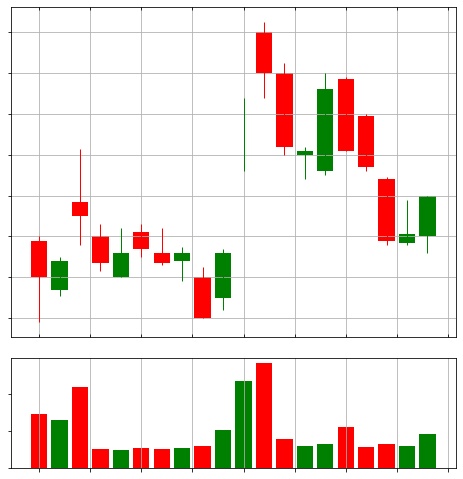

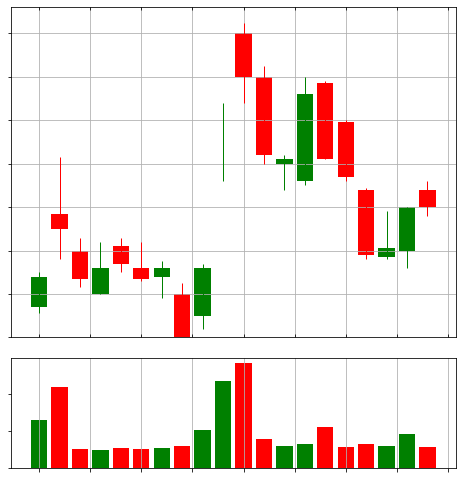

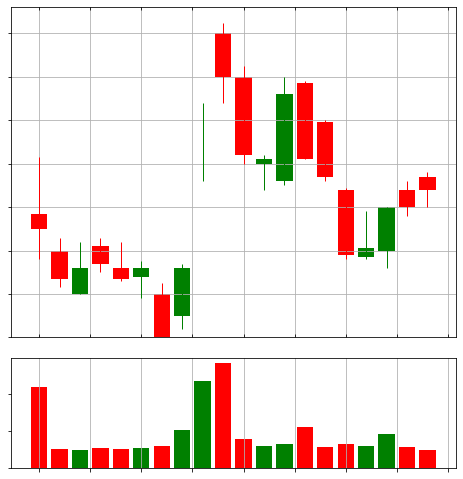

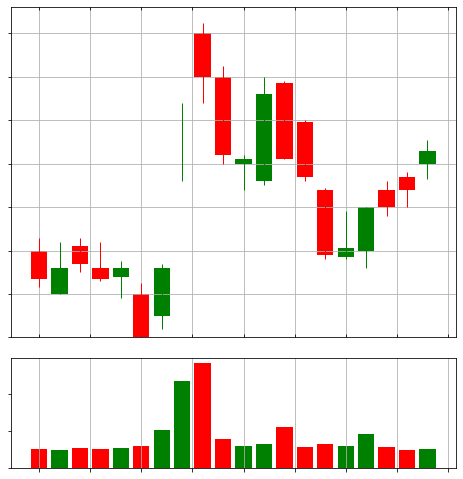

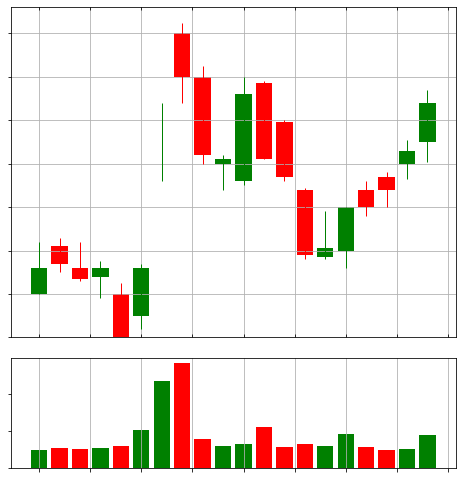

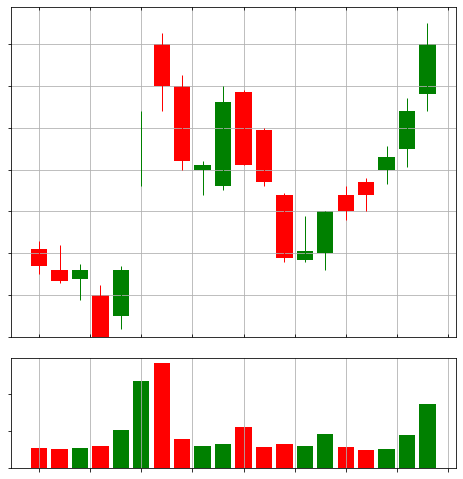

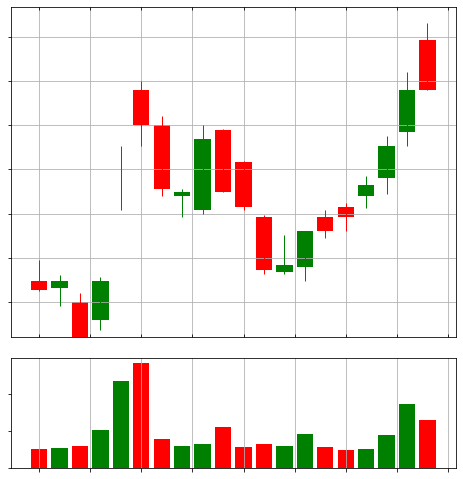

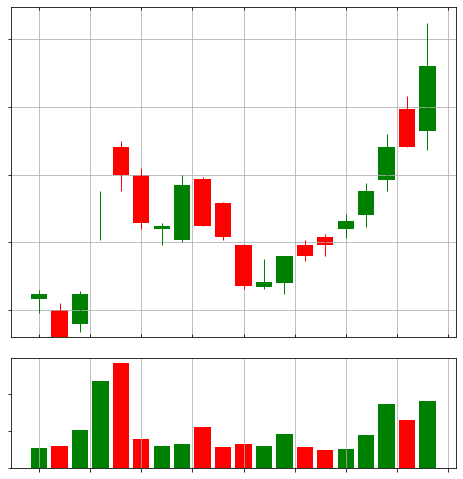

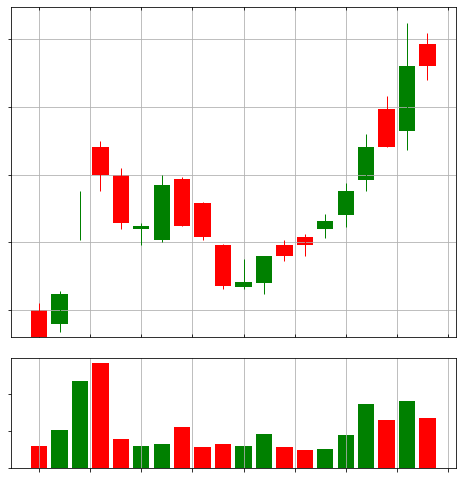

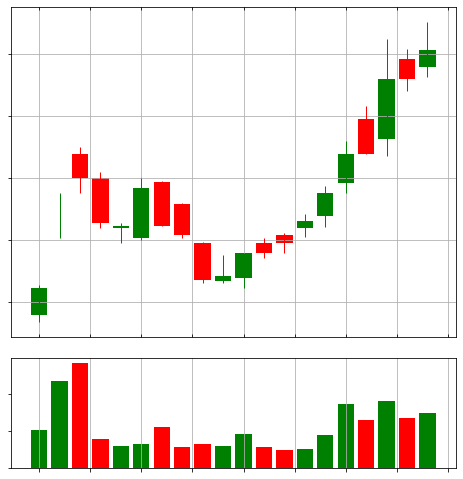

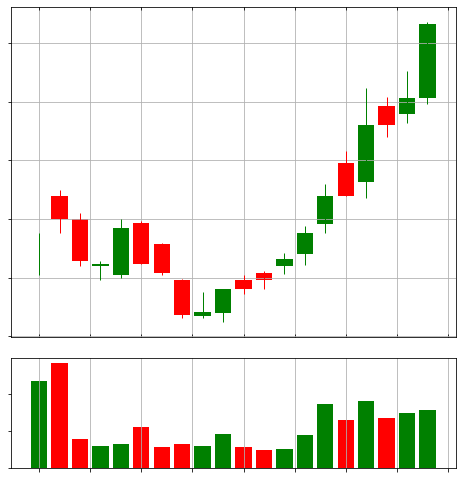

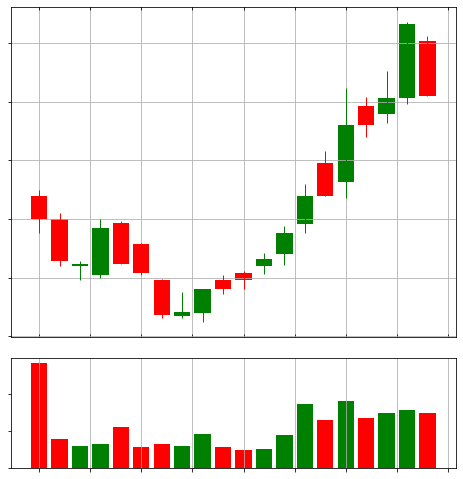

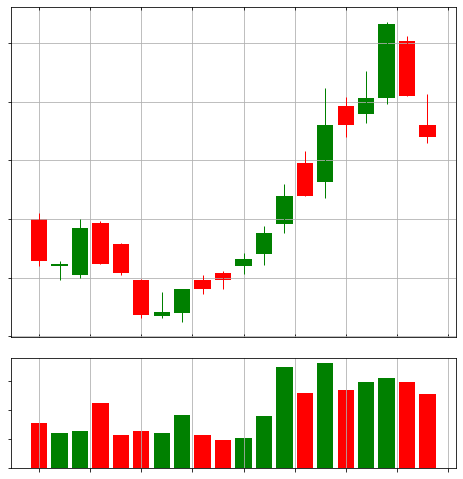

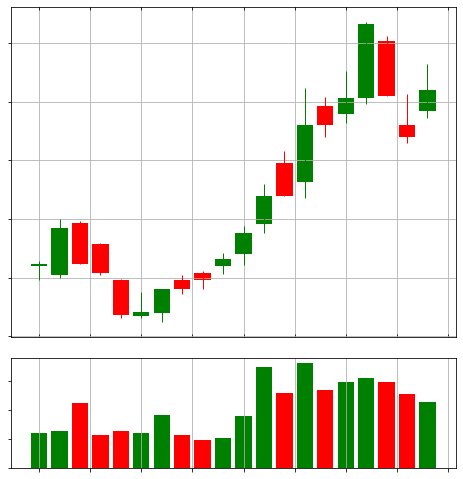

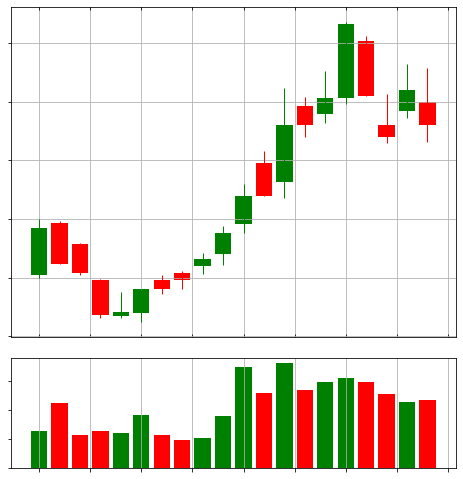

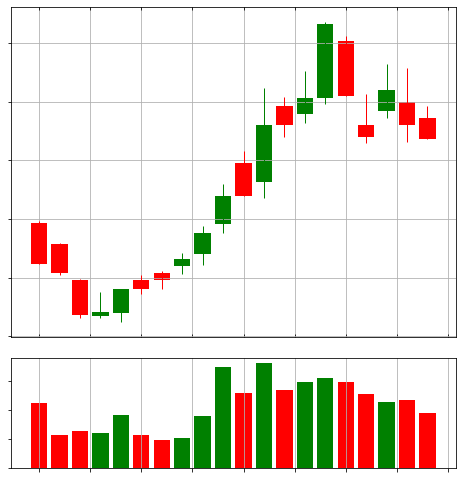

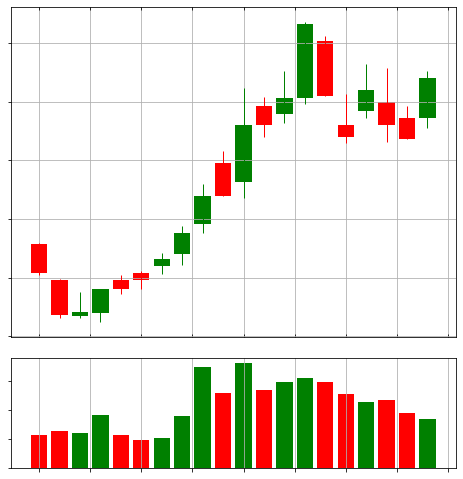

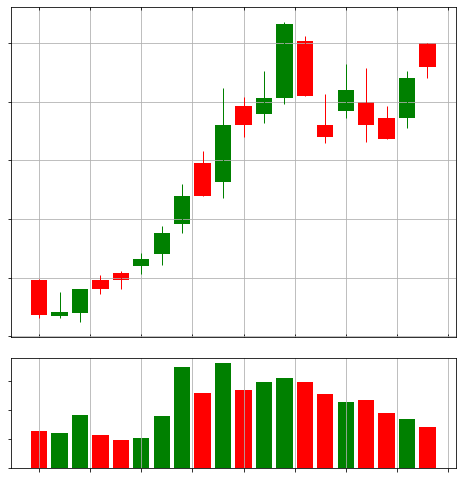

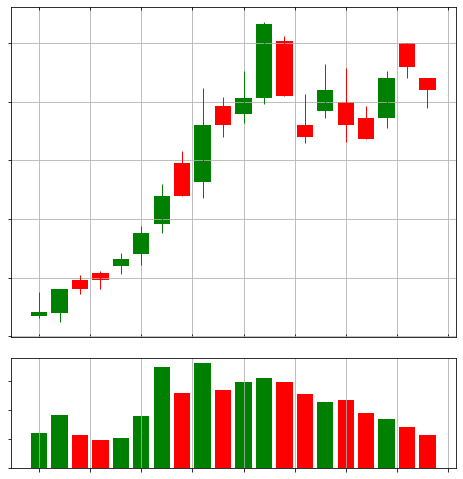

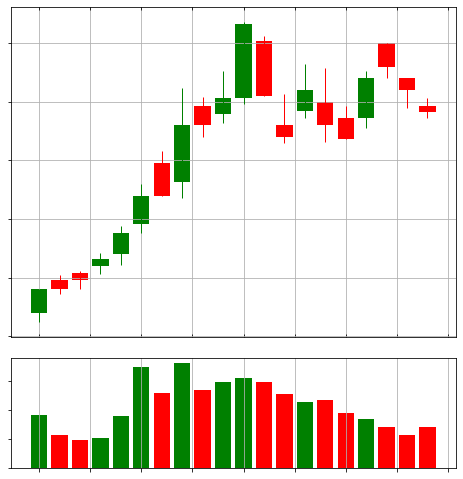

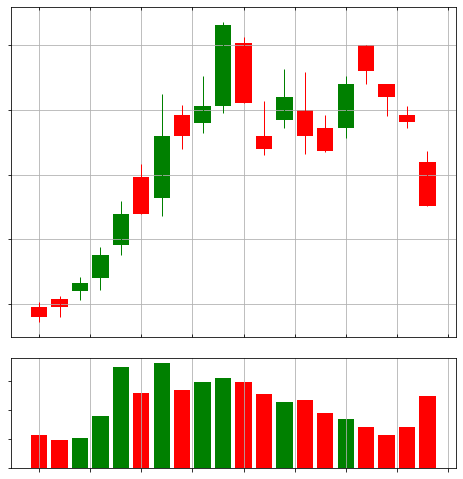

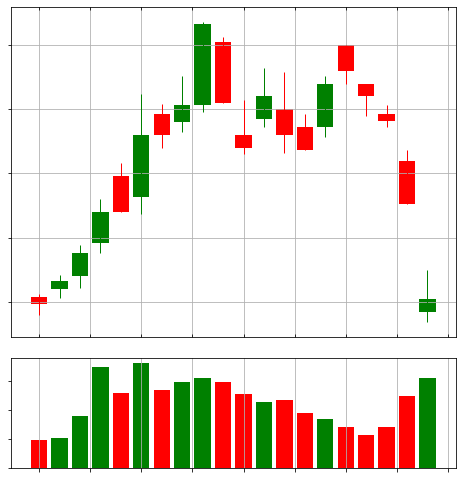

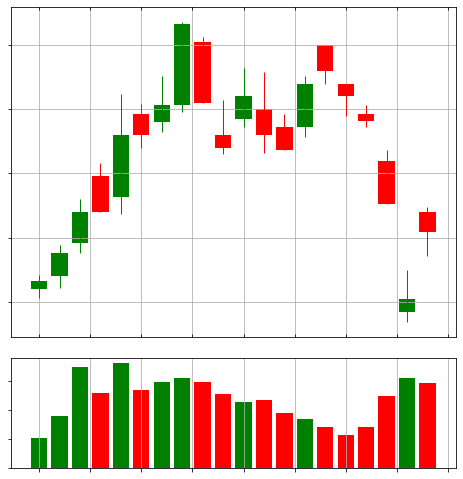

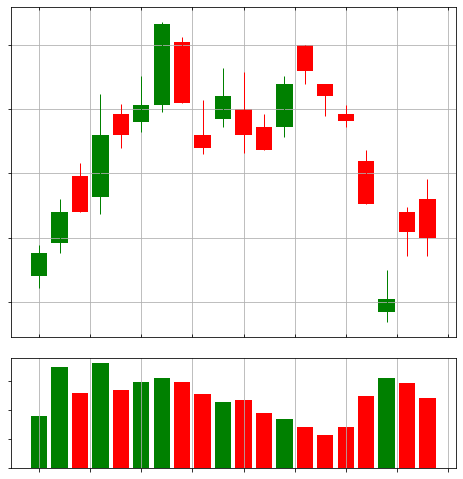

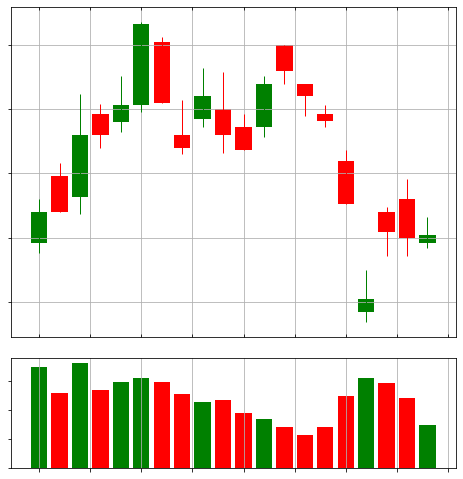

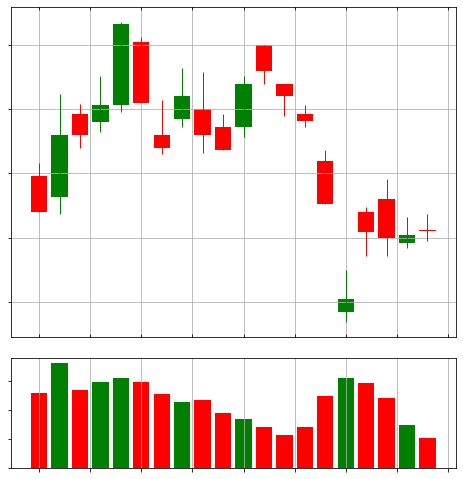

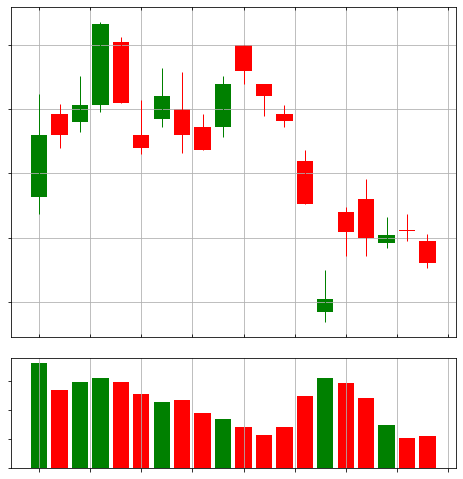

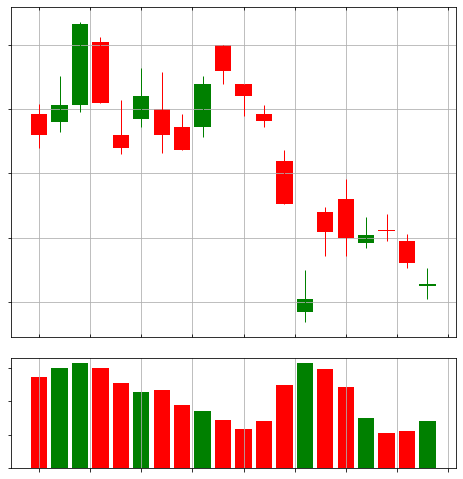

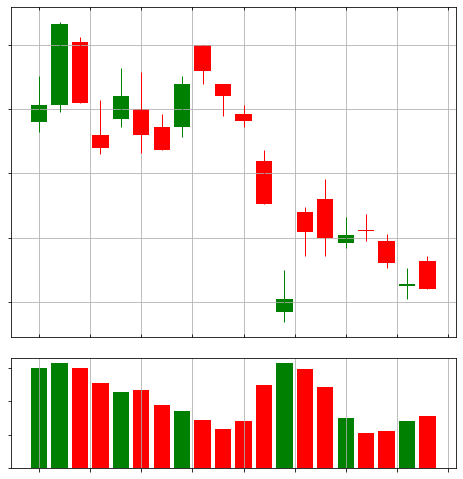

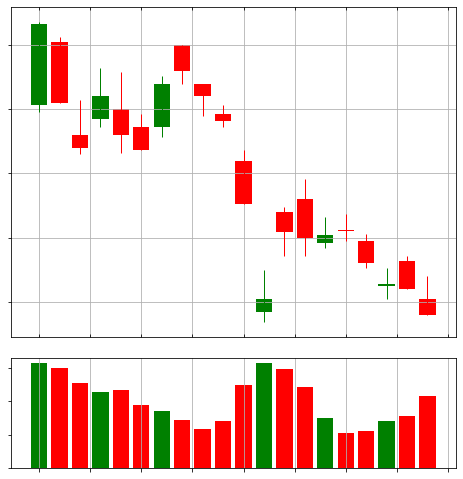

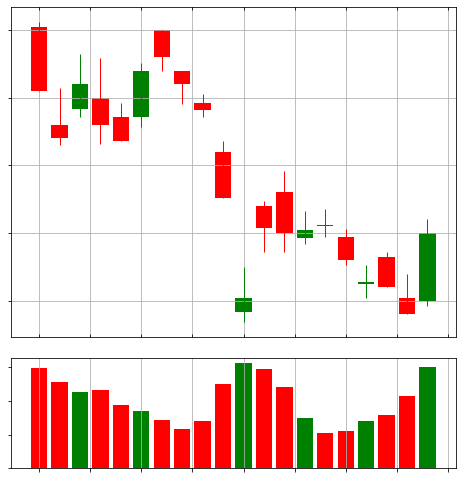

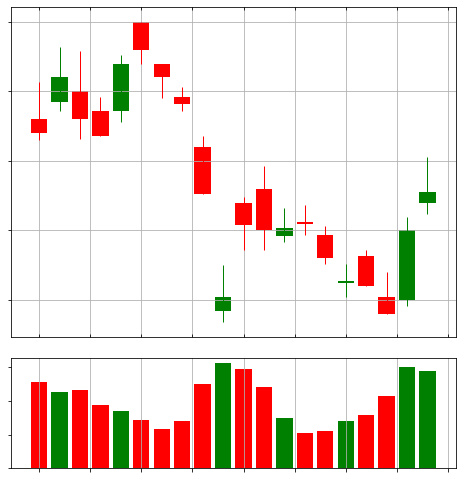

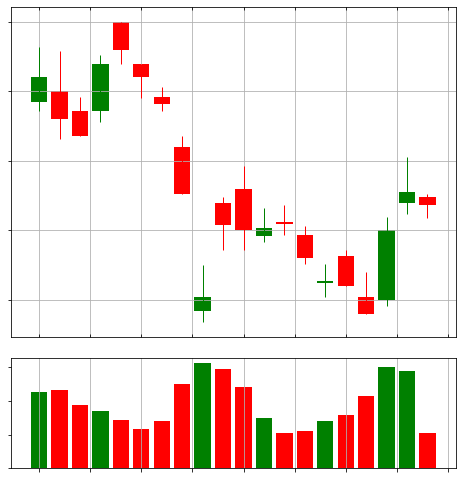

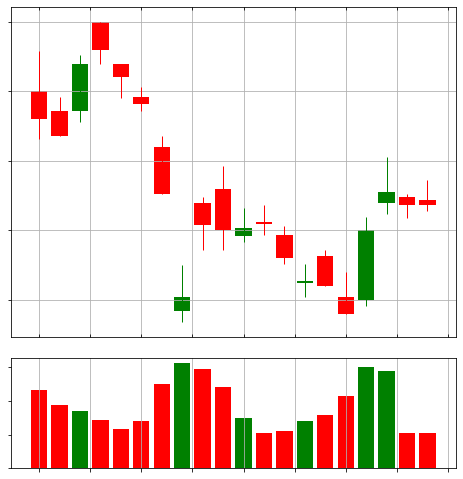

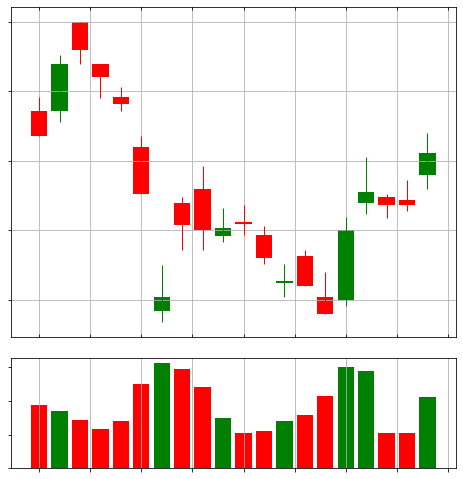

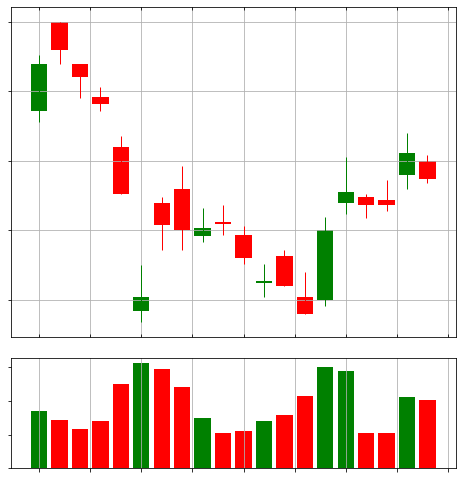

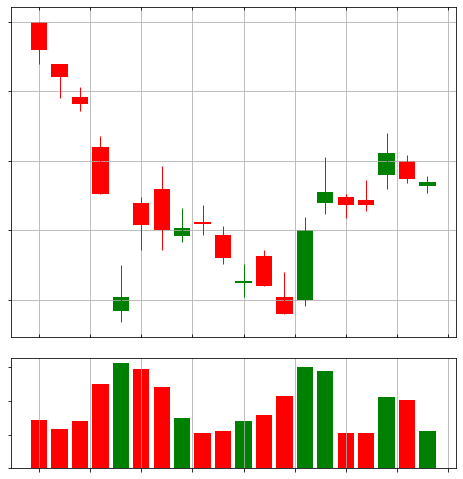

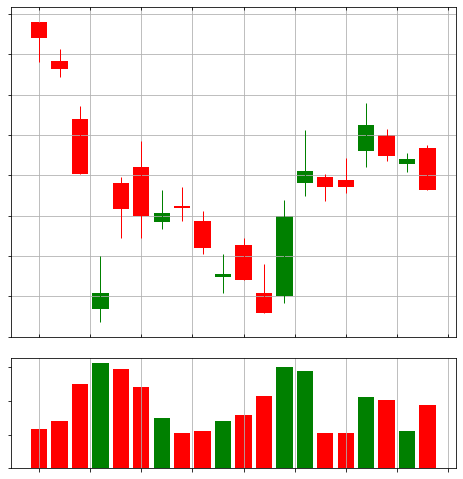

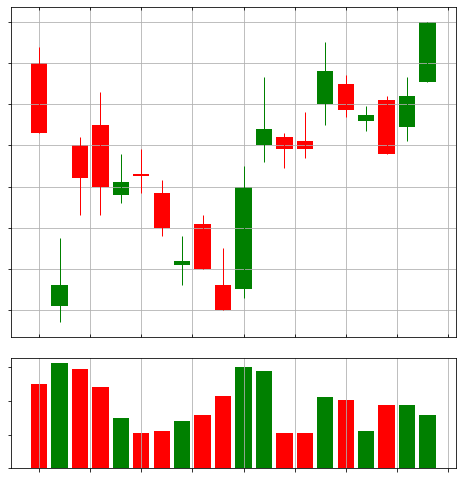

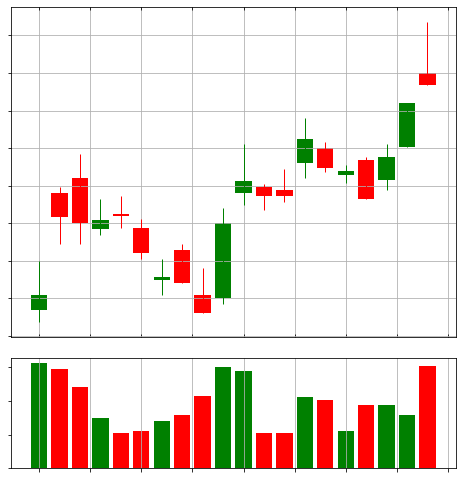

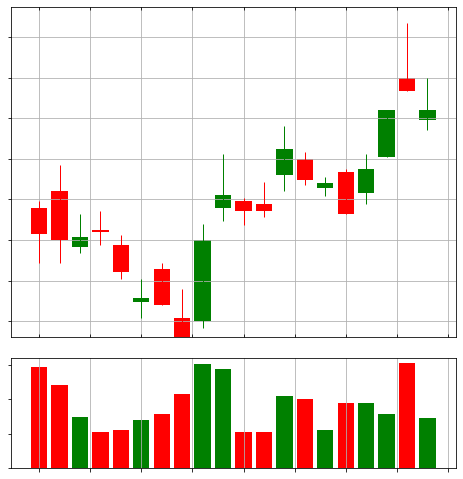

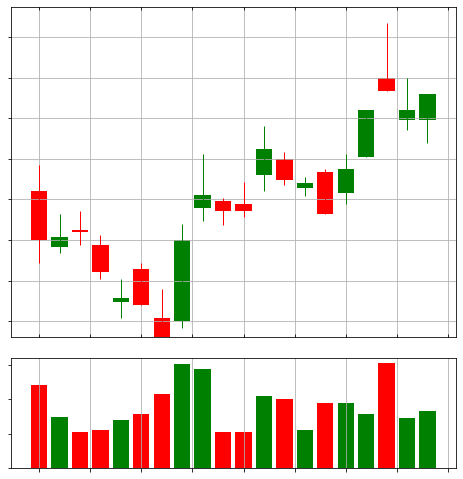

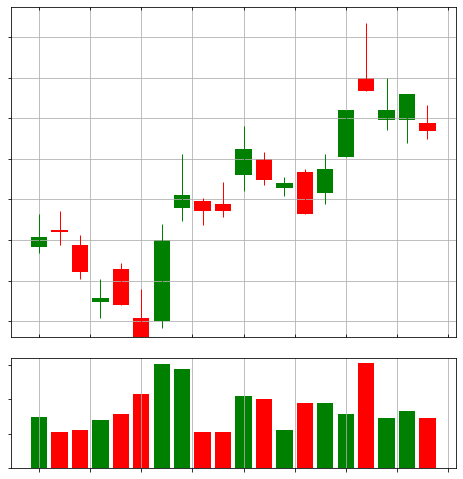

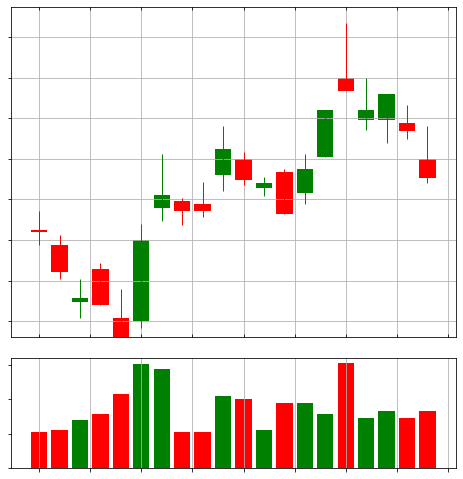

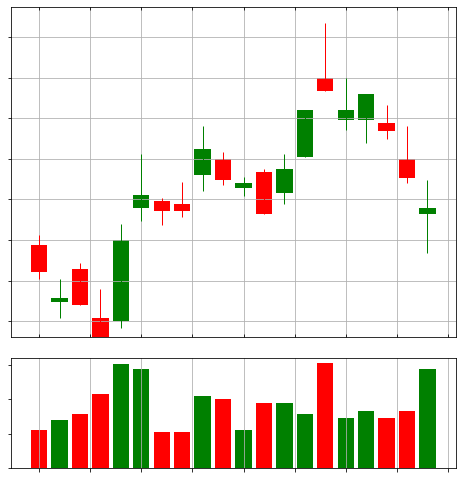

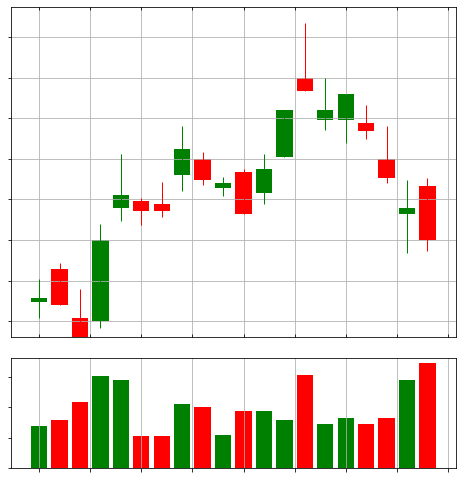

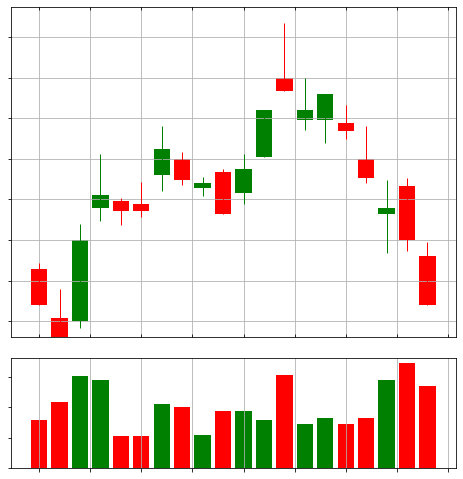

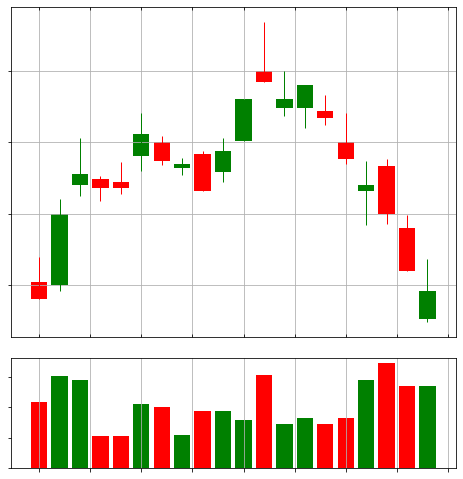

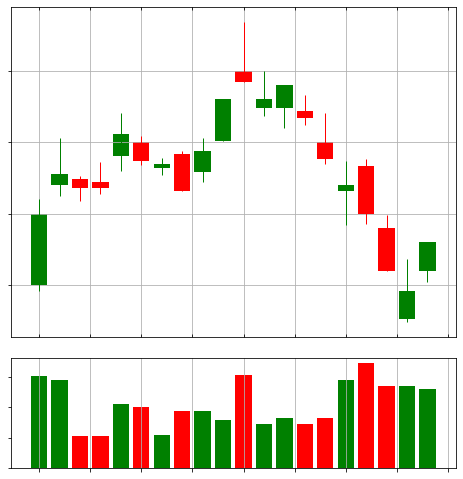

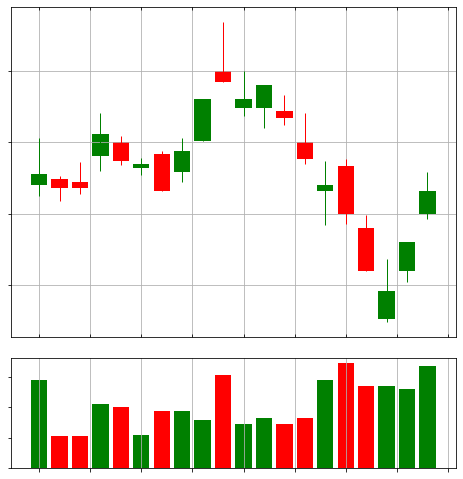

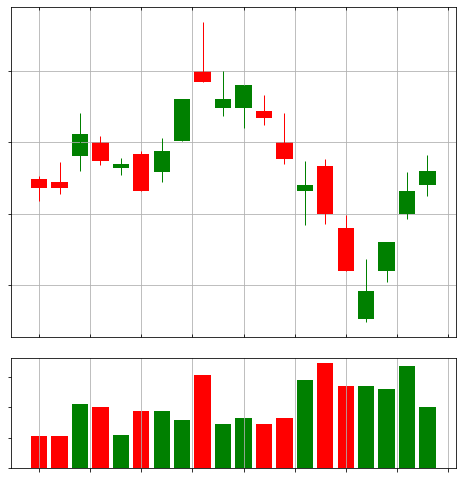

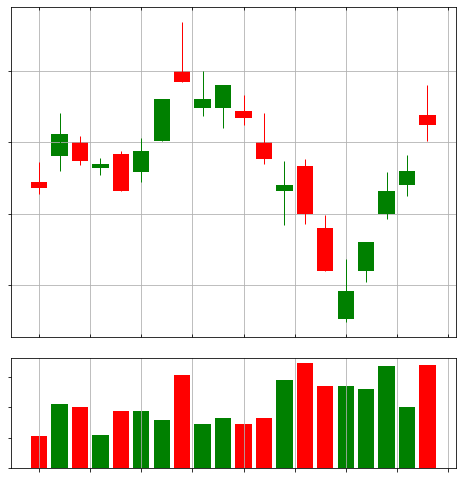

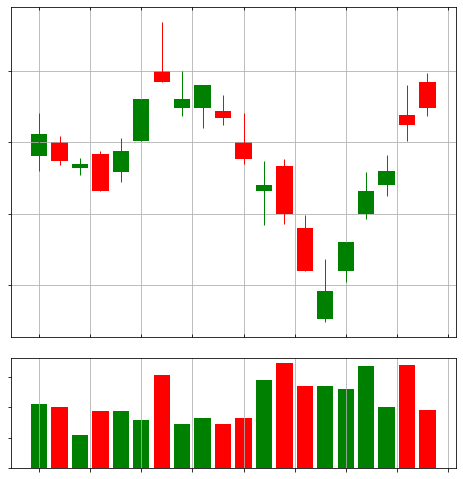

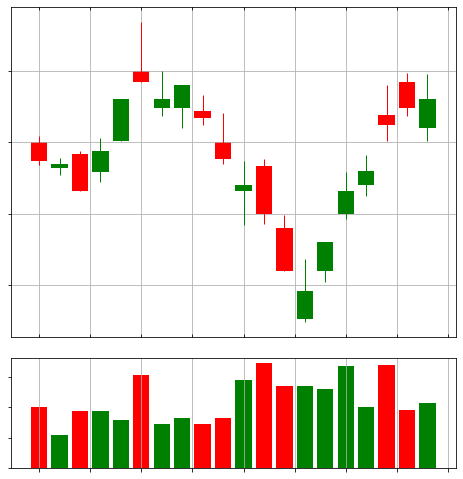

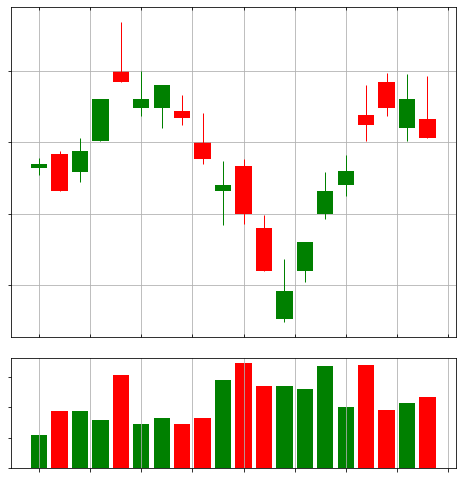

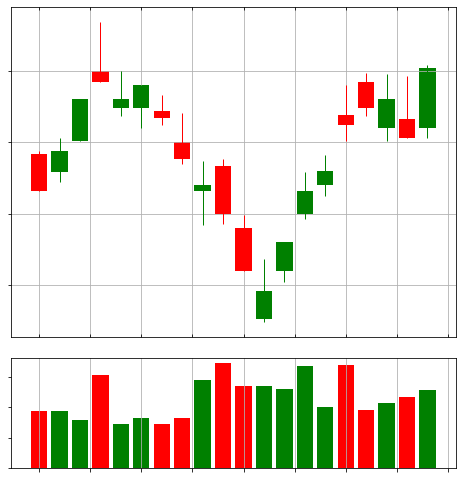

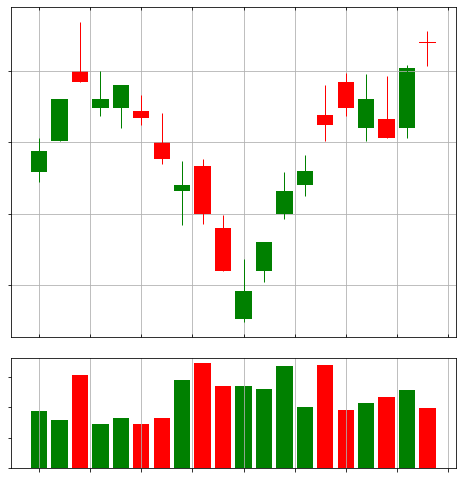

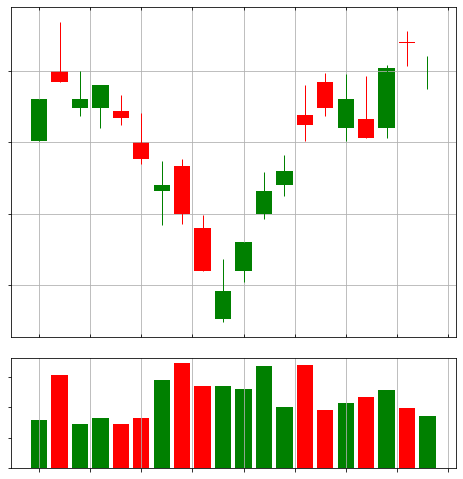

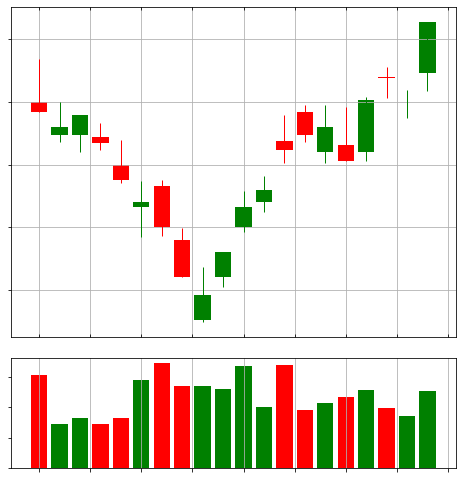

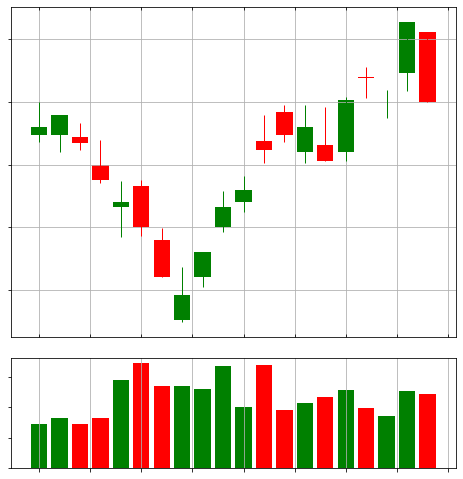

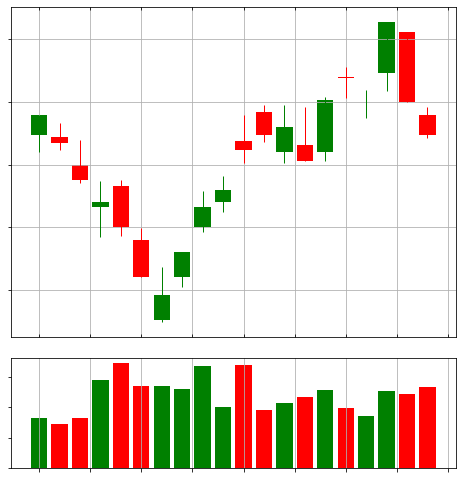

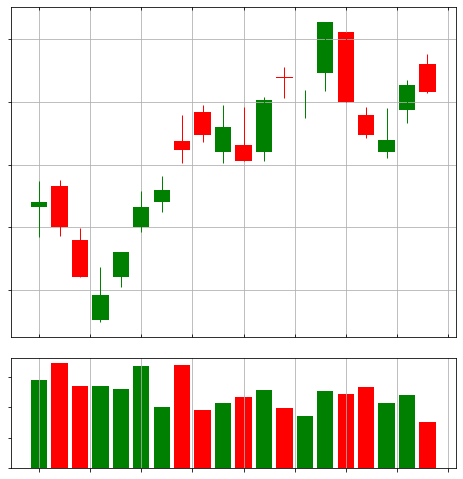

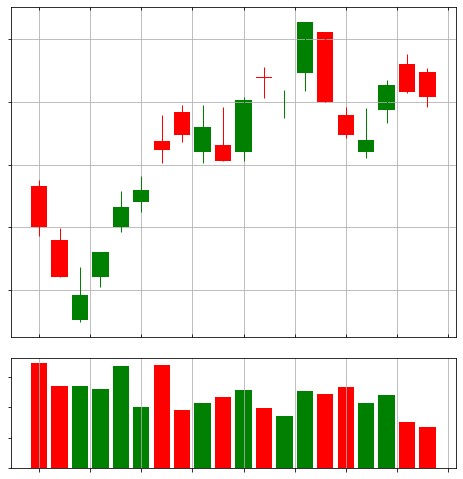

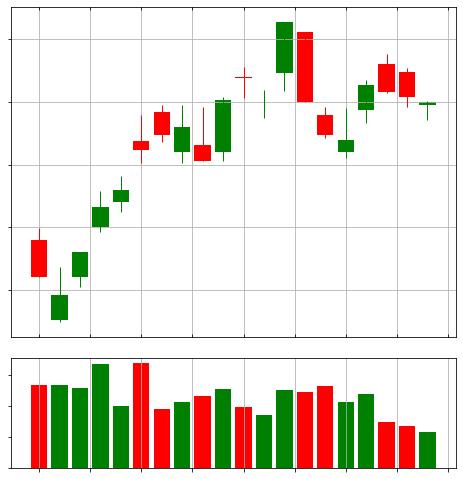

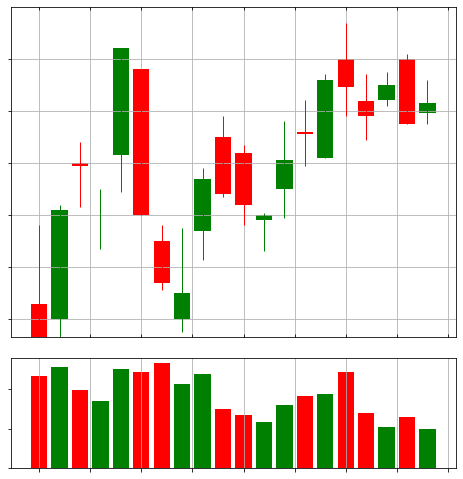

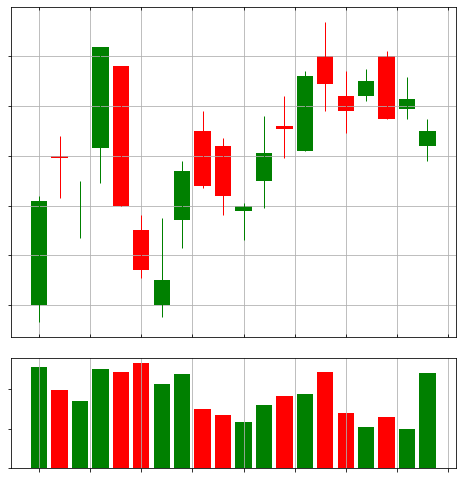

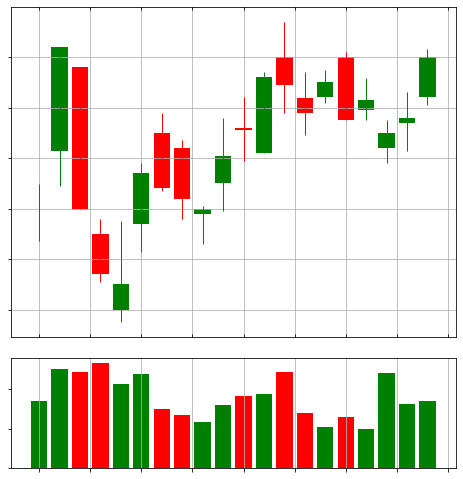

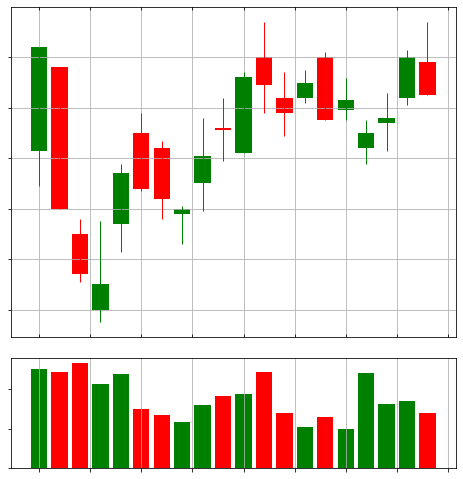

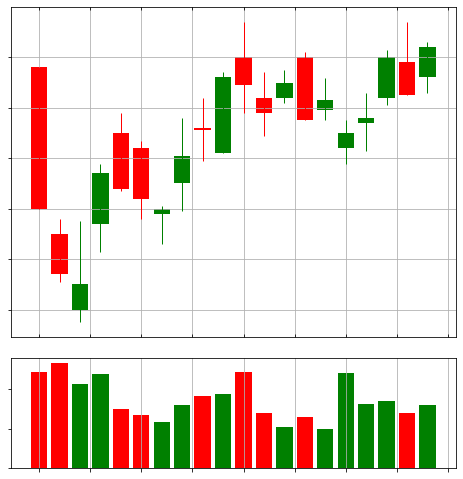

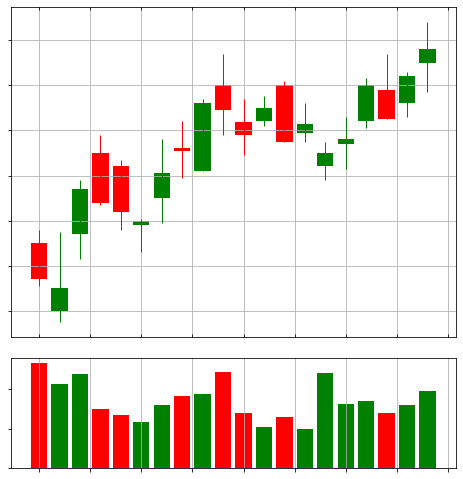

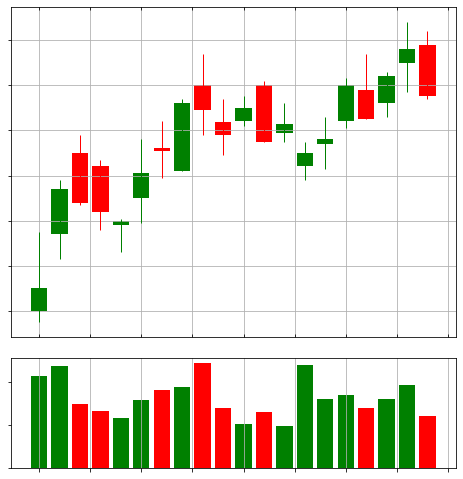

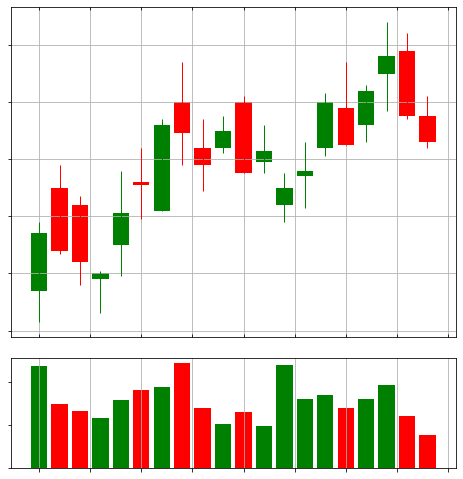

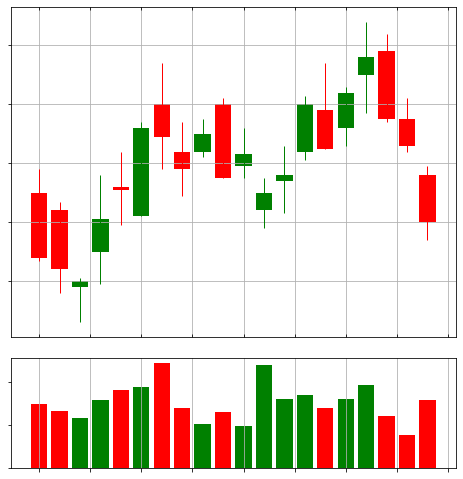

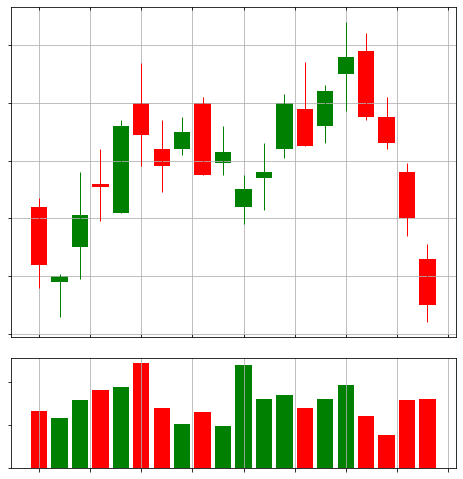

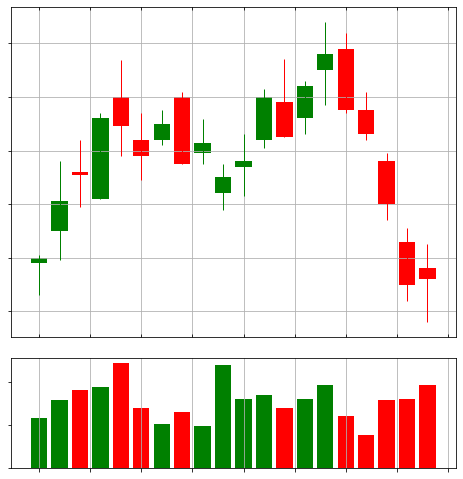

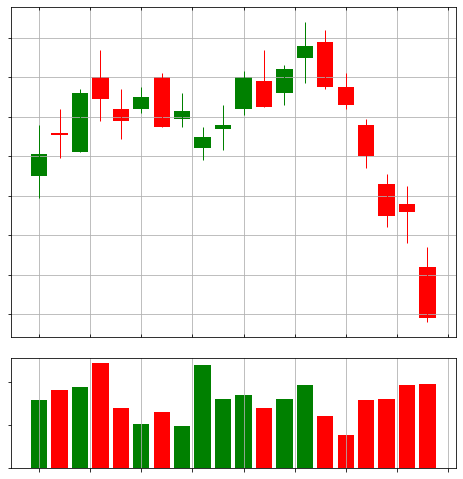

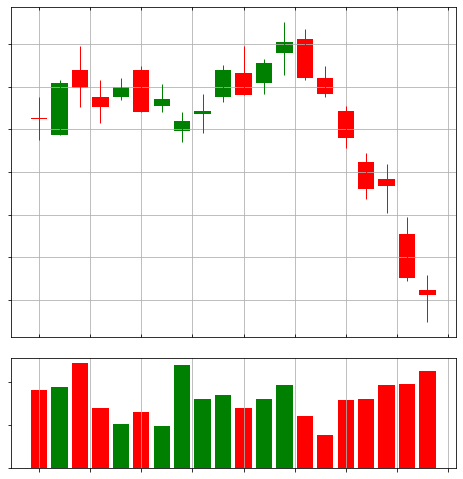

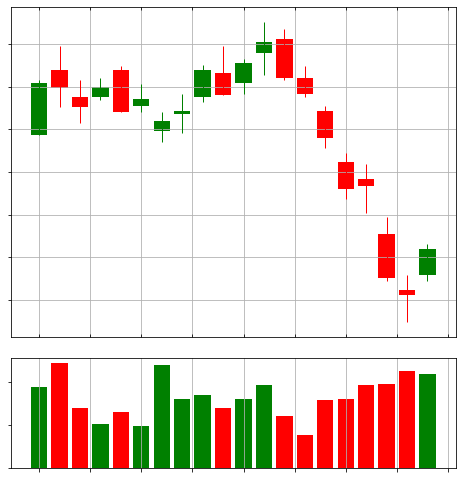

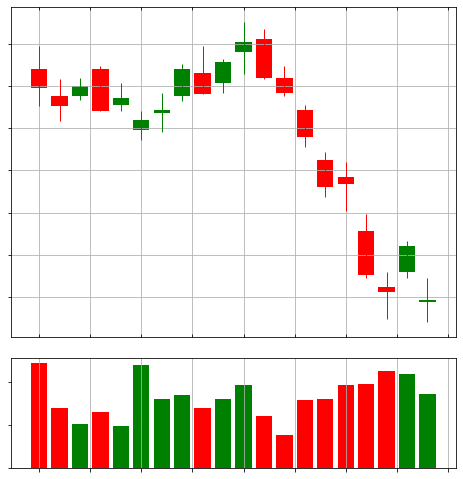

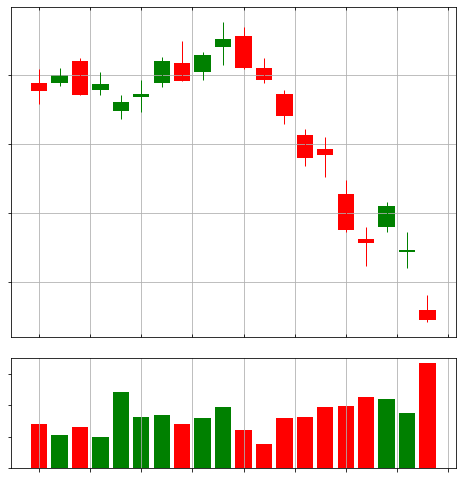

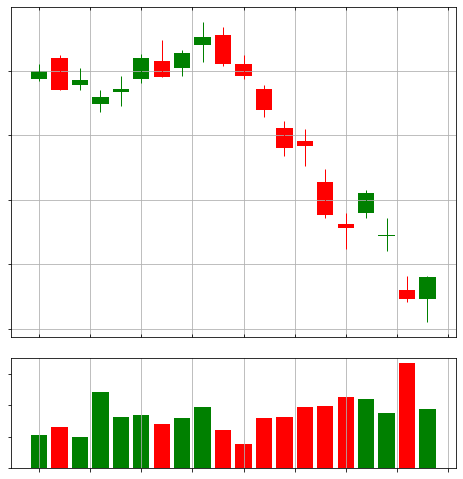

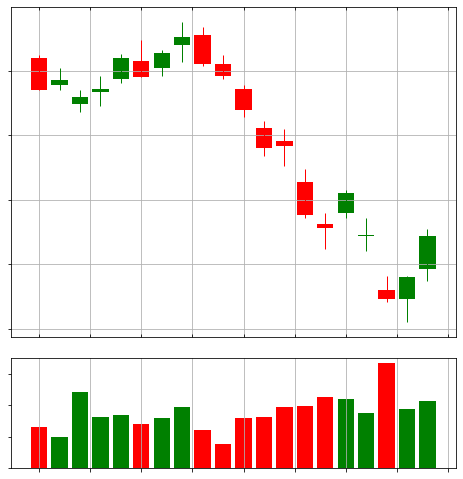

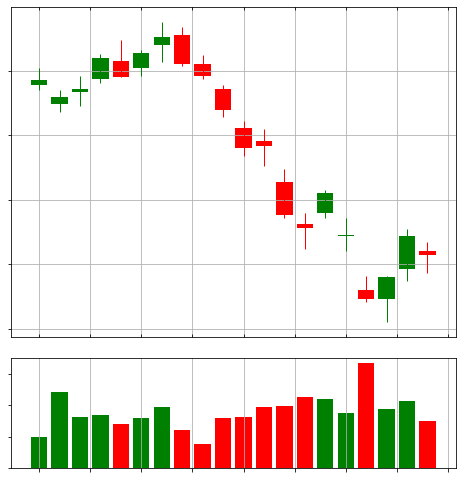

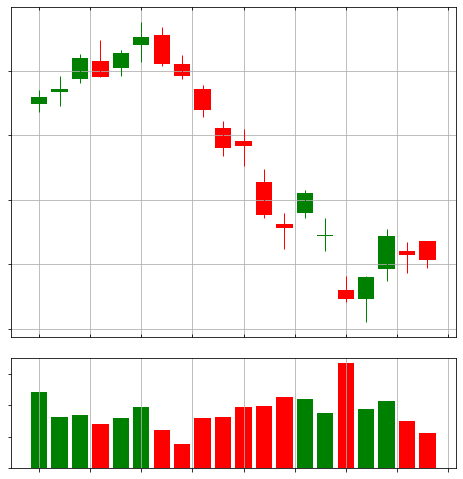

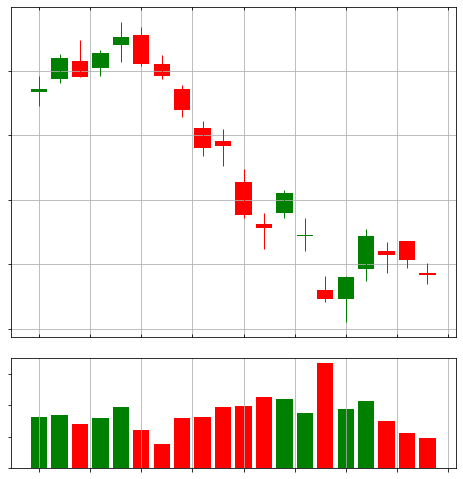

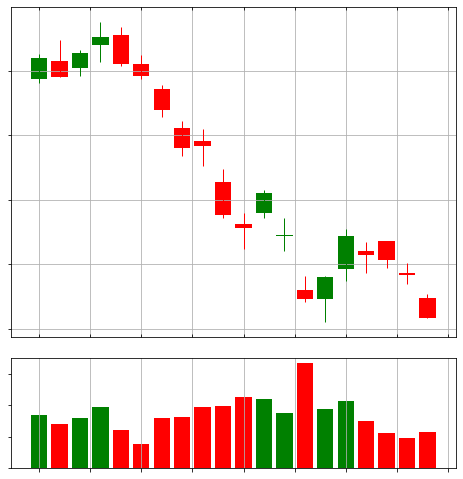

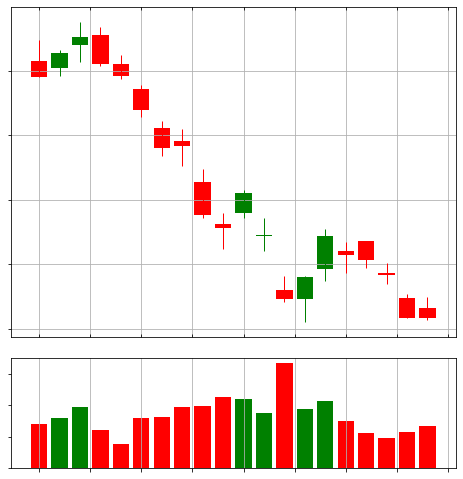

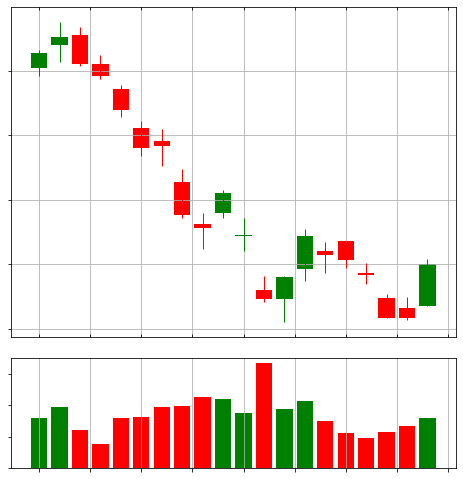

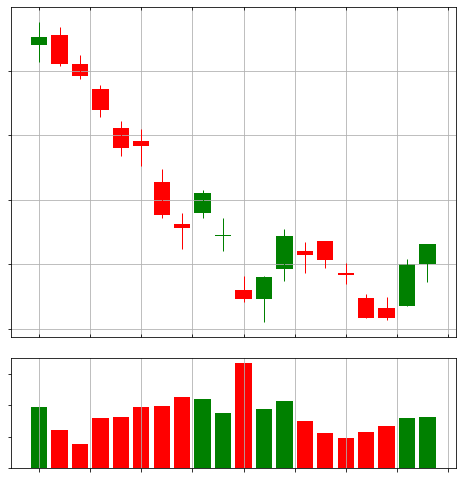

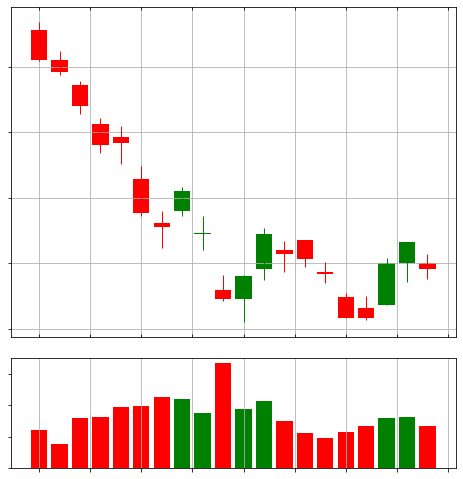

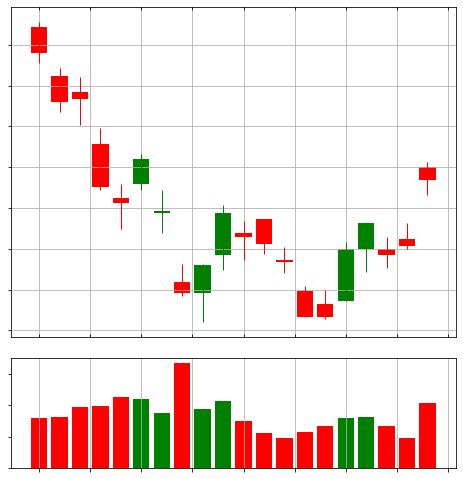

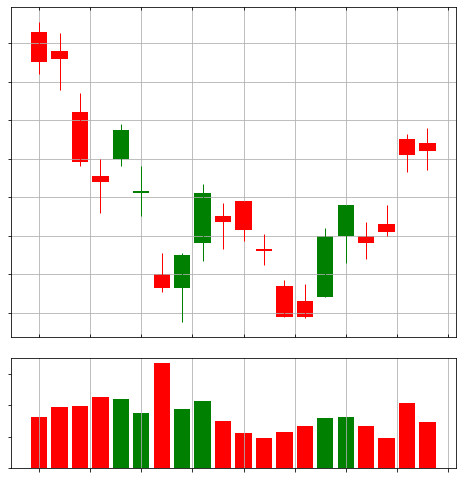

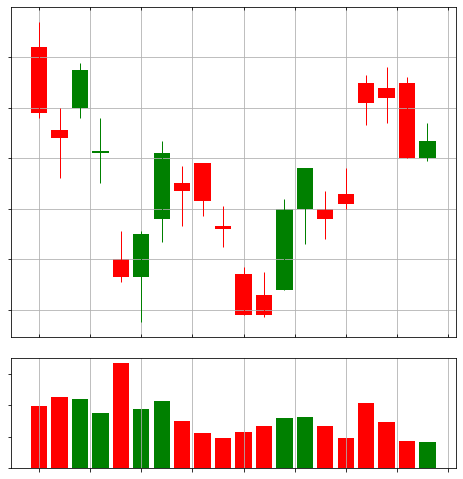

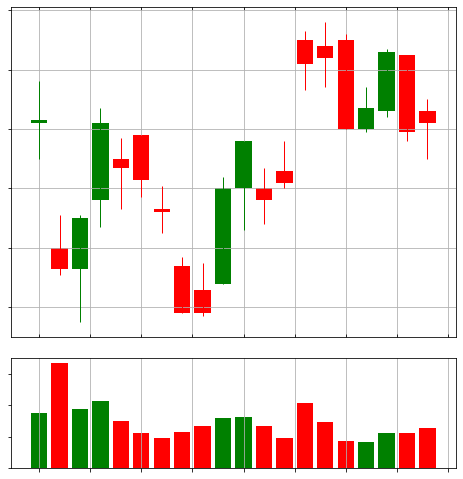

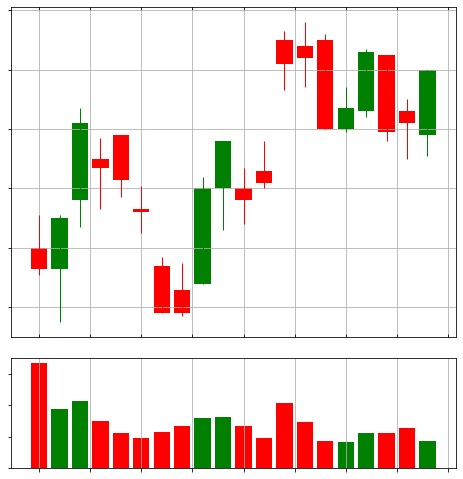

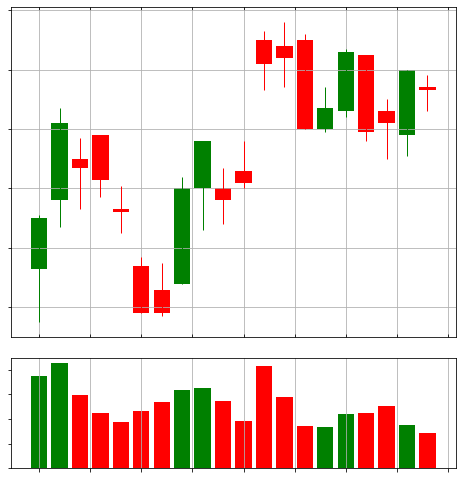

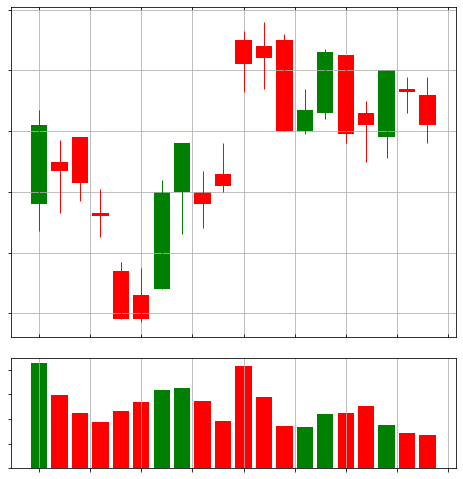

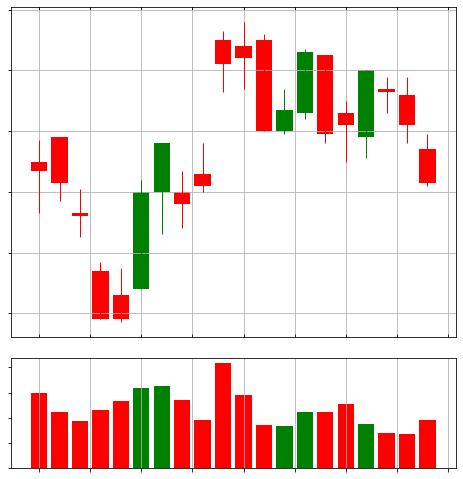

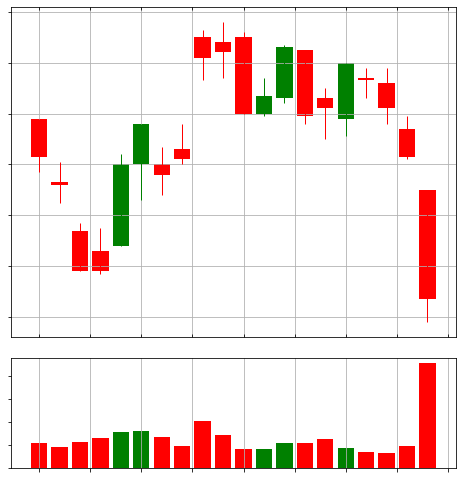

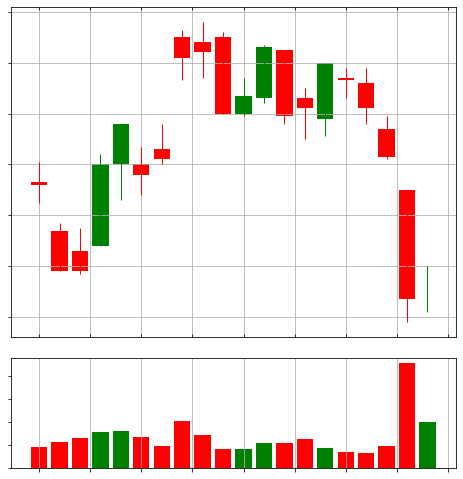

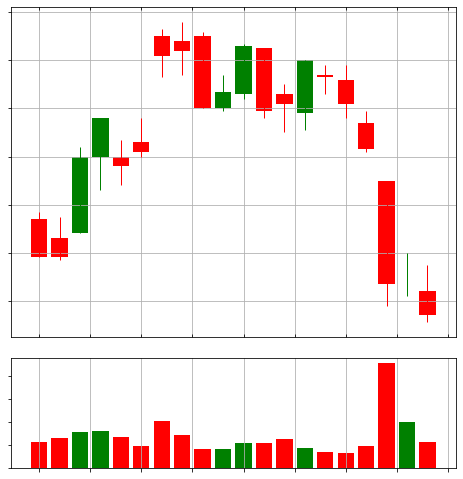

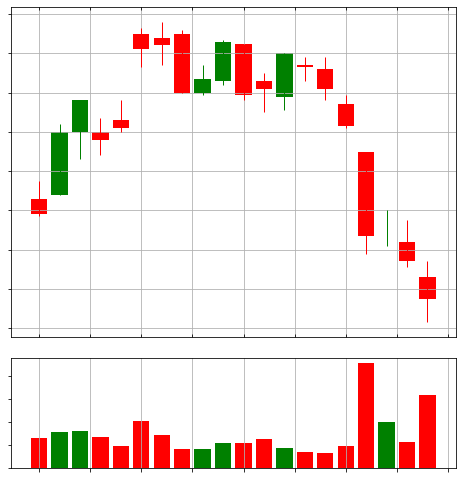

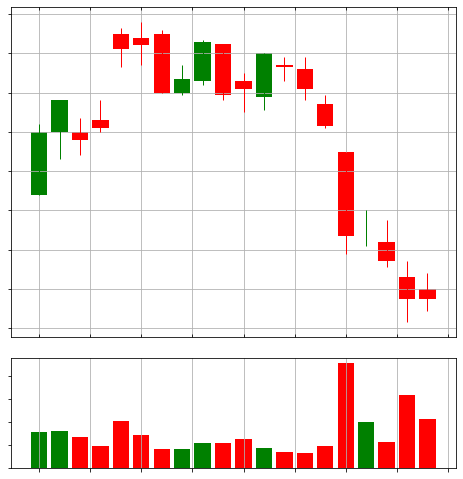

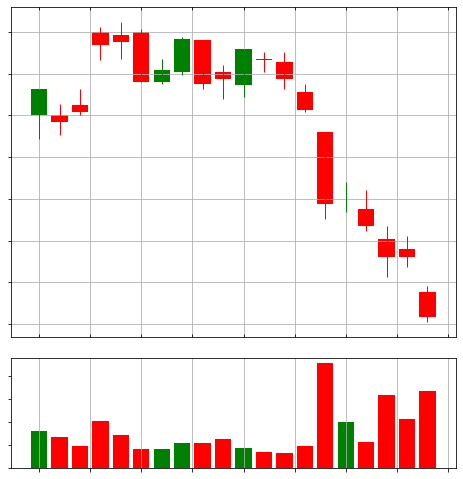

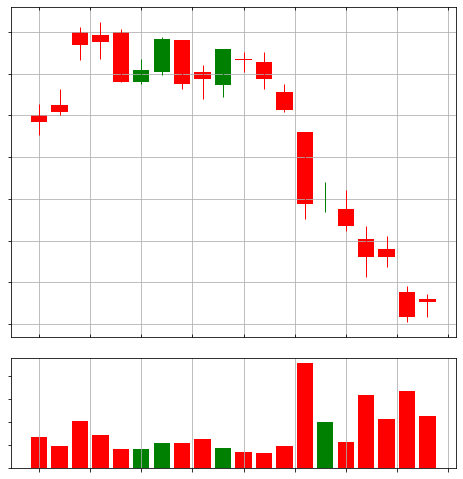

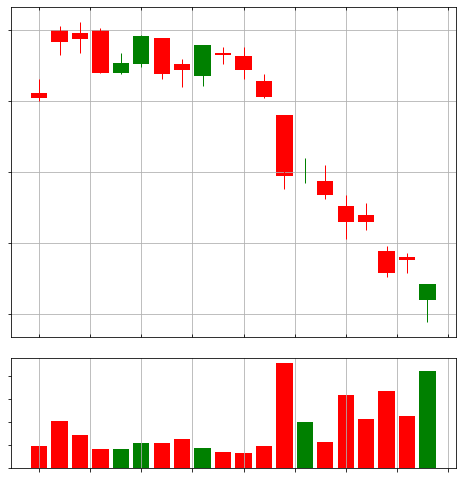

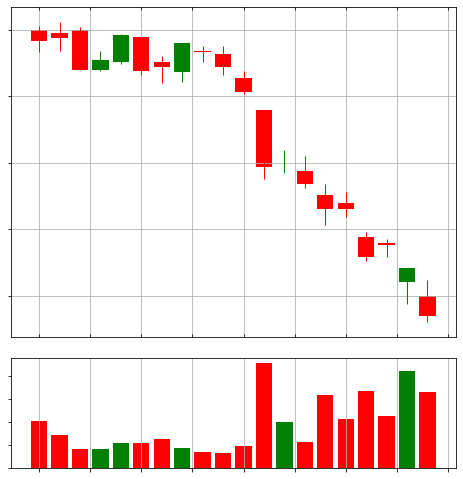

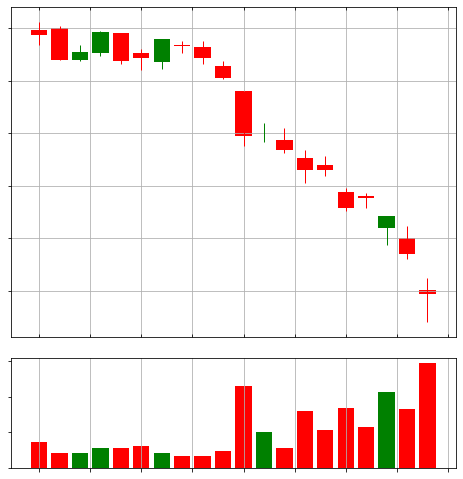

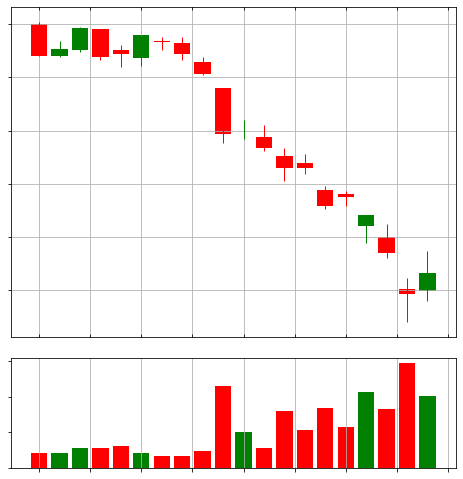

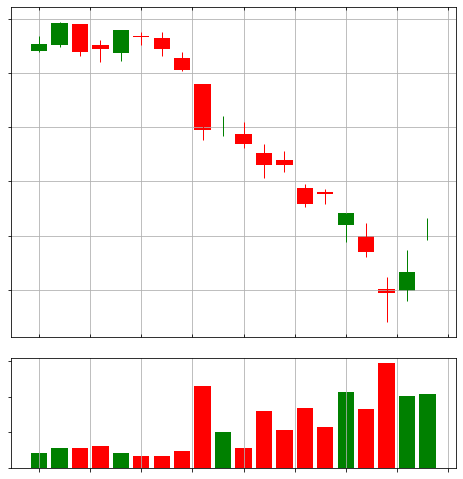

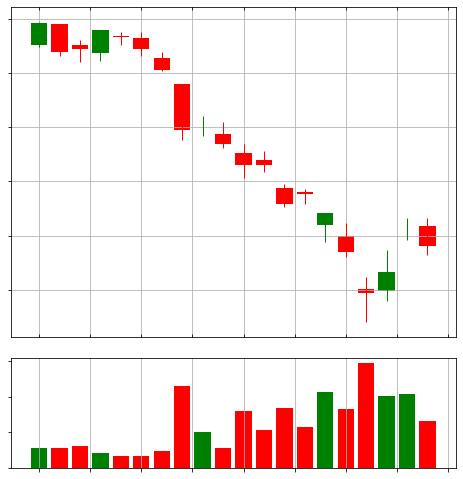

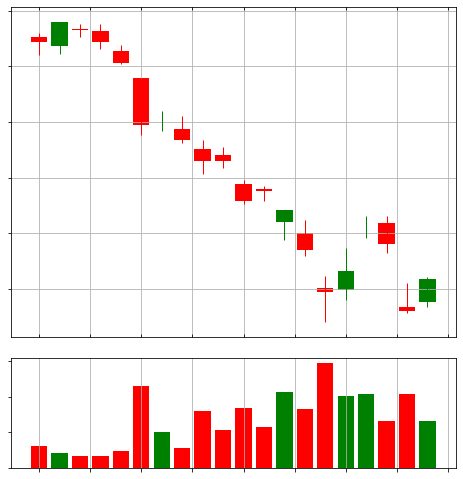

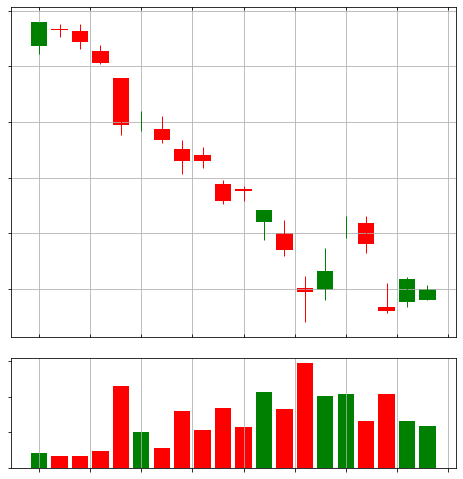

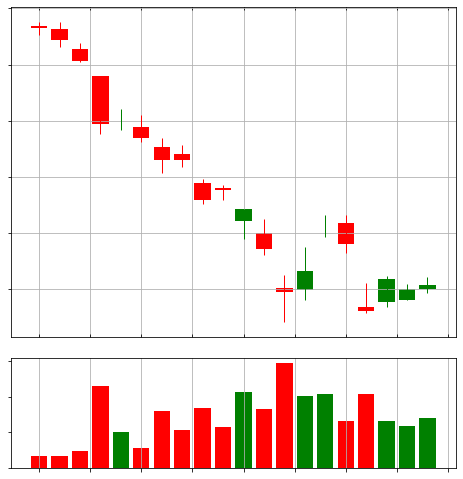

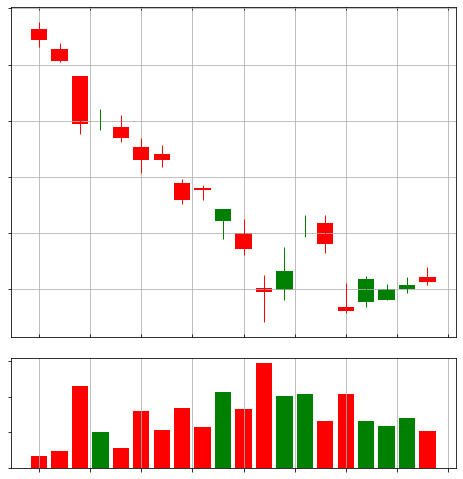

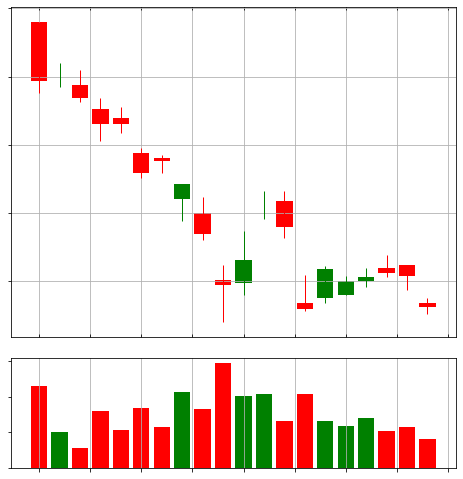

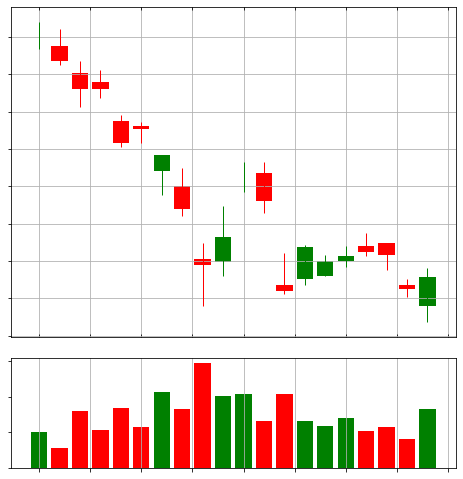

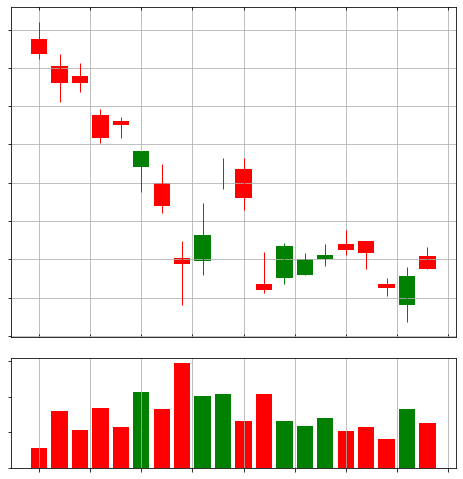

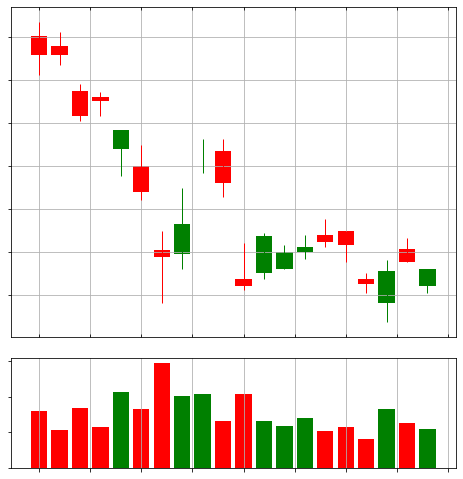

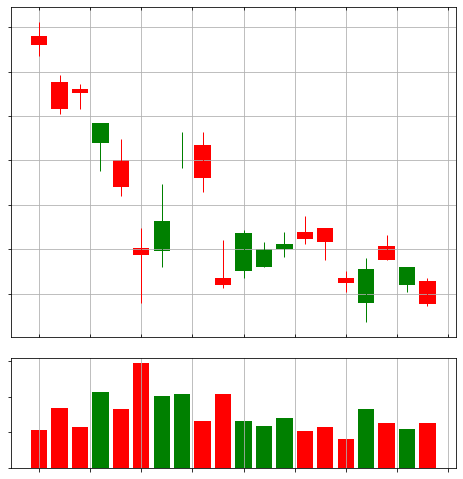

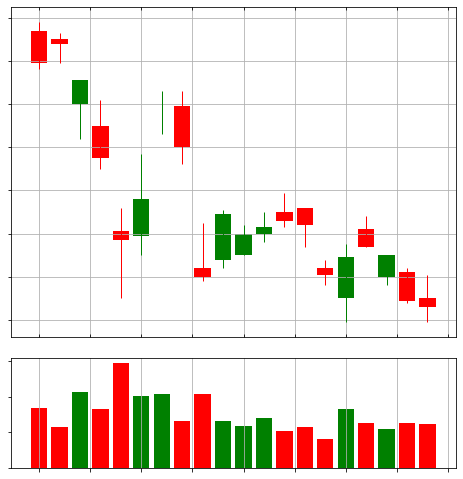

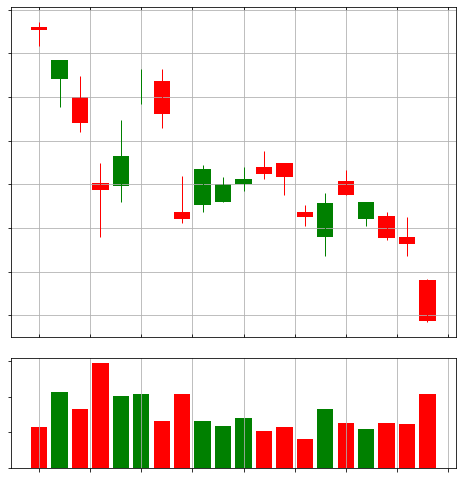

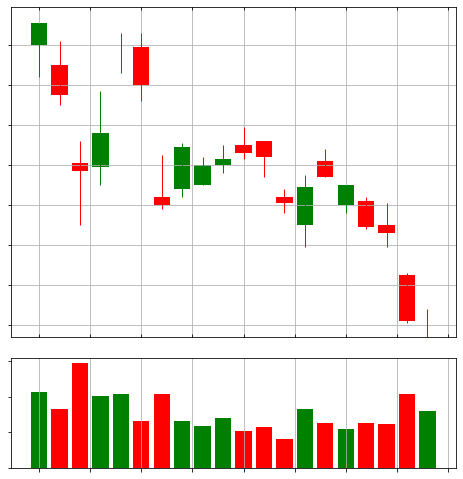

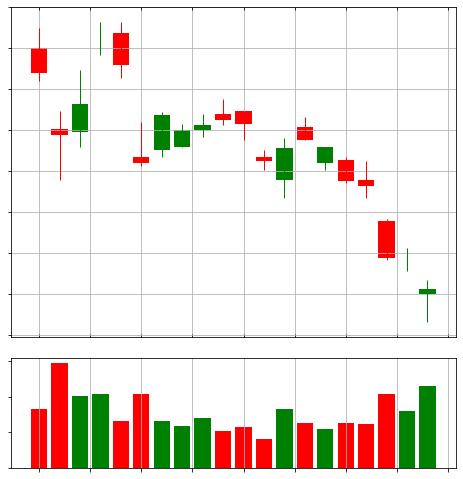

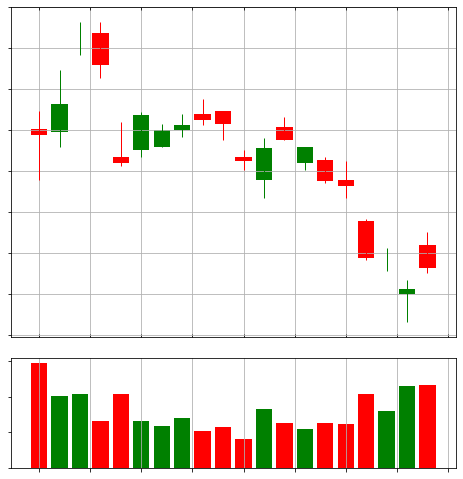

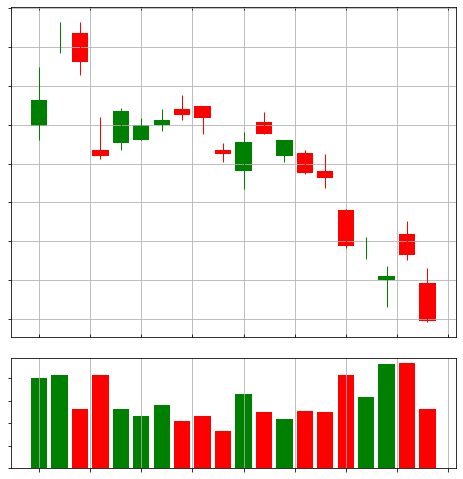

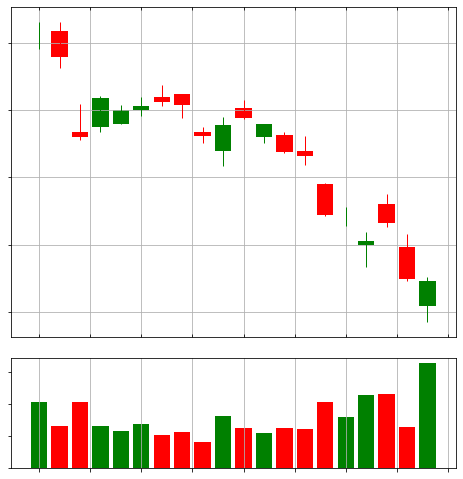

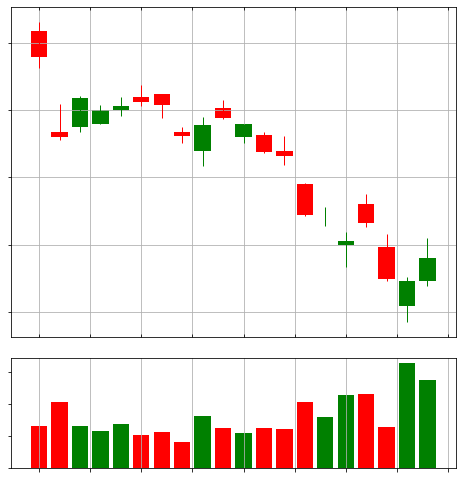

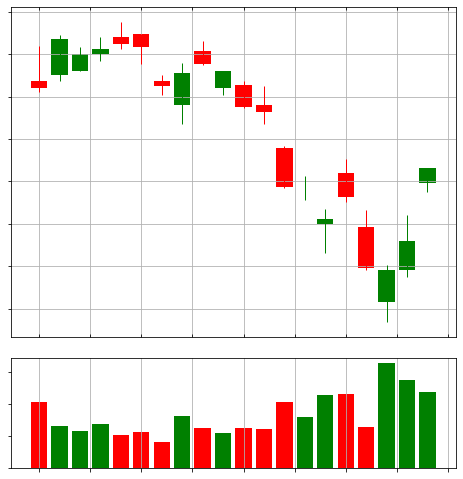

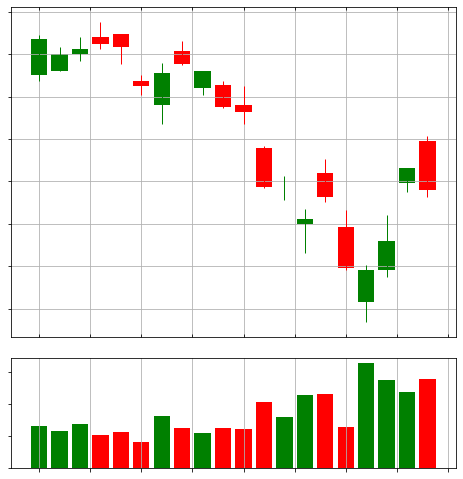

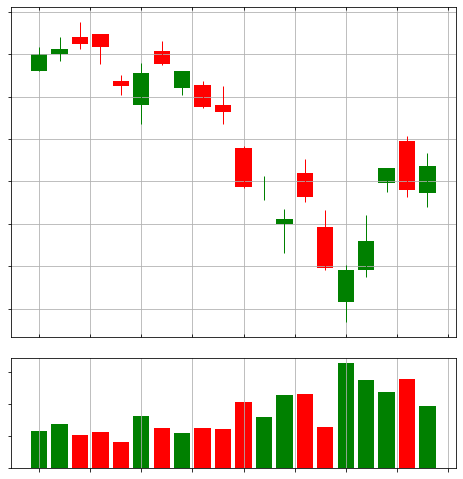

Error in callback <function flush_figures at 0x7f078fa923b0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
equities=[samsung_stock]
for equity in equities :
    df_pricing=obtain_data(equity,date(2018,1,1),date(2020,9,1))
    df=df_pricing.copy()
    df=df.reset_index(drop=True)
    n_days=5
    fraction_movement=0.037
    df['Trend']=None
    for i in range(len(df)):
        # try :
        for n in range(n_days): 
            if  df.loc[i,'close_price'] - df.loc[i+n,'close_price'] >= fraction_movement*df.loc[i,'close_price']:
                df.loc[i,'Trend'] ='Down'
                if i >=20 :
                    fig=plot_candles(df_pricing[i-20:i],volume_bars=True)
                    fig.savefig('Candle Data/Down/{0}{1}.png'.format('samsung_stock',i),dpi=70)
                print('Down',i,n)
                break
            elif df.loc[i+n,'close_price'] - df.loc[i,'close_price'] >= fraction_movement*df.loc[i,'close_price'] :
                df.loc[i,'Trend']='Up'
                if i >20 :    
                    fig=plot_candles(df_pricing[i-20:i],volume_bars=True)
                    fig.savefig('Candle Data/Up/{0}{1}.png'.format('samsung_stock',i),dpi=70)
                print('Up',i,n)
                break
            else :
                df.loc[i,'Trend']= 'No Trend'
        # except :
        #     print(i)
        #     pass


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
path=Path('/content/Candle Data')
path_save=Path('/content/Candle Data/Processed')

In [ ]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [ ]:
path.ls()

[PosixPath('/content/Candle Data/Down'),
 PosixPath('/content/Candle Data/Up'),
 PosixPath('/content/Candle Data/.ipynb_checkpoints'),
 PosixPath('/content/Candle Data/Processed')]

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.,max_rotate=3), size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [ ]:
data.classes

['Down', 'Up']

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for i

In [ ]:
learn.recorder.plot() 

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5,max_lr=slice(1e-5,1e-4))

In [ ]:
learn.save('First Model')

In [ ]:
learn.data=data

In [ ]:
gc.collect()
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5,max_lr=slice(1e-5,1e-4))

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5,max_lr=slice(1e-6,1e-5))

In [ ]:
learn.save('Model 2')

In [ ]:
correcti=0
list_down=[]
list_up=[]
for i in range(len(data.valid_ds)):
    prediction=learn.predict(data.valid_ds[i][0])
    if str(data.valid_ds[i][1])=="Down" and bool(prediction[1]==0) :
        correcti=correcti+1
        if prediction[2][0] >= 0.75 :
            list_down=list_down + [i]
            #print(prediction)
            #print()
    if str(data.valid_ds[i][1])=="Up" and bool(prediction[1]==1) :
        correcti=correcti+1
        if prediction[2][1] >= 0.75 :
            list_up=list_up + [i]
            #print(prediction)
            #print()

In [ ]:
len(list_down),len(list_up)

In [ ]:
idx=233
x,y = data.valid_ds[idx]
x.show()
print(data.valid_ds.y[idx])

In [ ]:
xb,_ = data.one_item(x)
xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()

In [ ]:
m = learn.model.eval()

In [ ]:
from fastai.callbacks.hooks import *

In [ ]:
def hooked_backward(cat=y):
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xb)
            preds[0,int(cat)].backward()
    return hook_a,hook_g

In [ ]:
hook_a,hook_g = hooked_backward()

In [ ]:
acts  = hook_a.stored[0].cpu()
acts.shape  

In [ ]:
avg_acts = acts.mean(0)
avg_acts.shape

In [ ]:
def show_heatmap(hm):
    fig,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.6, extent=(0,352,352,0),
              interpolation='bilinear', cmap='magma');
    return fig

In [ ]:
answer=show_heatmap(avg_acts)
answer.savefig(path/'trial.png')